<a href="https://colab.research.google.com/github/Ranakorn/DADS/blob/main/DADS6003/6610412003_MLAss01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Ranakorn/DADS/main/DADS6003/Housing.csv")
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#แทนข้อมูล yes ด้วย 1 และ no ด้วย 0 ทุก columns
df.replace({'yes': 1, 'no': 0}, inplace=True)
df

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

    furnishingstatus  
0          furnished  
1          furnished  
2     semi-furnished  
3          furnished  
4          furnished  
..               ...  
540      unfurnished  
541   semi-furnished  
542      unfurnished  
543        furnished  
544      unfurnished  

[545 rows x 13 columns]

In [ ]:
#แทนข้อมูล furnishingstatus ด้วยการแยก columns แต่ละประเภท
df1 = pd.get_dummies(df, 'furnishingstatus')
df1

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                             1                                0   
1                             1                                0   
2                             0                                1   
3                             1                                0   
4                             1                                0   
..                          ...                              ...   
540                           0                                0   
541                           0                                1   
542                           0                                0   
543                           1                                0   
544                           0                                0   

     furnishingstatus_unfurnished  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
..                            ...  
540                             1  
541                             0  
542                             1  
543                             0  
544                             1  

[545 rows x 15 columns]

In [ ]:
#แยก outlier (mean + 3 Std) & (mean - 3 Std) ออกจากข้อมูล
U = df1['price'].mean() + 3 * df1['price'].std()
L = df1['price'].mean() - 3 * df1['price'].std()
print("remove any outlier beyond (mean + 3 Std) & (mean - 3 Std)")
print(f"Critical region : Lower bound = {L}, Upper bound = {U}")
print(f"Before Dataframe : {df1.shape}")
df2 = df1[(df1['price'] > L) & (df1['price'] < U)]
df2.reset_index(drop=True,inplace=True)
print(f"After Dataframe : {df2.shape}")
df2

remove any outlier beyond (mean + 3 Std) & (mean - 3 Std)
Critical region : Lower bound = -844589.5992657607, Upper bound = 10378048.094678603
Before Dataframe : (545, 15)
After Dataframe : (539, 15)


price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    10150000   8580         4          3        4         1          0   
1    10150000  16200         5          3        2         1          0   
2     9870000   8100         4          1        2         1          1   
3     9800000   5750         3          2        4         1          1   
4     9800000  13200         3          1        2         1          0   
..        ...    ...       ...        ...      ...       ...        ...   
534   1820000   3000         2          1        1         1          0   
535   1767150   2400         3          1        1         0          0   
536   1750000   3620         2          1        1         1          0   
537   1750000   2910         3          1        1         0          0   
538   1750000   3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                0        0         0   
2           1                0                1        2         1   
3           0                0                1        1         1   
4           1                0                1        2         1   
..        ...              ...              ...      ...       ...   
534         1                0                0        2         0   
535         0                0                0        0         0   
536         0                0                0        0         0   
537         0                0                0        0         0   
538         0                0                0        0         0   

     furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                             0                                1   
1                             0                                0   
2                             1                                0   
3                             0                                0   
4                             1                                0   
..                          ...                              ...   
534                           0                                0   
535                           0                                1   
536                           0                                0   
537                           1                                0   
538                           0                                0   

     furnishingstatus_unfurnished  
0                               0  
1                               1  
2                               0  
3                               1  
4                               0  
..                            ...  
534                             1  
535                             0  
536                             1  
537                             0  
538                             1  

[539 rows x 15 columns]

In [ ]:
x = df2.drop(['price'], axis='columns')
y = df2['price']
x

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0     8580         4          3        4         1          0         0   
1    16200         5          3        2         1          0         0   
2     8100         4          1        2         1          1         1   
3     5750         3          2        4         1          1         0   
4    13200         3          1        2         1          0         1   
..     ...       ...        ...      ...       ...        ...       ...   
534   3000         2          1        1         1          0         1   
535   2400         3          1        1         0          0         0   
536   3620         2          1        1         1          0         0   
537   2910         3          1        1         0          0         0   
538   3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  \
0                  0                1        2         1   
1                  0                0        0         0   
2                  0                1        2         1   
3                  0                1        1         1   
4                  0                1        2         1   
..               ...              ...      ...       ...   
534                0                0        2         0   
535                0                0        0         0   
536                0                0        0         0   
537                0                0        0         0   
538                0                0        0         0   

     furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                             0                                1   
1                             0                                0   
2                             1                                0   
3                             0                                0   
4                             1                                0   
..                          ...                              ...   
534                           0                                0   
535                           0                                1   
536                           0                                0   
537                           1                                0   
538                           0                                0   

     furnishingstatus_unfurnished  
0                               0  
1                               1  
2                               0  
3                               1  
4                               0  
..                            ...  
534                             1  
535                             0  
536                             1  
537                             0  
538                             1  

[539 rows x 14 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3788)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print(f"mse = {mse}, R2  = {r2}")
model_bytes = pickle.dumps(model)
with open('ml_6610412003.sav', 'wb') as f:
    f.write(model_bytes)

mse = 506380968033.10077, R2  = 0.8233591325763182


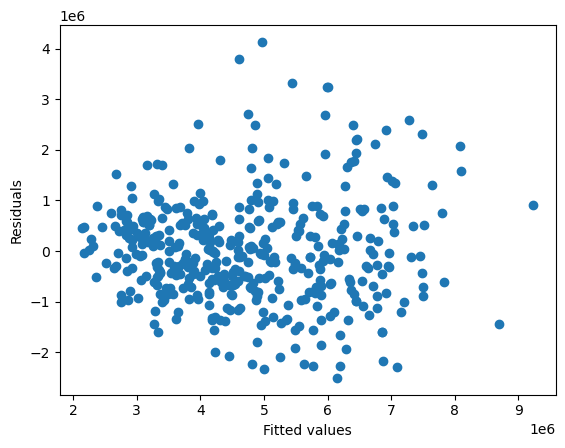

R2 of Training set: 0.6438913395259065
R2 of Validation set: 0.8233591325763182
Adjusted R2: 0.6327896306861865
R2 of Cross-validation: 0.6054067500680258


In [ ]:
r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test, y_test)

# ดูค่า Adjusted R2
adjusted_r2 = 1 - (1 - r2_train) * (len(x_train) - 1) / (len(x_train) - len(model.coef_))

plt.scatter(model.predict(x_train), y_train - model.predict(x_train))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# ดูค่า R2 เฉลี่ยจาก Cross-validation
scores = cross_val_score(model, x_train, y_train, cv=5)
r2_cv = np.mean(scores)

# พิมพ์ผลลัพธ์
print("R2 of Training set:", r2_train)
print("R2 of Validation set:", r2_test)
print("Adjusted R2:", adjusted_r2)
print("R2 of Cross-validation:", r2_cv)

In [ ]:
# best_random_state = None
# best_r2 = float('-inf')

# for random_state in range(50000):
#     print(f"Trying random state {random_state}")
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
#     model = LinearRegression()
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     r2 = metrics.r2_score(y_test, y_pred)
#     mse = metrics.mean_squared_error(y_test, y_pred)

#     print(f"R2: {r2}, MSE: {mse}")

#     if r2 > best_r2:
#         best_r2 = r2
#         best_random_state = random_state
#         best_mse = mse

# print(f"Best Random State: {best_random_state}, Best R2: {best_r2}, Best MSE: {best_mse}")

Trying random state 0
R2: 0.634785980108634, MSE: 974508315185.8064
Trying random state 1
R2: 0.6398177278503848, MSE: 1123069537709.7078
Trying random state 2
R2: 0.6681863910007548, MSE: 966775659999.7257
Trying random state 3
R2: 0.5996358120728423, MSE: 963474383568.3733
Trying random state 4
R2: 0.6144173888162738, MSE: 949696428998.314
Trying random state 5
R2: 0.6090497498231586, MSE: 970053285618.962
Trying random state 6
R2: 0.6446686777049131, MSE: 1020711757738.5461
Trying random state 7
R2: 0.7189144185526164, MSE: 762314170685.0459
Trying random state 8
R2: 0.6946988784906079, MSE: 929304903724.1339
Trying random state 9
R2: 0.7132584164909532, MSE: 949335681782.1
Trying random state 10
R2: 0.6398670102522181, MSE: 815016069406.3995
Trying random state 11
R2: 0.572321552548815, MSE: 1070744626199.938
Trying random state 12
R2: 0.6598426585177435, MSE: 1162757250421.9338
Trying random state 13
R2: 0.6778109279067689, MSE: 985741209011.5842
Trying random state 14
R2: 0.65704

R2: 0.6663593117621791, MSE: 965284060542.1049
Trying random state 125
R2: 0.5348127411272097, MSE: 1208054755084.1355
Trying random state 126
R2: 0.6598712536526927, MSE: 1117874578980.3875
Trying random state 127
R2: 0.620818109153138, MSE: 1158384356786.2205
Trying random state 128
R2: 0.672059832526845, MSE: 1151250771407.6704
Trying random state 129
R2: 0.6765975601631522, MSE: 904536410261.0939
Trying random state 130
R2: 0.7047521155219914, MSE: 924657137757.5056
Trying random state 131
R2: 0.6978283499316971, MSE: 870508701676.0906
Trying random state 132
R2: 0.5460387953363359, MSE: 1138786014709.7615
Trying random state 133
R2: 0.7953712977873477, MSE: 550319379001.5731
Trying random state 134
R2: 0.6556380488606406, MSE: 1003694457252.2593
Trying random state 135
R2: 0.642179686822438, MSE: 904434093866.0775
Trying random state 136
R2: 0.6325376107236064, MSE: 1183880208126.8972
Trying random state 137
R2: 0.6080357898261431, MSE: 1142822981524.4436
Trying random state 138
R

R2: 0.6226337143302638, MSE: 1651041256355.091
Trying random state 241
R2: 0.553676227001217, MSE: 1196296910080.3489
Trying random state 242
R2: 0.5978060907678837, MSE: 1109103137962.6619
Trying random state 243
R2: 0.6342008794233658, MSE: 1212885995964.5547
Trying random state 244
R2: 0.5912717449111966, MSE: 1345476228768.404
Trying random state 245
R2: 0.6740230130064414, MSE: 989333556539.8507
Trying random state 246
R2: 0.6882296931580036, MSE: 851843290021.0088
Trying random state 247
R2: 0.6824325706152345, MSE: 890504024879.0084
Trying random state 248
R2: 0.6733275689503179, MSE: 862691598289.5767
Trying random state 249
R2: 0.5668077795299487, MSE: 850809408945.9498
Trying random state 250
R2: 0.7080472920312337, MSE: 735887248159.0436
Trying random state 251
R2: 0.6707704433702498, MSE: 890717795645.6454
Trying random state 252
R2: 0.7278702663244518, MSE: 867150414854.0951
Trying random state 253
R2: 0.6343413434832821, MSE: 1133145219483.4307
Trying random state 254
R2:

R2: 0.5848089310761957, MSE: 927892754100.9855
Trying random state 364
R2: 0.6051786558004995, MSE: 1005992979024.8737
Trying random state 365
R2: 0.6842194953048115, MSE: 1107824372803.694
Trying random state 366
R2: 0.5750212178044118, MSE: 944925112897.5107
Trying random state 367
R2: 0.7058397990237333, MSE: 875467857605.1705
Trying random state 368
R2: 0.6728066246364075, MSE: 820580489372.5494
Trying random state 369
R2: 0.6077339651426796, MSE: 1041517037617.8009
Trying random state 370
R2: 0.6508822578271107, MSE: 1179723084398.18
Trying random state 371
R2: 0.6767480052494407, MSE: 966133409364.3866
Trying random state 372
R2: 0.6101250514900669, MSE: 925220841515.5112
Trying random state 373
R2: 0.5770939035888223, MSE: 1053225155312.1943
Trying random state 374
R2: 0.6523761906636222, MSE: 1137791169726.3572
Trying random state 375
R2: 0.6627872211397166, MSE: 962648975690.59
Trying random state 376
R2: 0.665566630014313, MSE: 801450023412.6317
Trying random state 377
R2: 0.

R2: 0.5918812667822584, MSE: 1154921227681.7473
Trying random state 481
R2: 0.7007143652219046, MSE: 701758649721.9021
Trying random state 482
R2: 0.7092116867799572, MSE: 1052687206499.5159
Trying random state 483
R2: 0.643352859229948, MSE: 844250541332.1492
Trying random state 484
R2: 0.6160861923324464, MSE: 929324469141.4745
Trying random state 485
R2: 0.6316580326973309, MSE: 1033632999585.5122
Trying random state 486
R2: 0.735357116386945, MSE: 759488247879.8466
Trying random state 487
R2: 0.5718731567072788, MSE: 1262975905029.253
Trying random state 488
R2: 0.6391181621941862, MSE: 921759269305.4773
Trying random state 489
R2: 0.6514196513269783, MSE: 993067686801.3143
Trying random state 490
R2: 0.7653861458468165, MSE: 848679978902.9899
Trying random state 491
R2: 0.653355221834835, MSE: 961433153449.7338
Trying random state 492
R2: 0.5743596089912825, MSE: 1304551797216.3936
Trying random state 493
R2: 0.5036511093888913, MSE: 1374219828422.8887
Trying random state 494
R2: 

R2: 0.571170974019203, MSE: 920564359475.0084
Trying random state 597
R2: 0.6257793634920688, MSE: 1325429469498.779
Trying random state 598
R2: 0.6154102395897235, MSE: 1175736968115.437
Trying random state 599
R2: 0.662064431622267, MSE: 979393933253.7002
Trying random state 600
R2: 0.6453838208851292, MSE: 1059024268879.9
Trying random state 601
R2: 0.7072707351169143, MSE: 842094808695.731
Trying random state 602
R2: 0.607156643496546, MSE: 893552105388.346
Trying random state 603
R2: 0.6618972839899051, MSE: 964856218673.6023
Trying random state 604
R2: 0.6486304442606403, MSE: 1002479321527.5596
Trying random state 605
R2: 0.5850367052737665, MSE: 1235518481329.8809
Trying random state 606
R2: 0.7086479403670567, MSE: 915803409864.6798
Trying random state 607
R2: 0.5677102461306276, MSE: 1315825635292.204
Trying random state 608
R2: 0.6518695703785862, MSE: 874709146296.3234
Trying random state 609
R2: 0.5642978732987269, MSE: 994384813235.8182
Trying random state 610
R2: 0.53456

R2: 0.5675095164188444, MSE: 1353136526080.5725
Trying random state 719
R2: 0.5794170071914712, MSE: 1096745872965.9966
Trying random state 720
R2: 0.6964368398490217, MSE: 732892723603.3591
Trying random state 721
R2: 0.7070531557402878, MSE: 798259719543.1719
Trying random state 722
R2: 0.6899413492043718, MSE: 982103228198.8577
Trying random state 723
R2: 0.657534008835265, MSE: 965620215463.2057
Trying random state 724
R2: 0.5884250276293306, MSE: 1524697613676.7551
Trying random state 725
R2: 0.6124438485470864, MSE: 1059093267268.5421
Trying random state 726
R2: 0.635151582026293, MSE: 1192110379880.4565
Trying random state 727
R2: 0.5664147857672284, MSE: 1453821845900.0215
Trying random state 728
R2: 0.632874421609652, MSE: 1222560665709.5295
Trying random state 729
R2: 0.7127265423086185, MSE: 838853271701.9288
Trying random state 730
R2: 0.6224577952066833, MSE: 936901583888.8823
Trying random state 731
R2: 0.6122107890928659, MSE: 1282091458131.34
Trying random state 732
R2:

R2: 0.551678128957323, MSE: 1325401690831.0457
Trying random state 835
R2: 0.6254179613343982, MSE: 1019640463587.4382
Trying random state 836
R2: 0.591879104685306, MSE: 1269204151490.2185
Trying random state 837
R2: 0.6964167181065319, MSE: 885775166251.9717
Trying random state 838
R2: 0.6948975983543473, MSE: 794488742338.2971
Trying random state 839
R2: 0.6680324694613006, MSE: 960474748563.161
Trying random state 840
R2: 0.5606666088635976, MSE: 1407442079066.1816
Trying random state 841
R2: 0.6367735642234432, MSE: 1094987143687.5228
Trying random state 842
R2: 0.565878918153081, MSE: 1145402530358.9355
Trying random state 843
R2: 0.6618039058702214, MSE: 1116640662518.324
Trying random state 844
R2: 0.6985317096038743, MSE: 907051687617.7509
Trying random state 845
R2: 0.6783894684194853, MSE: 915725712254.047
Trying random state 846
R2: 0.6136194663292822, MSE: 698678708485.924
Trying random state 847
R2: 0.6887519740734694, MSE: 1111439437032.5618
Trying random state 848
R2: 0

R2: 0.667149858974748, MSE: 885691299957.9038
Trying random state 955
R2: 0.6481999047916133, MSE: 864341802499.1521
Trying random state 956
R2: 0.6648388884889733, MSE: 920692326091.5522
Trying random state 957
R2: 0.7248745226991176, MSE: 826223247990.8501
Trying random state 958
R2: 0.6389460738642467, MSE: 892569299096.4067
Trying random state 959
R2: 0.6524979261504049, MSE: 960679384732.0812
Trying random state 960
R2: 0.7165786265163714, MSE: 975725968768.2762
Trying random state 961
R2: 0.7307023416934864, MSE: 1019014684337.1079
Trying random state 962
R2: 0.6948091040204796, MSE: 978018584809.4135
Trying random state 963
R2: 0.534842611327986, MSE: 990813235919.835
Trying random state 964
R2: 0.6252979771256191, MSE: 1097898581893.183
Trying random state 965
R2: 0.6609113934658895, MSE: 1037485240747.1985
Trying random state 966
R2: 0.7115094136090683, MSE: 949175924790.3901
Trying random state 967
R2: 0.6759508512782862, MSE: 965749736820.8666
Trying random state 968
R2: 0.6

R2: 0.531546503876804, MSE: 1221530189629.092
Trying random state 1071
R2: 0.7048486040166553, MSE: 815345100789.2806
Trying random state 1072
R2: 0.6570610586955863, MSE: 846175502574.9016
Trying random state 1073
R2: 0.5714413130163554, MSE: 1186940240419.0366
Trying random state 1074
R2: 0.6619440328127681, MSE: 1081632255491.9094
Trying random state 1075
R2: 0.6641752390592357, MSE: 981570078376.701
Trying random state 1076
R2: 0.603631031046539, MSE: 1173735786310.8152
Trying random state 1077
R2: 0.6190226000748416, MSE: 1313761764862.9988
Trying random state 1078
R2: 0.6577638462360622, MSE: 956051708708.149
Trying random state 1079
R2: 0.6577173830375326, MSE: 858528975190.2898
Trying random state 1080
R2: 0.6065728806078456, MSE: 918486094414.031
Trying random state 1081
R2: 0.6093588542777211, MSE: 828077907870.7483
Trying random state 1082
R2: 0.5298392690625973, MSE: 1410228957436.4011
Trying random state 1083
R2: 0.5816892389970293, MSE: 1179175403781.3013
Trying random st

R2: 0.6009500368395932, MSE: 1033588493504.2146
Trying random state 1187
R2: 0.706143541358353, MSE: 957077888106.6096
Trying random state 1188
R2: 0.6870610098990014, MSE: 731660525119.2545
Trying random state 1189
R2: 0.6390998311898857, MSE: 929921015731.4064
Trying random state 1190
R2: 0.568262434750419, MSE: 1113660935601.7817
Trying random state 1191
R2: 0.5909538374449477, MSE: 899260063401.7594
Trying random state 1192
R2: 0.7153721468881862, MSE: 900454196623.4712
Trying random state 1193
R2: 0.5528511196052399, MSE: 1047281992214.4685
Trying random state 1194
R2: 0.5928054223478256, MSE: 927945234286.3114
Trying random state 1195
R2: 0.6771300452593796, MSE: 892332603549.7899
Trying random state 1196
R2: 0.6699472863396465, MSE: 880766131292.5133
Trying random state 1197
R2: 0.601751378872138, MSE: 1233025966716.5251
Trying random state 1198
R2: 0.7007397055833493, MSE: 960932802958.2728
Trying random state 1199
R2: 0.6682832131405466, MSE: 1100255201259.5237
Trying random s

R2: 0.6350474419486583, MSE: 1115526187892.2302
Trying random state 1301
R2: 0.6720680075279006, MSE: 830458572983.2068
Trying random state 1302
R2: 0.6602312689492702, MSE: 838579727026.7311
Trying random state 1303
R2: 0.6631239069285653, MSE: 1081281161655.8469
Trying random state 1304
R2: 0.6816436041660132, MSE: 905622124744.1924
Trying random state 1305
R2: 0.5656194378079678, MSE: 1270579262997.3586
Trying random state 1306
R2: 0.5865464395537962, MSE: 1086077300444.5466
Trying random state 1307
R2: 0.6241682565953535, MSE: 973237701235.1686
Trying random state 1308
R2: 0.6375780439930556, MSE: 1145795506900.5833
Trying random state 1309
R2: 0.6680370307529035, MSE: 856877084900.6127
Trying random state 1310
R2: 0.6913744001598596, MSE: 1040880592905.7976
Trying random state 1311
R2: 0.6807577233356481, MSE: 888248406819.8394
Trying random state 1312
R2: 0.7268451440133625, MSE: 1007207764529.6079
Trying random state 1313
R2: 0.5434916564147345, MSE: 1104310858085.331
Trying ran

R2: 0.6601487795740857, MSE: 867484878469.4536
Trying random state 1421
R2: 0.7174614086178519, MSE: 904797845573.8131
Trying random state 1422
R2: 0.6166313841547726, MSE: 1280964584106.0205
Trying random state 1423
R2: 0.5685903157245931, MSE: 1141126535882.4958
Trying random state 1424
R2: 0.5705304094097179, MSE: 1045193551704.978
Trying random state 1425
R2: 0.630651063150369, MSE: 1202264859048.8235
Trying random state 1426
R2: 0.6395422553670687, MSE: 1078652164294.2374
Trying random state 1427
R2: 0.7179668548429767, MSE: 997674066818.8889
Trying random state 1428
R2: 0.6490657242945339, MSE: 996627510572.1842
Trying random state 1429
R2: 0.7043458089379514, MSE: 695348278219.0852
Trying random state 1430
R2: 0.6239933730951917, MSE: 1137148392327.7388
Trying random state 1431
R2: 0.48459173929602817, MSE: 1227747059322.9229
Trying random state 1432
R2: 0.6385328062529024, MSE: 957842770335.8085
Trying random state 1433
R2: 0.7381042543268128, MSE: 785861088748.0883
Trying rand

R2: 0.6551059065223703, MSE: 1007545382158.3193
Trying random state 1541
R2: 0.582805398707331, MSE: 1087527300618.533
Trying random state 1542
R2: 0.7028708488082811, MSE: 996331946244.0564
Trying random state 1543
R2: 0.708879806679368, MSE: 875371281425.6508
Trying random state 1544
R2: 0.5917173487472771, MSE: 1053695527934.4366
Trying random state 1545
R2: 0.6852232390895732, MSE: 698244814591.5555
Trying random state 1546
R2: 0.6972630776254432, MSE: 875392271397.7655
Trying random state 1547
R2: 0.6445782120478527, MSE: 772196443704.7803
Trying random state 1548
R2: 0.561061183030104, MSE: 1108085132209.4429
Trying random state 1549
R2: 0.7309484140364352, MSE: 903460382357.9203
Trying random state 1550
R2: 0.566607123943073, MSE: 1132843158561.9202
Trying random state 1551
R2: 0.6896313455309375, MSE: 951867139106.2435
Trying random state 1552
R2: 0.6531849317742434, MSE: 1053909440572.6553
Trying random state 1553
R2: 0.7478796241808079, MSE: 949836011607.4781
Trying random st

R2: 0.6524015562948331, MSE: 974952854655.3053
Trying random state 1655
R2: 0.6266558648925529, MSE: 929756238522.7866
Trying random state 1656
R2: 0.6741718354191848, MSE: 1009614580318.2616
Trying random state 1657
R2: 0.6355645938160314, MSE: 857252968711.7075
Trying random state 1658
R2: 0.6557147663284049, MSE: 1153770903983.2656
Trying random state 1659
R2: 0.6830074796936789, MSE: 560178692979.92
Trying random state 1660
R2: 0.6313846873865421, MSE: 1071102271936.8428
Trying random state 1661
R2: 0.5971984711796108, MSE: 1312520920708.5579
Trying random state 1662
R2: 0.6671693381096181, MSE: 957227717815.2545
Trying random state 1663
R2: 0.6180891985292436, MSE: 1126460396494.0688
Trying random state 1664
R2: 0.6662709496621724, MSE: 1030841382222.611
Trying random state 1665
R2: 0.654219829399489, MSE: 921467446123.1884
Trying random state 1666
R2: 0.7335741623086869, MSE: 918930601294.5977
Trying random state 1667
R2: 0.6240298886124276, MSE: 854853179941.0405
Trying random s

R2: 0.7341324902536348, MSE: 768350967130.1274
Trying random state 1769
R2: 0.6904062025985407, MSE: 930645600642.2134
Trying random state 1770
R2: 0.573670078204606, MSE: 1133936639533.902
Trying random state 1771
R2: 0.6643146490782366, MSE: 951681123813.3984
Trying random state 1772
R2: 0.6881575419679391, MSE: 1063651655777.1876
Trying random state 1773
R2: 0.6849083820275407, MSE: 1000585754481.3212
Trying random state 1774
R2: 0.6268508110263542, MSE: 1010689802295.7689
Trying random state 1775
R2: 0.5929908148421967, MSE: 937726168704.4569
Trying random state 1776
R2: 0.7107121297293952, MSE: 861849499001.1647
Trying random state 1777
R2: 0.6481580417677879, MSE: 1168513143880.2202
Trying random state 1778
R2: 0.6210378089761135, MSE: 1035009298650.8124
Trying random state 1779
R2: 0.7135412532709642, MSE: 1166145886232.9973
Trying random state 1780
R2: 0.6812976756475211, MSE: 823504323882.4318
Trying random state 1781
R2: 0.6895266318382014, MSE: 889419849370.2471
Trying rando

R2: 0.5663992800195734, MSE: 1314359220021.8076
Trying random state 1885
R2: 0.6758182256978985, MSE: 980170104141.3032
Trying random state 1886
R2: 0.6390890717020565, MSE: 1042090829798.6981
Trying random state 1887
R2: 0.6500307766182962, MSE: 990802560698.4281
Trying random state 1888
R2: 0.6778277841502722, MSE: 919781085603.6034
Trying random state 1889
R2: 0.6905235305289656, MSE: 943874828578.5852
Trying random state 1890
R2: 0.6832356868615552, MSE: 816286894737.55
Trying random state 1891
R2: 0.6263648753623152, MSE: 961503303545.5532
Trying random state 1892
R2: 0.6622095279191986, MSE: 1191399174947.378
Trying random state 1893
R2: 0.6589065985545379, MSE: 835340686199.892
Trying random state 1894
R2: 0.7136172417561204, MSE: 839111523340.6001
Trying random state 1895
R2: 0.7139340550849472, MSE: 786573959810.7179
Trying random state 1896
R2: 0.6864111383356675, MSE: 1136403380989.0598
Trying random state 1897
R2: 0.6018092710960596, MSE: 781805134456.5375
Trying random sta

R2: 0.7023863918125715, MSE: 929250228628.6189
Trying random state 1999
R2: 0.6431276425999863, MSE: 1084812858038.5272
Trying random state 2000
R2: 0.6950980126780617, MSE: 876760268386.1517
Trying random state 2001
R2: 0.6382548725283386, MSE: 1094950513389.7439
Trying random state 2002
R2: 0.5830602871048824, MSE: 1038893586881.2865
Trying random state 2003
R2: 0.6367766643194306, MSE: 818036574980.6227
Trying random state 2004
R2: 0.6789574920972441, MSE: 883828858185.8046
Trying random state 2005
R2: 0.6299324918035386, MSE: 921596506737.5948
Trying random state 2006
R2: 0.6492823737909454, MSE: 863990735135.3445
Trying random state 2007
R2: 0.6647654974470201, MSE: 1013869524023.068
Trying random state 2008
R2: 0.6410606023449662, MSE: 1257623957627.5588
Trying random state 2009
R2: 0.740627002133253, MSE: 724815405913.4323
Trying random state 2010
R2: 0.5972536499481101, MSE: 1173428868926.6746
Trying random state 2011
R2: 0.7516228711465043, MSE: 824077401194.8932
Trying random

R2: 0.6124132828669097, MSE: 1120242375895.8103
Trying random state 2116
R2: 0.7330958219605419, MSE: 963761366976.0929
Trying random state 2117
R2: 0.6037069538252601, MSE: 952007490798.1792
Trying random state 2118
R2: 0.6489642310301679, MSE: 1016165637588.9338
Trying random state 2119
R2: 0.7353956436677422, MSE: 698639645998.3568
Trying random state 2120
R2: 0.6409347768601382, MSE: 1296366479201.6748
Trying random state 2121
R2: 0.7300453589240179, MSE: 658788213784.3217
Trying random state 2122
R2: 0.6861396745976409, MSE: 1099390342479.0992
Trying random state 2123
R2: 0.6742221321701611, MSE: 1093471733952.0161
Trying random state 2124
R2: 0.6781151746971732, MSE: 918668217729.7433
Trying random state 2125
R2: 0.6194421373577463, MSE: 1146484920767.8208
Trying random state 2126
R2: 0.5583476652677867, MSE: 1140193363618.5417
Trying random state 2127
R2: 0.6926736262611306, MSE: 873025172090.6135
Trying random state 2128
R2: 0.7473187922475535, MSE: 835690489436.8818
Trying ran

R2: 0.673963269527206, MSE: 1193116131599.4604
Trying random state 2240
R2: 0.6647427136940021, MSE: 859805393933.2968
Trying random state 2241
R2: 0.6389682051694062, MSE: 982270999448.5273
Trying random state 2242
R2: 0.702296284708275, MSE: 965493736262.6174
Trying random state 2243
R2: 0.5724585306788862, MSE: 1285767475409.5764
Trying random state 2244
R2: 0.6338313560940816, MSE: 1056914411168.308
Trying random state 2245
R2: 0.6941632416875083, MSE: 826295534295.2573
Trying random state 2246
R2: 0.7255778503439549, MSE: 845053870757.9692
Trying random state 2247
R2: 0.6517476942189007, MSE: 1077014977177.6024
Trying random state 2248
R2: 0.6779400008935059, MSE: 1019212091287.1554
Trying random state 2249
R2: 0.6928325315341095, MSE: 871685463217.9956
Trying random state 2250
R2: 0.6734573432450262, MSE: 919594012459.0658
Trying random state 2251
R2: 0.6575229820169319, MSE: 1194676205414.3105
Trying random state 2252
R2: 0.6996262752508591, MSE: 929868301207.186
Trying random s

R2: 0.6487989901240558, MSE: 1358341908474.467
Trying random state 2362
R2: 0.6041858773362654, MSE: 1253819339025.1123
Trying random state 2363
R2: 0.698821748169612, MSE: 852074649429.5874
Trying random state 2364
R2: 0.6866952671412696, MSE: 946323750935.0905
Trying random state 2365
R2: 0.6672696522811393, MSE: 994049648895.3177
Trying random state 2366
R2: 0.7299673659606302, MSE: 938266753840.0923
Trying random state 2367
R2: 0.6271980998756261, MSE: 1236018019504.1702
Trying random state 2368
R2: 0.6778846506636882, MSE: 971659131973.003
Trying random state 2369
R2: 0.7143358815558294, MSE: 724007115765.8821
Trying random state 2370
R2: 0.6428130921792152, MSE: 1301403454737.9187
Trying random state 2371
R2: 0.6829240751742687, MSE: 801910437514.587
Trying random state 2372
R2: 0.6897057406784886, MSE: 884683739139.84
Trying random state 2373
R2: 0.5900340789875707, MSE: 889916672928.9952
Trying random state 2374
R2: 0.6720761429379536, MSE: 999770825107.6506
Trying random state

R2: 0.6268784032935519, MSE: 1292075325711.1294
Trying random state 2478
R2: 0.6716218488673313, MSE: 1019713573291.8187
Trying random state 2479
R2: 0.6633278813442004, MSE: 1248411919692.6252
Trying random state 2480
R2: 0.5850582966301545, MSE: 1008469405524.0742
Trying random state 2481
R2: 0.6608126207940639, MSE: 966140741790.0782
Trying random state 2482
R2: 0.6838879330464314, MSE: 1014838971524.007
Trying random state 2483
R2: 0.7036204429984763, MSE: 805755671054.0763
Trying random state 2484
R2: 0.6111063959613148, MSE: 971520636289.4187
Trying random state 2485
R2: 0.6486430034383617, MSE: 967391022553.7236
Trying random state 2486
R2: 0.6357440537342369, MSE: 991669093019.0111
Trying random state 2487
R2: 0.6117491580411907, MSE: 1124762093466.0771
Trying random state 2488
R2: 0.6314722758805958, MSE: 1122551653093.0193
Trying random state 2489
R2: 0.7214310548814176, MSE: 870882481053.6333
Trying random state 2490
R2: 0.5031095686357836, MSE: 1246746393250.873
Trying rand

R2: 0.6182513204647628, MSE: 1279010018529.602
Trying random state 2594
R2: 0.6121219831051039, MSE: 1096481334908.4149
Trying random state 2595
R2: 0.6128014089794762, MSE: 1187553443081.3777
Trying random state 2596
R2: 0.697706080566279, MSE: 822537936547.6597
Trying random state 2597
R2: 0.6197493707146958, MSE: 1286721114782.6042
Trying random state 2598
R2: 0.6374853975698631, MSE: 1171048080472.003
Trying random state 2599
R2: 0.6876509594792564, MSE: 998849882924.0388
Trying random state 2600
R2: 0.6210364316659336, MSE: 1083424827917.3439
Trying random state 2601
R2: 0.6528377810983015, MSE: 950837851998.5164
Trying random state 2602
R2: 0.6052977140117891, MSE: 1120426060935.1191
Trying random state 2603
R2: 0.5954405412267665, MSE: 1344674400539.3354
Trying random state 2604
R2: 0.7189215135017466, MSE: 771749538597.7758
Trying random state 2605
R2: 0.7113304964300037, MSE: 897803938568.3387
Trying random state 2606
R2: 0.7390198961535817, MSE: 800111700859.1023
Trying rando

R2: 0.7552876100356498, MSE: 737965807750.5508
Trying random state 2712
R2: 0.6490204702385536, MSE: 1058250916406.8845
Trying random state 2713
R2: 0.6187168902996715, MSE: 996402490371.4952
Trying random state 2714
R2: 0.573818259180089, MSE: 1324854586018.9954
Trying random state 2715
R2: 0.6510778210288093, MSE: 994050169661.508
Trying random state 2716
R2: 0.6748092482560394, MSE: 1150673741669.8577
Trying random state 2717
R2: 0.6533133706400894, MSE: 1046131575527.9272
Trying random state 2718
R2: 0.649421320267697, MSE: 1157131843154.1836
Trying random state 2719
R2: 0.7460991267358683, MSE: 670169944959.0243
Trying random state 2720
R2: 0.6730265209527038, MSE: 929409529454.0924
Trying random state 2721
R2: 0.5758924287436292, MSE: 1227637599080.0957
Trying random state 2722
R2: 0.5456675397029329, MSE: 1371813396223.3262
Trying random state 2723
R2: 0.7402040799447426, MSE: 835967819070.5249
Trying random state 2724
R2: 0.591932538583262, MSE: 1238324228231.3865
Trying random

R2: 0.6508737033431379, MSE: 1003126548216.4608
Trying random state 2826
R2: 0.7363181284370884, MSE: 726516950591.3057
Trying random state 2827
R2: 0.6538774322223957, MSE: 1045285836726.5404
Trying random state 2828
R2: 0.6032992723618776, MSE: 1106452954489.1323
Trying random state 2829
R2: 0.5884891313685748, MSE: 1270807797319.7686
Trying random state 2830
R2: 0.6250048291449519, MSE: 1016204501495.9148
Trying random state 2831
R2: 0.6867315223180832, MSE: 1012995876516.8737
Trying random state 2832
R2: 0.5505099646859368, MSE: 1294629662679.4287
Trying random state 2833
R2: 0.6419984375617467, MSE: 1018844027278.9835
Trying random state 2834
R2: 0.6343101811095007, MSE: 1004731300955.0474
Trying random state 2835
R2: 0.6523491366984371, MSE: 1052478750525.8353
Trying random state 2836
R2: 0.6132108483034358, MSE: 932136207774.0828
Trying random state 2837
R2: 0.6199124838566608, MSE: 1155333594579.0303
Trying random state 2838
R2: 0.6471301117404697, MSE: 768545072542.3243
Trying

R2: 0.6142751436131983, MSE: 1078752745125.079
Trying random state 2948
R2: 0.676058181644696, MSE: 1142039162182.8352
Trying random state 2949
R2: 0.6230940688227905, MSE: 934873856629.846
Trying random state 2950
R2: 0.6204099820130344, MSE: 1021172878082.2446
Trying random state 2951
R2: 0.655308051028688, MSE: 986544420486.6666
Trying random state 2952
R2: 0.6662412617284756, MSE: 1127185339927.6924
Trying random state 2953
R2: 0.7413937920458942, MSE: 713596982909.0679
Trying random state 2954
R2: 0.682371392219514, MSE: 872522834790.5579
Trying random state 2955
R2: 0.5674965167027146, MSE: 929259110179.4897
Trying random state 2956
R2: 0.6345443706454965, MSE: 1047894033847.717
Trying random state 2957
R2: 0.5310541264971762, MSE: 1338832326657.5212
Trying random state 2958
R2: 0.6360593579121481, MSE: 1203344789923.234
Trying random state 2959
R2: 0.6143119421155917, MSE: 1237799638797.4124
Trying random state 2960
R2: 0.6448566156562314, MSE: 825907084681.7837
Trying random st

R2: 0.6725667266868014, MSE: 983863011370.5848
Trying random state 3068
R2: 0.6048508626849011, MSE: 1005519942021.3649
Trying random state 3069
R2: 0.6481898160729584, MSE: 1146593911283.7703
Trying random state 3070
R2: 0.5506504346898538, MSE: 1206942085883.8635
Trying random state 3071
R2: 0.7055552101690323, MSE: 994443086646.7179
Trying random state 3072
R2: 0.6466693005312976, MSE: 980875216423.8983
Trying random state 3073
R2: 0.5862271006413282, MSE: 1110205915378.4834
Trying random state 3074
R2: 0.7184944173274955, MSE: 912024979902.5725
Trying random state 3075
R2: 0.7023813335605257, MSE: 921634890213.0664
Trying random state 3076
R2: 0.6955779113211515, MSE: 991340459930.626
Trying random state 3077
R2: 0.5642569761878198, MSE: 1151465829309.6582
Trying random state 3078
R2: 0.638842565406607, MSE: 1041268905351.4464
Trying random state 3079
R2: 0.5765235236095014, MSE: 1025341388480.5837
Trying random state 3080
R2: 0.6445217544530859, MSE: 1056459728968.4386
Trying rand

R2: 0.6975505366614072, MSE: 814651396629.5201
Trying random state 3186
R2: 0.6268061556608373, MSE: 1349447750887.334
Trying random state 3187
R2: 0.5583297049205547, MSE: 1102392772160.2651
Trying random state 3188
R2: 0.6606395223043491, MSE: 1147968060470.0986
Trying random state 3189
R2: 0.6602656938404752, MSE: 953691062188.7291
Trying random state 3190
R2: 0.688198260272136, MSE: 1021456044933.5127
Trying random state 3191
R2: 0.626060680718531, MSE: 1083932973755.808
Trying random state 3192
R2: 0.6467978690452741, MSE: 1058859759253.5273
Trying random state 3193
R2: 0.5520984708144987, MSE: 1216221173872.985
Trying random state 3194
R2: 0.6354975481803182, MSE: 1010193274142.0127
Trying random state 3195
R2: 0.48625781738996876, MSE: 1134672808468.9453
Trying random state 3196
R2: 0.688305631187665, MSE: 1007253052892.8375
Trying random state 3197
R2: 0.6724966116631572, MSE: 977393488303.9608
Trying random state 3198
R2: 0.6917423471151005, MSE: 827260125910.4812
Trying rando

R2: 0.6487448630311325, MSE: 922793918735.1537
Trying random state 3301
R2: 0.6957693849197164, MSE: 1022199501686.9445
Trying random state 3302
R2: 0.7032029621045967, MSE: 1055475495577.8517
Trying random state 3303
R2: 0.6710600345611909, MSE: 1259973514857.6858
Trying random state 3304
R2: 0.6416238924681168, MSE: 1082352416501.2467
Trying random state 3305
R2: 0.6727196444047456, MSE: 959442378065.3187
Trying random state 3306
R2: 0.6351042479650794, MSE: 1015836221910.8735
Trying random state 3307
R2: 0.6379005443769621, MSE: 920732743072.778
Trying random state 3308
R2: 0.7202329382097112, MSE: 917523789674.1606
Trying random state 3309
R2: 0.6884764829292441, MSE: 834185617352.0782
Trying random state 3310
R2: 0.5908529933429877, MSE: 1101936183371.7073
Trying random state 3311
R2: 0.6665683722720521, MSE: 1208468176159.072
Trying random state 3312
R2: 0.6460917135658919, MSE: 985786846631.6476
Trying random state 3313
R2: 0.5700095609895666, MSE: 992423948309.8092
Trying rando

R2: 0.6396563525303685, MSE: 944320144036.4097
Trying random state 3417
R2: 0.7010127468591127, MSE: 865461464970.8079
Trying random state 3418
R2: 0.7318960616926369, MSE: 946931224162.9896
Trying random state 3419
R2: 0.628401259423232, MSE: 900635124031.8756
Trying random state 3420
R2: 0.7310663974259972, MSE: 837642990074.3999
Trying random state 3421
R2: 0.6944558392029232, MSE: 792010911423.5189
Trying random state 3422
R2: 0.7256017705621822, MSE: 671916326631.3993
Trying random state 3423
R2: 0.5624880939029553, MSE: 980822277654.5052
Trying random state 3424
R2: 0.6138197440461246, MSE: 1197043830849.6533
Trying random state 3425
R2: 0.6779182700870237, MSE: 1075324345031.9529
Trying random state 3426
R2: 0.6322317016043626, MSE: 1029376971884.9104
Trying random state 3427
R2: 0.5805443218556017, MSE: 1211362325664.4224
Trying random state 3428
R2: 0.609442317458317, MSE: 1231334410470.9387
Trying random state 3429
R2: 0.5242751368823524, MSE: 1366266438919.4792
Trying random

R2: 0.6175207118709078, MSE: 940054817007.7507
Trying random state 3531
R2: 0.5722663273119952, MSE: 1382546780293.7285
Trying random state 3532
R2: 0.5921406574588823, MSE: 969938696553.074
Trying random state 3533
R2: 0.677939429488774, MSE: 838233762591.0948
Trying random state 3534
R2: 0.7109253904816364, MSE: 693607267593.0037
Trying random state 3535
R2: 0.6697634676277189, MSE: 1098246357339.6885
Trying random state 3536
R2: 0.6957361069403185, MSE: 1045878052720.4991
Trying random state 3537
R2: 0.6592510918159408, MSE: 978399011921.7024
Trying random state 3538
R2: 0.6249487618623228, MSE: 1113187731811.8333
Trying random state 3539
R2: 0.6490171640715675, MSE: 983182128649.6704
Trying random state 3540
R2: 0.6702244569324542, MSE: 1006000879116.1606
Trying random state 3541
R2: 0.6555478305318571, MSE: 929496979095.9119
Trying random state 3542
R2: 0.6069314155861836, MSE: 969696784785.3201
Trying random state 3543
R2: 0.616733779773567, MSE: 1297795763299.7256
Trying random 

R2: 0.48723483022574854, MSE: 1291743586152.2778
Trying random state 3645
R2: 0.5991966456188687, MSE: 1230349731684.9404
Trying random state 3646
R2: 0.6389019515129538, MSE: 1004776808120.4767
Trying random state 3647
R2: 0.6538770287672963, MSE: 883059052664.5126
Trying random state 3648
R2: 0.6322874011422406, MSE: 1193329448504.8357
Trying random state 3649
R2: 0.6650400520802088, MSE: 1150890911616.9868
Trying random state 3650
R2: 0.7368236030330546, MSE: 766570280049.686
Trying random state 3651
R2: 0.6585910131910075, MSE: 994482783905.618
Trying random state 3652
R2: 0.6923778341730469, MSE: 633881177379.2778
Trying random state 3653
R2: 0.6137795396047673, MSE: 1196383477154.1812
Trying random state 3654
R2: 0.7858945601365885, MSE: 648211854218.7704
Trying random state 3655
R2: 0.5986523806699009, MSE: 1198201243845.4058
Trying random state 3656
R2: 0.696562192095852, MSE: 919343345095.1476
Trying random state 3657
R2: 0.6415773559592921, MSE: 877351712274.1034
Trying rando

R2: 0.6059899224912381, MSE: 1134381418131.3362
Trying random state 3766
R2: 0.7005114528358816, MSE: 997785616798.0054
Trying random state 3767
R2: 0.5559052633730343, MSE: 868703385588.754
Trying random state 3768
R2: 0.6921528946321178, MSE: 1145596672439.128
Trying random state 3769
R2: 0.5871422932518149, MSE: 1198722695357.6643
Trying random state 3770
R2: 0.6842141914841762, MSE: 901364715743.4274
Trying random state 3771
R2: 0.5723980835723315, MSE: 1173485206566.7996
Trying random state 3772
R2: 0.6179526319218278, MSE: 1072246005787.1508
Trying random state 3773
R2: 0.604166901290387, MSE: 1108638001531.805
Trying random state 3774
R2: 0.6467260983608425, MSE: 825336999907.6349
Trying random state 3775
R2: 0.644334589489346, MSE: 899192404129.144
Trying random state 3776
R2: 0.666836709777128, MSE: 1040610480249.885
Trying random state 3777
R2: 0.632782229739997, MSE: 1210013447805.5137
Trying random state 3778
R2: 0.6554737076784707, MSE: 1222570707143.043
Trying random stat

R2: 0.704615864164049, MSE: 1005917013243.9885
Trying random state 3882
R2: 0.6569962319708748, MSE: 1092441310561.0671
Trying random state 3883
R2: 0.6607034682324158, MSE: 1159648496896.9592
Trying random state 3884
R2: 0.5613827217006434, MSE: 895651352563.4534
Trying random state 3885
R2: 0.6541730588646235, MSE: 1088890119215.7677
Trying random state 3886
R2: 0.6647418914662904, MSE: 886831708219.6234
Trying random state 3887
R2: 0.6937041562630826, MSE: 846463173802.7872
Trying random state 3888
R2: 0.6574934083719755, MSE: 1004651759686.649
Trying random state 3889
R2: 0.6586679029932747, MSE: 856949612094.0116
Trying random state 3890
R2: 0.6242690680017751, MSE: 1157516919307.4475
Trying random state 3891
R2: 0.6398296513915809, MSE: 1017873006680.2155
Trying random state 3892
R2: 0.5916933423325952, MSE: 945622032725.2109
Trying random state 3893
R2: 0.6607813114412624, MSE: 1030499328212.2762
Trying random state 3894
R2: 0.6766337763032415, MSE: 821701382487.8749
Trying rand

R2: 0.7313599690847048, MSE: 732019640362.2732
Trying random state 4001
R2: 0.6651076056019708, MSE: 979058427456.4524
Trying random state 4002
R2: 0.6664469530888333, MSE: 983189886707.8143
Trying random state 4003
R2: 0.703525501784304, MSE: 950420046610.2333
Trying random state 4004
R2: 0.6735477529553396, MSE: 934368558372.2164
Trying random state 4005
R2: 0.7286663748514361, MSE: 1055834944967.0361
Trying random state 4006
R2: 0.6483366007669802, MSE: 1128533686196.127
Trying random state 4007
R2: 0.629537268504621, MSE: 1096814618081.4586
Trying random state 4008
R2: 0.639349333896104, MSE: 968828812679.4678
Trying random state 4009
R2: 0.7151331204639384, MSE: 821166390231.3182
Trying random state 4010
R2: 0.5781256945564164, MSE: 1132659731253.9087
Trying random state 4011
R2: 0.5709950940351795, MSE: 1260069697313.008
Trying random state 4012
R2: 0.634966226685416, MSE: 1100023501901.3887
Trying random state 4013
R2: 0.691473755108371, MSE: 877926658951.419
Trying random state

R2: 0.7161534149954345, MSE: 735206168959.4995
Trying random state 4124
R2: 0.7230009883772339, MSE: 920627100188.9678
Trying random state 4125
R2: 0.6847737220436652, MSE: 818787770290.8362
Trying random state 4126
R2: 0.6341237000833901, MSE: 898009849359.452
Trying random state 4127
R2: 0.5942563104194076, MSE: 1134535649308.3662
Trying random state 4128
R2: 0.621409515697599, MSE: 1304499265935.9229
Trying random state 4129
R2: 0.5691806773766201, MSE: 1043032255675.4342
Trying random state 4130
R2: 0.6960383202946492, MSE: 866271362767.1664
Trying random state 4131
R2: 0.6736420717300917, MSE: 819114222767.4197
Trying random state 4132
R2: 0.6994998631401054, MSE: 947282162159.9362
Trying random state 4133
R2: 0.6084823757042872, MSE: 1139666880352.6948
Trying random state 4134
R2: 0.658935998593327, MSE: 893876952685.38
Trying random state 4135
R2: 0.6205904691409074, MSE: 1259641732773.2002
Trying random state 4136
R2: 0.7419855864230168, MSE: 926737342375.3485
Trying random sta

R2: 0.4958877673697307, MSE: 1291160565009.4048
Trying random state 4240
R2: 0.6376011101846464, MSE: 892798633950.8763
Trying random state 4241
R2: 0.5789150295896941, MSE: 1059955010845.899
Trying random state 4242
R2: 0.7368831686415112, MSE: 890261985186.678
Trying random state 4243
R2: 0.6763077041835699, MSE: 1049031409635.2393
Trying random state 4244
R2: 0.6794417410357336, MSE: 948404978878.7366
Trying random state 4245
R2: 0.641917045404103, MSE: 864271657311.4614
Trying random state 4246
R2: 0.6291939754847422, MSE: 1091833112855.9508
Trying random state 4247
R2: 0.6099538239503746, MSE: 972323600386.788
Trying random state 4248
R2: 0.5793223100253657, MSE: 1202472993366.9958
Trying random state 4249
R2: 0.6475128102520848, MSE: 1154560619853.3936
Trying random state 4250
R2: 0.6676049827696701, MSE: 1052612144475.9034
Trying random state 4251
R2: 0.717482925848493, MSE: 775676577334.0929
Trying random state 4252
R2: 0.6377433561448546, MSE: 1239121727540.3337
Trying random 

R2: 0.6286607036799268, MSE: 1062392243576.8938
Trying random state 4355
R2: 0.6498725514102749, MSE: 984207181390.3403
Trying random state 4356
R2: 0.6335003344082032, MSE: 1070871425530.2288
Trying random state 4357
R2: 0.7102118984609358, MSE: 922085418102.9712
Trying random state 4358
R2: 0.6364896992839244, MSE: 995293029225.4219
Trying random state 4359
R2: 0.6451421261221266, MSE: 954105885316.2085
Trying random state 4360
R2: 0.6193213296615732, MSE: 995753718269.4078
Trying random state 4361
R2: 0.6680443575945468, MSE: 989330574914.1046
Trying random state 4362
R2: 0.654340725422799, MSE: 1054698715347.5887
Trying random state 4363
R2: 0.6164433708208168, MSE: 1218574788451.748
Trying random state 4364
R2: 0.6361126883047044, MSE: 938748268255.676
Trying random state 4365
R2: 0.6417315545132437, MSE: 1154039009368.3699
Trying random state 4366
R2: 0.7130942916268563, MSE: 958660072470.6451
Trying random state 4367
R2: 0.6458197883831159, MSE: 1037300038908.5085
Trying random 

R2: 0.6455285932868506, MSE: 869361743262.5952
Trying random state 4473
R2: 0.6289735746729728, MSE: 1249083964827.9521
Trying random state 4474
R2: 0.6153086980519746, MSE: 1064003565151.9492
Trying random state 4475
R2: 0.6626780550867714, MSE: 1055773604677.0974
Trying random state 4476
R2: 0.6512022605424541, MSE: 979758844482.0917
Trying random state 4477
R2: 0.6365022108608711, MSE: 927641278161.949
Trying random state 4478
R2: 0.7287971361419009, MSE: 818314816723.1208
Trying random state 4479
R2: 0.6560735332050351, MSE: 1108119750760.4448
Trying random state 4480
R2: 0.6704470669917622, MSE: 1224401844933.2114
Trying random state 4481
R2: 0.6685506326263833, MSE: 805103037966.0686
Trying random state 4482
R2: 0.6075304762047753, MSE: 959205497100.6815
Trying random state 4483
R2: 0.6761685464618339, MSE: 1021989562002.3823
Trying random state 4484
R2: 0.666339127210314, MSE: 996353885827.4187
Trying random state 4485
R2: 0.6518707886613773, MSE: 1279440683607.6797
Trying rando

R2: 0.6210044809199577, MSE: 952558563336.014
Trying random state 4590
R2: 0.7191497246643297, MSE: 862589012417.8164
Trying random state 4591
R2: 0.6510373612580072, MSE: 1034544250358.3859
Trying random state 4592
R2: 0.5848752092422903, MSE: 956656181632.8352
Trying random state 4593
R2: 0.6838982290759354, MSE: 980576855407.7156
Trying random state 4594
R2: 0.643221922640046, MSE: 1307797389492.424
Trying random state 4595
R2: 0.640189070492859, MSE: 1159313373242.1628
Trying random state 4596
R2: 0.603083104607665, MSE: 844248019860.0841
Trying random state 4597
R2: 0.7030451915577183, MSE: 991689705573.6467
Trying random state 4598
R2: 0.595817335808827, MSE: 1350480023509.0803
Trying random state 4599
R2: 0.7028335234039887, MSE: 882377237998.7076
Trying random state 4600
R2: 0.6751659661385742, MSE: 1131129681122.7283
Trying random state 4601
R2: 0.6481054525626991, MSE: 1040504391591.8925
Trying random state 4602
R2: 0.6520352493416325, MSE: 1164067227083.8076
Trying random st

R2: 0.6374721398859428, MSE: 1247761838804.9832
Trying random state 4705
R2: 0.626443611469385, MSE: 1098717028942.8627
Trying random state 4706
R2: 0.6595798116340956, MSE: 1103664257246.6128
Trying random state 4707
R2: 0.7513038815164064, MSE: 712536386567.3445
Trying random state 4708
R2: 0.6031328165649317, MSE: 1315514951524.7495
Trying random state 4709
R2: 0.6859380601601752, MSE: 1073872715863.3811
Trying random state 4710
R2: 0.671940585062438, MSE: 894835564884.146
Trying random state 4711
R2: 0.7249997623459616, MSE: 1072912278973.5088
Trying random state 4712
R2: 0.7095411491753211, MSE: 846322761707.9929
Trying random state 4713
R2: 0.6578668423706147, MSE: 879570800994.0894
Trying random state 4714
R2: 0.5079404906829207, MSE: 1257040742946.2786
Trying random state 4715
R2: 0.6047155789183265, MSE: 1138597952880.832
Trying random state 4716
R2: 0.6468092573340944, MSE: 1071171043682.8881
Trying random state 4717
R2: 0.5710120665372463, MSE: 1242088431557.984
Trying rando

R2: 0.7146491804044249, MSE: 879698026612.2151
Trying random state 4828
R2: 0.6817952067250949, MSE: 1159664768671.2417
Trying random state 4829
R2: 0.6764481392498223, MSE: 960039735539.3978
Trying random state 4830
R2: 0.7051013576179437, MSE: 964262474553.7759
Trying random state 4831
R2: 0.673814884563291, MSE: 877725501949.1381
Trying random state 4832
R2: 0.6325837229622112, MSE: 898894929802.7506
Trying random state 4833
R2: 0.6685033238902243, MSE: 901197627550.526
Trying random state 4834
R2: 0.6452413451840615, MSE: 1159679596585.8643
Trying random state 4835
R2: 0.6733894977483892, MSE: 1034655575185.3508
Trying random state 4836
R2: 0.6854174153514838, MSE: 1070928394445.4294
Trying random state 4837
R2: 0.682653839378366, MSE: 1078677050073.9142
Trying random state 4838
R2: 0.6967960037193247, MSE: 920217167190.9213
Trying random state 4839
R2: 0.6459350401178073, MSE: 1292272053665.209
Trying random state 4840
R2: 0.6476129476555664, MSE: 1314053836170.692
Trying random s

R2: 0.6827112133742526, MSE: 884275163522.1943
Trying random state 4944
R2: 0.6547296861438137, MSE: 927652891884.8173
Trying random state 4945
R2: 0.6609170515320311, MSE: 1029041256791.7334
Trying random state 4946
R2: 0.6034260233998923, MSE: 1106517622903.3684
Trying random state 4947
R2: 0.5996394400974936, MSE: 1111975384723.477
Trying random state 4948
R2: 0.6806241251096539, MSE: 1042194295253.4097
Trying random state 4949
R2: 0.6670847844339924, MSE: 837235681246.2505
Trying random state 4950
R2: 0.6288275716073631, MSE: 1065779907890.2678
Trying random state 4951
R2: 0.6673736095077252, MSE: 1101463816192.0278
Trying random state 4952
R2: 0.7143401926723134, MSE: 943102597062.8204
Trying random state 4953
R2: 0.6343023370373548, MSE: 1198773963875.8965
Trying random state 4954
R2: 0.6416230232029031, MSE: 1097270162460.5709
Trying random state 4955
R2: 0.650628291383081, MSE: 1081282138718.983
Trying random state 4956
R2: 0.6610884298005278, MSE: 1044444888539.9559
Trying ran

R2: 0.6163188611412928, MSE: 1292618311604.0796
Trying random state 5060
R2: 0.6371284072811499, MSE: 956299343346.6571
Trying random state 5061
R2: 0.6197708413705623, MSE: 1025710291030.0259
Trying random state 5062
R2: 0.6459254084907351, MSE: 1102040378576.2825
Trying random state 5063
R2: 0.6903374202374785, MSE: 1045870345632.901
Trying random state 5064
R2: 0.7256675301907262, MSE: 762339638363.1584
Trying random state 5065
R2: 0.5873229933830504, MSE: 1097112925699.5599
Trying random state 5066
R2: 0.6620722433116475, MSE: 991409556277.3304
Trying random state 5067
R2: 0.6913014437763926, MSE: 720744829390.4741
Trying random state 5068
R2: 0.6397158122348064, MSE: 1105672813656.6492
Trying random state 5069
R2: 0.63905774228263, MSE: 874645617888.3173
Trying random state 5070
R2: 0.6680289486431802, MSE: 949769768180.8877
Trying random state 5071
R2: 0.6517912048124229, MSE: 1027613418821.5392
Trying random state 5072
R2: 0.6291249603722193, MSE: 1193664399013.9126
Trying rando

R2: 0.6059893831214662, MSE: 1167115748126.1628
Trying random state 5183
R2: 0.664950970139893, MSE: 987726048150.381
Trying random state 5184
R2: 0.5281106841868507, MSE: 1011516631938.2799
Trying random state 5185
R2: 0.6396056886950469, MSE: 1036870223601.183
Trying random state 5186
R2: 0.6871311867148473, MSE: 791338039894.8188
Trying random state 5187
R2: 0.6960323309120205, MSE: 1043436466208.8037
Trying random state 5188
R2: 0.6420734925239846, MSE: 1261700058765.9026
Trying random state 5189
R2: 0.547934342292087, MSE: 1514604227854.5347
Trying random state 5190
R2: 0.6429953339317438, MSE: 1080100134116.6354
Trying random state 5191
R2: 0.6486242985328786, MSE: 1162644886752.1895
Trying random state 5192
R2: 0.5780348652338632, MSE: 1126233326219.3103
Trying random state 5193
R2: 0.5373866839321286, MSE: 1338283552792.5906
Trying random state 5194
R2: 0.5253623401528211, MSE: 1311725728092.3088
Trying random state 5195
R2: 0.6996872193760896, MSE: 1007118184367.9891
Trying ra

R2: 0.6231285139531472, MSE: 968394488999.0409
Trying random state 5307
R2: 0.6133586725330664, MSE: 1121203210569.6929
Trying random state 5308
R2: 0.646330605465271, MSE: 900478635753.757
Trying random state 5309
R2: 0.6368723393313069, MSE: 1118468055947.7893
Trying random state 5310
R2: 0.6718641221753818, MSE: 845397089215.3328
Trying random state 5311
R2: 0.7130908312721421, MSE: 1077573750952.992
Trying random state 5312
R2: 0.7076742395812414, MSE: 870000774787.9032
Trying random state 5313
R2: 0.7413070717164318, MSE: 867204093129.9974
Trying random state 5314
R2: 0.6774761912276888, MSE: 946018665177.1826
Trying random state 5315
R2: 0.6579926691415574, MSE: 968433346562.7589
Trying random state 5316
R2: 0.6170381329563843, MSE: 980909114417.535
Trying random state 5317
R2: 0.6043914792065581, MSE: 1100670202554.216
Trying random state 5318
R2: 0.6117553786405157, MSE: 1045835816315.6366
Trying random state 5319
R2: 0.7418855873264353, MSE: 845475703054.2584
Trying random sta

R2: 0.678727424450912, MSE: 945360378004.3284
Trying random state 5428
R2: 0.5946727486399173, MSE: 1088066728488.2433
Trying random state 5429
R2: 0.6339251001601044, MSE: 1114735106496.4893
Trying random state 5430
R2: 0.7304990571073089, MSE: 729467724124.6104
Trying random state 5431
R2: 0.5670377852897952, MSE: 1275553710624.5857
Trying random state 5432
R2: 0.7036300448738341, MSE: 997586851444.3663
Trying random state 5433
R2: 0.671846273540422, MSE: 1042737273164.3853
Trying random state 5434
R2: 0.6911347358755324, MSE: 666752451196.2274
Trying random state 5435
R2: 0.6270937128897132, MSE: 892225391778.8108
Trying random state 5436
R2: 0.6628381442039097, MSE: 1013139512978.7394
Trying random state 5437
R2: 0.6705435134864908, MSE: 1050248995344.992
Trying random state 5438
R2: 0.7049018872570679, MSE: 1036924647432.8744
Trying random state 5439
R2: 0.5228484475971706, MSE: 1146011337273.3408
Trying random state 5440
R2: 0.6147720932436924, MSE: 952909736419.6569
Trying rando

R2: 0.473581722238261, MSE: 1566606889120.7
Trying random state 5546
R2: 0.6381766710448877, MSE: 1189945287962.2124
Trying random state 5547
R2: 0.6847243415534431, MSE: 989708568855.5162
Trying random state 5548
R2: 0.6541441805087705, MSE: 996841746054.4125
Trying random state 5549
R2: 0.6861759203479069, MSE: 1051906021274.517
Trying random state 5550
R2: 0.6958140052899049, MSE: 730522358760.1017
Trying random state 5551
R2: 0.6402177221638645, MSE: 1118713865841.8967
Trying random state 5552
R2: 0.6360320915705315, MSE: 1003915555471.0724
Trying random state 5553
R2: 0.6627549737393909, MSE: 994774832657.4226
Trying random state 5554
R2: 0.70344387340098, MSE: 925770816228.2338
Trying random state 5555
R2: 0.7085497686953819, MSE: 953280488763.4171
Trying random state 5556
R2: 0.6529891017775191, MSE: 1034950635249.3092
Trying random state 5557
R2: 0.6974127227745974, MSE: 906041015469.9062
Trying random state 5558
R2: 0.6781703179516319, MSE: 1025018808433.6609
Trying random sta

R2: 0.5887307170937028, MSE: 1135850986962.787
Trying random state 5664
R2: 0.7172037204728186, MSE: 839052999360.7134
Trying random state 5665
R2: 0.6907611777546108, MSE: 888517851008.8564
Trying random state 5666
R2: 0.7111520453397411, MSE: 847246811823.503
Trying random state 5667
R2: 0.7121470439161086, MSE: 904253686348.4816
Trying random state 5668
R2: 0.6108193660349837, MSE: 980500979809.3054
Trying random state 5669
R2: 0.6071186156837038, MSE: 1167301155962.5283
Trying random state 5670
R2: 0.5502524426181875, MSE: 1022533967238.3242
Trying random state 5671
R2: 0.6737189531764984, MSE: 1231298159883.5193
Trying random state 5672
R2: 0.6458896519271504, MSE: 916885580556.3358
Trying random state 5673
R2: 0.5881194337924731, MSE: 806409766236.9546
Trying random state 5674
R2: 0.6739676558888026, MSE: 1004965063708.7827
Trying random state 5675
R2: 0.7195084909805118, MSE: 662412677942.3185
Trying random state 5676
R2: 0.6340055555987456, MSE: 1025238293460.9471
Trying random

R2: 0.6685106747795128, MSE: 1118218961259.252
Trying random state 5784
R2: 0.6126923823532802, MSE: 1276368823881.8486
Trying random state 5785
R2: 0.615579864483768, MSE: 1083188039430.6287
Trying random state 5786
R2: 0.7156149992403583, MSE: 954622194652.408
Trying random state 5787
R2: 0.7099798884795788, MSE: 951760011740.1578
Trying random state 5788
R2: 0.6515760031263349, MSE: 1139016228686.426
Trying random state 5789
R2: 0.6301259474476383, MSE: 921642735831.5889
Trying random state 5790
R2: 0.6856274594182854, MSE: 886394737795.1913
Trying random state 5791
R2: 0.6283100624130084, MSE: 1183297181440.4556
Trying random state 5792
R2: 0.7308312033456119, MSE: 767900421393.4296
Trying random state 5793
R2: 0.6824427562555606, MSE: 841806787284.4729
Trying random state 5794
R2: 0.7026880001331717, MSE: 862667749184.6791
Trying random state 5795
R2: 0.635909130199569, MSE: 1093451940744.9861
Trying random state 5796
R2: 0.6233743634655735, MSE: 1080739618641.5404
Trying random s

R2: 0.6743093524780526, MSE: 931124006263.1448
Trying random state 5902
R2: 0.6519496568678406, MSE: 988254069533.5273
Trying random state 5903
R2: 0.6254665480606061, MSE: 1026076652735.1881
Trying random state 5904
R2: 0.5985230663719652, MSE: 1042934775107.1742
Trying random state 5905
R2: 0.6302120559803165, MSE: 861562457548.5356
Trying random state 5906
R2: 0.6200340876381898, MSE: 1172410152745.7927
Trying random state 5907
R2: 0.6719682232922146, MSE: 1219911294335.9353
Trying random state 5908
R2: 0.7250812353925813, MSE: 921552461286.5696
Trying random state 5909
R2: 0.653146896100026, MSE: 927067619707.1917
Trying random state 5910
R2: 0.6642292088183313, MSE: 1150392502104.3765
Trying random state 5911
R2: 0.5612668162407495, MSE: 1257967123076.2874
Trying random state 5912
R2: 0.6913513888491072, MSE: 990004636910.2147
Trying random state 5913
R2: 0.7031016762926465, MSE: 934156528429.5564
Trying random state 5914
R2: 0.6921245112044729, MSE: 847280619376.9984
Trying rando

R2: 0.649564247843927, MSE: 1115062527668.53
Trying random state 6021
R2: 0.6320298710710417, MSE: 832854582783.5453
Trying random state 6022
R2: 0.6117005875628818, MSE: 860825579496.3192
Trying random state 6023
R2: 0.6514568968195914, MSE: 1102025798710.5327
Trying random state 6024
R2: 0.5932013350296295, MSE: 1021974897423.0265
Trying random state 6025
R2: 0.7372512453541213, MSE: 810145764422.6599
Trying random state 6026
R2: 0.6608558450170289, MSE: 1120447647958.3806
Trying random state 6027
R2: 0.7317989175560224, MSE: 793572775421.1508
Trying random state 6028
R2: 0.5864955736098014, MSE: 1288068798585.7363
Trying random state 6029
R2: 0.6743902312884515, MSE: 978840753972.3142
Trying random state 6030
R2: 0.5815995848812942, MSE: 949300551197.4747
Trying random state 6031
R2: 0.6483195207990506, MSE: 906223165713.9967
Trying random state 6032
R2: 0.7393652951264124, MSE: 710975795754.7983
Trying random state 6033
R2: 0.5946212733245249, MSE: 1045508145285.09
Trying random st

R2: 0.5495393455635855, MSE: 1284173899509.301
Trying random state 6139
R2: 0.6234136347431145, MSE: 1116290462243.3162
Trying random state 6140
R2: 0.6797693420065765, MSE: 988185830043.1713
Trying random state 6141
R2: 0.681540575902279, MSE: 1014123294789.7172
Trying random state 6142
R2: 0.7010815953692285, MSE: 1010596462054.3479
Trying random state 6143
R2: 0.6913460892314389, MSE: 1127926469488.8628
Trying random state 6144
R2: 0.6077407821244311, MSE: 1290288612059.5625
Trying random state 6145
R2: 0.6521262525631468, MSE: 1017950521400.5876
Trying random state 6146
R2: 0.6052521030505841, MSE: 1075843375894.2516
Trying random state 6147
R2: 0.6227513873096331, MSE: 972217949812.5616
Trying random state 6148
R2: 0.6905705678832831, MSE: 748552781552.0333
Trying random state 6149
R2: 0.6554525651947621, MSE: 1020565508719.4506
Trying random state 6150
R2: 0.741760826384197, MSE: 911159019728.011
Trying random state 6151
R2: 0.6467220443158689, MSE: 983220151208.8577
Trying rando

R2: 0.45421372444374897, MSE: 1220565350681.5696
Trying random state 6255
R2: 0.6733522804288714, MSE: 1205546708612.7456
Trying random state 6256
R2: 0.6968613482961125, MSE: 828378578366.3885
Trying random state 6257
R2: 0.627668783677536, MSE: 1095015883825.1877
Trying random state 6258
R2: 0.6861202835338287, MSE: 987932938828.3198
Trying random state 6259
R2: 0.6852731415612867, MSE: 924592028769.2141
Trying random state 6260
R2: 0.6844190858253043, MSE: 865828598305.5896
Trying random state 6261
R2: 0.6514933315176641, MSE: 800674876229.8477
Trying random state 6262
R2: 0.6679292536163046, MSE: 1124011719808.8145
Trying random state 6263
R2: 0.625953032533384, MSE: 1243323745783.3757
Trying random state 6264
R2: 0.58821920585689, MSE: 954306712345.9552
Trying random state 6265
R2: 0.6001602817820822, MSE: 1044673741855.6663
Trying random state 6266
R2: 0.704798153322172, MSE: 876939670260.48
Trying random state 6267
R2: 0.7360842234106493, MSE: 772777969441.3143
Trying random sta

R2: 0.611669760496433, MSE: 901755560422.8605
Trying random state 6371
R2: 0.6403166291733613, MSE: 1204830851143.3655
Trying random state 6372
R2: 0.652531686170148, MSE: 1198539493850.1187
Trying random state 6373
R2: 0.666662690886667, MSE: 866541458868.1194
Trying random state 6374
R2: 0.6486663603693865, MSE: 1162222073962.5293
Trying random state 6375
R2: 0.5427840627579557, MSE: 1000048613597.0936
Trying random state 6376
R2: 0.6972848519451528, MSE: 740683826726.0862
Trying random state 6377
R2: 0.5907661050177941, MSE: 1236117972016.0947
Trying random state 6378
R2: 0.6504466677401398, MSE: 1051625747833.008
Trying random state 6379
R2: 0.6093190011336509, MSE: 935242127376.8179
Trying random state 6380
R2: 0.603096884824508, MSE: 1104636014243.3613
Trying random state 6381
R2: 0.6306735763789899, MSE: 929956211943.1299
Trying random state 6382
R2: 0.6802310018434778, MSE: 991239814215.1803
Trying random state 6383
R2: 0.6536030015083965, MSE: 1016016821462.9575
Trying random 

R2: 0.675247538680332, MSE: 1097437444744.236
Trying random state 6486
R2: 0.659360316665156, MSE: 1130064311567.3528
Trying random state 6487
R2: 0.7040618201851918, MSE: 894466630765.1906
Trying random state 6488
R2: 0.7139953212181532, MSE: 791850253792.5586
Trying random state 6489
R2: 0.7196826877568161, MSE: 916087566360.3099
Trying random state 6490
R2: 0.6523981454117733, MSE: 918817995016.1002
Trying random state 6491
R2: 0.7655292432849569, MSE: 586447717371.846
Trying random state 6492
R2: 0.6135141626940758, MSE: 1036103368078.0388
Trying random state 6493
R2: 0.7242877844532432, MSE: 829468991853.8837
Trying random state 6494
R2: 0.6333924718405903, MSE: 1162380686504.8887
Trying random state 6495
R2: 0.6744179777057915, MSE: 1089333629007.2806
Trying random state 6496
R2: 0.6698579500370763, MSE: 1100661252807.832
Trying random state 6497
R2: 0.3731147876166213, MSE: 1060554383581.1151
Trying random state 6498
R2: 0.5442017048901927, MSE: 1253811357940.0837
Trying random 

R2: 0.6980214972236032, MSE: 914239760532.8656
Trying random state 6601
R2: 0.619683308141344, MSE: 837141571715.3717
Trying random state 6602
R2: 0.6502871198500487, MSE: 1336141412208.209
Trying random state 6603
R2: 0.5907699462686031, MSE: 1141323691940.6482
Trying random state 6604
R2: 0.6626476304567404, MSE: 889867357552.4937
Trying random state 6605
R2: 0.6412792607473259, MSE: 910641722970.0837
Trying random state 6606
R2: 0.6646202927104674, MSE: 1066912576265.5521
Trying random state 6607
R2: 0.6561401768338269, MSE: 1226449066701.0127
Trying random state 6608
R2: 0.6392790308312837, MSE: 1259384204802.9177
Trying random state 6609
R2: 0.6468798452717394, MSE: 856056446686.0367
Trying random state 6610
R2: 0.553069205997432, MSE: 1195587193703.033
Trying random state 6611
R2: 0.5505699178294419, MSE: 899063777172.0868
Trying random state 6612
R2: 0.7075569312614273, MSE: 644880153494.8708
Trying random state 6613
R2: 0.6031439792585693, MSE: 1041824366653.5802
Trying random 

R2: 0.6130961662040311, MSE: 1036220697785.5258
Trying random state 6717
R2: 0.6047439959264794, MSE: 1229671352405.502
Trying random state 6718
R2: 0.5433599688207196, MSE: 1325430539178.8147
Trying random state 6719
R2: 0.6096916873835989, MSE: 1247252322974.588
Trying random state 6720
R2: 0.6220831998843828, MSE: 1254818654935.1707
Trying random state 6721
R2: 0.6080247090634001, MSE: 1104023311217.722
Trying random state 6722
R2: 0.5547487741646294, MSE: 1076219943239.1678
Trying random state 6723
R2: 0.7614901142098456, MSE: 822066163062.5338
Trying random state 6724
R2: 0.6332409246537616, MSE: 888583918878.1093
Trying random state 6725
R2: 0.5797904809795611, MSE: 1027811207326.3159
Trying random state 6726
R2: 0.7223229124433266, MSE: 1045302962513.3802
Trying random state 6727
R2: 0.7335472219032928, MSE: 984431789461.8994
Trying random state 6728
R2: 0.7483722841744824, MSE: 816613404835.9071
Trying random state 6729
R2: 0.7140952330090509, MSE: 922260757293.8893
Trying rand

R2: 0.6955813908873115, MSE: 859255304951.2518
Trying random state 6834
R2: 0.6381402261226743, MSE: 1217687758973.4854
Trying random state 6835
R2: 0.7221681767953931, MSE: 818081072369.2913
Trying random state 6836
R2: 0.6724018035360748, MSE: 968491252512.9692
Trying random state 6837
R2: 0.6558876387431876, MSE: 896412263543.4929
Trying random state 6838
R2: 0.7790604731613326, MSE: 616578448103.1268
Trying random state 6839
R2: 0.7139493639588046, MSE: 894018034535.9777
Trying random state 6840
R2: 0.6301850316732851, MSE: 1100627597580.9128
Trying random state 6841
R2: 0.7164095653213876, MSE: 775982305129.217
Trying random state 6842
R2: 0.6833937267973968, MSE: 813639744911.9204
Trying random state 6843
R2: 0.7271921912364718, MSE: 854150593475.8682
Trying random state 6844
R2: 0.6343375842345034, MSE: 1090909634003.6919
Trying random state 6845
R2: 0.6005783713609771, MSE: 1188835755170.719
Trying random state 6846
R2: 0.6361767403356928, MSE: 1039725423776.8955
Trying random 

R2: 0.6751497868861791, MSE: 901383690009.4077
Trying random state 6948
R2: 0.6574137431418495, MSE: 971438101136.1709
Trying random state 6949
R2: 0.5437693819031164, MSE: 1437491478779.2188
Trying random state 6950
R2: 0.6750030176223114, MSE: 1124128120942.7754
Trying random state 6951
R2: 0.7428435165166354, MSE: 722042934983.8038
Trying random state 6952
R2: 0.616784949567383, MSE: 972295721553.9058
Trying random state 6953
R2: 0.7154068187687668, MSE: 955454897603.4401
Trying random state 6954
R2: 0.728223031474396, MSE: 803435248559.1646
Trying random state 6955
R2: 0.730245934653452, MSE: 868485622213.7782
Trying random state 6956
R2: 0.5050694708597414, MSE: 1033533531027.3901
Trying random state 6957
R2: 0.6826740556530075, MSE: 1028303155958.6405
Trying random state 6958
R2: 0.7046882739242745, MSE: 752060544132.9026
Trying random state 6959
R2: 0.6773146687693725, MSE: 1092547976629.7745
Trying random state 6960
R2: 0.7338965985309172, MSE: 804905881432.6813
Trying random s

R2: 0.6233182523343601, MSE: 988296068027.5657
Trying random state 7068
R2: 0.6257500069234989, MSE: 1079231461017.3837
Trying random state 7069
R2: 0.6338942823739417, MSE: 1161520521985.6855
Trying random state 7070
R2: 0.6985975158356296, MSE: 940670651237.0305
Trying random state 7071
R2: 0.710523924816089, MSE: 920205117068.1147
Trying random state 7072
R2: 0.593764532904659, MSE: 1079190114265.4242
Trying random state 7073
R2: 0.6473637027821919, MSE: 960346590076.5138
Trying random state 7074
R2: 0.7303427415793491, MSE: 875990992934.9337
Trying random state 7075
R2: 0.7013890932646296, MSE: 855217741323.6149
Trying random state 7076
R2: 0.6383404067381684, MSE: 1099698517494.688
Trying random state 7077
R2: 0.5805276072623752, MSE: 945193822311.8549
Trying random state 7078
R2: 0.6274939585162105, MSE: 1076163664268.9055
Trying random state 7079
R2: 0.5612731830067881, MSE: 1087771789015.9877
Trying random state 7080
R2: 0.5431072155272043, MSE: 983800268222.6171
Trying random 

R2: 0.653788047831681, MSE: 945949340243.7114
Trying random state 7182
R2: 0.7211011653043693, MSE: 887541643918.3627
Trying random state 7183
R2: 0.6765597911363869, MSE: 920679089852.5264
Trying random state 7184
R2: 0.6262562717521984, MSE: 975078978101.2203
Trying random state 7185
R2: 0.6382420079612633, MSE: 1081915366133.5188
Trying random state 7186
R2: 0.726858260073877, MSE: 940926157067.5383
Trying random state 7187
R2: 0.7466438744066649, MSE: 747248015423.9681
Trying random state 7188
R2: 0.7883564294372866, MSE: 630624852077.4865
Trying random state 7189
R2: 0.6371089452652955, MSE: 1280517273788.5872
Trying random state 7190
R2: 0.6520012887776588, MSE: 1085238643261.6183
Trying random state 7191
R2: 0.6923029441072697, MSE: 753683090952.5656
Trying random state 7192
R2: 0.6340682045257984, MSE: 962923525542.6011
Trying random state 7193
R2: 0.6623753464733668, MSE: 939673266525.4641
Trying random state 7194
R2: 0.7107817512983048, MSE: 898273719001.0398
Trying random st

R2: 0.6089894492768096, MSE: 1188172400914.4744
Trying random state 7298
R2: 0.7111804355457093, MSE: 984686459868.1893
Trying random state 7299
R2: 0.6663474987554839, MSE: 1121833192505.029
Trying random state 7300
R2: 0.7353133620240786, MSE: 839422978820.2759
Trying random state 7301
R2: 0.623734367459242, MSE: 1132361518609.656
Trying random state 7302
R2: 0.6461493542411427, MSE: 1010836525332.2782
Trying random state 7303
R2: 0.6555008139039915, MSE: 886454266640.3042
Trying random state 7304
R2: 0.5881156590061041, MSE: 1037265523082.6632
Trying random state 7305
R2: 0.7118655331013681, MSE: 783230233572.0942
Trying random state 7306
R2: 0.7087714429660743, MSE: 827612738954.0193
Trying random state 7307
R2: 0.6305654482041043, MSE: 861562252892.2194
Trying random state 7308
R2: 0.6861753924599026, MSE: 952622681442.8427
Trying random state 7309
R2: 0.6335087872882204, MSE: 962629794704.84
Trying random state 7310
R2: 0.6874339967205965, MSE: 1121080846537.5996
Trying random st

R2: 0.6085748656077763, MSE: 1177490800300.5142
Trying random state 7413
R2: 0.7105452334086744, MSE: 789383420899.3151
Trying random state 7414
R2: 0.6371526329974011, MSE: 914987676252.2396
Trying random state 7415
R2: 0.5860134596515216, MSE: 1088186702755.9651
Trying random state 7416
R2: 0.663890023041249, MSE: 1075088388307.8696
Trying random state 7417
R2: 0.6608485320025159, MSE: 908380010018.2883
Trying random state 7418
R2: 0.6644121613983479, MSE: 1114779079011.6663
Trying random state 7419
R2: 0.6428038259248596, MSE: 1106900110206.5059
Trying random state 7420
R2: 0.6856970637871946, MSE: 1085019646589.4369
Trying random state 7421
R2: 0.56026404059343, MSE: 681727603525.5415
Trying random state 7422
R2: 0.7070012951585912, MSE: 977629708377.1975
Trying random state 7423
R2: 0.7188612930607058, MSE: 826073732383.5822
Trying random state 7424
R2: 0.6273296883861659, MSE: 1016561248096.5151
Trying random state 7425
R2: 0.6376091662169256, MSE: 1018679986742.7915
Trying rando

R2: 0.637547973367893, MSE: 864975736470.4045
Trying random state 7532
R2: 0.6599292139923637, MSE: 732226436326.8851
Trying random state 7533
R2: 0.6979797238764404, MSE: 939964096515.2495
Trying random state 7534
R2: 0.7134290296135207, MSE: 799297463797.7498
Trying random state 7535
R2: 0.6163820327420984, MSE: 1031700394178.7838
Trying random state 7536
R2: 0.6421841769674104, MSE: 1035698235189.4877
Trying random state 7537
R2: 0.6479119841591293, MSE: 833551022809.2188
Trying random state 7538
R2: 0.716332272002205, MSE: 687421693346.5737
Trying random state 7539
R2: 0.6159241013596036, MSE: 936295383563.4998
Trying random state 7540
R2: 0.6428139875545111, MSE: 1173866038918.1423
Trying random state 7541
R2: 0.5002589832455491, MSE: 1001006518052.2897
Trying random state 7542
R2: 0.6674458074696565, MSE: 909397138755.3538
Trying random state 7543
R2: 0.7168292456486673, MSE: 806718634043.6633
Trying random state 7544
R2: 0.7215222501497995, MSE: 876516607637.0073
Trying random s

R2: 0.6899404577877146, MSE: 916687010740.8751
Trying random state 7648
R2: 0.6509780427104472, MSE: 1069144275301.3019
Trying random state 7649
R2: 0.6721507616727564, MSE: 1039466968629.7745
Trying random state 7650
R2: 0.6870222334113484, MSE: 999734003220.531
Trying random state 7651
R2: 0.6895168366913857, MSE: 1060020485652.6936
Trying random state 7652
R2: 0.6184418571501948, MSE: 896290341710.307
Trying random state 7653
R2: 0.5696949546559829, MSE: 1092358632714.7843
Trying random state 7654
R2: 0.6467802025079963, MSE: 858127239553.8143
Trying random state 7655
R2: 0.6181105772086934, MSE: 1011518631661.3007
Trying random state 7656
R2: 0.5649208109302138, MSE: 1288200233461.4265
Trying random state 7657
R2: 0.7039287868454447, MSE: 1012449537712.7037
Trying random state 7658
R2: 0.6398835679536439, MSE: 795423560754.8833
Trying random state 7659
R2: 0.6181682052014246, MSE: 1167333367304.0698
Trying random state 7660
R2: 0.6331758692598091, MSE: 1066217882492.7681
Trying ran

R2: 0.6603591770180872, MSE: 869449138183.5455
Trying random state 7764
R2: 0.676444828808382, MSE: 894800037384.2373
Trying random state 7765
R2: 0.7072680107388208, MSE: 829851838787.5646
Trying random state 7766
R2: 0.6968831041518271, MSE: 983475058637.2726
Trying random state 7767
R2: 0.7144802765425822, MSE: 730472559844.9716
Trying random state 7768
R2: 0.5810507780542138, MSE: 1290838363074.6948
Trying random state 7769
R2: 0.6524064443080125, MSE: 1162259905448.849
Trying random state 7770
R2: 0.6551014715795125, MSE: 1227869721201.5088
Trying random state 7771
R2: 0.6752636531007141, MSE: 1022078159964.1813
Trying random state 7772
R2: 0.6603340424644937, MSE: 883377884772.1256
Trying random state 7773
R2: 0.690237854809781, MSE: 919571757033.7762
Trying random state 7774
R2: 0.7181146569959127, MSE: 873765260995.3658
Trying random state 7775
R2: 0.7284041327383064, MSE: 778953283079.6119
Trying random state 7776
R2: 0.7087194117357482, MSE: 760186694253.3728
Trying random st

R2: 0.630307061964557, MSE: 1112306922152.6887
Trying random state 7883
R2: 0.6666989189698178, MSE: 981301219315.0271
Trying random state 7884
R2: 0.6542439909313182, MSE: 1191463904265.7583
Trying random state 7885
R2: 0.6809733658692463, MSE: 818036853009.3817
Trying random state 7886
R2: 0.6955928135693784, MSE: 1099701112611.609
Trying random state 7887
R2: 0.6995833122932269, MSE: 1167687486043.7004
Trying random state 7888
R2: 0.5173387705506783, MSE: 1034951170097.464
Trying random state 7889
R2: 0.6070254473806386, MSE: 845635606240.91
Trying random state 7890
R2: 0.6041153200944407, MSE: 1092560509133.1045
Trying random state 7891
R2: 0.6966698314995037, MSE: 844419288546.5787
Trying random state 7892
R2: 0.6277274245647392, MSE: 878669923994.6085
Trying random state 7893
R2: 0.7220793149016533, MSE: 852609064199.3186
Trying random state 7894
R2: 0.6698517125328897, MSE: 1073964180869.993
Trying random state 7895
R2: 0.5184527991995669, MSE: 1029642983727.0643
Trying random s

R2: 0.7066694487030827, MSE: 1047832044392.1189
Trying random state 7999
R2: 0.71681051595502, MSE: 946385317361.8295
Trying random state 8000
R2: 0.6850423923654481, MSE: 840464574947.7563
Trying random state 8001
R2: 0.7409581495074665, MSE: 1012010801302.9862
Trying random state 8002
R2: 0.5857590962605177, MSE: 1322527049354.8984
Trying random state 8003
R2: 0.6398108345605598, MSE: 940837316860.5315
Trying random state 8004
R2: 0.6409844150449449, MSE: 1029357650402.6648
Trying random state 8005
R2: 0.5931144029425053, MSE: 1116927574350.755
Trying random state 8006
R2: 0.6751000201618569, MSE: 1133418629676.5
Trying random state 8007
R2: 0.5779519185678075, MSE: 1147198078862.044
Trying random state 8008
R2: 0.7049222021477192, MSE: 986620573694.0967
Trying random state 8009
R2: 0.6104607269207349, MSE: 1058679589575.2236
Trying random state 8010
R2: 0.6792797674145304, MSE: 946706275643.4703
Trying random state 8011
R2: 0.6695214553361876, MSE: 842831094574.7642
Trying random st

R2: 0.6176951199972054, MSE: 924317343092.8517
Trying random state 8116
R2: 0.7169020505282808, MSE: 811140215475.3494
Trying random state 8117
R2: 0.6307138096317522, MSE: 1096114019438.118
Trying random state 8118
R2: 0.5941284644157934, MSE: 1176946840814.2053
Trying random state 8119
R2: 0.7400648634935638, MSE: 736324496744.6896
Trying random state 8120
R2: 0.6743913784071043, MSE: 1009778703105.5625
Trying random state 8121
R2: 0.7254638453072861, MSE: 742531057876.4557
Trying random state 8122
R2: 0.6212124609730623, MSE: 1229769677625.306
Trying random state 8123
R2: 0.6308563608435587, MSE: 914479767707.9274
Trying random state 8124
R2: 0.6961576060148729, MSE: 1042150475981.6205
Trying random state 8125
R2: 0.6437254162746309, MSE: 1025582787114.8796
Trying random state 8126
R2: 0.5668385600538735, MSE: 1069680110787.093
Trying random state 8127
R2: 0.6148373606265845, MSE: 877477523798.7202
Trying random state 8128
R2: 0.6429376238348796, MSE: 963732372090.7451
Trying random

R2: 0.6531625967157109, MSE: 1053218124164.5935
Trying random state 8235
R2: 0.6455182037590612, MSE: 1070400899664.5774
Trying random state 8236
R2: 0.6373042401113289, MSE: 839795808378.9425
Trying random state 8237
R2: 0.6816433067035907, MSE: 1066527087513.8696
Trying random state 8238
R2: 0.5735928992507788, MSE: 1108758031177.3662
Trying random state 8239
R2: 0.595067878856213, MSE: 1108087701122.2422
Trying random state 8240
R2: 0.6495960997192154, MSE: 862706995543.2517
Trying random state 8241
R2: 0.6461090314987744, MSE: 1093489131084.1063
Trying random state 8242
R2: 0.6699944802493616, MSE: 867484315838.5089
Trying random state 8243
R2: 0.6263626592803395, MSE: 1118270766535.615
Trying random state 8244
R2: 0.6746953613502007, MSE: 899723008172.9287
Trying random state 8245
R2: 0.6341627565068582, MSE: 909334334629.1908
Trying random state 8246
R2: 0.6634818747200157, MSE: 1016719264801.5991
Trying random state 8247
R2: 0.5530744739498774, MSE: 1077161036408.6787
Trying ran

R2: 0.6130292724901106, MSE: 1061112165787.8453
Trying random state 8350
R2: 0.6277924964043161, MSE: 887214161003.8276
Trying random state 8351
R2: 0.6171360649691102, MSE: 1315413699436.462
Trying random state 8352
R2: 0.6347118718713147, MSE: 893242054549.126
Trying random state 8353
R2: 0.7046887698199058, MSE: 826577299245.8132
Trying random state 8354
R2: 0.7625530196872505, MSE: 779884072924.713
Trying random state 8355
R2: 0.6179910006410609, MSE: 865503168607.1984
Trying random state 8356
R2: 0.5819075656514516, MSE: 1427969963017.3438
Trying random state 8357
R2: 0.5963835940052401, MSE: 1059865526054.4491
Trying random state 8358
R2: 0.6413015889173911, MSE: 1038355410479.0745
Trying random state 8359
R2: 0.7388999437414862, MSE: 786243163573.2828
Trying random state 8360
R2: 0.7064668879163829, MSE: 921543539395.8802
Trying random state 8361
R2: 0.5833988641579747, MSE: 1331740200983.2246
Trying random state 8362
R2: 0.7334262900601736, MSE: 835015278935.7628
Trying random 

R2: 0.6584280305794014, MSE: 904459122145.1713
Trying random state 8482
R2: 0.5749715708102674, MSE: 1160888687279.3052
Trying random state 8483
R2: 0.637999367013298, MSE: 1259364126923.1016
Trying random state 8484
R2: 0.7297355644265108, MSE: 825509340995.274
Trying random state 8485
R2: 0.6007744429645357, MSE: 1302409291188.4326
Trying random state 8486
R2: 0.6217059262247335, MSE: 1229785695391.617
Trying random state 8487
R2: 0.6181743061468162, MSE: 1395867086681.639
Trying random state 8488
R2: 0.6469757419244997, MSE: 1071650682599.7495
Trying random state 8489
R2: 0.6150897102499444, MSE: 1134582183109.1226
Trying random state 8490
R2: 0.6111672013417397, MSE: 976765488197.1978
Trying random state 8491
R2: 0.6349720279298272, MSE: 846344526779.6545
Trying random state 8492
R2: 0.7105262120477669, MSE: 733669424604.2181
Trying random state 8493
R2: 0.6525110112506991, MSE: 1082330671717.7439
Trying random state 8494
R2: 0.6247753346604838, MSE: 1023983390228.0337
Trying rando

R2: 0.7052153958950533, MSE: 1125151132815.595
Trying random state 8596
R2: 0.6010656811396873, MSE: 990903065560.2057
Trying random state 8597
R2: 0.6489760959843879, MSE: 899545426655.8107
Trying random state 8598
R2: 0.5366600546076831, MSE: 1539792015344.8313
Trying random state 8599
R2: 0.6986229800401353, MSE: 1098421199704.4689
Trying random state 8600
R2: 0.6545673394422338, MSE: 985528522475.9877
Trying random state 8601
R2: 0.7748242583367101, MSE: 661351724492.9806
Trying random state 8602
R2: 0.6446143118883227, MSE: 1065988660838.6094
Trying random state 8603
R2: 0.6253262557981366, MSE: 861457077231.7631
Trying random state 8604
R2: 0.7147641559520377, MSE: 1013128505759.2466
Trying random state 8605
R2: 0.6501974384794889, MSE: 620652689818.1494
Trying random state 8606
R2: 0.7296833683743644, MSE: 851180760308.7157
Trying random state 8607
R2: 0.647970401653321, MSE: 917232178556.2318
Trying random state 8608
R2: 0.5951227142696094, MSE: 1257161245082.6223
Trying random

R2: 0.6740721484840742, MSE: 903914518577.8733
Trying random state 8715
R2: 0.5215899025821105, MSE: 1291671763586.0737
Trying random state 8716
R2: 0.7371125892984249, MSE: 737164306468.6396
Trying random state 8717
R2: 0.652068721868236, MSE: 818436249676.5999
Trying random state 8718
R2: 0.6045454162287927, MSE: 900508385157.3712
Trying random state 8719
R2: 0.679857399310846, MSE: 1026535682561.5067
Trying random state 8720
R2: 0.6400646234122453, MSE: 996715045385.5631
Trying random state 8721
R2: 0.7336016522076347, MSE: 791171558740.1921
Trying random state 8722
R2: 0.6371139396355672, MSE: 1151581226737.1567
Trying random state 8723
R2: 0.6917034517003606, MSE: 855976438256.1282
Trying random state 8724
R2: 0.5886046199151054, MSE: 1130967571528.6099
Trying random state 8725
R2: 0.5972765112371179, MSE: 1287627493758.2107
Trying random state 8726
R2: 0.5711790305549616, MSE: 1355304589378.3115
Trying random state 8727
R2: 0.6182233253106604, MSE: 1350629369213.1252
Trying rando

R2: 0.6414975129897893, MSE: 1075023119548.2456
Trying random state 8831
R2: 0.6538688719104999, MSE: 815751964850.0165
Trying random state 8832
R2: 0.6812093764703676, MSE: 805038478981.2719
Trying random state 8833
R2: 0.6813695799896439, MSE: 909378546861.3348
Trying random state 8834
R2: 0.5349942301234067, MSE: 1221548829980.5605
Trying random state 8835
R2: 0.6226182847827695, MSE: 1157453014468.9417
Trying random state 8836
R2: 0.6883853813255562, MSE: 904087661169.9745
Trying random state 8837
R2: 0.6273886715198713, MSE: 946196337261.8008
Trying random state 8838
R2: 0.6543262719014512, MSE: 831052060286.3677
Trying random state 8839
R2: 0.671487512989206, MSE: 992501558771.8225
Trying random state 8840
R2: 0.5620823045367938, MSE: 999568260285.5529
Trying random state 8841
R2: 0.6703436026448408, MSE: 846628166136.8358
Trying random state 8842
R2: 0.5131550148429209, MSE: 903318139165.2467
Trying random state 8843
R2: 0.5432383062874906, MSE: 1340935525442.8396
Trying random 

R2: 0.7037886214434237, MSE: 953519090670.6038
Trying random state 8951
R2: 0.6059855592129955, MSE: 1106966910501.7668
Trying random state 8952
R2: 0.6733407451853894, MSE: 921967239834.0491
Trying random state 8953
R2: 0.6776373207775483, MSE: 756877728849.5236
Trying random state 8954
R2: 0.7599120669271883, MSE: 720962839594.4464
Trying random state 8955
R2: 0.6461382691052957, MSE: 1046766826532.7183
Trying random state 8956
R2: 0.688125610849033, MSE: 858888516399.8722
Trying random state 8957
R2: 0.6321103993218322, MSE: 1070108363853.2284
Trying random state 8958
R2: 0.4016571173466995, MSE: 1223179262051.127
Trying random state 8959
R2: 0.5860291035997598, MSE: 1212235536307.6726
Trying random state 8960
R2: 0.6266420235436042, MSE: 1050737496947.2794
Trying random state 8961
R2: 0.6602410759097262, MSE: 954974886351.9235
Trying random state 8962
R2: 0.598195518960708, MSE: 935413639446.2014
Trying random state 8963
R2: 0.622335108049503, MSE: 1110040249073.172
Trying random s

R2: 0.7607176311601114, MSE: 766644793033.96
Trying random state 9067
R2: 0.6670452715785529, MSE: 1077775265231.0581
Trying random state 9068
R2: 0.6168925571127664, MSE: 1149195163910.1746
Trying random state 9069
R2: 0.6528906903686644, MSE: 1029347997840.8888
Trying random state 9070
R2: 0.6001624664933787, MSE: 920611941709.75
Trying random state 9071
R2: 0.6415086211806218, MSE: 993019716898.1263
Trying random state 9072
R2: 0.6728143798590558, MSE: 936473404324.1483
Trying random state 9073
R2: 0.6620787805921051, MSE: 1065021400998.224
Trying random state 9074
R2: 0.6546571719041898, MSE: 981239579888.6459
Trying random state 9075
R2: 0.5978746480644281, MSE: 1221011732777.997
Trying random state 9076
R2: 0.6943054026361405, MSE: 1005515495250.7528
Trying random state 9077
R2: 0.6689558912118378, MSE: 981426855663.2656
Trying random state 9078
R2: 0.6672838306322472, MSE: 782075044360.3516
Trying random state 9079
R2: 0.6793615912461585, MSE: 1081894697870.1151
Trying random st

R2: 0.5790220185930288, MSE: 1143851169987.2612
Trying random state 9183
R2: 0.7265075597872754, MSE: 930411798813.1398
Trying random state 9184
R2: 0.6794346504769251, MSE: 1098335764351.2234
Trying random state 9185
R2: 0.7005130761257918, MSE: 830808316663.6204
Trying random state 9186
R2: 0.6546740839321111, MSE: 941970124440.9755
Trying random state 9187
R2: 0.6106274339095384, MSE: 891744491144.257
Trying random state 9188
R2: 0.6388182245447653, MSE: 1157377474332.0225
Trying random state 9189
R2: 0.7273110331580184, MSE: 782029492698.8373
Trying random state 9190
R2: 0.6832069779706169, MSE: 978713633723.1412
Trying random state 9191
R2: 0.6854412374956829, MSE: 994391295787.5782
Trying random state 9192
R2: 0.6537913504233133, MSE: 1120334570610.3997
Trying random state 9193
R2: 0.6549492198290593, MSE: 1084576165467.0424
Trying random state 9194
R2: 0.6221710078769433, MSE: 1056511423336.722
Trying random state 9195
R2: 0.7841789216089047, MSE: 794724931785.8224
Trying random

R2: 0.6596092707496223, MSE: 1044204285920.898
Trying random state 9304
R2: 0.7425303423325935, MSE: 795613123531.5787
Trying random state 9305
R2: 0.6594828958830431, MSE: 726620869832.2079
Trying random state 9306
R2: 0.6425319257798743, MSE: 1152932299179.9534
Trying random state 9307
R2: 0.5677552631874825, MSE: 1147762990383.6018
Trying random state 9308
R2: 0.7398625652569135, MSE: 745245773427.0913
Trying random state 9309
R2: 0.674281912692912, MSE: 974147688599.1523
Trying random state 9310
R2: 0.6427772605578537, MSE: 1116112391378.1685
Trying random state 9311
R2: 0.6193682870529991, MSE: 1208762370970.3281
Trying random state 9312
R2: 0.6353736113544763, MSE: 1012942594604.8032
Trying random state 9313
R2: 0.7066453934994792, MSE: 803191561951.1787
Trying random state 9314
R2: 0.6865689264657985, MSE: 1054397273610.2952
Trying random state 9315
R2: 0.6644593229607532, MSE: 955048502235.0033
Trying random state 9316
R2: 0.6051758920821239, MSE: 1201476240028.9368
Trying rand

R2: 0.6488711291694541, MSE: 1123327240609.6216
Trying random state 9423
R2: 0.6558698433410799, MSE: 1147297343499.7422
Trying random state 9424
R2: 0.6918623355625134, MSE: 770018827635.7274
Trying random state 9425
R2: 0.4920246154227541, MSE: 1132072661112.0613
Trying random state 9426
R2: 0.6731089268634426, MSE: 956199827238.4193
Trying random state 9427
R2: 0.6656301512872825, MSE: 1049484943122.2681
Trying random state 9428
R2: 0.6408190818226245, MSE: 1057437843630.7922
Trying random state 9429
R2: 0.6308298588387844, MSE: 1198360737285.8367
Trying random state 9430
R2: 0.6852413834629412, MSE: 969653234598.467
Trying random state 9431
R2: 0.623911057638177, MSE: 1141038921426.795
Trying random state 9432
R2: 0.6312056524574077, MSE: 999160112867.2787
Trying random state 9433
R2: 0.6905391810590569, MSE: 758170716315.2404
Trying random state 9434
R2: 0.6914425110363752, MSE: 855193028125.5845
Trying random state 9435
R2: 0.7160691181112193, MSE: 937892237167.2766
Trying random

R2: 0.6143572021016082, MSE: 1103349065845.4956
Trying random state 9537
R2: 0.5558609813009894, MSE: 1175148569271.6946
Trying random state 9538
R2: 0.6903832413238238, MSE: 1175115755086.0112
Trying random state 9539
R2: 0.6849809155096374, MSE: 897147868899.308
Trying random state 9540
R2: 0.6797500451830658, MSE: 922321443913.3796
Trying random state 9541
R2: 0.6574346244636654, MSE: 1250524706292.8408
Trying random state 9542
R2: 0.6460446604737021, MSE: 1123844151154.4814
Trying random state 9543
R2: 0.6224573212473368, MSE: 1139299835210.677
Trying random state 9544
R2: 0.616009172268226, MSE: 981949128415.6906
Trying random state 9545
R2: 0.6231534962096102, MSE: 1141441004662.0986
Trying random state 9546
R2: 0.6958827133873954, MSE: 766805148633.1893
Trying random state 9547
R2: 0.5589623465016271, MSE: 1087534187165.6395
Trying random state 9548
R2: 0.6164837967896742, MSE: 1001510476213.8546
Trying random state 9549
R2: 0.6268063755916564, MSE: 987298333797.6033
Trying rand

R2: 0.5889050060703345, MSE: 1095532733197.507
Trying random state 9656
R2: 0.7060032276910237, MSE: 786624316680.1434
Trying random state 9657
R2: 0.704729441750612, MSE: 916605935517.2765
Trying random state 9658
R2: 0.6603362616755, MSE: 795187987312.1022
Trying random state 9659
R2: 0.6718056097377593, MSE: 1011881460097.5405
Trying random state 9660
R2: 0.6448752657934631, MSE: 1118593187881.759
Trying random state 9661
R2: 0.6381110071020495, MSE: 875096911401.7401
Trying random state 9662
R2: 0.7168187712086916, MSE: 778237146241.9095
Trying random state 9663
R2: 0.5298742483791181, MSE: 1339882122559.5176
Trying random state 9664
R2: 0.6219340575531989, MSE: 983580857330.6708
Trying random state 9665
R2: 0.6924158666625772, MSE: 680721852263.4464
Trying random state 9666
R2: 0.6706851026505085, MSE: 805262411071.8071
Trying random state 9667
R2: 0.49249120462257867, MSE: 1054447149560.5382
Trying random state 9668
R2: 0.6159580537007794, MSE: 898474441886.2797
Trying random sta

R2: 0.6197126758227924, MSE: 1178400426722.0234
Trying random state 9777
R2: 0.6552298796081539, MSE: 1144163240353.2747
Trying random state 9778
R2: 0.6358228441114321, MSE: 950715662626.6533
Trying random state 9779
R2: 0.6479087803314052, MSE: 995340875953.5464
Trying random state 9780
R2: 0.6766646405255713, MSE: 849813180354.7877
Trying random state 9781
R2: 0.6698675438042507, MSE: 837723966091.7219
Trying random state 9782
R2: 0.4718023033301868, MSE: 1045213617136.6162
Trying random state 9783
R2: 0.6915738236820766, MSE: 824098060872.1194
Trying random state 9784
R2: 0.7134877677703304, MSE: 763516242476.3866
Trying random state 9785
R2: 0.6656450984254079, MSE: 861780970417.937
Trying random state 9786
R2: 0.6631141073524286, MSE: 988698663483.7125
Trying random state 9787
R2: 0.6328420023529779, MSE: 897206415140.7458
Trying random state 9788
R2: 0.6954120807671631, MSE: 1085386122800.1493
Trying random state 9789
R2: 0.583153915444593, MSE: 1032074507352.1493
Trying random 

R2: 0.6415857125094693, MSE: 1042921692285.1139
Trying random state 9893
R2: 0.6375467104383408, MSE: 923105668597.5159
Trying random state 9894
R2: 0.6776757880447949, MSE: 875772591512.1804
Trying random state 9895
R2: 0.6502923372405796, MSE: 1119729148960.427
Trying random state 9896
R2: 0.5357217964517429, MSE: 1296926252823.21
Trying random state 9897
R2: 0.5830710987079641, MSE: 1170186939076.3174
Trying random state 9898
R2: 0.6843154167940597, MSE: 789870338952.3497
Trying random state 9899
R2: 0.6174021309330229, MSE: 1224063356110.9875
Trying random state 9900
R2: 0.6681065689090683, MSE: 807015625824.3397
Trying random state 9901
R2: 0.6315653708832412, MSE: 1261421836041.4707
Trying random state 9902
R2: 0.6865077316745349, MSE: 916270164510.7256
Trying random state 9903
R2: 0.5448505011199922, MSE: 1068739611359.6985
Trying random state 9904
R2: 0.5730068135589363, MSE: 1479988471949.7732
Trying random state 9905
R2: 0.7158563877601604, MSE: 1139453425115.7612
Trying rand

R2: 0.6540010287172167, MSE: 1111634669687.0972
Trying random state 10014
R2: 0.6657809942870383, MSE: 845761587698.6528
Trying random state 10015
R2: 0.692116985978124, MSE: 870878540085.2377
Trying random state 10016
R2: 0.6973882711990874, MSE: 1094054864296.821
Trying random state 10017
R2: 0.724886653242159, MSE: 879504457691.0516
Trying random state 10018
R2: 0.5742675003373865, MSE: 935634411881.6561
Trying random state 10019
R2: 0.6888912439265469, MSE: 1046309426307.5907
Trying random state 10020
R2: 0.5648421554826302, MSE: 1140477713595.3643
Trying random state 10021
R2: 0.6383377912592174, MSE: 967690431275.0638
Trying random state 10022
R2: 0.638058282871172, MSE: 1109008965103.6843
Trying random state 10023
R2: 0.639549537387504, MSE: 869523280819.3485
Trying random state 10024
R2: 0.6812314799707724, MSE: 801524219129.8092
Trying random state 10025
R2: 0.6971860891533038, MSE: 796040843301.6831
Trying random state 10026
R2: 0.6394452175241259, MSE: 1210285780630.9756
Try

R2: 0.657773879184214, MSE: 1141293641379.4412
Trying random state 10130
R2: 0.594830989063103, MSE: 1081498454374.8295
Trying random state 10131
R2: 0.6121799374428365, MSE: 1017606856926.5781
Trying random state 10132
R2: 0.6908240582883125, MSE: 1021564299213.76
Trying random state 10133
R2: 0.6554196400189423, MSE: 809917923155.0242
Trying random state 10134
R2: 0.7148532236089965, MSE: 817076443735.558
Trying random state 10135
R2: 0.6896166031517805, MSE: 832147936035.8539
Trying random state 10136
R2: 0.700700454803647, MSE: 916511706409.3811
Trying random state 10137
R2: 0.7238197331494822, MSE: 730963843817.4185
Trying random state 10138
R2: 0.6256742789624397, MSE: 1358653377826.4644
Trying random state 10139
R2: 0.6574681282446166, MSE: 941574603701.0836
Trying random state 10140
R2: 0.6557675806668195, MSE: 982258080712.45
Trying random state 10141
R2: 0.6031040277175805, MSE: 982558576583.9275
Trying random state 10142
R2: 0.6347941527086944, MSE: 985467000809.6217
Trying 

R2: 0.6975153772714117, MSE: 1022581595433.105
Trying random state 10243
R2: 0.7618505430738993, MSE: 697827984550.6313
Trying random state 10244
R2: 0.6727820443905801, MSE: 1073191110714.6484
Trying random state 10245
R2: 0.5907318796555551, MSE: 963955672022.1901
Trying random state 10246
R2: 0.650604088833487, MSE: 968290606734.9435
Trying random state 10247
R2: 0.6871357404371108, MSE: 1040249414006.0815
Trying random state 10248
R2: 0.6928906838295423, MSE: 875786804356.7328
Trying random state 10249
R2: 0.5665854629033251, MSE: 1432653683527.6294
Trying random state 10250
R2: 0.6627761470673555, MSE: 930975222536.5447
Trying random state 10251
R2: 0.6679404081286378, MSE: 1146173381540.1448
Trying random state 10252
R2: 0.6352163145254655, MSE: 1169642365094.7588
Trying random state 10253
R2: 0.6490968511636928, MSE: 1115552733342.4902
Trying random state 10254
R2: 0.6270166347817776, MSE: 1045079624069.0835
Trying random state 10255
R2: 0.6233824825016494, MSE: 854216310095.503

R2: 0.6287463595121208, MSE: 1116798531115.921
Trying random state 10356
R2: 0.6726838162395705, MSE: 1023386004055.3734
Trying random state 10357
R2: 0.6374266130610748, MSE: 862944166291.9872
Trying random state 10358
R2: 0.6911288862567027, MSE: 958311130600.9248
Trying random state 10359
R2: 0.7229313106264407, MSE: 944268884149.8727
Trying random state 10360
R2: 0.6252303755776171, MSE: 840932809883.3047
Trying random state 10361
R2: 0.6233206733249743, MSE: 872779980286.5013
Trying random state 10362
R2: 0.7432289263264085, MSE: 789416651438.9343
Trying random state 10363
R2: 0.6689982463527846, MSE: 972165153115.3115
Trying random state 10364
R2: 0.6803300455321843, MSE: 847375215626.274
Trying random state 10365
R2: 0.6251254040203332, MSE: 1168257455444.7756
Trying random state 10366
R2: 0.6618809350098825, MSE: 854076023100.8342
Trying random state 10367
R2: 0.6789482413585357, MSE: 817669834832.3561
Trying random state 10368
R2: 0.5774953788371875, MSE: 1163634340766.0398
Tr

R2: 0.677246387523086, MSE: 966081056424.7743
Trying random state 10475
R2: 0.6880536709409746, MSE: 743409619489.7025
Trying random state 10476
R2: 0.6384752687665425, MSE: 871697275571.1346
Trying random state 10477
R2: 0.6599330687634539, MSE: 1190353393215.8286
Trying random state 10478
R2: 0.6794895080045182, MSE: 940575075934.0146
Trying random state 10479
R2: 0.6006928088143058, MSE: 1219025828595.285
Trying random state 10480
R2: 0.6642801394470899, MSE: 1023230892123.0771
Trying random state 10481
R2: 0.6516564680947879, MSE: 889770025507.9686
Trying random state 10482
R2: 0.663412682699688, MSE: 846136706781.926
Trying random state 10483
R2: 0.6967212328570026, MSE: 834504990558.8143
Trying random state 10484
R2: 0.6990211555540139, MSE: 1044190220922.0706
Trying random state 10485
R2: 0.5882864456150815, MSE: 1143045048016.0146
Trying random state 10486
R2: 0.5865340630332211, MSE: 1412500544117.7427
Trying random state 10487
R2: 0.6921908212021026, MSE: 1151407417690.8408
T

R2: 0.665467329411146, MSE: 977538908741.7485
Trying random state 10592
R2: 0.6740621794667864, MSE: 1126425317791.5488
Trying random state 10593
R2: 0.6902546427515267, MSE: 892532421276.3162
Trying random state 10594
R2: 0.6411010855888721, MSE: 1398660601680.851
Trying random state 10595
R2: 0.6111142830932033, MSE: 1066308999078.518
Trying random state 10596
R2: 0.7062977119994551, MSE: 862263214593.6921
Trying random state 10597
R2: 0.647408546769169, MSE: 1189757874655.8557
Trying random state 10598
R2: 0.7528675565605698, MSE: 717677168629.4476
Trying random state 10599
R2: 0.49967694592193823, MSE: 1143131500751.8545
Trying random state 10600
R2: 0.6310334846749927, MSE: 1051528432686.1047
Trying random state 10601
R2: 0.7052771294648974, MSE: 914171041598.7739
Trying random state 10602
R2: 0.6197195917165522, MSE: 1105899792447.4697
Trying random state 10603
R2: 0.6842514309110781, MSE: 799188042603.3804
Trying random state 10604
R2: 0.6296920107459778, MSE: 1056601207202.022


R2: 0.6503297735190573, MSE: 1150768019073.1184
Trying random state 10707
R2: 0.6629277176794586, MSE: 1108467075099.355
Trying random state 10708
R2: 0.6952369374232815, MSE: 1001200595807.6365
Trying random state 10709
R2: 0.6914559485020093, MSE: 940769617870.1836
Trying random state 10710
R2: 0.7717361494126574, MSE: 645120521508.9128
Trying random state 10711
R2: 0.6629769073158833, MSE: 994010277702.878
Trying random state 10712
R2: 0.6161343512330997, MSE: 1290422825429.2717
Trying random state 10713
R2: 0.6184869209093766, MSE: 1001692721117.1553
Trying random state 10714
R2: 0.5335898258722762, MSE: 1070398420776.2854
Trying random state 10715
R2: 0.737990143346545, MSE: 970688840673.6599
Trying random state 10716
R2: 0.6635634531420035, MSE: 1032855017315.8737
Trying random state 10717
R2: 0.6032772804143147, MSE: 1051429439262.0109
Trying random state 10718
R2: 0.5272874713279438, MSE: 1243166779270.2737
Trying random state 10719
R2: 0.653499632340468, MSE: 1090372519413.923

R2: 0.632950933491532, MSE: 1184123406416.737
Trying random state 10826
R2: 0.7147979645833459, MSE: 925916509439.3577
Trying random state 10827
R2: 0.657498170593231, MSE: 998197611963.492
Trying random state 10828
R2: 0.7368913943105255, MSE: 667198786664.531
Trying random state 10829
R2: 0.6742345176228045, MSE: 828508207184.3494
Trying random state 10830
R2: 0.6131466878362375, MSE: 1172219791502.817
Trying random state 10831
R2: 0.6410222665855307, MSE: 1233056479329.441
Trying random state 10832
R2: 0.6080543507891883, MSE: 1074026526373.5953
Trying random state 10833
R2: 0.6499702340408968, MSE: 1056351521346.0555
Trying random state 10834
R2: 0.7194316675180388, MSE: 845769470162.6655
Trying random state 10835
R2: 0.7718287950240905, MSE: 655250273241.8998
Trying random state 10836
R2: 0.5933132429547554, MSE: 1209312316727.3152
Trying random state 10837
R2: 0.6855272108080036, MSE: 929845573244.0345
Trying random state 10838
R2: 0.6369834572449153, MSE: 899693938730.4135
Tryin

R2: 0.6832161796151062, MSE: 901923679995.3622
Trying random state 10939
R2: 0.6587765794282041, MSE: 1062772003691.1516
Trying random state 10940
R2: 0.651753885480993, MSE: 1134905021467.8523
Trying random state 10941
R2: 0.6683196900053276, MSE: 1036719999112.5663
Trying random state 10942
R2: 0.5620537576610186, MSE: 1107150551788.9863
Trying random state 10943
R2: 0.6340132293569084, MSE: 1016098881532.731
Trying random state 10944
R2: 0.7267857771042683, MSE: 614355873155.433
Trying random state 10945
R2: 0.7040347726919579, MSE: 1026933265714.4991
Trying random state 10946
R2: 0.6427946484097874, MSE: 1044244286652.2448
Trying random state 10947
R2: 0.6994358475631564, MSE: 812142101383.5039
Trying random state 10948
R2: 0.6764338046038645, MSE: 1031010628816.0632
Trying random state 10949
R2: 0.5651294365043562, MSE: 1006690806852.2076
Trying random state 10950
R2: 0.6764634406678294, MSE: 831981716211.8226
Trying random state 10951
R2: 0.6501526764736787, MSE: 1148763650952.17

R2: 0.6762615281348829, MSE: 1169414781591.4436
Trying random state 11059
R2: 0.6764721260794271, MSE: 827306690414.0209
Trying random state 11060
R2: 0.6892572548663621, MSE: 965716436678.0366
Trying random state 11061
R2: 0.6096201769544211, MSE: 1145468234818.0024
Trying random state 11062
R2: 0.6840593205959264, MSE: 1226828479984.109
Trying random state 11063
R2: 0.609372934404661, MSE: 1166187150550.0662
Trying random state 11064
R2: 0.6245516697349371, MSE: 1243488837120.3088
Trying random state 11065
R2: 0.7179852492653416, MSE: 781293086336.7208
Trying random state 11066
R2: 0.6328786662383605, MSE: 1165380529676.7153
Trying random state 11067
R2: 0.42281594750732643, MSE: 1162620163082.4465
Trying random state 11068
R2: 0.7051780691215936, MSE: 771427641025.1357
Trying random state 11069
R2: 0.6739000961093793, MSE: 928210715850.4056
Trying random state 11070
R2: 0.6836584844372506, MSE: 881296216981.6869
Trying random state 11071
R2: 0.6138854312920636, MSE: 1131800015068.82

R2: 0.7288165220601072, MSE: 968849938531.8857
Trying random state 11173
R2: 0.6759301971313569, MSE: 982357907509.4834
Trying random state 11174
R2: 0.7000128310007732, MSE: 964556399164.8114
Trying random state 11175
R2: 0.6932375799643911, MSE: 1051773706645.7992
Trying random state 11176
R2: 0.7039866723890129, MSE: 953699468030.4249
Trying random state 11177
R2: 0.6836865066273974, MSE: 958968777695.8276
Trying random state 11178
R2: 0.6398480860369378, MSE: 1077490632455.9347
Trying random state 11179
R2: 0.7127671733805467, MSE: 877689943572.4485
Trying random state 11180
R2: 0.5822116664508894, MSE: 1327491186876.7048
Trying random state 11181
R2: 0.5727338833590772, MSE: 1117691312033.1055
Trying random state 11182
R2: 0.7055506575462349, MSE: 808617865505.3401
Trying random state 11183
R2: 0.6773522650450731, MSE: 809923876706.3345
Trying random state 11184
R2: 0.6226550685910057, MSE: 1264018871484.4207
Trying random state 11185
R2: 0.6977060734437978, MSE: 961655248501.6985

R2: 0.651578436618627, MSE: 984172878434.6366
Trying random state 11289
R2: 0.67498968173671, MSE: 887737441647.4841
Trying random state 11290
R2: 0.5829779797081669, MSE: 1152705458415.2927
Trying random state 11291
R2: 0.5743844061945719, MSE: 1072323714871.246
Trying random state 11292
R2: 0.711343137142625, MSE: 1055936207787.1206
Trying random state 11293
R2: 0.6792715446254258, MSE: 906949693983.6693
Trying random state 11294
R2: 0.6062927446128324, MSE: 793873259150.5415
Trying random state 11295
R2: 0.6772907549599084, MSE: 975934061554.5686
Trying random state 11296
R2: 0.6867174609455444, MSE: 963784028058.5682
Trying random state 11297
R2: 0.6926793686519245, MSE: 811896069004.2914
Trying random state 11298
R2: 0.7492444157837939, MSE: 887576375237.2302
Trying random state 11299
R2: 0.6552455134429513, MSE: 999390679675.7875
Trying random state 11300
R2: 0.568173184752103, MSE: 1137071270262.7935
Trying random state 11301
R2: 0.6469307074322184, MSE: 985958401932.4884
Trying

R2: 0.7081395834701257, MSE: 903444058888.8256
Trying random state 11403
R2: 0.6584962907135524, MSE: 1055027294509.1512
Trying random state 11404
R2: 0.6453164986869837, MSE: 1247328370020.2104
Trying random state 11405
R2: 0.640512535599643, MSE: 948800907580.0476
Trying random state 11406
R2: 0.702555936131674, MSE: 806777232278.3163
Trying random state 11407
R2: 0.6024829527361067, MSE: 923937139216.0336
Trying random state 11408
R2: 0.6518772482564889, MSE: 836441678661.1296
Trying random state 11409
R2: 0.6743973073730936, MSE: 813939860663.0311
Trying random state 11410
R2: 0.637105506949105, MSE: 1173701503541.0295
Trying random state 11411
R2: 0.6399610867745521, MSE: 1054150575112.4323
Trying random state 11412
R2: 0.7219885960339072, MSE: 752713340456.7101
Trying random state 11413
R2: 0.635202620119236, MSE: 1232989092760.2246
Trying random state 11414
R2: 0.6933774800826897, MSE: 950145953806.192
Trying random state 11415
R2: 0.5660474093210399, MSE: 1149992262746.34
Tryin

R2: 0.6222405771305963, MSE: 1057177058962.6383
Trying random state 11523
R2: 0.6673479943622356, MSE: 1149274753026.212
Trying random state 11524
R2: 0.6368488165524357, MSE: 907175406666.5571
Trying random state 11525
R2: 0.6532964982996589, MSE: 1094920010174.6096
Trying random state 11526
R2: 0.5192180629003982, MSE: 1052603425676.0752
Trying random state 11527
R2: 0.7228245047146988, MSE: 904066258298.0791
Trying random state 11528
R2: 0.6640241688220496, MSE: 1013137928117.7112
Trying random state 11529
R2: 0.6037701264458855, MSE: 1153170282216.1416
Trying random state 11530
R2: 0.7145300703506767, MSE: 907919411840.104
Trying random state 11531
R2: 0.650478976641277, MSE: 774965113696.1945
Trying random state 11532
R2: 0.6109991211687853, MSE: 1265928360626.9167
Trying random state 11533
R2: 0.6833767005123978, MSE: 754977094230.29
Trying random state 11534
R2: 0.6005973707948413, MSE: 1119568402283.0645
Trying random state 11535
R2: 0.7186886364997396, MSE: 887691421588.9478
T

R2: 0.6153041656361172, MSE: 1318676869959.0208
Trying random state 11641
R2: 0.6342389619862033, MSE: 1076891989230.0492
Trying random state 11642
R2: 0.6269874946950049, MSE: 1305737729401.82
Trying random state 11643
R2: 0.5443904746308843, MSE: 1118667816917.0337
Trying random state 11644
R2: 0.6718379360574356, MSE: 906786569918.8353
Trying random state 11645
R2: 0.6617922176028352, MSE: 1053520652745.4701
Trying random state 11646
R2: 0.5793589610727583, MSE: 1215045949189.7708
Trying random state 11647
R2: 0.7084071731539501, MSE: 817297418535.1921
Trying random state 11648
R2: 0.6581631281291971, MSE: 1024203531175.6298
Trying random state 11649
R2: 0.6840761678246973, MSE: 955956188787.0919
Trying random state 11650
R2: 0.6790469156416061, MSE: 1011459590442.8231
Trying random state 11651
R2: 0.5664872317537755, MSE: 1523763553028.3943
Trying random state 11652
R2: 0.6249185493498384, MSE: 1180879669034.5198
Trying random state 11653
R2: 0.5977188884662255, MSE: 1145568017925.

R2: 0.643465729566568, MSE: 1077646254702.6703
Trying random state 11754
R2: 0.6584169149466679, MSE: 1004580820228.1241
Trying random state 11755
R2: 0.7203298485546383, MSE: 931184307736.0897
Trying random state 11756
R2: 0.5911639450945423, MSE: 1133072885969.6282
Trying random state 11757
R2: 0.7183884814505355, MSE: 664289690883.9331
Trying random state 11758
R2: 0.6571058762838998, MSE: 991213385321.3601
Trying random state 11759
R2: 0.611640490399442, MSE: 1170392552794.0989
Trying random state 11760
R2: 0.533593858403288, MSE: 1075309396650.1406
Trying random state 11761
R2: 0.6864045235799024, MSE: 929388285359.6194
Trying random state 11762
R2: 0.6419187592631788, MSE: 1142579692453.868
Trying random state 11763
R2: 0.6846819292962134, MSE: 998215240813.7507
Trying random state 11764
R2: 0.578542072981866, MSE: 1163078733675.8154
Trying random state 11765
R2: 0.6442126737462424, MSE: 1190522293239.6387
Trying random state 11766
R2: 0.673502976575644, MSE: 1149551917998.0876
T

R2: 0.7427894674890931, MSE: 999414110321.3989
Trying random state 11870
R2: 0.6747283518205547, MSE: 908900049627.5377
Trying random state 11871
R2: 0.6935804060631146, MSE: 949058043081.4266
Trying random state 11872
R2: 0.7428175895927269, MSE: 895238854334.8123
Trying random state 11873
R2: 0.6003692253779145, MSE: 1149212245887.4326
Trying random state 11874
R2: 0.6513884961621319, MSE: 1028568890018.6093
Trying random state 11875
R2: 0.6776227997336347, MSE: 912243163562.9891
Trying random state 11876
R2: 0.6951173198307297, MSE: 873855931920.4381
Trying random state 11877
R2: 0.6060271459588782, MSE: 1126983641849.355
Trying random state 11878
R2: 0.6320686809213685, MSE: 1108981410935.6228
Trying random state 11879
R2: 0.6425687753779462, MSE: 892913085822.5907
Trying random state 11880
R2: 0.5945681042727422, MSE: 1138300077425.076
Trying random state 11881
R2: 0.6872088131326847, MSE: 817621685595.8854
Trying random state 11882
R2: 0.6657635962078405, MSE: 1085119342384.7007


R2: 0.5213037051707867, MSE: 1257538466933.3884
Trying random state 11989
R2: 0.654512209492855, MSE: 998773539380.7327
Trying random state 11990
R2: 0.6424916965817715, MSE: 1397421762846.1394
Trying random state 11991
R2: 0.6743686077471824, MSE: 1150213166897.284
Trying random state 11992
R2: 0.5945409233502201, MSE: 1341157216610.0771
Trying random state 11993
R2: 0.6891114368489016, MSE: 986940129038.1704
Trying random state 11994
R2: 0.61705384518838, MSE: 1103107758651.2458
Trying random state 11995
R2: 0.5709506687121895, MSE: 969214545987.8646
Trying random state 11996
R2: 0.6232274789711361, MSE: 1175386490975.3748
Trying random state 11997
R2: 0.6739314246274488, MSE: 1145261949669.7988
Trying random state 11998
R2: 0.6191001568429888, MSE: 1148174494730.944
Trying random state 11999
R2: 0.6805766010262693, MSE: 978927932684.4381
Trying random state 12000
R2: 0.5880292220655143, MSE: 1116960196546.1926
Trying random state 12001
R2: 0.5745849027920368, MSE: 1412319312558.135


R2: 0.5705573831462809, MSE: 976677917765.409
Trying random state 12102
R2: 0.7360699053569525, MSE: 788665350539.4076
Trying random state 12103
R2: 0.6641383227637756, MSE: 887600828343.1146
Trying random state 12104
R2: 0.662913301169958, MSE: 904885408890.4054
Trying random state 12105
R2: 0.6670490131114464, MSE: 867805871059.2974
Trying random state 12106
R2: 0.6836110121699979, MSE: 967636314689.6927
Trying random state 12107
R2: 0.5839515884080178, MSE: 1128047679444.379
Trying random state 12108
R2: 0.6317473339100799, MSE: 1148141413734.283
Trying random state 12109
R2: 0.6181453168497051, MSE: 930450917029.1274
Trying random state 12110
R2: 0.6719286570480305, MSE: 796731178885.6263
Trying random state 12111
R2: 0.6829204754758451, MSE: 880743039102.2772
Trying random state 12112
R2: 0.705125201523218, MSE: 968071085412.7782
Trying random state 12113
R2: 0.6303750203129169, MSE: 1006851027157.174
Trying random state 12114
R2: 0.6777875858428593, MSE: 879601071283.6743
Trying 

R2: 0.5398524694916629, MSE: 1243543693704.2388
Trying random state 12223
R2: 0.6439032094645523, MSE: 1088872142410.0117
Trying random state 12224
R2: 0.58859513578634, MSE: 991053912034.3268
Trying random state 12225
R2: 0.6208248812782133, MSE: 831319646105.9111
Trying random state 12226
R2: 0.6042981205091319, MSE: 947460109674.7642
Trying random state 12227
R2: 0.6714219377041397, MSE: 1066251937004.3839
Trying random state 12228
R2: 0.6572803621032677, MSE: 1119570352758.3762
Trying random state 12229
R2: 0.6568502825799072, MSE: 1192072968800.2065
Trying random state 12230
R2: 0.6740037190407784, MSE: 802627660910.544
Trying random state 12231
R2: 0.6280771337593224, MSE: 1155281490854.3582
Trying random state 12232
R2: 0.6749041150504214, MSE: 919063445808.7703
Trying random state 12233
R2: 0.7597638099872753, MSE: 858651513191.1073
Trying random state 12234
R2: 0.7041897321806672, MSE: 916924841383.3341
Trying random state 12235
R2: 0.6102344340888233, MSE: 1002446979760.0955


R2: 0.5837339060790542, MSE: 1208123120868.1948
Trying random state 12337
R2: 0.6750614979834052, MSE: 841846029925.518
Trying random state 12338
R2: 0.5853191849584631, MSE: 1076401081036.3909
Trying random state 12339
R2: 0.656091243811675, MSE: 1142689010090.27
Trying random state 12340
R2: 0.6861374133884872, MSE: 922532328537.4935
Trying random state 12341
R2: 0.6178584257933339, MSE: 1058813723218.1229
Trying random state 12342
R2: 0.6153396876961481, MSE: 966893984777.2798
Trying random state 12343
R2: 0.6872283064092963, MSE: 1146191548675.213
Trying random state 12344
R2: 0.6861051333513932, MSE: 1057231679927.5646
Trying random state 12345
R2: 0.7113240784836512, MSE: 785893452202.1193
Trying random state 12346
R2: 0.5912029391470977, MSE: 1236454111694.1045
Trying random state 12347
R2: 0.6351821214432916, MSE: 837278178664.3281
Trying random state 12348
R2: 0.6380415096200092, MSE: 1134391958339.4404
Trying random state 12349
R2: 0.6770212626301723, MSE: 1100735746746.6018


R2: 0.5847743307022844, MSE: 1576821107269.715
Trying random state 12450
R2: 0.6356831512255035, MSE: 953085774315.0815
Trying random state 12451
R2: 0.6534095328112265, MSE: 1037749429447.7393
Trying random state 12452
R2: 0.6486533444023728, MSE: 1079149727740.0878
Trying random state 12453
R2: 0.6959609026659734, MSE: 863574737663.7628
Trying random state 12454
R2: 0.5684975563965857, MSE: 1155218461107.6453
Trying random state 12455
R2: 0.7124144668672174, MSE: 911034930944.6345
Trying random state 12456
R2: 0.5859741518749626, MSE: 1032598933957.3813
Trying random state 12457
R2: 0.6280153755120657, MSE: 925258334192.9163
Trying random state 12458
R2: 0.6932589384837301, MSE: 968026233402.1685
Trying random state 12459
R2: 0.6149266153693552, MSE: 1113989436319.1794
Trying random state 12460
R2: 0.6683678129275907, MSE: 1136835798181.6194
Trying random state 12461
R2: 0.6167334828195723, MSE: 1259689822202.7615
Trying random state 12462
R2: 0.5564391252009486, MSE: 1394667058418.4

R2: 0.6440325294684499, MSE: 1301489192780.7183
Trying random state 12567
R2: 0.6631004803326401, MSE: 957008016440.1091
Trying random state 12568
R2: 0.7107414818753546, MSE: 966704126719.7595
Trying random state 12569
R2: 0.6437717927351263, MSE: 754404820968.9042
Trying random state 12570
R2: 0.6863912372095895, MSE: 859944714002.4491
Trying random state 12571
R2: 0.6735939824838395, MSE: 758443486134.5304
Trying random state 12572
R2: 0.7421991199228308, MSE: 705379466563.9586
Trying random state 12573
R2: 0.6335615225641286, MSE: 985687322152.0565
Trying random state 12574
R2: 0.5501101879819927, MSE: 1400889957711.426
Trying random state 12575
R2: 0.6287304041320282, MSE: 1280556136035.2021
Trying random state 12576
R2: 0.6897064501824619, MSE: 869959477797.5541
Trying random state 12577
R2: 0.7331779761803855, MSE: 863820694569.3197
Trying random state 12578
R2: 0.5653729814313159, MSE: 1221533180224.462
Trying random state 12579
R2: 0.6399170339966642, MSE: 1121737565574.8274
T

R2: 0.6817297465844789, MSE: 970267716585.4573
Trying random state 12684
R2: 0.6302501196345384, MSE: 1049074129302.4674
Trying random state 12685
R2: 0.5986370705240187, MSE: 1053350572824.8026
Trying random state 12686
R2: 0.6047563141330963, MSE: 1111231820144.158
Trying random state 12687
R2: 0.6201351127332815, MSE: 1379006988041.749
Trying random state 12688
R2: 0.6960479835835973, MSE: 783843609194.5048
Trying random state 12689
R2: 0.6672466527250939, MSE: 1245720085476.7463
Trying random state 12690
R2: 0.6733570075090591, MSE: 898715340611.1831
Trying random state 12691
R2: 0.6454367775241956, MSE: 1306021355609.3262
Trying random state 12692
R2: 0.7683098738065535, MSE: 772364805765.8304
Trying random state 12693
R2: 0.6502772512138759, MSE: 1015776229221.926
Trying random state 12694
R2: 0.6377574430344615, MSE: 1204304828949.7502
Trying random state 12695
R2: 0.6398478542017918, MSE: 946124910607.483
Trying random state 12696
R2: 0.7157979919981771, MSE: 998597634201.2554


R2: 0.6198537382693092, MSE: 1287265926121.1277
Trying random state 12797
R2: 0.5648007291684729, MSE: 1117054824675.3164
Trying random state 12798
R2: 0.6895987903198981, MSE: 866273700551.4412
Trying random state 12799
R2: 0.7230056554529782, MSE: 759629667824.2313
Trying random state 12800
R2: 0.5788298979960611, MSE: 1205869434973.8108
Trying random state 12801
R2: 0.7302727722600154, MSE: 755029707690.9248
Trying random state 12802
R2: 0.7056008370484113, MSE: 927390298412.2128
Trying random state 12803
R2: 0.6871672214875302, MSE: 912253158691.1665
Trying random state 12804
R2: 0.6106935814180154, MSE: 904967212280.5685
Trying random state 12805
R2: 0.734803931396604, MSE: 836424977989.6062
Trying random state 12806
R2: 0.7480931897060228, MSE: 762645226053.6969
Trying random state 12807
R2: 0.5862350546462788, MSE: 1348904786753.3926
Trying random state 12808
R2: 0.7291086346225774, MSE: 757825292927.2063
Trying random state 12809
R2: 0.7126977620493018, MSE: 694442261926.8053
T

R2: 0.7071580060150213, MSE: 1023530557933.8013
Trying random state 12915
R2: 0.6639823409210397, MSE: 953356137175.3906
Trying random state 12916
R2: 0.6851869069356153, MSE: 727551018831.0094
Trying random state 12917
R2: 0.6639573061842183, MSE: 1107934995629.865
Trying random state 12918
R2: 0.709138128974864, MSE: 890846393310.8773
Trying random state 12919
R2: 0.6527617389053804, MSE: 933143358291.7943
Trying random state 12920
R2: 0.597595071658739, MSE: 1071087555998.4005
Trying random state 12921
R2: 0.671601933771446, MSE: 1014532748353.0894
Trying random state 12922
R2: 0.6108454006859361, MSE: 1120944500220.191
Trying random state 12923
R2: 0.7370368849322575, MSE: 715541432907.6687
Trying random state 12924
R2: 0.6153205616193911, MSE: 1001647573659.197
Trying random state 12925
R2: 0.6727282867327304, MSE: 812558402346.0297
Trying random state 12926
R2: 0.6075289748508603, MSE: 1059526029674.0555
Trying random state 12927
R2: 0.6188661075697794, MSE: 1269789427586.713
Try

R2: 0.6657257048473179, MSE: 841720306480.5505
Trying random state 13027
R2: 0.6070282915217804, MSE: 982176937362.0815
Trying random state 13028
R2: 0.6116141177829794, MSE: 1046426667602.8286
Trying random state 13029
R2: 0.7126725778678726, MSE: 712373733673.5507
Trying random state 13030
R2: 0.613930124405687, MSE: 917866949564.7654
Trying random state 13031
R2: 0.7630648429878172, MSE: 775969663932.1266
Trying random state 13032
R2: 0.5838322067442627, MSE: 1223383709362.6624
Trying random state 13033
R2: 0.7417511881705079, MSE: 788277442213.7219
Trying random state 13034
R2: 0.5219129823769638, MSE: 1205703207112.7588
Trying random state 13035
R2: 0.6696606709125551, MSE: 1003304229844.7433
Trying random state 13036
R2: 0.6022157495118565, MSE: 1134989789987.4678
Trying random state 13037
R2: 0.6555123681244424, MSE: 964683500800.4717
Trying random state 13038
R2: 0.6186039246970073, MSE: 1228497673036.138
Trying random state 13039
R2: 0.5653450603083541, MSE: 1204619068752.8367

R2: 0.644763091196862, MSE: 884634366792.3739
Trying random state 13141
R2: 0.608192323584166, MSE: 962095757066.2413
Trying random state 13142
R2: 0.7285487007744141, MSE: 929559753500.4854
Trying random state 13143
R2: 0.6595543942709826, MSE: 1077458683784.9722
Trying random state 13144
R2: 0.6584925143857321, MSE: 946427481803.9335
Trying random state 13145
R2: 0.6955239899856941, MSE: 845541153120.3369
Trying random state 13146
R2: 0.6750198334102875, MSE: 802428597040.0135
Trying random state 13147
R2: 0.6589984556160735, MSE: 887166302466.3282
Trying random state 13148
R2: 0.7284177308803442, MSE: 935824816278.2086
Trying random state 13149
R2: 0.6731897307494965, MSE: 985311794795.9868
Trying random state 13150
R2: 0.6407134910029403, MSE: 1115621522011.3674
Trying random state 13151
R2: 0.632530994703312, MSE: 1145197580477.6145
Trying random state 13152
R2: 0.6456704755355995, MSE: 867160405406.7977
Trying random state 13153
R2: 0.6651887091356208, MSE: 905549116264.6547
Tryi

R2: 0.5242797700290269, MSE: 1294028840801.3418
Trying random state 13257
R2: 0.6213786362926431, MSE: 775000247105.6727
Trying random state 13258
R2: 0.6304478111561553, MSE: 1387425681353.8494
Trying random state 13259
R2: 0.6870013463339091, MSE: 869878753741.2781
Trying random state 13260
R2: 0.7205861500913584, MSE: 968761308698.4493
Trying random state 13261
R2: 0.6317351726188778, MSE: 1150800820907.7698
Trying random state 13262
R2: 0.6337262789424523, MSE: 1220491398549.6753
Trying random state 13263
R2: 0.6763274726459283, MSE: 782536138815.4655
Trying random state 13264
R2: 0.5522954764758139, MSE: 1542882870513.9277
Trying random state 13265
R2: 0.6468332178355283, MSE: 1068923348157.7828
Trying random state 13266
R2: 0.5516288396208658, MSE: 1268168827038.0193
Trying random state 13267
R2: 0.6879006008111337, MSE: 951586754578.1528
Trying random state 13268
R2: 0.6677877736900829, MSE: 887150326740.2834
Trying random state 13269
R2: 0.6356618752438516, MSE: 1119143067514.2

R2: 0.5974664594315433, MSE: 1101141593261.1653
Trying random state 13373
R2: 0.670320510713432, MSE: 1077916596616.1492
Trying random state 13374
R2: 0.6459368787445083, MSE: 889880055102.4913
Trying random state 13375
R2: 0.5521866756901184, MSE: 1144488416925.708
Trying random state 13376
R2: 0.6741527978531856, MSE: 1118467755529.202
Trying random state 13377
R2: 0.6410203629860881, MSE: 1159908567073.076
Trying random state 13378
R2: 0.655183489582972, MSE: 966030065525.8947
Trying random state 13379
R2: 0.6598853065572645, MSE: 1072581682432.7953
Trying random state 13380
R2: 0.7564565981816451, MSE: 766477147426.4775
Trying random state 13381
R2: 0.5783906670838581, MSE: 1060067491112.3518
Trying random state 13382
R2: 0.7259947555725998, MSE: 674989721599.8835
Trying random state 13383
R2: 0.5653986016426746, MSE: 865353604441.8712
Trying random state 13384
R2: 0.6534123959150765, MSE: 899103482954.6189
Trying random state 13385
R2: 0.6508622021898947, MSE: 1074118869852.4995
T

R2: 0.6230450518563004, MSE: 1338618663428.7676
Trying random state 13493
R2: 0.7080007784639628, MSE: 759372925687.7261
Trying random state 13494
R2: 0.6929245570341009, MSE: 874849430963.7369
Trying random state 13495
R2: 0.6742117291784946, MSE: 1166092057266.975
Trying random state 13496
R2: 0.7403531702496201, MSE: 676986824134.0269
Trying random state 13497
R2: 0.5983526514347711, MSE: 1094229462582.8037
Trying random state 13498
R2: 0.6485646291013965, MSE: 1195017017562.1418
Trying random state 13499
R2: 0.6100548306481136, MSE: 1094112045614.836
Trying random state 13500
R2: 0.6708760025403178, MSE: 1315377329764.569
Trying random state 13501
R2: 0.6649617729331394, MSE: 1033641365319.5078
Trying random state 13502
R2: 0.5797032862405994, MSE: 1264447522601.0593
Trying random state 13503
R2: 0.6083881438931609, MSE: 966887797520.3154
Trying random state 13504
R2: 0.576230314890317, MSE: 1159741032624.8965
Trying random state 13505
R2: 0.7336544371407221, MSE: 850340459417.0549

R2: 0.6576342045091736, MSE: 1112974071654.8584
Trying random state 13609
R2: 0.6553443891806734, MSE: 1006239877413.3309
Trying random state 13610
R2: 0.59876291329507, MSE: 1242186453904.719
Trying random state 13611
R2: 0.7308673459755639, MSE: 727669162201.594
Trying random state 13612
R2: 0.6726622446554664, MSE: 1080355326610.7314
Trying random state 13613
R2: 0.6478762120045537, MSE: 1124149715301.8591
Trying random state 13614
R2: 0.6686552518272935, MSE: 1187658592342.7146
Trying random state 13615
R2: 0.6345750486333658, MSE: 1080829512858.5115
Trying random state 13616
R2: 0.5695194949271294, MSE: 1139611583868.4998
Trying random state 13617
R2: 0.630873533833118, MSE: 1033121037601.6212
Trying random state 13618
R2: 0.6342656390335256, MSE: 1113845377955.4185
Trying random state 13619
R2: 0.6800852740409957, MSE: 829249482233.136
Trying random state 13620
R2: 0.6568917637627677, MSE: 1101264717176.2234
Trying random state 13621
R2: 0.7008136738390429, MSE: 894941768833.3856

R2: 0.7145500201930461, MSE: 945577561538.5139
Trying random state 13725
R2: 0.6645145703288478, MSE: 1062522533398.9014
Trying random state 13726
R2: 0.680295989666313, MSE: 943229553159.0303
Trying random state 13727
R2: 0.6533806378598365, MSE: 1082751922183.5851
Trying random state 13728
R2: 0.5940134670456836, MSE: 1248829863732.9434
Trying random state 13729
R2: 0.6493136573310027, MSE: 886728653932.6361
Trying random state 13730
R2: 0.5871930342937195, MSE: 1071994336719.7736
Trying random state 13731
R2: 0.7149264754056053, MSE: 805886295347.908
Trying random state 13732
R2: 0.6864976303749607, MSE: 898088694029.1554
Trying random state 13733
R2: 0.6896266317517972, MSE: 855988710986.0273
Trying random state 13734
R2: 0.5831848170113191, MSE: 1086136592019.6476
Trying random state 13735
R2: 0.7052791190588801, MSE: 854986425612.8857
Trying random state 13736
R2: 0.6739339635533954, MSE: 1017156809542.8728
Trying random state 13737
R2: 0.6530659582964011, MSE: 746396075496.7119


R2: 0.7189493153491338, MSE: 853227174958.2482
Trying random state 13838
R2: 0.6768869526746131, MSE: 1031275101599.3049
Trying random state 13839
R2: 0.6782249386285563, MSE: 914145749698.2719
Trying random state 13840
R2: 0.7861838286658067, MSE: 662615266072.1959
Trying random state 13841
R2: 0.6609681609116045, MSE: 934511855018.2346
Trying random state 13842
R2: 0.6671839734986753, MSE: 960120998641.1841
Trying random state 13843
R2: 0.6958412911849603, MSE: 942907605643.8206
Trying random state 13844
R2: 0.7143017403849836, MSE: 799382338064.6924
Trying random state 13845
R2: 0.7104182506381143, MSE: 898812287624.2721
Trying random state 13846
R2: 0.6839831286367024, MSE: 977860427698.1243
Trying random state 13847
R2: 0.700021418469212, MSE: 873665858267.9077
Trying random state 13848
R2: 0.6199455707985915, MSE: 865672994387.7863
Trying random state 13849
R2: 0.6611296111430336, MSE: 996804532865.9136
Trying random state 13850
R2: 0.7084182270988777, MSE: 972005517785.831
Tryin

R2: 0.7093541164983403, MSE: 810371054787.1064
Trying random state 13958
R2: 0.5265456779198463, MSE: 1103194574413.1807
Trying random state 13959
R2: 0.6956467418049113, MSE: 1066454092116.5463
Trying random state 13960
R2: 0.6037728272328939, MSE: 1022243925195.7587
Trying random state 13961
R2: 0.5974972300560648, MSE: 1202620213799.3728
Trying random state 13962
R2: 0.6175976763005168, MSE: 977771771463.546
Trying random state 13963
R2: 0.6903774736888342, MSE: 1090702792583.3373
Trying random state 13964
R2: 0.685111474563088, MSE: 868318948025.6552
Trying random state 13965
R2: 0.6760671247853551, MSE: 917413366832.1165
Trying random state 13966
R2: 0.7258116725953065, MSE: 1022344375506.74
Trying random state 13967
R2: 0.5758057717361571, MSE: 940147755456.903
Trying random state 13968
R2: 0.6928585125169445, MSE: 978278404204.4485
Trying random state 13969
R2: 0.65930774363319, MSE: 1049235119891.6492
Trying random state 13970
R2: 0.636710348169772, MSE: 1197713463282.922
Tryin

R2: 0.7400278647970026, MSE: 724037294319.0577
Trying random state 14070
R2: 0.540477346456084, MSE: 1265569399081.3599
Trying random state 14071
R2: 0.6593974873684025, MSE: 1015601792586.352
Trying random state 14072
R2: 0.6777784252429916, MSE: 968267185009.503
Trying random state 14073
R2: 0.719589469892095, MSE: 805437707758.3383
Trying random state 14074
R2: 0.609718574672951, MSE: 1211878885736.909
Trying random state 14075
R2: 0.6915156008939581, MSE: 943879891661.4882
Trying random state 14076
R2: 0.6373096041697861, MSE: 1214087458486.1863
Trying random state 14077
R2: 0.756301676321333, MSE: 761042455215.1744
Trying random state 14078
R2: 0.5610881995361612, MSE: 1079299810763.2384
Trying random state 14079
R2: 0.5702691854267687, MSE: 1105265173105.0518
Trying random state 14080
R2: 0.6374633161447382, MSE: 990691985537.1753
Trying random state 14081
R2: 0.6380217093142541, MSE: 1017968162012.8544
Trying random state 14082
R2: 0.7271048255718201, MSE: 845243896643.2178
Tryi

R2: 0.5803239931497003, MSE: 1159272715332.032
Trying random state 14192
R2: 0.6248228037357583, MSE: 965894319650.8492
Trying random state 14193
R2: 0.6540526223616264, MSE: 1175563104542.0708
Trying random state 14194
R2: 0.5914565664303209, MSE: 1077222632322.5503
Trying random state 14195
R2: 0.7031624787139037, MSE: 676643271603.3689
Trying random state 14196
R2: 0.7348888846904311, MSE: 759827889975.4508
Trying random state 14197
R2: 0.644192184748255, MSE: 1033208655464.2045
Trying random state 14198
R2: 0.4484942758673166, MSE: 1031960790820.1609
Trying random state 14199
R2: 0.5828332589369905, MSE: 986735810099.2781
Trying random state 14200
R2: 0.6681891681628189, MSE: 889142657590.1797
Trying random state 14201
R2: 0.6773843892316714, MSE: 941105418461.6011
Trying random state 14202
R2: 0.6964477135935909, MSE: 930762041091.5798
Trying random state 14203
R2: 0.6262000824301636, MSE: 1318393957422.3203
Trying random state 14204
R2: 0.6325156556237943, MSE: 1253243556513.8362

R2: 0.6651278785112648, MSE: 739615456053.6045
Trying random state 14316
R2: 0.6549287466178852, MSE: 1152129351717.1077
Trying random state 14317
R2: 0.7064965132638868, MSE: 1141721221513.4058
Trying random state 14318
R2: 0.6592560485372394, MSE: 1052924267747.236
Trying random state 14319
R2: 0.734474319536278, MSE: 804201749675.6007
Trying random state 14320
R2: 0.5728826420598858, MSE: 950955225353.943
Trying random state 14321
R2: 0.6396841791264569, MSE: 1129655239912.568
Trying random state 14322
R2: 0.585668927501556, MSE: 1021593595168.3214
Trying random state 14323
R2: 0.6680219640856635, MSE: 1146465604977.991
Trying random state 14324
R2: 0.686000959092625, MSE: 893385147510.2578
Trying random state 14325
R2: 0.6174287896788396, MSE: 705205940131.2114
Trying random state 14326
R2: 0.6433451590741306, MSE: 1044542697847.331
Trying random state 14327
R2: 0.7032440542931935, MSE: 765443688107.9259
Trying random state 14328
R2: 0.6539334287415908, MSE: 778590711524.4159
Tryin

R2: 0.7050659023980956, MSE: 759145929736.7003
Trying random state 14432
R2: 0.6454025767011022, MSE: 944711436233.0184
Trying random state 14433
R2: 0.6756216278335889, MSE: 1091278402514.3131
Trying random state 14434
R2: 0.6398243152844436, MSE: 993926227763.0503
Trying random state 14435
R2: 0.702533730000575, MSE: 1013775878355.7896
Trying random state 14436
R2: 0.665149618499034, MSE: 848700216662.0642
Trying random state 14437
R2: 0.6050521649149619, MSE: 893099294224.9232
Trying random state 14438
R2: 0.7067232363487861, MSE: 954826960234.5039
Trying random state 14439
R2: 0.538050862947961, MSE: 1006016760362.6454
Trying random state 14440
R2: 0.605319069084724, MSE: 1051947685749.55
Trying random state 14441
R2: 0.6732418727397511, MSE: 898098161440.1317
Trying random state 14442
R2: 0.5747759678998468, MSE: 1231119199602.916
Trying random state 14443
R2: 0.6975602666524744, MSE: 821804081901.314
Trying random state 14444
R2: 0.6110610308607483, MSE: 1067417283505.4703
Trying

R2: 0.6154770849717863, MSE: 1067153878758.9517
Trying random state 14544
R2: 0.6623807707678206, MSE: 921926400639.5616
Trying random state 14545
R2: 0.6577986755988723, MSE: 997784973061.1893
Trying random state 14546
R2: 0.7150042566769415, MSE: 997571485241.911
Trying random state 14547
R2: 0.6088318040557088, MSE: 1130126892694.6965
Trying random state 14548
R2: 0.6156896342230078, MSE: 1004695880516.0015
Trying random state 14549
R2: 0.6470787615710144, MSE: 1236090313439.5576
Trying random state 14550
R2: 0.626401279706156, MSE: 1041976233038.1416
Trying random state 14551
R2: 0.6565294431700579, MSE: 1029456650022.1893
Trying random state 14552
R2: 0.6316950770659205, MSE: 1092383016967.1061
Trying random state 14553
R2: 0.5836086407885313, MSE: 956282481848.0073
Trying random state 14554
R2: 0.6630934690957482, MSE: 934323395100.8024
Trying random state 14555
R2: 0.5867070821798885, MSE: 1286555941397.714
Trying random state 14556
R2: 0.6041973659937594, MSE: 1277644818396.127

R2: 0.6302388059314179, MSE: 1025018118701.824
Trying random state 14665
R2: 0.6351184306935557, MSE: 1181145074155.8816
Trying random state 14666
R2: 0.6928654802771594, MSE: 749709252420.2114
Trying random state 14667
R2: 0.5966336751099081, MSE: 1286726998481.2463
Trying random state 14668
R2: 0.6264896507387306, MSE: 970679313412.729
Trying random state 14669
R2: 0.7129953328179204, MSE: 979032612762.6022
Trying random state 14670
R2: 0.6508894583962783, MSE: 992301709837.7874
Trying random state 14671
R2: 0.636508893223467, MSE: 886670782879.8505
Trying random state 14672
R2: 0.6194086746082692, MSE: 1404037737549.67
Trying random state 14673
R2: 0.6943050081889706, MSE: 995658059684.0024
Trying random state 14674
R2: 0.7263694329864088, MSE: 854727978625.728
Trying random state 14675
R2: 0.6791676980559015, MSE: 965322217542.9159
Trying random state 14676
R2: 0.7223853681904204, MSE: 661688609685.6289
Trying random state 14677
R2: 0.5972980312445164, MSE: 1112043949041.839
Trying

R2: 0.6796961531459168, MSE: 869216963795.1154
Trying random state 14790
R2: 0.6443933110323838, MSE: 971203782170.9338
Trying random state 14791
R2: 0.6098001274933864, MSE: 1323349852293.2183
Trying random state 14792
R2: 0.6676208234228168, MSE: 830338461814.8431
Trying random state 14793
R2: 0.6585027665789498, MSE: 836565083406.6774
Trying random state 14794
R2: 0.655370127523026, MSE: 1249846505149.462
Trying random state 14795
R2: 0.7556290264594362, MSE: 676331204691.2732
Trying random state 14796
R2: 0.5716569589443048, MSE: 1240882643138.0886
Trying random state 14797
R2: 0.6507140236547855, MSE: 859138049037.249
Trying random state 14798
R2: 0.6406017475740979, MSE: 1130358107566.5234
Trying random state 14799
R2: 0.6188326756674343, MSE: 938113171862.5278
Trying random state 14800
R2: 0.6599674074802067, MSE: 869569601612.3232
Trying random state 14801
R2: 0.634883384333389, MSE: 962332451412.6165
Trying random state 14802
R2: 0.6559928718703172, MSE: 974781861031.7969
Tryi

R2: 0.5802171551911945, MSE: 1104951624669.694
Trying random state 14910
R2: 0.728012785985281, MSE: 841090493511.9274
Trying random state 14911
R2: 0.6911536793610047, MSE: 924383278415.1836
Trying random state 14912
R2: 0.6971342735834059, MSE: 930402417719.2612
Trying random state 14913
R2: 0.5705272045015215, MSE: 1191739234946.8567
Trying random state 14914
R2: 0.6552913398989977, MSE: 988436590890.9493
Trying random state 14915
R2: 0.6301791916106977, MSE: 1030216257299.4182
Trying random state 14916
R2: 0.6633825856711404, MSE: 1019499420878.3617
Trying random state 14917
R2: 0.7105620616277767, MSE: 974131811577.4982
Trying random state 14918
R2: 0.5970928653289942, MSE: 1226777671320.4355
Trying random state 14919
R2: 0.6005912407968066, MSE: 1230638205199.8293
Trying random state 14920
R2: 0.6929169477127564, MSE: 1037461648128.0072
Trying random state 14921
R2: 0.670565160793583, MSE: 1150542739063.9795
Trying random state 14922
R2: 0.6396343643971921, MSE: 1005861014715.851

R2: 0.6885397024858629, MSE: 921971733368.6013
Trying random state 15031
R2: 0.645525477193243, MSE: 1095902580855.1327
Trying random state 15032
R2: 0.6128555647110521, MSE: 1072684046717.6196
Trying random state 15033
R2: 0.6560998424443518, MSE: 958494127254.1412
Trying random state 15034
R2: 0.6503289836802941, MSE: 788945845935.6658
Trying random state 15035
R2: 0.665213891849142, MSE: 1186955849868.6267
Trying random state 15036
R2: 0.7042738067672474, MSE: 779023198855.7406
Trying random state 15037
R2: 0.6564110628305639, MSE: 1001351503403.711
Trying random state 15038
R2: 0.730206884304961, MSE: 892333545198.6228
Trying random state 15039
R2: 0.6942075530681546, MSE: 722508735112.6542
Trying random state 15040
R2: 0.6641755559591739, MSE: 962100914091.2351
Trying random state 15041
R2: 0.6596293958347366, MSE: 981469377139.6018
Trying random state 15042
R2: 0.6541607525960591, MSE: 846870221698.8204
Trying random state 15043
R2: 0.6228766989302796, MSE: 1225077108687.2988
Try

R2: 0.6686821288671594, MSE: 1154461237814.2788
Trying random state 15147
R2: 0.7490192071088033, MSE: 755744591323.5525
Trying random state 15148
R2: 0.6145139914091157, MSE: 880986292395.3679
Trying random state 15149
R2: 0.5691773209948819, MSE: 1274139367192.609
Trying random state 15150
R2: 0.6661235948561439, MSE: 1131365289796.3752
Trying random state 15151
R2: 0.6306804579645774, MSE: 1263660138740.5442
Trying random state 15152
R2: 0.6865630497007907, MSE: 1000668568316.1573
Trying random state 15153
R2: 0.6620575531244283, MSE: 964862624208.4406
Trying random state 15154
R2: 0.5787767871628198, MSE: 1228944858467.7256
Trying random state 15155
R2: 0.632865213478456, MSE: 933756607039.3759
Trying random state 15156
R2: 0.5780550837055042, MSE: 1130526336478.2222
Trying random state 15157
R2: 0.6673635718405899, MSE: 1126364244311.7512
Trying random state 15158
R2: 0.7336987576276099, MSE: 723556038702.6868
Trying random state 15159
R2: 0.5727976942712381, MSE: 1308932545613.27

R2: 0.6588884094938177, MSE: 1160261821277.2046
Trying random state 15260
R2: 0.6453964324434951, MSE: 1058554956290.3026
Trying random state 15261
R2: 0.5594222632530808, MSE: 1416886988381.641
Trying random state 15262
R2: 0.6401181886329534, MSE: 1019353383578.839
Trying random state 15263
R2: 0.6107275305183104, MSE: 909796883213.024
Trying random state 15264
R2: 0.6298015797906718, MSE: 1185573393443.8542
Trying random state 15265
R2: 0.6291690126242431, MSE: 822591375971.3545
Trying random state 15266
R2: 0.6922571993219245, MSE: 868525711172.9766
Trying random state 15267
R2: 0.6648122826222553, MSE: 1127757591527.6116
Trying random state 15268
R2: 0.7083609922595128, MSE: 836300502501.3312
Trying random state 15269
R2: 0.7125728883912315, MSE: 735974230285.4933
Trying random state 15270
R2: 0.7082592471416497, MSE: 1001089353925.3406
Trying random state 15271
R2: 0.6417182215616799, MSE: 831344863291.5873
Trying random state 15272
R2: 0.6402519215687499, MSE: 1104071176761.8948

R2: 0.6342608601456259, MSE: 1086792110255.0659
Trying random state 15374
R2: 0.6245648956831512, MSE: 1066405544601.9696
Trying random state 15375
R2: 0.6301586984982885, MSE: 1205337111525.3674
Trying random state 15376
R2: 0.618264686361131, MSE: 913367176122.399
Trying random state 15377
R2: 0.665017702761059, MSE: 1057620276386.8971
Trying random state 15378
R2: 0.6849077428179995, MSE: 1146727199046.9128
Trying random state 15379
R2: 0.6895221393257815, MSE: 685925591808.7946
Trying random state 15380
R2: 0.5166214857766049, MSE: 1136482557331.3464
Trying random state 15381
R2: 0.6671793093683877, MSE: 901231877236.1255
Trying random state 15382
R2: 0.691145755029568, MSE: 932631775292.8306
Trying random state 15383
R2: 0.5987115961019109, MSE: 991279386498.8984
Trying random state 15384
R2: 0.7381203868080056, MSE: 923801108681.7155
Trying random state 15385
R2: 0.6751521284028887, MSE: 959426602660.5669
Trying random state 15386
R2: 0.5896285821556249, MSE: 1302955198418.7654
T

R2: 0.7249638493008412, MSE: 839236872311.6304
Trying random state 15491
R2: 0.5480630277678564, MSE: 937846490806.2545
Trying random state 15492
R2: 0.6532421045528096, MSE: 1155705899830.5823
Trying random state 15493
R2: 0.7268793843652037, MSE: 785321837793.7891
Trying random state 15494
R2: 0.7064172765049564, MSE: 825335025605.9523
Trying random state 15495
R2: 0.5978442915451685, MSE: 1013276662187.624
Trying random state 15496
R2: 0.6377518630323685, MSE: 1016456031261.9438
Trying random state 15497
R2: 0.6568998217702577, MSE: 1088177897256.6193
Trying random state 15498
R2: 0.6361330579516594, MSE: 1043712948863.2432
Trying random state 15499
R2: 0.6679477858981246, MSE: 893492531409.1343
Trying random state 15500
R2: 0.6614651392042239, MSE: 1094284379429.504
Trying random state 15501
R2: 0.6361710408039913, MSE: 932054413901.8619
Trying random state 15502
R2: 0.6272563001161084, MSE: 1019365061608.7642
Trying random state 15503
R2: 0.6148734290753693, MSE: 1200037560860.86


R2: 0.5396202935681838, MSE: 1013358125477.7368
Trying random state 15607
R2: 0.6345561811677096, MSE: 1314557587818.0903
Trying random state 15608
R2: 0.6899551047492436, MSE: 1218183718097.393
Trying random state 15609
R2: 0.6574684927165282, MSE: 1053620748986.735
Trying random state 15610
R2: 0.606132359310533, MSE: 1076903269908.3916
Trying random state 15611
R2: 0.6631708240769555, MSE: 868126736053.2648
Trying random state 15612
R2: 0.5997758418605813, MSE: 1050592003418.8401
Trying random state 15613
R2: 0.7728148357436856, MSE: 750955204983.6086
Trying random state 15614
R2: 0.5805012930615472, MSE: 1336437919832.335
Trying random state 15615
R2: 0.6913258593683484, MSE: 790968273548.3256
Trying random state 15616
R2: 0.7031914926910423, MSE: 846413223838.2101
Trying random state 15617
R2: 0.6318854478253926, MSE: 807359296124.704
Trying random state 15618
R2: 0.6572645028646038, MSE: 898778969377.3885
Trying random state 15619
R2: 0.6747540342923635, MSE: 966915276702.3158
Tr

R2: 0.69142791089355, MSE: 928456414484.0988
Trying random state 15723
R2: 0.6239258949975925, MSE: 938825809757.4459
Trying random state 15724
R2: 0.6198285284755636, MSE: 1155338733682.8855
Trying random state 15725
R2: 0.7534096865916718, MSE: 722160809518.8492
Trying random state 15726
R2: 0.7028773921999836, MSE: 735894686953.714
Trying random state 15727
R2: 0.561859431337516, MSE: 1184087343242.3372
Trying random state 15728
R2: 0.5832053957337221, MSE: 1299375727973.4822
Trying random state 15729
R2: 0.5486881364454317, MSE: 1247324757814.497
Trying random state 15730
R2: 0.6278498452621082, MSE: 865770325799.0706
Trying random state 15731
R2: 0.646381402851465, MSE: 855661867167.354
Trying random state 15732
R2: 0.7153462697312039, MSE: 925048343202.3625
Trying random state 15733
R2: 0.6497202754125571, MSE: 998432788569.9366
Trying random state 15734
R2: 0.6094419674448973, MSE: 1288612174638.3506
Trying random state 15735
R2: 0.6667002532013433, MSE: 690923858337.7532
Trying

R2: 0.6995239394949515, MSE: 862175601247.4055
Trying random state 15844
R2: 0.6916426491251504, MSE: 932532312314.689
Trying random state 15845
R2: 0.784189944506277, MSE: 559687548957.416
Trying random state 15846
R2: 0.6844499045627777, MSE: 1018649367818.3666
Trying random state 15847
R2: 0.6898518745648629, MSE: 836483671849.0242
Trying random state 15848
R2: 0.6781314647183918, MSE: 746304767550.3026
Trying random state 15849
R2: 0.7085486566953, MSE: 904148797137.6815
Trying random state 15850
R2: 0.5301050010790351, MSE: 1332792727297.7896
Trying random state 15851
R2: 0.6811236628894317, MSE: 1217235759969.8296
Trying random state 15852
R2: 0.658757219214053, MSE: 871499550696.3643
Trying random state 15853
R2: 0.714256463844771, MSE: 829129287466.9971
Trying random state 15854
R2: 0.6039981474788172, MSE: 892071986288.9146
Trying random state 15855
R2: 0.6160283715308144, MSE: 1177168042413.8538
Trying random state 15856
R2: 0.630480038440583, MSE: 1076568114142.8329
Trying r

R2: 0.6688603776208111, MSE: 872885064414.7062
Trying random state 15961
R2: 0.6928246332429397, MSE: 1008489642809.17
Trying random state 15962
R2: 0.5869468529322593, MSE: 1172227989361.0466
Trying random state 15963
R2: 0.6246526123590166, MSE: 1313038233736.1272
Trying random state 15964
R2: 0.688300651289881, MSE: 925607725090.5083
Trying random state 15965
R2: 0.6977617204208526, MSE: 958084870718.0972
Trying random state 15966
R2: 0.6179201117657106, MSE: 797902272014.382
Trying random state 15967
R2: 0.6192387482234047, MSE: 1076931378152.7925
Trying random state 15968
R2: 0.7281693632660435, MSE: 840639415522.6764
Trying random state 15969
R2: 0.7361585009308707, MSE: 884842410181.3075
Trying random state 15970
R2: 0.6599069458602786, MSE: 843153974670.1239
Trying random state 15971
R2: 0.692440624820803, MSE: 858272733238.2548
Trying random state 15972
R2: 0.6666043645154303, MSE: 971006277816.8236
Trying random state 15973
R2: 0.6796149880403358, MSE: 969522730147.7377
Tryin

R2: 0.62804936315247, MSE: 1214523091138.1067
Trying random state 16078
R2: 0.4909556383958621, MSE: 1287815813166.8223
Trying random state 16079
R2: 0.5817051595099005, MSE: 1107521068545.572
Trying random state 16080
R2: 0.6687983047160404, MSE: 1054884074727.3442
Trying random state 16081
R2: 0.6658629183119457, MSE: 937050864365.8499
Trying random state 16082
R2: 0.6050596046588539, MSE: 1081999574922.5854
Trying random state 16083
R2: 0.6982036535986241, MSE: 946471764037.5891
Trying random state 16084
R2: 0.6153217769684052, MSE: 1104674701062.1995
Trying random state 16085
R2: 0.695774757417704, MSE: 1035076129756.8657
Trying random state 16086
R2: 0.6703620992267258, MSE: 806628138013.9475
Trying random state 16087
R2: 0.6539865634991924, MSE: 1274082345551.5042
Trying random state 16088
R2: 0.677489108783549, MSE: 1060046954884.3774
Trying random state 16089
R2: 0.6868088447660756, MSE: 787071991858.1741
Trying random state 16090
R2: 0.719103952667265, MSE: 765368412945.9413
T

R2: 0.7012021362674716, MSE: 1032815320418.8877
Trying random state 16197
R2: 0.7396503975150794, MSE: 803770227794.5486
Trying random state 16198
R2: 0.6300497073372829, MSE: 1246507813039.4907
Trying random state 16199
R2: 0.6942767780825305, MSE: 1008254876806.8389
Trying random state 16200
R2: 0.7353110357025314, MSE: 874565750260.1985
Trying random state 16201
R2: 0.618479796623308, MSE: 996058441251.6244
Trying random state 16202
R2: 0.6369266075951322, MSE: 1152042780699.2085
Trying random state 16203
R2: 0.6216975105945914, MSE: 1102909338953.5776
Trying random state 16204
R2: 0.6098147562821813, MSE: 998585537910.2516
Trying random state 16205
R2: 0.7091454063286291, MSE: 936348822751.038
Trying random state 16206
R2: 0.6173922356061139, MSE: 1107673786199.6865
Trying random state 16207
R2: 0.597419265615091, MSE: 1040504133273.6239
Trying random state 16208
R2: 0.6207282977966009, MSE: 967844432096.2002
Trying random state 16209
R2: 0.6552686815270439, MSE: 1025983145611.852


R2: 0.606786355664682, MSE: 1090021840878.024
Trying random state 16317
R2: 0.7023390816090483, MSE: 959136787700.858
Trying random state 16318
R2: 0.6889602083622162, MSE: 1290030702020.9722
Trying random state 16319
R2: 0.665048360609394, MSE: 886318151900.5718
Trying random state 16320
R2: 0.6336179842339065, MSE: 1064070140751.6686
Trying random state 16321
R2: 0.6640209331030174, MSE: 1021614623588.9484
Trying random state 16322
R2: 0.6565074403805803, MSE: 1035154122346.6669
Trying random state 16323
R2: 0.7096791455739215, MSE: 821219188458.8912
Trying random state 16324
R2: 0.6266768544032815, MSE: 1114623726117.9614
Trying random state 16325
R2: 0.7582862002362671, MSE: 786250537294.0974
Trying random state 16326
R2: 0.5600944293827517, MSE: 1102751173735.067
Trying random state 16327
R2: 0.646373589509025, MSE: 913835340678.8966
Trying random state 16328
R2: 0.6954020152846141, MSE: 1086084609027.6936
Trying random state 16329
R2: 0.6699275028567273, MSE: 1081097521733.4039
T

R2: 0.7072655990831753, MSE: 847345822944.1884
Trying random state 16431
R2: 0.6212905901148507, MSE: 1119834419400.8838
Trying random state 16432
R2: 0.5650091594971139, MSE: 1279550905876.6616
Trying random state 16433
R2: 0.7008703410713387, MSE: 856064426205.1495
Trying random state 16434
R2: 0.5280311479715292, MSE: 1060271417415.395
Trying random state 16435
R2: 0.729082700705987, MSE: 909123902540.2437
Trying random state 16436
R2: 0.6163843580531667, MSE: 1067171745105.9313
Trying random state 16437
R2: 0.596035858132368, MSE: 1441271067501.5952
Trying random state 16438
R2: 0.7088717268619245, MSE: 961129281088.1111
Trying random state 16439
R2: 0.685875876888502, MSE: 978254233016.5787
Trying random state 16440
R2: 0.6586850639231341, MSE: 990217542335.3083
Trying random state 16441
R2: 0.6868100625132163, MSE: 1080950751334.0924
Trying random state 16442
R2: 0.680278700075998, MSE: 875874598821.9979
Trying random state 16443
R2: 0.697470856355115, MSE: 1099749738149.5955
Try

R2: 0.6273677969075115, MSE: 1200495436963.5872
Trying random state 16544
R2: 0.6760639249265799, MSE: 883539507805.8502
Trying random state 16545
R2: 0.7165585536243202, MSE: 803570434590.5784
Trying random state 16546
R2: 0.6586279191977054, MSE: 1097344052358.236
Trying random state 16547
R2: 0.68710055672191, MSE: 920465606173.3772
Trying random state 16548
R2: 0.5953234238982961, MSE: 1045024816248.5708
Trying random state 16549
R2: 0.5964268517137262, MSE: 1081043588931.4445
Trying random state 16550
R2: 0.6032626755964943, MSE: 1015179799378.4017
Trying random state 16551
R2: 0.7175673042760072, MSE: 906142962707.3417
Trying random state 16552
R2: 0.7123965835550244, MSE: 849287084685.153
Trying random state 16553
R2: 0.6078934383714606, MSE: 985163897614.206
Trying random state 16554
R2: 0.6311281021226498, MSE: 1019953393525.0728
Trying random state 16555
R2: 0.7067117851322351, MSE: 1038043492361.4612
Trying random state 16556
R2: 0.616088904642714, MSE: 1045904012337.1898
Tr

R2: 0.6535170907375664, MSE: 871560890526.5052
Trying random state 16664
R2: 0.6682262639884878, MSE: 1108885957959.0525
Trying random state 16665
R2: 0.6393745451563762, MSE: 872172629913.2745
Trying random state 16666
R2: 0.6962671690738655, MSE: 981010051234.8776
Trying random state 16667
R2: 0.6114636926020338, MSE: 1065825264971.4302
Trying random state 16668
R2: 0.6262253207156405, MSE: 1439063401157.5767
Trying random state 16669
R2: 0.7595289609901557, MSE: 825299452946.6349
Trying random state 16670
R2: 0.7020045102099608, MSE: 878904309756.0454
Trying random state 16671
R2: 0.7170496550770864, MSE: 729486151616.1819
Trying random state 16672
R2: 0.7239966812446252, MSE: 1010875188591.3364
Trying random state 16673
R2: 0.6397602620460294, MSE: 848922880685.1248
Trying random state 16674
R2: 0.6477538964691758, MSE: 1015554904119.6399
Trying random state 16675
R2: 0.6797791521399204, MSE: 933918143303.4553
Trying random state 16676
R2: 0.6350361932032909, MSE: 1422779013307.529

R2: 0.6855456125338977, MSE: 1057492376774.079
Trying random state 16780
R2: 0.5429592191365307, MSE: 1174582166064.3308
Trying random state 16781
R2: 0.7054529235765599, MSE: 995626990352.8881
Trying random state 16782
R2: 0.5983453608085019, MSE: 981267463279.24
Trying random state 16783
R2: 0.6969226869395099, MSE: 1098806723582.4545
Trying random state 16784
R2: 0.7275397408768915, MSE: 1022989629126.9161
Trying random state 16785
R2: 0.6769187379994533, MSE: 822508958862.0349
Trying random state 16786
R2: 0.7118172930888949, MSE: 765596678002.9286
Trying random state 16787
R2: 0.73095115484442, MSE: 852945788596.4221
Trying random state 16788
R2: 0.6462785586612347, MSE: 1156079729465.9963
Trying random state 16789
R2: 0.5992201301394505, MSE: 1287420102746.3176
Trying random state 16790
R2: 0.615693470680476, MSE: 1211341548291.8813
Trying random state 16791
R2: 0.6554072246567594, MSE: 1113348032851.3667
Trying random state 16792
R2: 0.625585539559075, MSE: 1060021957617.1509
Tr

R2: 0.5893334833770949, MSE: 802447245886.1334
Trying random state 16892
R2: 0.6405457748471718, MSE: 1200113817918.9749
Trying random state 16893
R2: 0.7061023072125345, MSE: 1022011563698.0212
Trying random state 16894
R2: 0.6596939989525408, MSE: 1068295193377.644
Trying random state 16895
R2: 0.6676350169511133, MSE: 988361693705.3282
Trying random state 16896
R2: 0.7255850738187639, MSE: 798239778006.662
Trying random state 16897
R2: 0.7505807956851795, MSE: 795494407544.287
Trying random state 16898
R2: 0.5623543730987521, MSE: 1189219855856.0535
Trying random state 16899
R2: 0.7059027905438451, MSE: 877397445774.1593
Trying random state 16900
R2: 0.6732656830181052, MSE: 802313679818.2548
Trying random state 16901
R2: 0.7311697152903411, MSE: 1053426633196.4138
Trying random state 16902
R2: 0.6872291544218019, MSE: 975978577102.694
Trying random state 16903
R2: 0.6665385576088987, MSE: 1024498241708.4429
Trying random state 16904
R2: 0.585384469138202, MSE: 957746476231.7601
Try

R2: 0.7101973794683454, MSE: 943144653113.0901
Trying random state 17011
R2: 0.61292699265334, MSE: 1239470970293.1768
Trying random state 17012
R2: 0.6108738176849817, MSE: 699660042454.438
Trying random state 17013
R2: 0.6678298904617096, MSE: 1083169723664.7645
Trying random state 17014
R2: 0.5845386883704402, MSE: 973574500131.4172
Trying random state 17015
R2: 0.6701003301749575, MSE: 1017575772777.7084
Trying random state 17016
R2: 0.6783434908701398, MSE: 952319073074.9877
Trying random state 17017
R2: 0.7083033800936467, MSE: 881599681519.8951
Trying random state 17018
R2: 0.6896799365682593, MSE: 965681938628.2697
Trying random state 17019
R2: 0.7238110685897013, MSE: 843741309490.4875
Trying random state 17020
R2: 0.6818405169870287, MSE: 941622993218.2865
Trying random state 17021
R2: 0.6291880232042135, MSE: 1118717150446.9446
Trying random state 17022
R2: 0.6246448292032383, MSE: 932390086910.5127
Trying random state 17023
R2: 0.5955160612823918, MSE: 1371989748242.057
Try

R2: 0.6728709082787949, MSE: 1032869801820.1034
Trying random state 17128
R2: 0.7067440747590539, MSE: 740682910564.0267
Trying random state 17129
R2: 0.6179835232351811, MSE: 1211358300731.583
Trying random state 17130
R2: 0.7036500650291273, MSE: 724787386796.7513
Trying random state 17131
R2: 0.6730697580816384, MSE: 960535779847.86
Trying random state 17132
R2: 0.6157983186997642, MSE: 1077283485436.8064
Trying random state 17133
R2: 0.6124020267994034, MSE: 1171303244998.674
Trying random state 17134
R2: 0.7165348659343651, MSE: 724173732778.1724
Trying random state 17135
R2: 0.7051261311895728, MSE: 865586049742.9229
Trying random state 17136
R2: 0.658589542861581, MSE: 995273646890.9612
Trying random state 17137
R2: 0.6946769391245742, MSE: 930658422223.4729
Trying random state 17138
R2: 0.6784036746355674, MSE: 978809822998.4419
Trying random state 17139
R2: 0.6752215630438668, MSE: 946023053428.9012
Trying random state 17140
R2: 0.6635262182040845, MSE: 901892255478.2919
Tryin

R2: 0.6460455648333341, MSE: 875425146078.9846
Trying random state 17242
R2: 0.6109221300512493, MSE: 1343978232447.3188
Trying random state 17243
R2: 0.7187979336681609, MSE: 1028840283255.0107
Trying random state 17244
R2: 0.7722183789539564, MSE: 599198943525.3083
Trying random state 17245
R2: 0.711374115200289, MSE: 899890331478.1665
Trying random state 17246
R2: 0.7603056650433261, MSE: 724171118723.4186
Trying random state 17247
R2: 0.5653950534455113, MSE: 1163670011910.4512
Trying random state 17248
R2: 0.6841538619923839, MSE: 1162239532526.2798
Trying random state 17249
R2: 0.7256988841716049, MSE: 967786982767.2927
Trying random state 17250
R2: 0.6353663502314558, MSE: 1109141838784.7397
Trying random state 17251
R2: 0.7047387587690123, MSE: 994555197717.3524
Trying random state 17252
R2: 0.6525923797087276, MSE: 863216001561.852
Trying random state 17253
R2: 0.7431752599877068, MSE: 833752014045.8322
Trying random state 17254
R2: 0.6760883033787581, MSE: 947478413418.9967
T

R2: 0.608656420922029, MSE: 1313378890998.0613
Trying random state 17358
R2: 0.6657958445694278, MSE: 1132884383426.971
Trying random state 17359
R2: 0.703485692834213, MSE: 766690500946.0289
Trying random state 17360
R2: 0.6177399157380095, MSE: 1132948990246.2402
Trying random state 17361
R2: 0.6375459926043223, MSE: 1477369225380.5781
Trying random state 17362
R2: 0.6802053369027934, MSE: 702720967046.5271
Trying random state 17363
R2: 0.7020239971008242, MSE: 894305836802.4143
Trying random state 17364
R2: 0.6670149081851489, MSE: 1088280578420.8728
Trying random state 17365
R2: 0.7068913268293633, MSE: 1052002246597.9042
Trying random state 17366
R2: 0.6086664175262559, MSE: 1132799166723.7476
Trying random state 17367
R2: 0.6436774978446321, MSE: 1183274022336.2717
Trying random state 17368
R2: 0.6758163175940782, MSE: 906440325646.8986
Trying random state 17369
R2: 0.6454743783895143, MSE: 1472024350888.5232
Trying random state 17370
R2: 0.6197142619572305, MSE: 1010827283237.01

R2: 0.7215540592271741, MSE: 877623906765.318
Trying random state 17474
R2: 0.7502362509041264, MSE: 648736201228.5251
Trying random state 17475
R2: 0.7009278688742699, MSE: 808781217855.2096
Trying random state 17476
R2: 0.6634435474158187, MSE: 974952014190.9601
Trying random state 17477
R2: 0.6706574556541726, MSE: 957035036625.2063
Trying random state 17478
R2: 0.7478029044053821, MSE: 722677047564.3953
Trying random state 17479
R2: 0.6658293641394606, MSE: 705470322842.3934
Trying random state 17480
R2: 0.7156685157304807, MSE: 871637314158.8817
Trying random state 17481
R2: 0.6248579179328746, MSE: 1199547194917.589
Trying random state 17482
R2: 0.7375511025786271, MSE: 652589648468.2163
Trying random state 17483
R2: 0.5659701126454577, MSE: 1120575929877.296
Trying random state 17484
R2: 0.6734269261566707, MSE: 1119623560249.3105
Trying random state 17485
R2: 0.6099111542704609, MSE: 943423765315.9131
Trying random state 17486
R2: 0.724431716673901, MSE: 888528864529.4883
Tryin

R2: 0.6627336478835676, MSE: 1259628746519.2244
Trying random state 17593
R2: 0.5847936842665835, MSE: 1022995572596.0962
Trying random state 17594
R2: 0.6256172745966233, MSE: 1076603772867.8794
Trying random state 17595
R2: 0.6367414019379843, MSE: 1060636282557.6685
Trying random state 17596
R2: 0.6986620647979924, MSE: 718543668070.9303
Trying random state 17597
R2: 0.571702179383233, MSE: 1087081356943.8633
Trying random state 17598
R2: 0.4837472097114849, MSE: 879372298693.2776
Trying random state 17599
R2: 0.5374546728604987, MSE: 1265970316678.4053
Trying random state 17600
R2: 0.7427053551647733, MSE: 738247814913.0807
Trying random state 17601
R2: 0.6872366110142901, MSE: 715938890272.1239
Trying random state 17602
R2: 0.6599233466323837, MSE: 966494822550.3776
Trying random state 17603
R2: 0.5246613277280721, MSE: 1050798917447.831
Trying random state 17604
R2: 0.6217702829851356, MSE: 1029535362948.1854
Trying random state 17605
R2: 0.6823001464374032, MSE: 917881686103.077

R2: 0.6504427324238904, MSE: 1171005637950.8528
Trying random state 17711
R2: 0.6900157820155977, MSE: 825152801695.5319
Trying random state 17712
R2: 0.5555526131230478, MSE: 1217659848738.8154
Trying random state 17713
R2: 0.6438069251909004, MSE: 1395146345241.0454
Trying random state 17714
R2: 0.6377239624087515, MSE: 1069585545257.3541
Trying random state 17715
R2: 0.7484431839747343, MSE: 709838345894.5463
Trying random state 17716
R2: 0.6992149229203878, MSE: 712993142501.2852
Trying random state 17717
R2: 0.5862737111741794, MSE: 1073147785156.957
Trying random state 17718
R2: 0.6316353304304937, MSE: 1050785173915.5151
Trying random state 17719
R2: 0.5669374354738844, MSE: 1093993438672.1892
Trying random state 17720
R2: 0.6852487372719137, MSE: 864839866812.8197
Trying random state 17721
R2: 0.6895109605609022, MSE: 890161572993.9344
Trying random state 17722
R2: 0.5711176250949705, MSE: 1095615479895.708
Trying random state 17723
R2: 0.5974024408087575, MSE: 1255313607240.29

R2: 0.6464970833610245, MSE: 1291901808415.99
Trying random state 17830
R2: 0.6039479154568027, MSE: 1142554632536.2961
Trying random state 17831
R2: 0.6276916587303835, MSE: 879372164647.1415
Trying random state 17832
R2: 0.6498695788885371, MSE: 1146330210823.193
Trying random state 17833
R2: 0.6324718208908937, MSE: 1147755267123.1646
Trying random state 17834
R2: 0.6973477123455376, MSE: 1004873379784.1296
Trying random state 17835
R2: 0.6559394586140321, MSE: 963287818914.8127
Trying random state 17836
R2: 0.6862398145534951, MSE: 1183806384499.3318
Trying random state 17837
R2: 0.7081020692803919, MSE: 851302544536.2477
Trying random state 17838
R2: 0.6921446198153942, MSE: 792863719945.8796
Trying random state 17839
R2: 0.6817268774723226, MSE: 889555407973.7922
Trying random state 17840
R2: 0.6469626343180754, MSE: 1246904148914.1602
Trying random state 17841
R2: 0.6073070626644248, MSE: 981931452663.6765
Trying random state 17842
R2: 0.6514517950610783, MSE: 1170171977602.1865

R2: 0.5757219677935314, MSE: 1162993032611.275
Trying random state 17944
R2: 0.6578032945898228, MSE: 1045434482357.7687
Trying random state 17945
R2: 0.565844757007713, MSE: 1142774479083.6292
Trying random state 17946
R2: 0.6756393618157767, MSE: 770571715198.7086
Trying random state 17947
R2: 0.6751505041677226, MSE: 1007706414445.7042
Trying random state 17948
R2: 0.6887352859620004, MSE: 1159556564973.7676
Trying random state 17949
R2: 0.6646864241751157, MSE: 901144412628.4789
Trying random state 17950
R2: 0.6173276915121071, MSE: 1432438148143.2576
Trying random state 17951
R2: 0.7002230260076265, MSE: 759314895178.8468
Trying random state 17952
R2: 0.7176436663434377, MSE: 933840969601.4764
Trying random state 17953
R2: 0.6780841000946716, MSE: 867374075528.8298
Trying random state 17954
R2: 0.6538890909231799, MSE: 958703984379.7762
Trying random state 17955
R2: 0.6905404830721877, MSE: 959021002766.6752
Trying random state 17956
R2: 0.6734458606925682, MSE: 897144672772.0977


R2: 0.6203598103310486, MSE: 909509623173.8259
Trying random state 18057
R2: 0.6067266899163442, MSE: 1154329505198.8994
Trying random state 18058
R2: 0.6658961744560328, MSE: 933273874771.3292
Trying random state 18059
R2: 0.6034491171740917, MSE: 1153328298654.674
Trying random state 18060
R2: 0.5472010852368921, MSE: 985468215969.662
Trying random state 18061
R2: 0.6910998671150739, MSE: 785896240677.9719
Trying random state 18062
R2: 0.616297128084524, MSE: 1028580924177.9427
Trying random state 18063
R2: 0.6960431448703104, MSE: 1230803735400.5361
Trying random state 18064
R2: 0.7130143632600843, MSE: 979353836516.9155
Trying random state 18065
R2: 0.5957941676338154, MSE: 953738079709.3268
Trying random state 18066
R2: 0.6680039355819941, MSE: 1043726451347.4905
Trying random state 18067
R2: 0.6138110009996957, MSE: 1243616037530.6865
Trying random state 18068
R2: 0.541473122311213, MSE: 1246380776670.5361
Trying random state 18069
R2: 0.5866932684904036, MSE: 1208517109125.2732


R2: 0.7281185768064136, MSE: 939041749831.3579
Trying random state 18174
R2: 0.6512793112370914, MSE: 1174966216852.0042
Trying random state 18175
R2: 0.715381116779345, MSE: 839215333727.8826
Trying random state 18176
R2: 0.5521349713806447, MSE: 1078582768563.0236
Trying random state 18177
R2: 0.6615968326664616, MSE: 934426275610.0164
Trying random state 18178
R2: 0.6107011157687446, MSE: 1331999892797.7793
Trying random state 18179
R2: 0.6134669226095466, MSE: 1235048326699.7832
Trying random state 18180
R2: 0.5301948366314293, MSE: 1160168978365.0916
Trying random state 18181
R2: 0.679125309746438, MSE: 868712528435.3685
Trying random state 18182
R2: 0.7478688082849938, MSE: 742361144455.0927
Trying random state 18183
R2: 0.5945401897804277, MSE: 1021133006712.0719
Trying random state 18184
R2: 0.5960145386551532, MSE: 1163759776598.1519
Trying random state 18185
R2: 0.6343548112901584, MSE: 881766039590.212
Trying random state 18186
R2: 0.6872216389798146, MSE: 1010763982834.4037

R2: 0.6820031473747264, MSE: 955837033011.7218
Trying random state 18289
R2: 0.6429405310895596, MSE: 1121815273568.5457
Trying random state 18290
R2: 0.6379399369438054, MSE: 922230386362.2781
Trying random state 18291
R2: 0.6117374372567399, MSE: 1164120899293.1858
Trying random state 18292
R2: 0.6507152748822927, MSE: 1017359356644.8181
Trying random state 18293
R2: 0.7067007206709166, MSE: 840724052438.6545
Trying random state 18294
R2: 0.6749207828412933, MSE: 925910003864.6027
Trying random state 18295
R2: 0.5802160698032035, MSE: 1117582757166.2087
Trying random state 18296
R2: 0.6934395797258883, MSE: 809228081189.9178
Trying random state 18297
R2: 0.6582730571399056, MSE: 999603362272.7155
Trying random state 18298
R2: 0.6352972488779726, MSE: 1031030618806.4589
Trying random state 18299
R2: 0.6882560323838129, MSE: 1009051006963.3494
Trying random state 18300
R2: 0.6492347971975378, MSE: 868112677863.1992
Trying random state 18301
R2: 0.6589417860201316, MSE: 971996526066.508

R2: 0.69469905946862, MSE: 981851857187.1802
Trying random state 18403
R2: 0.5634359148876091, MSE: 1037585126661.9554
Trying random state 18404
R2: 0.5676616154391368, MSE: 1365235155196.059
Trying random state 18405
R2: 0.6851484586349332, MSE: 1041542998051.7833
Trying random state 18406
R2: 0.5965665173324781, MSE: 1089967187787.0789
Trying random state 18407
R2: 0.6262090317555233, MSE: 1011223765734.1735
Trying random state 18408
R2: 0.6961427202739064, MSE: 999639350591.1346
Trying random state 18409
R2: 0.6660360891605088, MSE: 900401696385.6107
Trying random state 18410
R2: 0.622867478776458, MSE: 1326116986838.5613
Trying random state 18411
R2: 0.7051535952538012, MSE: 922325302148.0265
Trying random state 18412
R2: 0.621816671833012, MSE: 1141008894131.7864
Trying random state 18413
R2: 0.6701573334800742, MSE: 777032599632.7242
Trying random state 18414
R2: 0.6333252480497478, MSE: 1089703034732.0594
Trying random state 18415
R2: 0.6507915891922494, MSE: 964022294126.817
Tr

R2: 0.663792307470893, MSE: 1045922769156.442
Trying random state 18516
R2: 0.6155480654700545, MSE: 1230996590333.018
Trying random state 18517
R2: 0.6931743184759522, MSE: 903635481771.6469
Trying random state 18518
R2: 0.7576687338195436, MSE: 874178385891.0134
Trying random state 18519
R2: 0.7002992207854912, MSE: 1116508500713.6946
Trying random state 18520
R2: 0.64558704730478, MSE: 775775345764.8857
Trying random state 18521
R2: 0.5784200313464565, MSE: 1199389039783.705
Trying random state 18522
R2: 0.6380223395505282, MSE: 1213205661542.8918
Trying random state 18523
R2: 0.6448162121578416, MSE: 824180405917.0544
Trying random state 18524
R2: 0.6984219879567014, MSE: 959526067552.1758
Trying random state 18525
R2: 0.6842885071088476, MSE: 1272158303232.9294
Trying random state 18526
R2: 0.7026630542481647, MSE: 1051208570875.825
Trying random state 18527
R2: 0.7393225909897974, MSE: 805044386646.7737
Trying random state 18528
R2: 0.6145780424460137, MSE: 843007912586.6174
Tryi

R2: 0.6791588063946707, MSE: 950046718794.3805
Trying random state 18632
R2: 0.6945495199586371, MSE: 933112113856.5674
Trying random state 18633
R2: 0.6971256944452073, MSE: 1163626467351.5374
Trying random state 18634
R2: 0.6557627518504023, MSE: 955638093978.64
Trying random state 18635
R2: 0.6972818365283144, MSE: 928791549780.1552
Trying random state 18636
R2: 0.6966190349040255, MSE: 1049695096951.0898
Trying random state 18637
R2: 0.6483717360824435, MSE: 954717655236.894
Trying random state 18638
R2: 0.752228683757092, MSE: 720689285166.0234
Trying random state 18639
R2: 0.6951197804437121, MSE: 940099678995.7456
Trying random state 18640
R2: 0.7191657060921332, MSE: 1063628049520.9581
Trying random state 18641
R2: 0.6243648528243703, MSE: 914926108284.8641
Trying random state 18642
R2: 0.6492656542736942, MSE: 985654019777.482
Trying random state 18643
R2: 0.7255857765697764, MSE: 853494571768.1904
Trying random state 18644
R2: 0.7229292672832659, MSE: 761258383200.3275
Trying

R2: 0.5890071040214298, MSE: 1327525436762.8623
Trying random state 18748
R2: 0.6852663073261589, MSE: 1120016045582.9229
Trying random state 18749
R2: 0.650833019588984, MSE: 1031344390564.2286
Trying random state 18750
R2: 0.6568173624163811, MSE: 778061557489.0359
Trying random state 18751
R2: 0.6532294815810185, MSE: 936367492191.9598
Trying random state 18752
R2: 0.6494213296187623, MSE: 992621389258.917
Trying random state 18753
R2: 0.5963095902024751, MSE: 789280563169.1195
Trying random state 18754
R2: 0.698302931435488, MSE: 777344854062.8541
Trying random state 18755
R2: 0.7246334292710581, MSE: 824473894740.2576
Trying random state 18756
R2: 0.6739236962581348, MSE: 965764548591.7675
Trying random state 18757
R2: 0.6609116226500358, MSE: 1128935791902.2998
Trying random state 18758
R2: 0.6804027800499196, MSE: 968268515987.5718
Trying random state 18759
R2: 0.6957168089441792, MSE: 944082996691.762
Trying random state 18760
R2: 0.6975258655035789, MSE: 944546757533.5305
Tryi

R2: 0.6449871583250051, MSE: 957622520411.65
Trying random state 18860
R2: 0.6624421788085708, MSE: 934199179509.9087
Trying random state 18861
R2: 0.6756266014362107, MSE: 841805579939.7264
Trying random state 18862
R2: 0.6502629363616259, MSE: 1061020779276.642
Trying random state 18863
R2: 0.6755650817783393, MSE: 978445476762.3281
Trying random state 18864
R2: 0.7300149100438602, MSE: 673390240874.9806
Trying random state 18865
R2: 0.5888978472410051, MSE: 1300173206121.183
Trying random state 18866
R2: 0.6928712563178374, MSE: 1061379575376.9271
Trying random state 18867
R2: 0.7030443767088173, MSE: 955386662165.6917
Trying random state 18868
R2: 0.7052010215135364, MSE: 902882959774.9536
Trying random state 18869
R2: 0.7251132379692943, MSE: 731684193712.0424
Trying random state 18870
R2: 0.5533358131661719, MSE: 849094478787.7935
Trying random state 18871
R2: 0.5728403897819876, MSE: 1123437246751.5447
Trying random state 18872
R2: 0.6477406726833166, MSE: 991673918353.3936
Tryi

R2: 0.634563174658239, MSE: 1021042569465.0876
Trying random state 18974
R2: 0.6458726455740842, MSE: 1072730371394.238
Trying random state 18975
R2: 0.752459679045803, MSE: 911045364595.238
Trying random state 18976
R2: 0.6781726459777189, MSE: 808773619046.9774
Trying random state 18977
R2: 0.6744569703644814, MSE: 1085091753837.4552
Trying random state 18978
R2: 0.7409562091665193, MSE: 776014273130.6486
Trying random state 18979
R2: 0.6036923792541513, MSE: 1164789725539.4824
Trying random state 18980
R2: 0.5601890442531665, MSE: 1160098396156.4355
Trying random state 18981
R2: 0.6677734015569801, MSE: 916619769536.9705
Trying random state 18982
R2: 0.5968918577261046, MSE: 1360070180991.127
Trying random state 18983
R2: 0.6672504474076268, MSE: 1071900200836.092
Trying random state 18984
R2: 0.6896937979979888, MSE: 669113050270.4148
Trying random state 18985
R2: 0.6419808202954719, MSE: 1143360695738.3188
Trying random state 18986
R2: 0.6690200450593956, MSE: 1090285406247.1898
T

R2: 0.586980462687171, MSE: 1287019929618.5664
Trying random state 19090
R2: 0.6945628921607707, MSE: 953161857031.6193
Trying random state 19091
R2: 0.5982973557411314, MSE: 1037905514384.6771
Trying random state 19092
R2: 0.5728234947753316, MSE: 1111824493272.4412
Trying random state 19093
R2: 0.6786133069920518, MSE: 792431676554.1278
Trying random state 19094
R2: 0.6518313877762103, MSE: 995970838869.2013
Trying random state 19095
R2: 0.68393908252356, MSE: 1046298946693.1578
Trying random state 19096
R2: 0.6822364899962016, MSE: 924789684852.7952
Trying random state 19097
R2: 0.699033979714957, MSE: 954414020690.5525
Trying random state 19098
R2: 0.617540649009027, MSE: 1264674285472.9612
Trying random state 19099
R2: 0.5932645976416743, MSE: 1264803779812.767
Trying random state 19100
R2: 0.7054149449116016, MSE: 762028364615.6764
Trying random state 19101
R2: 0.624878651231483, MSE: 929447873813.1661
Trying random state 19102
R2: 0.6736817022954817, MSE: 906553372032.6796
Tryin

R2: 0.6217590071281577, MSE: 1025652943652.3698
Trying random state 19204
R2: 0.6228936208265785, MSE: 1152249571905.0005
Trying random state 19205
R2: 0.658157546403818, MSE: 928361620935.4641
Trying random state 19206
R2: 0.6226243258870072, MSE: 1095278504705.0509
Trying random state 19207
R2: 0.6812558062136127, MSE: 1151166494132.849
Trying random state 19208
R2: 0.6112167400770769, MSE: 1152997436180.4075
Trying random state 19209
R2: 0.5989632136683, MSE: 1243513194019.2463
Trying random state 19210
R2: 0.7319886639501165, MSE: 1006471010900.1447
Trying random state 19211
R2: 0.6718632441493076, MSE: 1125423254362.052
Trying random state 19212
R2: 0.5659390189971665, MSE: 1020209308190.4852
Trying random state 19213
R2: 0.713489000553556, MSE: 989973002409.3115
Trying random state 19214
R2: 0.6691126219603679, MSE: 1086847502512.0109
Trying random state 19215
R2: 0.7309776742875711, MSE: 749662896544.9755
Trying random state 19216
R2: 0.6423926775424813, MSE: 971970065265.7198
T

R2: 0.6742452743291436, MSE: 924083263398.6257
Trying random state 19324
R2: 0.5308377986546775, MSE: 1368465880924.1687
Trying random state 19325
R2: 0.6725612247310802, MSE: 1076260201381.7163
Trying random state 19326
R2: 0.7099811900140616, MSE: 941667069243.5583
Trying random state 19327
R2: 0.6225296248096626, MSE: 1084244849886.455
Trying random state 19328
R2: 0.6924480204005925, MSE: 691529106536.8611
Trying random state 19329
R2: 0.6372265412818661, MSE: 1073666340048.5258
Trying random state 19330
R2: 0.5915343879932624, MSE: 1120792099556.7502
Trying random state 19331
R2: 0.6886125080733265, MSE: 981235707135.2354
Trying random state 19332
R2: 0.6940834142681578, MSE: 1014282656237.8687
Trying random state 19333
R2: 0.67643768659181, MSE: 962149437212.257
Trying random state 19334
R2: 0.6421536091719131, MSE: 1029479778380.9663
Trying random state 19335
R2: 0.6211520720230139, MSE: 908909352678.5361
Trying random state 19336
R2: 0.6468798456533202, MSE: 1111465244436.4246


R2: 0.6344173437523102, MSE: 1171163070744.0032
Trying random state 19438
R2: 0.6387438699356884, MSE: 1030651948694.2291
Trying random state 19439
R2: 0.6498131662892423, MSE: 921387315786.393
Trying random state 19440
R2: 0.6270131050952402, MSE: 901686068683.8601
Trying random state 19441
R2: 0.6864238787059618, MSE: 885136735746.9531
Trying random state 19442
R2: 0.5887225539316475, MSE: 1163475761138.2458
Trying random state 19443
R2: 0.6187866767825829, MSE: 1066954876872.6162
Trying random state 19444
R2: 0.6495935086289746, MSE: 927631559477.2665
Trying random state 19445
R2: 0.5944555281407448, MSE: 958603790376.894
Trying random state 19446
R2: 0.6340394034940575, MSE: 1107838989261.2295
Trying random state 19447
R2: 0.6278223441490547, MSE: 1082069657589.4883
Trying random state 19448
R2: 0.6390706024134033, MSE: 1005742583700.8088
Trying random state 19449
R2: 0.6424591830505536, MSE: 848324692515.9186
Trying random state 19450
R2: 0.662210540998778, MSE: 1109641220998.974


R2: 0.6024182796763284, MSE: 744636933472.7968
Trying random state 19551
R2: 0.6671713397635328, MSE: 880360832350.2954
Trying random state 19552
R2: 0.7227458990318281, MSE: 945700183537.6252
Trying random state 19553
R2: 0.6968511753383413, MSE: 1020592681164.9017
Trying random state 19554
R2: 0.6920301547111487, MSE: 783819036500.0619
Trying random state 19555
R2: 0.6080807918209399, MSE: 985246544675.9805
Trying random state 19556
R2: 0.682814779597936, MSE: 1093215273796.3014
Trying random state 19557
R2: 0.679224722564604, MSE: 725364904578.8119
Trying random state 19558
R2: 0.6183883735476235, MSE: 891543853826.0157
Trying random state 19559
R2: 0.655374472555824, MSE: 849879747201.2734
Trying random state 19560
R2: 0.7140320999598946, MSE: 848154834801.813
Trying random state 19561
R2: 0.7771583418778679, MSE: 599638192221.6459
Trying random state 19562
R2: 0.6062899827423238, MSE: 1038007609700.4532
Trying random state 19563
R2: 0.5240938327748748, MSE: 1217405321601.0212
Tryi

R2: 0.6114494009311482, MSE: 1492912911083.0566
Trying random state 19672
R2: 0.6425284932656194, MSE: 1096242522945.4716
Trying random state 19673
R2: 0.6212893219793709, MSE: 1153467941755.1892
Trying random state 19674
R2: 0.7237179612279012, MSE: 795593553437.0929
Trying random state 19675
R2: 0.6691584345522039, MSE: 776026009577.6033
Trying random state 19676
R2: 0.6514370238253266, MSE: 922320842734.9976
Trying random state 19677
R2: 0.6662932369434845, MSE: 1137279811270.9543
Trying random state 19678
R2: 0.620892559576524, MSE: 720574521039.8375
Trying random state 19679
R2: 0.5627074417874106, MSE: 1491571996629.4973
Trying random state 19680
R2: 0.6506054020714652, MSE: 1079898891674.6616
Trying random state 19681
R2: 0.5798924358350277, MSE: 926486573973.4779
Trying random state 19682
R2: 0.5961694444868153, MSE: 884221177915.0375
Trying random state 19683
R2: 0.6876408865935046, MSE: 864870655599.107
Trying random state 19684
R2: 0.6891731278439845, MSE: 935511788173.707
T

R2: 0.5987803016708348, MSE: 1150448673631.726
Trying random state 19794
R2: 0.6156092039973597, MSE: 1096981231181.256
Trying random state 19795
R2: 0.698636771357229, MSE: 1118403192971.9585
Trying random state 19796
R2: 0.6557696049372979, MSE: 911927165876.2937
Trying random state 19797
R2: 0.6837342515116416, MSE: 1032403611092.5201
Trying random state 19798
R2: 0.6258686161576534, MSE: 1112868865440.04
Trying random state 19799
R2: 0.75194633469343, MSE: 840155444866.1561
Trying random state 19800
R2: 0.7207993369389387, MSE: 810373489100.8545
Trying random state 19801
R2: 0.6388733745568532, MSE: 1151825886348.2896
Trying random state 19802
R2: 0.6344812214946098, MSE: 1260306229362.9192
Trying random state 19803
R2: 0.7290408318070365, MSE: 982933879692.8955
Trying random state 19804
R2: 0.5430712651530389, MSE: 943072438377.851
Trying random state 19805
R2: 0.7130095827181948, MSE: 953661172436.7806
Trying random state 19806
R2: 0.6153021114497499, MSE: 1290732070747.797
Tryin

R2: 0.6694153670927077, MSE: 1044392745160.5859
Trying random state 19912
R2: 0.6967736662689726, MSE: 879447418721.2883
Trying random state 19913
R2: 0.5244435625291259, MSE: 1323172579710.7427
Trying random state 19914
R2: 0.6158298097620252, MSE: 1083799362638.0759
Trying random state 19915
R2: 0.6582933477845871, MSE: 1077479071951.3658
Trying random state 19916
R2: 0.7183798735777276, MSE: 1006470412682.7263
Trying random state 19917
R2: 0.6524968096909214, MSE: 982410746642.1897
Trying random state 19918
R2: 0.7107857953685432, MSE: 890293300620.1119
Trying random state 19919
R2: 0.6399180652827874, MSE: 1016522435876.0143
Trying random state 19920
R2: 0.6182764494653608, MSE: 1265316973043.5378
Trying random state 19921
R2: 0.6077971103002373, MSE: 962639954624.075
Trying random state 19922
R2: 0.6513869311240995, MSE: 901792444726.4777
Trying random state 19923
R2: 0.6195862167757884, MSE: 911135102652.6741
Trying random state 19924
R2: 0.6946324837105462, MSE: 1015863213478.65

R2: 0.6638846884151761, MSE: 860495221285.235
Trying random state 20031
R2: 0.6939671266095948, MSE: 824228359004.4639
Trying random state 20032
R2: 0.5232279951471706, MSE: 1251446031987.1938
Trying random state 20033
R2: 0.5047353143565696, MSE: 1070379815476.0923
Trying random state 20034
R2: 0.5763886774043121, MSE: 1129989807587.4783
Trying random state 20035
R2: 0.5972037108014292, MSE: 1479065124326.9424
Trying random state 20036
R2: 0.7172760217811016, MSE: 875942606492.8553
Trying random state 20037
R2: 0.6338904024236113, MSE: 1041330374465.7039
Trying random state 20038
R2: 0.6307020254795458, MSE: 1087501399399.8695
Trying random state 20039
R2: 0.6390055222947064, MSE: 1170475171470.537
Trying random state 20040
R2: 0.6629444434135883, MSE: 838467482094.3811
Trying random state 20041
R2: 0.5732789503710264, MSE: 956020629917.039
Trying random state 20042
R2: 0.6888390280582258, MSE: 1129254976138.7837
Trying random state 20043
R2: 0.7058142904772751, MSE: 636961267435.2836

R2: 0.6367918758125684, MSE: 984220916239.1802
Trying random state 20147
R2: 0.6143334201701708, MSE: 1193423895382.426
Trying random state 20148
R2: 0.5781710781472202, MSE: 1029365067094.4269
Trying random state 20149
R2: 0.6975148322959368, MSE: 813024255790.1995
Trying random state 20150
R2: 0.5995246589898858, MSE: 1230677222868.8977
Trying random state 20151
R2: 0.6589815969901816, MSE: 1271554765645.0505
Trying random state 20152
R2: 0.641345294910737, MSE: 1154093415181.086
Trying random state 20153
R2: 0.6744864586287047, MSE: 940383652397.4092
Trying random state 20154
R2: 0.6748772857721084, MSE: 920663890122.5171
Trying random state 20155
R2: 0.6715077141417096, MSE: 836240696081.4989
Trying random state 20156
R2: 0.632535283576877, MSE: 1182601779752.5151
Trying random state 20157
R2: 0.6280703292985772, MSE: 1091981040265.9147
Trying random state 20158
R2: 0.661245775488835, MSE: 1027327158831.6815
Trying random state 20159
R2: 0.5725550392051888, MSE: 1063404213694.9014


R2: 0.6382564550018313, MSE: 1147975549720.551
Trying random state 20260
R2: 0.7157673927998108, MSE: 748109693230.4178
Trying random state 20261
R2: 0.6706584378166598, MSE: 744622593542.5634
Trying random state 20262
R2: 0.7136286047817149, MSE: 811645031601.9049
Trying random state 20263
R2: 0.6122859145881607, MSE: 1015623733657.7474
Trying random state 20264
R2: 0.6406585309981884, MSE: 941414776596.5596
Trying random state 20265
R2: 0.656330199439058, MSE: 1104645488502.4814
Trying random state 20266
R2: 0.6684764666028264, MSE: 999268381488.622
Trying random state 20267
R2: 0.6186220556528509, MSE: 1202018987980.3516
Trying random state 20268
R2: 0.7102296305157586, MSE: 990883434973.1234
Trying random state 20269
R2: 0.6899949426745997, MSE: 1021203945587.7573
Trying random state 20270
R2: 0.7222360518278452, MSE: 877114935876.7756
Trying random state 20271
R2: 0.6966642612465064, MSE: 863198889246.8866
Trying random state 20272
R2: 0.7095856815048442, MSE: 900876417969.9946
Tr

R2: 0.6228162614441175, MSE: 1078987756208.2584
Trying random state 20373
R2: 0.6305243623568799, MSE: 1153025286285.8616
Trying random state 20374
R2: 0.566108513586064, MSE: 1314293837006.9019
Trying random state 20375
R2: 0.636315406075867, MSE: 1071327165237.8638
Trying random state 20376
R2: 0.6843845609516399, MSE: 1089876622089.4937
Trying random state 20377
R2: 0.6856958042952398, MSE: 958960055687.575
Trying random state 20378
R2: 0.6637921264998734, MSE: 1091634457911.3508
Trying random state 20379
R2: 0.6351738641509134, MSE: 1125693150194.788
Trying random state 20380
R2: 0.6945565883797792, MSE: 834004368529.0662
Trying random state 20381
R2: 0.6106109657481624, MSE: 1036660203224.6998
Trying random state 20382
R2: 0.6177352929145075, MSE: 1288681194634.42
Trying random state 20383
R2: 0.7146663454817024, MSE: 812133582421.731
Trying random state 20384
R2: 0.7117007180561349, MSE: 738732172063.3643
Trying random state 20385
R2: 0.5922927709333732, MSE: 1009100306359.2635
T

R2: 0.6564492178000902, MSE: 1219499610562.922
Trying random state 20485
R2: 0.6175887503282711, MSE: 1131408081953.765
Trying random state 20486
R2: 0.4379673816443458, MSE: 1243388189967.9119
Trying random state 20487
R2: 0.6717631302027463, MSE: 886960796012.7739
Trying random state 20488
R2: 0.624638254747782, MSE: 880242758352.3279
Trying random state 20489
R2: 0.6052701355617767, MSE: 1111795836038.091
Trying random state 20490
R2: 0.704313076111581, MSE: 706313198305.9653
Trying random state 20491
R2: 0.6213776865423823, MSE: 1037197740427.2284
Trying random state 20492
R2: 0.6836602819549409, MSE: 843242826662.7263
Trying random state 20493
R2: 0.5919517143707489, MSE: 1094461421358.2921
Trying random state 20494
R2: 0.6781211824773762, MSE: 1128145847762.0032
Trying random state 20495
R2: 0.6921004687071333, MSE: 972321687279.4896
Trying random state 20496
R2: 0.6429496346455355, MSE: 1159835187814.3447
Trying random state 20497
R2: 0.6988955557035528, MSE: 800407945396.455
Tr

R2: 0.6718658478954633, MSE: 1036051310192.9243
Trying random state 20601
R2: 0.6826021277329611, MSE: 810798000151.6815
Trying random state 20602
R2: 0.7176681073770556, MSE: 814412230034.9391
Trying random state 20603
R2: 0.6028987155059621, MSE: 1248456042320.8794
Trying random state 20604
R2: 0.5809063664856691, MSE: 1440156837715.8708
Trying random state 20605
R2: 0.6726373067004919, MSE: 890153894903.5269
Trying random state 20606
R2: 0.6029601883149114, MSE: 1171618922219.7673
Trying random state 20607
R2: 0.7455652530115082, MSE: 706617348304.2075
Trying random state 20608
R2: 0.5714042139593156, MSE: 1237569629734.8596
Trying random state 20609
R2: 0.7308150259783199, MSE: 964063030000.7734
Trying random state 20610
R2: 0.6098724273153524, MSE: 982833898404.2166
Trying random state 20611
R2: 0.5805700965267818, MSE: 1211355819329.4932
Trying random state 20612
R2: 0.6428056480330337, MSE: 934228526459.1729
Trying random state 20613
R2: 0.765137080896708, MSE: 843816231781.5665

R2: 0.7036039514084775, MSE: 916590731734.5912
Trying random state 20713
R2: 0.6846234525925243, MSE: 979619083949.4813
Trying random state 20714
R2: 0.7265633381887093, MSE: 822411599147.8408
Trying random state 20715
R2: 0.6239401545219547, MSE: 1190139701408.8875
Trying random state 20716
R2: 0.7193522542651978, MSE: 769028301434.2654
Trying random state 20717
R2: 0.6036197808421491, MSE: 1252008133356.0427
Trying random state 20718
R2: 0.5604573660840075, MSE: 1230376101240.0403
Trying random state 20719
R2: 0.6010384577622997, MSE: 1034094186416.7334
Trying random state 20720
R2: 0.6272171236705961, MSE: 1097860594798.6257
Trying random state 20721
R2: 0.7168789643560931, MSE: 897478493410.4797
Trying random state 20722
R2: 0.6569746549195837, MSE: 1005317351693.6289
Trying random state 20723
R2: 0.6923063670373788, MSE: 965707917897.8534
Trying random state 20724
R2: 0.6465732980543619, MSE: 1093726895838.8575
Trying random state 20725
R2: 0.5986828229306531, MSE: 894625935445.96

R2: 0.7423839443256823, MSE: 689210813401.4271
Trying random state 20826
R2: 0.5861128311954503, MSE: 1100497744463.9717
Trying random state 20827
R2: 0.7227188082103635, MSE: 830820200979.3124
Trying random state 20828
R2: 0.6092707933642083, MSE: 1010360717539.0264
Trying random state 20829
R2: 0.6832394211554875, MSE: 1111157531719.9666
Trying random state 20830
R2: 0.7150010743873176, MSE: 784645100084.6959
Trying random state 20831
R2: 0.6928416226303306, MSE: 943900218954.8196
Trying random state 20832
R2: 0.6737391526550763, MSE: 867779248736.3047
Trying random state 20833
R2: 0.6767897203022611, MSE: 1016378835223.9384
Trying random state 20834
R2: 0.6975881619271582, MSE: 983981169534.8392
Trying random state 20835
R2: 0.6616737400267283, MSE: 902045588414.1766
Trying random state 20836
R2: 0.6599110902502423, MSE: 953538330867.2245
Trying random state 20837
R2: 0.5225059428519996, MSE: 1428868989715.406
Trying random state 20838
R2: 0.5912169547703963, MSE: 1028339860189.4901

R2: 0.6501111626615854, MSE: 1081071843358.7565
Trying random state 20940
R2: 0.5837063211366452, MSE: 1076024713331.5289
Trying random state 20941
R2: 0.7147029934935796, MSE: 810453285721.3014
Trying random state 20942
R2: 0.5667170970678578, MSE: 1289763079098.9688
Trying random state 20943
R2: 0.6933342179108906, MSE: 815693638913.2705
Trying random state 20944
R2: 0.6280744506722216, MSE: 1222710329986.2651
Trying random state 20945
R2: 0.7578769046215503, MSE: 712191144455.3813
Trying random state 20946
R2: 0.641822300187429, MSE: 880966240044.1395
Trying random state 20947
R2: 0.5086110446264065, MSE: 1284780117871.9236
Trying random state 20948
R2: 0.616958039773799, MSE: 1274234994785.1396
Trying random state 20949
R2: 0.6931899217301859, MSE: 721491429729.7156
Trying random state 20950
R2: 0.769271661663746, MSE: 768747790407.8099
Trying random state 20951
R2: 0.5578911925762999, MSE: 1139099940138.0837
Trying random state 20952
R2: 0.6672321514856578, MSE: 1161348263568.2646

R2: 0.4987554185098937, MSE: 1055814573366.957
Trying random state 21059
R2: 0.7027336119449551, MSE: 761558580540.3248
Trying random state 21060
R2: 0.6372527656537751, MSE: 1025446300313.6978
Trying random state 21061
R2: 0.6720508323967543, MSE: 950127409134.8823
Trying random state 21062
R2: 0.49973838019491634, MSE: 1085708342822.3071
Trying random state 21063
R2: 0.7219663945282251, MSE: 796464443355.1984
Trying random state 21064
R2: 0.6592228562423895, MSE: 885988761343.7397
Trying random state 21065
R2: 0.6185215497124752, MSE: 1179458166903.006
Trying random state 21066
R2: 0.6113716011239585, MSE: 1009173924424.4484
Trying random state 21067
R2: 0.7228093640112468, MSE: 949731207411.156
Trying random state 21068
R2: 0.7091822389006497, MSE: 620393944474.8049
Trying random state 21069
R2: 0.6493316912846934, MSE: 1105311481945.013
Trying random state 21070
R2: 0.6785201823573624, MSE: 1095791523034.7803
Trying random state 21071
R2: 0.7160860466817962, MSE: 835467052777.8169


R2: 0.6270489540686439, MSE: 1324538245265.9668
Trying random state 21171
R2: 0.6460917397521531, MSE: 1023993920435.6124
Trying random state 21172
R2: 0.6940450579385508, MSE: 1065181692445.6259
Trying random state 21173
R2: 0.743133701991763, MSE: 712737916941.1235
Trying random state 21174
R2: 0.5533432341831626, MSE: 1169498729466.9224
Trying random state 21175
R2: 0.6203081267880224, MSE: 1032259761122.31
Trying random state 21176
R2: 0.6461725335616977, MSE: 1233874812164.1863
Trying random state 21177
R2: 0.6082449089464979, MSE: 1349454809942.1082
Trying random state 21178
R2: 0.5873666529116969, MSE: 1137411913900.9868
Trying random state 21179
R2: 0.7220442780785121, MSE: 940807361792.4633
Trying random state 21180
R2: 0.587293158893065, MSE: 1072600999977.9885
Trying random state 21181
R2: 0.5721527539826057, MSE: 1369171356896.8826
Trying random state 21182
R2: 0.6464098061501418, MSE: 1033697240402.9938
Trying random state 21183
R2: 0.7306104167852224, MSE: 836702265418.91

R2: 0.6498168870173584, MSE: 919030318645.0974
Trying random state 21293
R2: 0.7164609185173021, MSE: 714552320289.0868
Trying random state 21294
R2: 0.7124057438665284, MSE: 1021282166085.7343
Trying random state 21295
R2: 0.7080903656508046, MSE: 1003001753380.6375
Trying random state 21296
R2: 0.7446880211542299, MSE: 731442074390.7915
Trying random state 21297
R2: 0.6680944822770698, MSE: 1044179154222.5264
Trying random state 21298
R2: 0.6715748437932996, MSE: 886196988748.6155
Trying random state 21299
R2: 0.5355810070630751, MSE: 978499294289.6599
Trying random state 21300
R2: 0.6673340731700002, MSE: 1099923155766.07
Trying random state 21301
R2: 0.7003022756009645, MSE: 1001681189386.5085
Trying random state 21302
R2: 0.593482686114116, MSE: 1148787747281.6006
Trying random state 21303
R2: 0.5659367392571137, MSE: 1420282536221.8918
Trying random state 21304
R2: 0.6162829800440544, MSE: 1081930938779.1189
Trying random state 21305
R2: 0.7200108468214639, MSE: 894117420445.4781

R2: 0.6999038574054812, MSE: 834623868947.436
Trying random state 21407
R2: 0.5468209550525972, MSE: 1042119950784.3838
Trying random state 21408
R2: 0.6225327193241417, MSE: 1002422437096.7555
Trying random state 21409
R2: 0.6128316043803631, MSE: 982263458705.0455
Trying random state 21410
R2: 0.5770480470009891, MSE: 1042107033155.5583
Trying random state 21411
R2: 0.6843207630467385, MSE: 997047784882.2242
Trying random state 21412
R2: 0.5808233237651452, MSE: 985750672707.5244
Trying random state 21413
R2: 0.7552518462116259, MSE: 788491765203.1532
Trying random state 21414
R2: 0.6508505980198028, MSE: 1032646216664.2888
Trying random state 21415
R2: 0.6854168653637984, MSE: 1024418692378.037
Trying random state 21416
R2: 0.6275022957930387, MSE: 1114599914800.7275
Trying random state 21417
R2: 0.7187312922501771, MSE: 856440235705.2216
Trying random state 21418
R2: 0.714360996867972, MSE: 958777774948.7485
Trying random state 21419
R2: 0.7381758799054937, MSE: 648900618179.9205
T

R2: 0.6642637881399038, MSE: 892137353034.0123
Trying random state 21531
R2: 0.5780247373335523, MSE: 1190480000296.9128
Trying random state 21532
R2: 0.6821477174612154, MSE: 809907706827.5032
Trying random state 21533
R2: 0.6133010571233561, MSE: 967266594503.4829
Trying random state 21534
R2: 0.6525846005418965, MSE: 1148588653811.8784
Trying random state 21535
R2: 0.693428435902004, MSE: 934336098916.3953
Trying random state 21536
R2: 0.6523510612888628, MSE: 904319170363.9106
Trying random state 21537
R2: 0.6450612604101962, MSE: 1016028244682.3977
Trying random state 21538
R2: 0.633549527640644, MSE: 1322710679278.1475
Trying random state 21539
R2: 0.7492642436788808, MSE: 721599814537.3136
Trying random state 21540
R2: 0.5806523219395587, MSE: 1204056902414.6892
Trying random state 21541
R2: 0.6210529178889328, MSE: 1345781800255.3362
Trying random state 21542
R2: 0.7791819773693656, MSE: 727354096857.5458
Trying random state 21543
R2: 0.6182862058684895, MSE: 1024320511826.5101

R2: 0.6708784648789394, MSE: 1040898242057.478
Trying random state 21648
R2: 0.6718019079570183, MSE: 1242267637336.7852
Trying random state 21649
R2: 0.5912137137057759, MSE: 916843330433.1482
Trying random state 21650
R2: 0.6415475255202447, MSE: 734995666396.1039
Trying random state 21651
R2: 0.7133379311007187, MSE: 1030344222035.9741
Trying random state 21652
R2: 0.6620628492727904, MSE: 1245972424848.367
Trying random state 21653
R2: 0.6719735424269186, MSE: 1094075375194.2007
Trying random state 21654
R2: 0.6813186023702618, MSE: 834661371924.461
Trying random state 21655
R2: 0.6468675780093109, MSE: 1072430080402.0228
Trying random state 21656
R2: 0.664029550752843, MSE: 1182398549104.1812
Trying random state 21657
R2: 0.5546733940121915, MSE: 1617084305269.4438
Trying random state 21658
R2: 0.6736620544627563, MSE: 1142171901450.7986
Trying random state 21659
R2: 0.7068056771464672, MSE: 928615853568.4023
Trying random state 21660
R2: 0.7036538694772836, MSE: 980512130090.3672

R2: 0.631264107783841, MSE: 1303337501332.4912
Trying random state 21767
R2: 0.6181080683548896, MSE: 1069988204932.8845
Trying random state 21768
R2: 0.6034023048507333, MSE: 1186989967722.6426
Trying random state 21769
R2: 0.6996114854134241, MSE: 1069236869314.9836
Trying random state 21770
R2: 0.6392294128152493, MSE: 1153811884523.6362
Trying random state 21771
R2: 0.6460248457358863, MSE: 1231237494232.4294
Trying random state 21772
R2: 0.6842318340878089, MSE: 1233083080832.5076
Trying random state 21773
R2: 0.5888350517516803, MSE: 1010710707206.6936
Trying random state 21774
R2: 0.7387308499759317, MSE: 759166356844.6554
Trying random state 21775
R2: 0.6714754541874497, MSE: 1084283061801.1008
Trying random state 21776
R2: 0.7314053270081615, MSE: 774773055174.5356
Trying random state 21777
R2: 0.5954402781674786, MSE: 927315298343.9205
Trying random state 21778
R2: 0.6925884624623007, MSE: 846395517872.2137
Trying random state 21779
R2: 0.6228617787016957, MSE: 1194164749485.

R2: 0.6528405068881736, MSE: 916226105359.7014
Trying random state 21879
R2: 0.6625485044050687, MSE: 899983645585.8761
Trying random state 21880
R2: 0.7133679781177711, MSE: 646710725253.4933
Trying random state 21881
R2: 0.6092971741919346, MSE: 1084446663215.4469
Trying random state 21882
R2: 0.6322278132244785, MSE: 1180593260185.6953
Trying random state 21883
R2: 0.6891027964530909, MSE: 945924043801.5781
Trying random state 21884
R2: 0.6130988854231227, MSE: 979129007217.2781
Trying random state 21885
R2: 0.7060102330546323, MSE: 934340244090.7843
Trying random state 21886
R2: 0.6170607454284232, MSE: 1031883835661.7325
Trying random state 21887
R2: 0.5094727149883147, MSE: 903362766175.7148
Trying random state 21888
R2: 0.5778742334535103, MSE: 1141975008980.8494
Trying random state 21889
R2: 0.6454777521359037, MSE: 1253324091289.5796
Trying random state 21890
R2: 0.6058664843204609, MSE: 1252901636586.0083
Trying random state 21891
R2: 0.6465143738912063, MSE: 1123123322592.25

R2: 0.6332720779582257, MSE: 1002288760288.8055
Trying random state 21996
R2: 0.6900823953222246, MSE: 1010590960708.0353
Trying random state 21997
R2: 0.6591308011533717, MSE: 1187186690690.1057
Trying random state 21998
R2: 0.7019888506281563, MSE: 1185133245317.1658
Trying random state 21999
R2: 0.6507777614994521, MSE: 1137231560517.008
Trying random state 22000
R2: 0.6366820720778198, MSE: 1148001859191.1116
Trying random state 22001
R2: 0.7641602936956418, MSE: 683262956556.8041
Trying random state 22002
R2: 0.6702762393217392, MSE: 1078108893156.6259
Trying random state 22003
R2: 0.6818344517315178, MSE: 990635337146.9891
Trying random state 22004
R2: 0.6443741977616972, MSE: 820057425963.4482
Trying random state 22005
R2: 0.7147754480304408, MSE: 924360859326.1011
Trying random state 22006
R2: 0.6385447958286332, MSE: 1208593674117.8418
Trying random state 22007
R2: 0.6649163102481992, MSE: 914615016110.5077
Trying random state 22008
R2: 0.582434827257484, MSE: 1154145103401.68

R2: 0.7046005832507076, MSE: 920169813877.2578
Trying random state 22109
R2: 0.6359352190234318, MSE: 1043527148104.568
Trying random state 22110
R2: 0.6637395564635671, MSE: 915582478717.5272
Trying random state 22111
R2: 0.6716172869699213, MSE: 1077931148125.1212
Trying random state 22112
R2: 0.6136286012795981, MSE: 1104056730129.5825
Trying random state 22113
R2: 0.6483044098946473, MSE: 1231264020826.0564
Trying random state 22114
R2: 0.6282259444076865, MSE: 947795301084.5337
Trying random state 22115
R2: 0.5213124448961222, MSE: 1582412097314.096
Trying random state 22116
R2: 0.5564170520440661, MSE: 915298744118.128
Trying random state 22117
R2: 0.5897212730644841, MSE: 1308821960193.5881
Trying random state 22118
R2: 0.7572567212750709, MSE: 571052684520.298
Trying random state 22119
R2: 0.6302013853565855, MSE: 1041874892280.6821
Trying random state 22120
R2: 0.6322038176864246, MSE: 1002448399562.3744
Trying random state 22121
R2: 0.5699106636877225, MSE: 1337392623685.189


R2: 0.7066871437321731, MSE: 814977635634.0537
Trying random state 22226
R2: 0.7065802846754603, MSE: 733131355163.7639
Trying random state 22227
R2: 0.6190518272919512, MSE: 1283347878205.924
Trying random state 22228
R2: 0.7201438006543853, MSE: 895692482403.5743
Trying random state 22229
R2: 0.5741330644438796, MSE: 1067734114063.6273
Trying random state 22230
R2: 0.6219234150923403, MSE: 973279792244.8219
Trying random state 22231
R2: 0.5969794135246929, MSE: 914853998011.7921
Trying random state 22232
R2: 0.6314182945690042, MSE: 977721901140.7795
Trying random state 22233
R2: 0.7156828984097541, MSE: 760660143608.0807
Trying random state 22234
R2: 0.6993258875194375, MSE: 1003464027702.4161
Trying random state 22235
R2: 0.6119882238805711, MSE: 1107145867965.4834
Trying random state 22236
R2: 0.5512955650666733, MSE: 1270351144083.3677
Trying random state 22237
R2: 0.6736470310926221, MSE: 1010850060299.5706
Trying random state 22238
R2: 0.6659660301251337, MSE: 1071906032874.296

R2: 0.6212433230719625, MSE: 1305459785412.2302
Trying random state 22342
R2: 0.6418666983234388, MSE: 772598494825.4287
Trying random state 22343
R2: 0.6462301191872457, MSE: 1061894799014.2603
Trying random state 22344
R2: 0.6896811992221423, MSE: 941035579543.738
Trying random state 22345
R2: 0.6631434480061735, MSE: 980367135189.2588
Trying random state 22346
R2: 0.7350612456889447, MSE: 941492024536.6647
Trying random state 22347
R2: 0.6509020660801041, MSE: 1343646131112.4707
Trying random state 22348
R2: 0.5881354690068222, MSE: 1285102313363.0251
Trying random state 22349
R2: 0.6035430413869209, MSE: 1042354380626.6929
Trying random state 22350
R2: 0.7031122725414429, MSE: 897642796055.7838
Trying random state 22351
R2: 0.656241883303318, MSE: 1032759322448.8286
Trying random state 22352
R2: 0.6678301067016038, MSE: 899226346544.0991
Trying random state 22353
R2: 0.5984751099014067, MSE: 1120776000893.4646
Trying random state 22354
R2: 0.5243990241010086, MSE: 1219134542833.626

R2: 0.6788195145980087, MSE: 1217587780379.5088
Trying random state 22458
R2: 0.5809293810339231, MSE: 1150942742719.5764
Trying random state 22459
R2: 0.6987590710230818, MSE: 1109270389036.358
Trying random state 22460
R2: 0.6192077410772424, MSE: 1119751984104.2476
Trying random state 22461
R2: 0.7026147270159548, MSE: 948031846209.7882
Trying random state 22462
R2: 0.5375533393845342, MSE: 1254988541476.736
Trying random state 22463
R2: 0.6457138060608453, MSE: 808655620765.6544
Trying random state 22464
R2: 0.6423119660540155, MSE: 1057116936643.7109
Trying random state 22465
R2: 0.6546233278547915, MSE: 1034078473398.0411
Trying random state 22466
R2: 0.6767825889077682, MSE: 943845855618.8893
Trying random state 22467
R2: 0.632428664373308, MSE: 827661770225.2649
Trying random state 22468
R2: 0.638622043902784, MSE: 1048428420372.9336
Trying random state 22469
R2: 0.6868470906760666, MSE: 966980659928.0848
Trying random state 22470
R2: 0.6584634033220964, MSE: 968912997725.0331


R2: 0.64587713754311, MSE: 977079817314.9803
Trying random state 22573
R2: 0.5583888057234703, MSE: 1083030658990.586
Trying random state 22574
R2: 0.5932323975231173, MSE: 1068998249194.0966
Trying random state 22575
R2: 0.6673041639872885, MSE: 1158089941211.3872
Trying random state 22576
R2: 0.6455125506565544, MSE: 840180078459.6094
Trying random state 22577
R2: 0.6929598389600803, MSE: 903998789871.1833
Trying random state 22578
R2: 0.6613182923036792, MSE: 1116683312657.9897
Trying random state 22579
R2: 0.6568948299948092, MSE: 852576943515.2336
Trying random state 22580
R2: 0.5981884495289052, MSE: 907476941434.5944
Trying random state 22581
R2: 0.6588164105655482, MSE: 994873646908.8936
Trying random state 22582
R2: 0.753092698766963, MSE: 782080856194.4478
Trying random state 22583
R2: 0.6494171106130415, MSE: 1041360665049.4825
Trying random state 22584
R2: 0.7063645603875943, MSE: 943358554514.9319
Trying random state 22585
R2: 0.7137733339396397, MSE: 924646864183.2932
Try

R2: 0.6805947189521613, MSE: 895714739797.9155
Trying random state 22691
R2: 0.5401333178432158, MSE: 1353100256075.6895
Trying random state 22692
R2: 0.6613767802816859, MSE: 1044833640109.885
Trying random state 22693
R2: 0.544532023588111, MSE: 1037668080530.6144
Trying random state 22694
R2: 0.708427853931509, MSE: 859108333170.3109
Trying random state 22695
R2: 0.6722320970906763, MSE: 771680261466.1204
Trying random state 22696
R2: 0.6753678846841663, MSE: 1051135615908.7458
Trying random state 22697
R2: 0.575945352291721, MSE: 1141564676518.8303
Trying random state 22698
R2: 0.666128203758886, MSE: 976648314511.7491
Trying random state 22699
R2: 0.69742905868594, MSE: 1023169428873.4213
Trying random state 22700
R2: 0.6830815379602131, MSE: 889368314495.0165
Trying random state 22701
R2: 0.6050546513927678, MSE: 864556371378.8435
Trying random state 22702
R2: 0.5946869765995131, MSE: 1137368361228.6338
Trying random state 22703
R2: 0.5668877649977736, MSE: 1016540689217.7466
Try

R2: 0.5221557490166195, MSE: 1237851144098.4565
Trying random state 22810
R2: 0.5937961374939589, MSE: 1068227612303.6398
Trying random state 22811
R2: 0.5588427343678077, MSE: 850099727503.8795
Trying random state 22812
R2: 0.6827615000199634, MSE: 1003465418876.0349
Trying random state 22813
R2: 0.6323818374184769, MSE: 913158117185.6392
Trying random state 22814
R2: 0.7022780248624059, MSE: 767528280320.4987
Trying random state 22815
R2: 0.7276919014995391, MSE: 980572513717.2992
Trying random state 22816
R2: 0.6433673697959756, MSE: 941557715715.7192
Trying random state 22817
R2: 0.6877634883696611, MSE: 1012444550261.8885
Trying random state 22818
R2: 0.6562745139282807, MSE: 1316514639102.3223
Trying random state 22819
R2: 0.610115076020247, MSE: 1140956398322.6082
Trying random state 22820
R2: 0.6627702948115841, MSE: 1059703887997.8179
Trying random state 22821
R2: 0.6417613305066894, MSE: 1074050498439.1313
Trying random state 22822
R2: 0.6713806736272798, MSE: 1054998843385.0

R2: 0.6746219051223998, MSE: 1124734795452.4775
Trying random state 22926
R2: 0.630996326590137, MSE: 1108874522365.448
Trying random state 22927
R2: 0.6512991915072626, MSE: 865971914035.4209
Trying random state 22928
R2: 0.5910607519061306, MSE: 940101714352.3224
Trying random state 22929
R2: 0.725623320937065, MSE: 815399190953.4688
Trying random state 22930
R2: 0.7098188432508625, MSE: 837881409132.5619
Trying random state 22931
R2: 0.6682053975117046, MSE: 1006375569943.6484
Trying random state 22932
R2: 0.6414031688295774, MSE: 951444574865.6022
Trying random state 22933
R2: 0.635229030265323, MSE: 1011487002628.1586
Trying random state 22934
R2: 0.6918084460398164, MSE: 959825499356.7808
Trying random state 22935
R2: 0.6519701665912085, MSE: 886238358405.4276
Trying random state 22936
R2: 0.7005018661497001, MSE: 827082034136.7634
Trying random state 22937
R2: 0.5961852676405897, MSE: 1143483562584.8098
Trying random state 22938
R2: 0.6172076493231843, MSE: 901991293250.0494
Try

R2: 0.6409419301028313, MSE: 785719527502.7107
Trying random state 23040
R2: 0.6967055002541789, MSE: 755942237646.824
Trying random state 23041
R2: 0.681287696886886, MSE: 1206904787345.5933
Trying random state 23042
R2: 0.639162513460946, MSE: 776912747370.6693
Trying random state 23043
R2: 0.5985095108342215, MSE: 900050635875.6804
Trying random state 23044
R2: 0.6763891556645844, MSE: 830100390203.6011
Trying random state 23045
R2: 0.6672846201395942, MSE: 929025298478.3065
Trying random state 23046
R2: 0.6379025858296321, MSE: 971550894374.8896
Trying random state 23047
R2: 0.6766713335759718, MSE: 809423087733.2946
Trying random state 23048
R2: 0.6010500973264794, MSE: 1094025193211.2375
Trying random state 23049
R2: 0.6650180922270631, MSE: 1166410050327.6604
Trying random state 23050
R2: 0.688164928451592, MSE: 952645182586.9788
Trying random state 23051
R2: 0.723575860790988, MSE: 1004233556846.4851
Trying random state 23052
R2: 0.6752339379184311, MSE: 1017120593758.8064
Tryi

R2: 0.6192772077135884, MSE: 929748082594.0148
Trying random state 23153
R2: 0.622004708773573, MSE: 1058666754974.746
Trying random state 23154
R2: 0.5940156673985393, MSE: 1084831048012.3049
Trying random state 23155
R2: 0.7182600663361896, MSE: 882822678358.7401
Trying random state 23156
R2: 0.6952974966046088, MSE: 1003779546503.7714
Trying random state 23157
R2: 0.658142589101343, MSE: 972701873012.2805
Trying random state 23158
R2: 0.6351264875196587, MSE: 1045745315613.3795
Trying random state 23159
R2: 0.7190979474157667, MSE: 781247440660.1943
Trying random state 23160
R2: 0.6535172552800697, MSE: 881694491212.1938
Trying random state 23161
R2: 0.4430921367043912, MSE: 1175194553583.4841
Trying random state 23162
R2: 0.6579775876139813, MSE: 1078689894252.3904
Trying random state 23163
R2: 0.6376916378356455, MSE: 1089006032777.4072
Trying random state 23164
R2: 0.6343471602911086, MSE: 1098649692561.5305
Trying random state 23165
R2: 0.6851791630969657, MSE: 746831820233.3154

R2: 0.6947035834453765, MSE: 899046192388.6759
Trying random state 23267
R2: 0.7020155837267696, MSE: 790429313274.2866
Trying random state 23268
R2: 0.6962285750484918, MSE: 860874720068.8787
Trying random state 23269
R2: 0.6873809220615875, MSE: 848045202185.7649
Trying random state 23270
R2: 0.6069072355294269, MSE: 937939424898.7211
Trying random state 23271
R2: 0.5776983399008024, MSE: 1268141562190.5857
Trying random state 23272
R2: 0.607717354205265, MSE: 1208710525858.5369
Trying random state 23273
R2: 0.5100752549416645, MSE: 1410994997205.881
Trying random state 23274
R2: 0.704646163210153, MSE: 1027718590812.67
Trying random state 23275
R2: 0.5723919314740402, MSE: 1139024883655.8333
Trying random state 23276
R2: 0.6702162572173918, MSE: 882511891996.4248
Trying random state 23277
R2: 0.6633679793357901, MSE: 1058953502375.5643
Trying random state 23278
R2: 0.6744618320213671, MSE: 1016093247521.4038
Trying random state 23279
R2: 0.6491915303472143, MSE: 970151813480.6274
Tr

R2: 0.6491748532989742, MSE: 902342069521.7372
Trying random state 23383
R2: 0.651214814920082, MSE: 785170827445.4115
Trying random state 23384
R2: 0.6469981127307944, MSE: 995895664327.2147
Trying random state 23385
R2: 0.7551340752402917, MSE: 716341382304.9037
Trying random state 23386
R2: 0.6668635228630624, MSE: 1061290335890.6919
Trying random state 23387
R2: 0.6819916374425117, MSE: 827869013847.125
Trying random state 23388
R2: 0.6288690468283455, MSE: 1188176484473.869
Trying random state 23389
R2: 0.6973506957923452, MSE: 774498627719.3693
Trying random state 23390
R2: 0.7043594708905859, MSE: 951864720849.0914
Trying random state 23391
R2: 0.6739980395422799, MSE: 935935764342.4346
Trying random state 23392
R2: 0.5534507897272392, MSE: 1410514468297.3345
Trying random state 23393
R2: 0.6446948038876557, MSE: 1082726781740.5677
Trying random state 23394
R2: 0.7149055754648034, MSE: 810962256122.6099
Trying random state 23395
R2: 0.6007223778441737, MSE: 1086404629428.7429
Tr

R2: 0.6541343975144503, MSE: 1135577110546.1902
Trying random state 23497
R2: 0.5608704567796797, MSE: 1345074038279.6626
Trying random state 23498
R2: 0.7186512329187276, MSE: 852457772904.838
Trying random state 23499
R2: 0.6089188636192981, MSE: 1168971961113.0796
Trying random state 23500
R2: 0.7140582990141808, MSE: 800759380728.3977
Trying random state 23501
R2: 0.6758152255085426, MSE: 1054710378590.9335
Trying random state 23502
R2: 0.6198261723476494, MSE: 1207623514183.1135
Trying random state 23503
R2: 0.7210019821783984, MSE: 766131884658.6237
Trying random state 23504
R2: 0.5804905226881765, MSE: 1146705522946.2588
Trying random state 23505
R2: 0.74183510966338, MSE: 858864182390.6422
Trying random state 23506
R2: 0.6714034404164906, MSE: 815423553729.435
Trying random state 23507
R2: 0.7094903585967396, MSE: 815445236563.3959
Trying random state 23508
R2: 0.7398473108299772, MSE: 867305584263.8478
Trying random state 23509
R2: 0.700178632923337, MSE: 978829585481.7908
Try

R2: 0.6802337331286481, MSE: 1032160644765.0638
Trying random state 23615
R2: 0.7560766465339576, MSE: 706761643851.909
Trying random state 23616
R2: 0.6573627553355891, MSE: 1152710378786.6536
Trying random state 23617
R2: 0.6976494878539208, MSE: 1028970316425.8391
Trying random state 23618
R2: 0.6873979476918461, MSE: 1000276814387.0344
Trying random state 23619
R2: 0.6907770217230842, MSE: 862269257394.9056
Trying random state 23620
R2: 0.6382561683274282, MSE: 1016731407991.6655
Trying random state 23621
R2: 0.68292456731524, MSE: 874693563244.0775
Trying random state 23622
R2: 0.6198896518295921, MSE: 1143291099285.1943
Trying random state 23623
R2: 0.6884740837936538, MSE: 1002619137564.1858
Trying random state 23624
R2: 0.6609869019089541, MSE: 1100720297128.152
Trying random state 23625
R2: 0.7095416428655666, MSE: 1028297647489.5619
Trying random state 23626
R2: 0.6479215069227824, MSE: 971732242772.1483
Trying random state 23627
R2: 0.5899042338651728, MSE: 1275306948685.894

R2: 0.7405464221498768, MSE: 839559419659.9985
Trying random state 23736
R2: 0.7034959573597543, MSE: 932651321360.3378
Trying random state 23737
R2: 0.6245721229106156, MSE: 859851420003.1932
Trying random state 23738
R2: 0.6058581759672482, MSE: 1184202886045.8567
Trying random state 23739
R2: 0.6533668067908833, MSE: 1259606114423.688
Trying random state 23740
R2: 0.635098568935621, MSE: 1184623159833.8533
Trying random state 23741
R2: 0.671815303273845, MSE: 945603969309.3146
Trying random state 23742
R2: 0.6375712503886213, MSE: 1030652611779.8862
Trying random state 23743
R2: 0.7111496957207046, MSE: 753420999297.5638
Trying random state 23744
R2: 0.693131082205482, MSE: 913743968968.9899
Trying random state 23745
R2: 0.5917048149564346, MSE: 1062016514314.4509
Trying random state 23746
R2: 0.6469882608683184, MSE: 983283728202.0953
Trying random state 23747
R2: 0.6777900131703642, MSE: 934204299679.7689
Trying random state 23748
R2: 0.6064314017805186, MSE: 972652086012.5874
Try

R2: 0.702396437654001, MSE: 927247048994.0552
Trying random state 23850
R2: 0.5522409900643583, MSE: 1461306782297.3733
Trying random state 23851
R2: 0.6338553255765775, MSE: 1206253546657.9026
Trying random state 23852
R2: 0.7171651013818547, MSE: 800798704872.544
Trying random state 23853
R2: 0.7403736107107668, MSE: 929363292241.4585
Trying random state 23854
R2: 0.6231004296988396, MSE: 1044299098523.5002
Trying random state 23855
R2: 0.7337305922941669, MSE: 809966579747.3588
Trying random state 23856
R2: 0.5893611009718096, MSE: 965284791886.7468
Trying random state 23857
R2: 0.548383288288376, MSE: 988606815482.6947
Trying random state 23858
R2: 0.6897181287365777, MSE: 945522679738.5123
Trying random state 23859
R2: 0.7180903649999131, MSE: 941991036013.9188
Trying random state 23860
R2: 0.7534917009789934, MSE: 697677184976.3995
Trying random state 23861
R2: 0.624242435390492, MSE: 973900962739.7389
Trying random state 23862
R2: 0.6173526885231779, MSE: 1166297000412.4612
Tryi

R2: 0.7147973997052284, MSE: 938654801473.7255
Trying random state 23969
R2: 0.6834573228352985, MSE: 933064024879.9126
Trying random state 23970
R2: 0.56351256774017, MSE: 1342989645812.7966
Trying random state 23971
R2: 0.5297861190459578, MSE: 983836816873.6489
Trying random state 23972
R2: 0.6972826454645644, MSE: 957358325521.5663
Trying random state 23973
R2: 0.6371622074179006, MSE: 1112827211267.617
Trying random state 23974
R2: 0.6494249060031039, MSE: 1058153387683.4078
Trying random state 23975
R2: 0.6733717450526212, MSE: 1110611733562.5388
Trying random state 23976
R2: 0.7037697017789533, MSE: 1182968779388.8474
Trying random state 23977
R2: 0.5925042890779547, MSE: 1249193247717.6372
Trying random state 23978
R2: 0.6161845797188501, MSE: 1065962631863.1943
Trying random state 23979
R2: 0.7403716850502343, MSE: 621240230501.2026
Trying random state 23980
R2: 0.6578814222647895, MSE: 1003998090653.0142
Trying random state 23981
R2: 0.5863227446454745, MSE: 1458875098322.019

R2: 0.7185346118539828, MSE: 801538342471.9354
Trying random state 24087
R2: 0.6898761146105867, MSE: 722791823479.2758
Trying random state 24088
R2: 0.5635364096508546, MSE: 1146345315561.9287
Trying random state 24089
R2: 0.604373629457892, MSE: 830048559824.5049
Trying random state 24090
R2: 0.610846987352025, MSE: 967843563717.4152
Trying random state 24091
R2: 0.5340405000098136, MSE: 1013509199727.7509
Trying random state 24092
R2: 0.6483718666643405, MSE: 945981081063.02
Trying random state 24093
R2: 0.6924498526660436, MSE: 972490047699.633
Trying random state 24094
R2: 0.6177518499496195, MSE: 1024071968426.1438
Trying random state 24095
R2: 0.702580190141336, MSE: 791487138703.7717
Trying random state 24096
R2: 0.6330800376317103, MSE: 842299467745.568
Trying random state 24097
R2: 0.6819928203704806, MSE: 803764503135.6737
Trying random state 24098
R2: 0.4981040019380386, MSE: 973314055217.8384
Trying random state 24099
R2: 0.7019476293187105, MSE: 753169184698.3463
Trying r

R2: 0.6158061825502342, MSE: 864627909949.0454
Trying random state 24203
R2: 0.6738769287950961, MSE: 809465541328.6625
Trying random state 24204
R2: 0.6131369649756262, MSE: 1055438426955.0953
Trying random state 24205
R2: 0.5749430761962685, MSE: 1269503015587.5708
Trying random state 24206
R2: 0.6187951508411569, MSE: 1004812639638.1115
Trying random state 24207
R2: 0.6082563948659638, MSE: 1247881700894.2334
Trying random state 24208
R2: 0.6558624308224339, MSE: 983187731379.0482
Trying random state 24209
R2: 0.6512834604753103, MSE: 978784361046.565
Trying random state 24210
R2: 0.656596843560157, MSE: 1060269698315.3468
Trying random state 24211
R2: 0.6292265687309283, MSE: 1101533855587.2568
Trying random state 24212
R2: 0.5329841716005161, MSE: 1176823805688.5706
Trying random state 24213
R2: 0.7345319959336516, MSE: 595556393401.623
Trying random state 24214
R2: 0.5517772533687786, MSE: 982272353331.0658
Trying random state 24215
R2: 0.6666232824716531, MSE: 978398591245.1958


R2: 0.6261715158452951, MSE: 986018442837.3342
Trying random state 24315
R2: 0.6698876157557877, MSE: 944340967926.2261
Trying random state 24316
R2: 0.6767553383889996, MSE: 935139588990.949
Trying random state 24317
R2: 0.6161726731559007, MSE: 990772955518.7336
Trying random state 24318
R2: 0.6852533060841035, MSE: 885626124863.7563
Trying random state 24319
R2: 0.6575479325784034, MSE: 1040041810474.5599
Trying random state 24320
R2: 0.5934240258092056, MSE: 1065740545186.8727
Trying random state 24321
R2: 0.6179157951963181, MSE: 1036935390077.2607
Trying random state 24322
R2: 0.6866039143454232, MSE: 1066999978378.8002
Trying random state 24323
R2: 0.5392977175825839, MSE: 1023707986752.1534
Trying random state 24324
R2: 0.6465641293875322, MSE: 1104632673278.2207
Trying random state 24325
R2: 0.6662444589343268, MSE: 967040369486.8203
Trying random state 24326
R2: 0.6625610616137467, MSE: 1060511479503.4781
Trying random state 24327
R2: 0.6082858234889399, MSE: 1233690492351.71

R2: 0.7194323857178009, MSE: 743057194533.6235
Trying random state 24433
R2: 0.5722182166171745, MSE: 1340091028191.8135
Trying random state 24434
R2: 0.6198208183114513, MSE: 1203543272964.5408
Trying random state 24435
R2: 0.6515493433695931, MSE: 937109309082.2915
Trying random state 24436
R2: 0.6803051570337639, MSE: 854336370219.1638
Trying random state 24437
R2: 0.711659174969023, MSE: 885506163933.5345
Trying random state 24438
R2: 0.5848229625243013, MSE: 1170823006875.1096
Trying random state 24439
R2: 0.6025689296377215, MSE: 1027866716388.0719
Trying random state 24440
R2: 0.6661000406558109, MSE: 908491484470.1315
Trying random state 24441
R2: 0.5727614009716064, MSE: 1482007609035.6768
Trying random state 24442
R2: 0.6965999266877301, MSE: 1076786284474.9364
Trying random state 24443
R2: 0.6608796708317539, MSE: 975510696041.46
Trying random state 24444
R2: 0.6225795345740677, MSE: 1030967024550.212
Trying random state 24445
R2: 0.6032231323621733, MSE: 1216152937209.3228


R2: 0.6833088603516038, MSE: 748349306925.7458
Trying random state 24550
R2: 0.6342207872223186, MSE: 1107874462162.172
Trying random state 24551
R2: 0.6315234044132663, MSE: 1253573333001.7573
Trying random state 24552
R2: 0.7193483150044048, MSE: 1048397793682.0789
Trying random state 24553
R2: 0.6595921977750216, MSE: 1033550750310.6421
Trying random state 24554
R2: 0.7178068934582389, MSE: 771878528372.4908
Trying random state 24555
R2: 0.7021211559125697, MSE: 982163078132.4221
Trying random state 24556
R2: 0.6164872431727348, MSE: 848342880155.2594
Trying random state 24557
R2: 0.7103526672460875, MSE: 975204302857.49
Trying random state 24558
R2: 0.6738619900815697, MSE: 811515026173.2883
Trying random state 24559
R2: 0.6049599728768849, MSE: 1227814871141.1973
Trying random state 24560
R2: 0.6694725906562666, MSE: 1101901636800.3816
Trying random state 24561
R2: 0.6366253861080959, MSE: 1304580868234.962
Trying random state 24562
R2: 0.6261920518804387, MSE: 964151290198.2455
T

R2: 0.596346624718098, MSE: 983938085710.5706
Trying random state 24668
R2: 0.6880705478641592, MSE: 1078226527041.4757
Trying random state 24669
R2: 0.6911631552567903, MSE: 811179978694.3608
Trying random state 24670
R2: 0.6820317015342146, MSE: 1087033427333.6431
Trying random state 24671
R2: 0.6958878866828925, MSE: 782113110330.5076
Trying random state 24672
R2: 0.6788155271059169, MSE: 993536836874.4452
Trying random state 24673
R2: 0.6695679132652248, MSE: 1073470781697.6008
Trying random state 24674
R2: 0.5046318138816492, MSE: 1456414298017.2969
Trying random state 24675
R2: 0.7257015455726505, MSE: 797448360938.1066
Trying random state 24676
R2: 0.6778431287864963, MSE: 1038204065376.5083
Trying random state 24677
R2: 0.6815515327009788, MSE: 694289277900.685
Trying random state 24678
R2: 0.7259346697654268, MSE: 814092542204.9678
Trying random state 24679
R2: 0.6828803022388211, MSE: 913105368528.1143
Trying random state 24680
R2: 0.6198509358719777, MSE: 1052267781521.7076


R2: 0.7278981379082565, MSE: 880897565291.4391
Trying random state 24787
R2: 0.6811713283469738, MSE: 1191633995052.0222
Trying random state 24788
R2: 0.6185433461968575, MSE: 987395336591.9923
Trying random state 24789
R2: 0.6866466267067937, MSE: 991957751227.0839
Trying random state 24790
R2: 0.6494315992721761, MSE: 1040675486885.1217
Trying random state 24791
R2: 0.6839473020083988, MSE: 973780041158.6677
Trying random state 24792
R2: 0.6192310397832415, MSE: 1230630147677.2712
Trying random state 24793
R2: 0.5993896699851053, MSE: 1242522975681.6504
Trying random state 24794
R2: 0.6665318110633911, MSE: 1169227260369.8096
Trying random state 24795
R2: 0.656914106222269, MSE: 831193746665.5338
Trying random state 24796
R2: 0.6849934937705086, MSE: 785761756266.354
Trying random state 24797
R2: 0.6365827454573191, MSE: 939362294377.2969
Trying random state 24798
R2: 0.5937956719853922, MSE: 900024721464.085
Trying random state 24799
R2: 0.6724982239710068, MSE: 1131495875764.4077
T

R2: 0.7560311653866988, MSE: 830701406419.2876
Trying random state 24902
R2: 0.6706067381286007, MSE: 1034028416409.4673
Trying random state 24903
R2: 0.6561757442345002, MSE: 1172270495661.3096
Trying random state 24904
R2: 0.6159484811133779, MSE: 1005890907345.2698
Trying random state 24905
R2: 0.5935013720569939, MSE: 1199320786795.7734
Trying random state 24906
R2: 0.6219195226138946, MSE: 983792836681.1526
Trying random state 24907
R2: 0.6868535936235769, MSE: 910762234538.5448
Trying random state 24908
R2: 0.722281534124871, MSE: 806214385846.9993
Trying random state 24909
R2: 0.7552589283739504, MSE: 679309683328.8103
Trying random state 24910
R2: 0.6784485962392629, MSE: 900695157146.2157
Trying random state 24911
R2: 0.7297615785257497, MSE: 997609103221.92
Trying random state 24912
R2: 0.6777987660163454, MSE: 705294318451.0913
Trying random state 24913
R2: 0.6435716543479914, MSE: 866657936319.8264
Trying random state 24914
R2: 0.7115486207094712, MSE: 630777868247.027
Tryi

R2: 0.5617855368296905, MSE: 1083714637538.4464
Trying random state 25017
R2: 0.5705681982653726, MSE: 1166277524834.5557
Trying random state 25018
R2: 0.5671914730443559, MSE: 1041873202608.7046
Trying random state 25019
R2: 0.672323228564717, MSE: 923155410967.1846
Trying random state 25020
R2: 0.7508245024606941, MSE: 849066793518.149
Trying random state 25021
R2: 0.7032301480273742, MSE: 865013263953.8315
Trying random state 25022
R2: 0.6662833414244802, MSE: 809278467456.9547
Trying random state 25023
R2: 0.6568164278089963, MSE: 840244127329.9425
Trying random state 25024
R2: 0.5934895156174872, MSE: 1123285914223.765
Trying random state 25025
R2: 0.6515856582138295, MSE: 1022063173661.9742
Trying random state 25026
R2: 0.7042544793472353, MSE: 1027366694010.0712
Trying random state 25027
R2: 0.5906840018948434, MSE: 1185433881185.7769
Trying random state 25028
R2: 0.6864331729219759, MSE: 947124802086.9265
Trying random state 25029
R2: 0.6693263723028045, MSE: 1013092660730.6656

R2: 0.6345633649355251, MSE: 861530948117.1392
Trying random state 25141
R2: 0.6237815054453801, MSE: 944509312880.1157
Trying random state 25142
R2: 0.6802868314138499, MSE: 801289104220.154
Trying random state 25143
R2: 0.5702176432340931, MSE: 1077217268723.4279
Trying random state 25144
R2: 0.5942116422136342, MSE: 1106446045269.7769
Trying random state 25145
R2: 0.7062896165739622, MSE: 862584555627.4777
Trying random state 25146
R2: 0.5821477626227665, MSE: 1164951761110.5576
Trying random state 25147
R2: 0.6505140603595141, MSE: 936759655866.129
Trying random state 25148
R2: 0.7645580025914758, MSE: 587333068270.7362
Trying random state 25149
R2: 0.6396850349569749, MSE: 946463627780.1094
Trying random state 25150
R2: 0.620872101327383, MSE: 1068525029180.4866
Trying random state 25151
R2: 0.682359044197847, MSE: 1135170545032.0273
Trying random state 25152
R2: 0.6363349697373425, MSE: 875760631506.2991
Trying random state 25153
R2: 0.6651603106761654, MSE: 1159849698408.4648
Tr

R2: 0.7523123881003, MSE: 740953979979.4956
Trying random state 25256
R2: 0.6483472002898979, MSE: 1209084635182.88
Trying random state 25257
R2: 0.6582412168413874, MSE: 1156000757852.3657
Trying random state 25258
R2: 0.720368607723541, MSE: 854221702500.0071
Trying random state 25259
R2: 0.6751819611636549, MSE: 951631376018.774
Trying random state 25260
R2: 0.6699845350789204, MSE: 821827581781.3124
Trying random state 25261
R2: 0.7186709371356232, MSE: 852039327013.3431
Trying random state 25262
R2: 0.6541639812977919, MSE: 1124936891870.9805
Trying random state 25263
R2: 0.6685615377198184, MSE: 1192636560525.545
Trying random state 25264
R2: 0.6407208280072625, MSE: 989043572662.7484
Trying random state 25265
R2: 0.6685295287956964, MSE: 897729608643.5295
Trying random state 25266
R2: 0.7680897775383118, MSE: 741884258835.1088
Trying random state 25267
R2: 0.6397770111234135, MSE: 1131356464728.108
Trying random state 25268
R2: 0.566597718740159, MSE: 1190765432703.0454
Trying r

R2: 0.7590943683532894, MSE: 776945926852.8766
Trying random state 25373
R2: 0.6695619385883949, MSE: 912743675178.908
Trying random state 25374
R2: 0.6202105961870994, MSE: 1216941652701.26
Trying random state 25375
R2: 0.6980457636118814, MSE: 990830134951.6206
Trying random state 25376
R2: 0.7437453555203564, MSE: 645359775006.1108
Trying random state 25377
R2: 0.6283638989172673, MSE: 1167380121560.8184
Trying random state 25378
R2: 0.716543901331864, MSE: 803230736036.0367
Trying random state 25379
R2: 0.6556929742820691, MSE: 972404203612.0881
Trying random state 25380
R2: 0.6561668889488821, MSE: 1074561156730.7876
Trying random state 25381
R2: 0.592913261436701, MSE: 1052907580916.7118
Trying random state 25382
R2: 0.6147889918667047, MSE: 1074335382499.3042
Trying random state 25383
R2: 0.6896568155897222, MSE: 862074821652.5665
Trying random state 25384
R2: 0.5727929208232183, MSE: 1192644687257.4897
Trying random state 25385
R2: 0.6779229012239217, MSE: 997363230424.4235
Try

R2: 0.6492828469345824, MSE: 738891994490.2819
Trying random state 25490
R2: 0.6155459987835004, MSE: 997833692936.0306
Trying random state 25491
R2: 0.6374396711492296, MSE: 1026742892691.5233
Trying random state 25492
R2: 0.6316997240405665, MSE: 1019862705613.7705
Trying random state 25493
R2: 0.7216991793425587, MSE: 1048662477532.0859
Trying random state 25494
R2: 0.6979702486298831, MSE: 809149224838.1588
Trying random state 25495
R2: 0.6141500912134086, MSE: 1165148307879.9558
Trying random state 25496
R2: 0.7181032098208158, MSE: 949842937906.0618
Trying random state 25497
R2: 0.5867904737386942, MSE: 1148017126105.2668
Trying random state 25498
R2: 0.6925115265704904, MSE: 920308958755.9364
Trying random state 25499
R2: 0.6975201923406551, MSE: 911466865271.144
Trying random state 25500
R2: 0.651819955315204, MSE: 936452147850.8843
Trying random state 25501
R2: 0.6850408601441031, MSE: 866160474668.9427
Trying random state 25502
R2: 0.6545991392679407, MSE: 1050591690925.828
T

R2: 0.6711056977188552, MSE: 793514574044.1245
Trying random state 25609
R2: 0.6059637023035023, MSE: 1321229397116.8787
Trying random state 25610
R2: 0.5026274420816994, MSE: 1108410716111.9683
Trying random state 25611
R2: 0.6274577187347723, MSE: 1115581525900.4976
Trying random state 25612
R2: 0.6882420127519577, MSE: 713762155515.4507
Trying random state 25613
R2: 0.6341711942040777, MSE: 874470765177.1959
Trying random state 25614
R2: 0.6418427894477938, MSE: 1065732201608.5015
Trying random state 25615
R2: 0.7064391594998229, MSE: 1051840172572.6929
Trying random state 25616
R2: 0.6714395536570923, MSE: 907873104986.0796
Trying random state 25617
R2: 0.6477555099696659, MSE: 836347870099.8422
Trying random state 25618
R2: 0.6196338424993677, MSE: 1185964165459.7175
Trying random state 25619
R2: 0.5380511264417518, MSE: 960645823624.9756
Trying random state 25620
R2: 0.7005101387839372, MSE: 737014431717.5592
Trying random state 25621
R2: 0.6527202480375136, MSE: 1163998239149.55

R2: 0.650798337076052, MSE: 928522149557.8545
Trying random state 25727
R2: 0.6751835013541057, MSE: 840535846451.3741
Trying random state 25728
R2: 0.7487312062746265, MSE: 832066046723.2384
Trying random state 25729
R2: 0.6602358960039614, MSE: 1061152555803.3451
Trying random state 25730
R2: 0.6152695245938781, MSE: 1134286928337.0945
Trying random state 25731
R2: 0.5900298839746347, MSE: 1283727751787.2295
Trying random state 25732
R2: 0.544561094487977, MSE: 1134608628672.3896
Trying random state 25733
R2: 0.6628614829939927, MSE: 1052491568507.6034
Trying random state 25734
R2: 0.6146914898877742, MSE: 1078949300801.5558
Trying random state 25735
R2: 0.617686663335516, MSE: 1143102632819.244
Trying random state 25736
R2: 0.6755507098439055, MSE: 945355197247.1315
Trying random state 25737
R2: 0.726526359159835, MSE: 892596003915.7107
Trying random state 25738
R2: 0.6198821426995657, MSE: 993362290383.1959
Trying random state 25739
R2: 0.6769521170781481, MSE: 1088002400471.9678
T

R2: 0.6514334575932625, MSE: 1014379974999.7008
Trying random state 25840
R2: 0.7180685137139958, MSE: 963792648684.8514
Trying random state 25841
R2: 0.7538385475939084, MSE: 826301489773.6383
Trying random state 25842
R2: 0.7100722816570506, MSE: 857951874406.2822
Trying random state 25843
R2: 0.6578740205601112, MSE: 956691058808.1259
Trying random state 25844
R2: 0.7066173173035721, MSE: 962245458933.4784
Trying random state 25845
R2: 0.5668145940740462, MSE: 977495662918.9287
Trying random state 25846
R2: 0.6303665646877965, MSE: 979562395533.1781
Trying random state 25847
R2: 0.6742105395466179, MSE: 832374100617.0087
Trying random state 25848
R2: 0.6702405890283623, MSE: 1018807274791.2466
Trying random state 25849
R2: 0.6155272093168331, MSE: 962610833016.3828
Trying random state 25850
R2: 0.6444806290507054, MSE: 1044341209465.5507
Trying random state 25851
R2: 0.5464507794361759, MSE: 1366520236615.617
Trying random state 25852
R2: 0.6733981791929017, MSE: 1104771173152.9407


R2: 0.6451955629978825, MSE: 1042177176968.3856
Trying random state 25963
R2: 0.6301156044029326, MSE: 908966741710.1755
Trying random state 25964
R2: 0.6615503743111191, MSE: 1091686917964.1547
Trying random state 25965
R2: 0.6413296947030805, MSE: 951046322070.1797
Trying random state 25966
R2: 0.5559187229939803, MSE: 1096759852555.8042
Trying random state 25967
R2: 0.7078735637700782, MSE: 806845779564.5916
Trying random state 25968
R2: 0.6064735105340395, MSE: 1058743968974.6708
Trying random state 25969
R2: 0.6118018017700997, MSE: 1188387440922.4897
Trying random state 25970
R2: 0.6482946927732132, MSE: 970774664110.1611
Trying random state 25971
R2: 0.6784404320412084, MSE: 890195423547.5924
Trying random state 25972
R2: 0.6549099092602628, MSE: 1170422185263.5747
Trying random state 25973
R2: 0.6277296758754773, MSE: 1086084103155.1708
Trying random state 25974
R2: 0.7337853862754504, MSE: 750313980722.697
Trying random state 25975
R2: 0.5971807906145229, MSE: 1212060388944.82

R2: 0.7349944157727574, MSE: 809206539007.9177
Trying random state 26078
R2: 0.7175841346708813, MSE: 892252431476.5549
Trying random state 26079
R2: 0.6477636515752047, MSE: 890383712221.1232
Trying random state 26080
R2: 0.6514790969316397, MSE: 971272902292.7698
Trying random state 26081
R2: 0.6231404367157075, MSE: 1060481989189.546
Trying random state 26082
R2: 0.6388669491433119, MSE: 1034008384331.0282
Trying random state 26083
R2: 0.7717973019027348, MSE: 782486207100.6765
Trying random state 26084
R2: 0.5881293151995186, MSE: 1154658261799.8276
Trying random state 26085
R2: 0.5945816954424721, MSE: 1236669439810.4294
Trying random state 26086
R2: 0.6578474715583926, MSE: 885339705738.6195
Trying random state 26087
R2: 0.5372248972244293, MSE: 1085748742348.7802
Trying random state 26088
R2: 0.6507832759536591, MSE: 1160857779494.401
Trying random state 26089
R2: 0.6759537543747212, MSE: 885147850492.8273
Trying random state 26090
R2: 0.6728603900876026, MSE: 987120476352.4529


R2: 0.7307443065715233, MSE: 787266293135.8601
Trying random state 26194
R2: 0.6844005096384864, MSE: 990824971170.978
Trying random state 26195
R2: 0.644083485527715, MSE: 1197481616438.9219
Trying random state 26196
R2: 0.6617356627068749, MSE: 1285174968512.751
Trying random state 26197
R2: 0.6894207612453918, MSE: 1065757860760.875
Trying random state 26198
R2: 0.6685698270029814, MSE: 863933338500.0946
Trying random state 26199
R2: 0.6403468139507165, MSE: 883063064886.8048
Trying random state 26200
R2: 0.6964737832470762, MSE: 876344759910.5256
Trying random state 26201
R2: 0.6457493624671194, MSE: 767401624961.9603
Trying random state 26202
R2: 0.48805028842412046, MSE: 1341155042708.2708
Trying random state 26203
R2: 0.6400159187278196, MSE: 1068726479363.1062
Trying random state 26204
R2: 0.6841202478622963, MSE: 1236121833498.0195
Trying random state 26205
R2: 0.6938471272974489, MSE: 879392190240.4569
Trying random state 26206
R2: 0.733651792260896, MSE: 902893115529.161
Try

R2: 0.6941552249632212, MSE: 962488514171.9888
Trying random state 26308
R2: 0.7309186145670217, MSE: 935250042700.3352
Trying random state 26309
R2: 0.6756370406349568, MSE: 1089288954871.6981
Trying random state 26310
R2: 0.6729494229728591, MSE: 864116399177.2483
Trying random state 26311
R2: 0.6549641819077789, MSE: 974152676570.9855
Trying random state 26312
R2: 0.7087667127230908, MSE: 850849184006.2075
Trying random state 26313
R2: 0.7318765879781997, MSE: 790486791099.926
Trying random state 26314
R2: 0.5689444213805126, MSE: 1235922236632.0286
Trying random state 26315
R2: 0.6480830546687915, MSE: 1021793431734.7997
Trying random state 26316
R2: 0.5642346405469969, MSE: 1203256963113.8323
Trying random state 26317
R2: 0.6598145290918185, MSE: 975672326964.6002
Trying random state 26318
R2: 0.62436595774144, MSE: 1268128651771.1045
Trying random state 26319
R2: 0.542228253671031, MSE: 1171982434154.6372
Trying random state 26320
R2: 0.5288364068248272, MSE: 1264133246771.988
Tr

R2: 0.6223974967631551, MSE: 803074956944.8936
Trying random state 26422
R2: 0.5800868277994267, MSE: 1121588742097.1987
Trying random state 26423
R2: 0.545364761602698, MSE: 1014755181908.5537
Trying random state 26424
R2: 0.6687544288625988, MSE: 848766887478.9452
Trying random state 26425
R2: 0.6632291399729691, MSE: 1225876282411.2334
Trying random state 26426
R2: 0.6836722241962232, MSE: 962215003914.5428
Trying random state 26427
R2: 0.7651064678816653, MSE: 679857153949.3458
Trying random state 26428
R2: 0.7055214243374381, MSE: 1071741196614.6844
Trying random state 26429
R2: 0.6435232550974405, MSE: 945345067887.9064
Trying random state 26430
R2: 0.6823864590321271, MSE: 962889660971.465
Trying random state 26431
R2: 0.6737183215124481, MSE: 1020502357652.8585
Trying random state 26432
R2: 0.6784847315458269, MSE: 602279075744.7753
Trying random state 26433
R2: 0.6840575302262294, MSE: 936911289032.0443
Trying random state 26434
R2: 0.6352993492470701, MSE: 875695924866.9523
T

R2: 0.6315254805469463, MSE: 1236005815002.0596
Trying random state 26540
R2: 0.6749648604520488, MSE: 746401888410.7235
Trying random state 26541
R2: 0.6687339967295569, MSE: 803096266842.685
Trying random state 26542
R2: 0.5900987511228821, MSE: 1015477191631.8853
Trying random state 26543
R2: 0.6182961178746511, MSE: 1240136521659.9854
Trying random state 26544
R2: 0.6924878429303138, MSE: 888709994174.7107
Trying random state 26545
R2: 0.6432107998021259, MSE: 995687288313.1177
Trying random state 26546
R2: 0.6823164498060276, MSE: 939559231004.311
Trying random state 26547
R2: 0.6247668178105108, MSE: 1172021978870.8652
Trying random state 26548
R2: 0.7003994109592779, MSE: 1196967807990.7622
Trying random state 26549
R2: 0.7009053905807601, MSE: 714626041063.9646
Trying random state 26550
R2: 0.6984892070447482, MSE: 967330518377.2472
Trying random state 26551
R2: 0.6468403207340254, MSE: 1360046826055.9092
Trying random state 26552
R2: 0.6581226191003859, MSE: 1167235547589.313


R2: 0.6843641240315295, MSE: 849869006969.1492
Trying random state 26654
R2: 0.6129860770892731, MSE: 1146693668198.2864
Trying random state 26655
R2: 0.6494535891502329, MSE: 900610116323.8474
Trying random state 26656
R2: 0.6442150472924366, MSE: 940481646414.7482
Trying random state 26657
R2: 0.686242330391852, MSE: 825354041600.25
Trying random state 26658
R2: 0.6530429447953281, MSE: 1060141933082.0441
Trying random state 26659
R2: 0.7018798448868726, MSE: 1020041473187.3138
Trying random state 26660
R2: 0.711152707075658, MSE: 1046801252567.5128
Trying random state 26661
R2: 0.7030815301407339, MSE: 878504575498.1156
Trying random state 26662
R2: 0.6610743782483794, MSE: 1103319574332.5554
Trying random state 26663
R2: 0.6446598520637132, MSE: 1092558503005.7217
Trying random state 26664
R2: 0.6802359428193634, MSE: 943600207192.2977
Trying random state 26665
R2: 0.6591649197833549, MSE: 1019594139303.0986
Trying random state 26666
R2: 0.6198204006109518, MSE: 1066228956991.7001


R2: 0.6587975706087246, MSE: 993772508688.3076
Trying random state 26766
R2: 0.6524863615066347, MSE: 1116206643424.2903
Trying random state 26767
R2: 0.6589683479036657, MSE: 949969117538.9532
Trying random state 26768
R2: 0.6727335534629559, MSE: 987706691245.9852
Trying random state 26769
R2: 0.6518387017175251, MSE: 1135294387456.579
Trying random state 26770
R2: 0.6125531754306373, MSE: 1062095292595.6609
Trying random state 26771
R2: 0.6444570110410557, MSE: 1016444189012.6865
Trying random state 26772
R2: 0.6078448410997175, MSE: 997936661705.8323
Trying random state 26773
R2: 0.6795682452009146, MSE: 929605486644.0352
Trying random state 26774
R2: 0.673187636049092, MSE: 1096445725009.9631
Trying random state 26775
R2: 0.6975004843216281, MSE: 914287289512.7448
Trying random state 26776
R2: 0.6997345616076174, MSE: 822974541953.7622
Trying random state 26777
R2: 0.6690120268389228, MSE: 961345413970.3037
Trying random state 26778
R2: 0.6097133988033514, MSE: 1245818974281.3567


R2: 0.5843204869509212, MSE: 1037747396673.119
Trying random state 26886
R2: 0.6461989964857634, MSE: 875150579286.8966
Trying random state 26887
R2: 0.6853053924020363, MSE: 721364620752.9026
Trying random state 26888
R2: 0.6803760999872046, MSE: 780926180306.6166
Trying random state 26889
R2: 0.696651840002876, MSE: 856989601708.3895
Trying random state 26890
R2: 0.5692946503888279, MSE: 1277080097247.976
Trying random state 26891
R2: 0.6677795634692951, MSE: 982099089351.5736
Trying random state 26892
R2: 0.6050897810998679, MSE: 1034123823069.5509
Trying random state 26893
R2: 0.6428673429948857, MSE: 1073228296176.6553
Trying random state 26894
R2: 0.6206463614957318, MSE: 1278786034554.0242
Trying random state 26895
R2: 0.6593675170610657, MSE: 1394884678839.8855
Trying random state 26896
R2: 0.6812059544385007, MSE: 984473956318.8406
Trying random state 26897
R2: 0.7360533395012093, MSE: 707915877377.4562
Trying random state 26898
R2: 0.7043343630569894, MSE: 780690918443.2607
T

R2: 0.6590872226811795, MSE: 1056434960731.787
Trying random state 27004
R2: 0.6856229774099857, MSE: 913562744166.7836
Trying random state 27005
R2: 0.7102213558980199, MSE: 929309517547.6279
Trying random state 27006
R2: 0.6283287786243452, MSE: 1079532397334.8422
Trying random state 27007
R2: 0.7097569518561968, MSE: 859652959524.4943
Trying random state 27008
R2: 0.6655696665903763, MSE: 874365015409.6338
Trying random state 27009
R2: 0.41987714543150034, MSE: 1084651956335.9094
Trying random state 27010
R2: 0.6255002860006036, MSE: 882107889664.2498
Trying random state 27011
R2: 0.6272562899949095, MSE: 1063193884602.679
Trying random state 27012
R2: 0.7033684023376163, MSE: 957719310230.1467
Trying random state 27013
R2: 0.6874742111667933, MSE: 884095166662.8938
Trying random state 27014
R2: 0.7244205854941193, MSE: 1034548914694.4908
Trying random state 27015
R2: 0.6228975830513057, MSE: 1002940824683.0299
Trying random state 27016
R2: 0.6298348021206283, MSE: 1019929377750.403

R2: 0.6279889736778992, MSE: 1054339692415.1239
Trying random state 27121
R2: 0.596028048930664, MSE: 1316393770384.9863
Trying random state 27122
R2: 0.7556172659691215, MSE: 790712408796.0704
Trying random state 27123
R2: 0.5897449372576123, MSE: 1268469312318.6873
Trying random state 27124
R2: 0.6392285458255422, MSE: 1008609678634.0096
Trying random state 27125
R2: 0.6772923716656618, MSE: 964307245182.0503
Trying random state 27126
R2: 0.7070091477457561, MSE: 788590459708.0172
Trying random state 27127
R2: 0.6175472755530667, MSE: 912137319936.9354
Trying random state 27128
R2: 0.6315734465140087, MSE: 1301903592749.6313
Trying random state 27129
R2: 0.6626346051760037, MSE: 1127768052688.6477
Trying random state 27130
R2: 0.6087123239221839, MSE: 981919098338.8033
Trying random state 27131
R2: 0.7007526903409363, MSE: 961095229807.8564
Trying random state 27132
R2: 0.6843928462336786, MSE: 877339783769.5156
Trying random state 27133
R2: 0.6847813152528823, MSE: 825228529213.7946

R2: 0.6077174447543376, MSE: 800985932226.7471
Trying random state 27239
R2: 0.715825607393928, MSE: 1001637662600.9833
Trying random state 27240
R2: 0.6230334263188602, MSE: 893735678484.7351
Trying random state 27241
R2: 0.5870961904780285, MSE: 1238615650909.3857
Trying random state 27242
R2: 0.6626128694142424, MSE: 1020175309261.3527
Trying random state 27243
R2: 0.671758069890206, MSE: 1085568494559.8275
Trying random state 27244
R2: 0.6947410932464358, MSE: 1105490991826.7498
Trying random state 27245
R2: 0.7012156730572893, MSE: 686256317181.4619
Trying random state 27246
R2: 0.6754525755089746, MSE: 1132724583181.3525
Trying random state 27247
R2: 0.6767669143123707, MSE: 1023960187859.8116
Trying random state 27248
R2: 0.7211898115445804, MSE: 787385249561.1335
Trying random state 27249
R2: 0.5440075663565009, MSE: 1487138015483.9949
Trying random state 27250
R2: 0.6133955163090871, MSE: 966064951181.2103
Trying random state 27251
R2: 0.659101812462059, MSE: 825665099241.0203

R2: 0.7351981516620273, MSE: 877289326242.6388
Trying random state 27359
R2: 0.6977325287820269, MSE: 925751887715.4993
Trying random state 27360
R2: 0.712268627884753, MSE: 730057720306.283
Trying random state 27361
R2: 0.7194630884329432, MSE: 955143258425.0369
Trying random state 27362
R2: 0.7248915206256865, MSE: 833116540136.5361
Trying random state 27363
R2: 0.5892665146129011, MSE: 1029447057343.0068
Trying random state 27364
R2: 0.6160439258478881, MSE: 1260859457686.9658
Trying random state 27365
R2: 0.6215223219435642, MSE: 1184192619745.8418
Trying random state 27366
R2: 0.678567959979693, MSE: 1022832403545.5758
Trying random state 27367
R2: 0.6494413942074206, MSE: 1228479502453.8901
Trying random state 27368
R2: 0.6329842122121854, MSE: 1107699901900.034
Trying random state 27369
R2: 0.6101624433856407, MSE: 997704201591.8726
Trying random state 27370
R2: 0.6626687388774406, MSE: 1144527822437.0837
Trying random state 27371
R2: 0.557381815273314, MSE: 1344467040930.127
Tr

R2: 0.7159253037843059, MSE: 905190208719.3708
Trying random state 27474
R2: 0.7146306169865649, MSE: 823079107714.8468
Trying random state 27475
R2: 0.5246347428793401, MSE: 1170709462119.134
Trying random state 27476
R2: 0.6274787246756437, MSE: 840011597790.4065
Trying random state 27477
R2: 0.6606384110844636, MSE: 993740179843.1608
Trying random state 27478
R2: 0.6498201969897063, MSE: 1248038163141.5652
Trying random state 27479
R2: 0.6420492341329895, MSE: 1073070408563.7208
Trying random state 27480
R2: 0.6667320185670229, MSE: 866484176938.2102
Trying random state 27481
R2: 0.6904088825568306, MSE: 668830525640.0159
Trying random state 27482
R2: 0.656160804012927, MSE: 926055264144.4724
Trying random state 27483
R2: 0.7363330906890082, MSE: 815649243825.3303
Trying random state 27484
R2: 0.622821824561812, MSE: 761018411607.6274
Trying random state 27485
R2: 0.7072571614970389, MSE: 890599655802.4951
Trying random state 27486
R2: 0.6079756025415375, MSE: 1293717645639.9949
Try

R2: 0.6035969104096093, MSE: 1099181890129.0205
Trying random state 27592
R2: 0.6486492646063611, MSE: 960932409449.6737
Trying random state 27593
R2: 0.6633174819204902, MSE: 723264214637.7047
Trying random state 27594
R2: 0.6535785566446901, MSE: 1054245037115.0946
Trying random state 27595
R2: 0.6979044155900185, MSE: 842048362535.0729
Trying random state 27596
R2: 0.6943878415465453, MSE: 900249603540.5432
Trying random state 27597
R2: 0.6474586031739807, MSE: 1232263784206.4333
Trying random state 27598
R2: 0.598998115472271, MSE: 1379658595947.2588
Trying random state 27599
R2: 0.650730770508238, MSE: 1096680044589.2964
Trying random state 27600
R2: 0.6097848274829527, MSE: 1013518403870.2261
Trying random state 27601
R2: 0.6915451602828, MSE: 953815565663.31
Trying random state 27602
R2: 0.6095419901465514, MSE: 1097731094923.6412
Trying random state 27603
R2: 0.7212171611005481, MSE: 974528431321.989
Trying random state 27604
R2: 0.7259944959087037, MSE: 943586690728.5767
Tryin

R2: 0.7468099644977506, MSE: 819898782968.7782
Trying random state 27707
R2: 0.7253615648298943, MSE: 753854915424.8983
Trying random state 27708
R2: 0.6004471477457652, MSE: 1092664470842.7228
Trying random state 27709
R2: 0.6414122238680675, MSE: 897948816489.0271
Trying random state 27710
R2: 0.6783757739848476, MSE: 939597820191.5042
Trying random state 27711
R2: 0.686230049364146, MSE: 854432951338.0991
Trying random state 27712
R2: 0.6305124405630801, MSE: 938368674533.4126
Trying random state 27713
R2: 0.6447673963584126, MSE: 1070453920416.0259
Trying random state 27714
R2: 0.6252175618846822, MSE: 1115351576016.9438
Trying random state 27715
R2: 0.6485385051842054, MSE: 1137198066354.9373
Trying random state 27716
R2: 0.6660854013654456, MSE: 1192925529044.728
Trying random state 27717
R2: 0.6971436106904543, MSE: 912910113860.6786
Trying random state 27718
R2: 0.7088615124986493, MSE: 555884674681.1637
Trying random state 27719
R2: 0.644833727070395, MSE: 952673193468.5875
Tr

R2: 0.7304358327315192, MSE: 849594091555.204
Trying random state 27823
R2: 0.6678848715610834, MSE: 983366064744.1968
Trying random state 27824
R2: 0.6318620413119651, MSE: 1064279465858.047
Trying random state 27825
R2: 0.5753837292575821, MSE: 1389680954527.4639
Trying random state 27826
R2: 0.6389537256469688, MSE: 1230147992452.4631
Trying random state 27827
R2: 0.5990726557059887, MSE: 1071323733832.1266
Trying random state 27828
R2: 0.768637206278259, MSE: 670572713522.4203
Trying random state 27829
R2: 0.6614792597110246, MSE: 926670353560.1682
Trying random state 27830
R2: 0.7009480555921918, MSE: 1064412258027.8928
Trying random state 27831
R2: 0.685874040195694, MSE: 1126431837426.6738
Trying random state 27832
R2: 0.6741872937109941, MSE: 1127740984765.606
Trying random state 27833
R2: 0.6735608004986898, MSE: 936709034669.4803
Trying random state 27834
R2: 0.62241943934929, MSE: 919161003656.5593
Trying random state 27835
R2: 0.6543889939192686, MSE: 1132997590449.813
Tryi

R2: 0.6716830624243666, MSE: 1008707752151.9612
Trying random state 27940
R2: 0.6980301457926577, MSE: 938182014663.5265
Trying random state 27941
R2: 0.6580869873282578, MSE: 962426651032.0616
Trying random state 27942
R2: 0.7075872358604383, MSE: 962224878886.2252
Trying random state 27943
R2: 0.6138962081883304, MSE: 1038774813398.2109
Trying random state 27944
R2: 0.6720317032093722, MSE: 866525213377.0897
Trying random state 27945
R2: 0.6164184088642168, MSE: 1262805492045.5525
Trying random state 27946
R2: 0.61440661854543, MSE: 980255360670.3615
Trying random state 27947
R2: 0.7006711808874682, MSE: 711726853613.8727
Trying random state 27948
R2: 0.6622189022281335, MSE: 1046178159476.8087
Trying random state 27949
R2: 0.6515170703048656, MSE: 898860957214.3914
Trying random state 27950
R2: 0.5207002056564647, MSE: 1289711030298.7107
Trying random state 27951
R2: 0.6373628499530044, MSE: 945785103947.4669
Trying random state 27952
R2: 0.6930753551979012, MSE: 972627117451.7476
T

R2: 0.6634931585685442, MSE: 1062222262402.824
Trying random state 28056
R2: 0.6895527557895276, MSE: 981862967503.6552
Trying random state 28057
R2: 0.697755596703167, MSE: 822734322406.7789
Trying random state 28058
R2: 0.7044156456623849, MSE: 1032723089117.2479
Trying random state 28059
R2: 0.6020587784287679, MSE: 1138779447718.5884
Trying random state 28060
R2: 0.6846966199713813, MSE: 1026009190900.3748
Trying random state 28061
R2: 0.7028771810803132, MSE: 799852797887.2728
Trying random state 28062
R2: 0.6113645198149675, MSE: 1050869325615.7413
Trying random state 28063
R2: 0.6147010170449725, MSE: 1156824644389.9055
Trying random state 28064
R2: 0.630695881946407, MSE: 1035410518191.4241
Trying random state 28065
R2: 0.665839205770467, MSE: 966093755719.2393
Trying random state 28066
R2: 0.5706874887601798, MSE: 1400763896085.3264
Trying random state 28067
R2: 0.7288775354660272, MSE: 786202763353.8907
Trying random state 28068
R2: 0.6770323897700334, MSE: 824097666957.5549


R2: 0.6597129377664008, MSE: 973431173133.8422
Trying random state 28169
R2: 0.6823154687802369, MSE: 1134291593837.5645
Trying random state 28170
R2: 0.6595510898000032, MSE: 943700124118.325
Trying random state 28171
R2: 0.7449577852627471, MSE: 787882837178.8917
Trying random state 28172
R2: 0.6258869254435622, MSE: 1073753392542.4846
Trying random state 28173
R2: 0.6809034515415618, MSE: 941480161805.0444
Trying random state 28174
R2: 0.6645995359389865, MSE: 946564584302.3734
Trying random state 28175
R2: 0.6266977373621194, MSE: 1158924644088.6958
Trying random state 28176
R2: 0.6698226444193841, MSE: 984456673300.545
Trying random state 28177
R2: 0.7345285437895533, MSE: 809472708000.6708
Trying random state 28178
R2: 0.6373050920771399, MSE: 994283988943.0103
Trying random state 28179
R2: 0.7041387582572868, MSE: 1000070375229.1255
Trying random state 28180
R2: 0.5888348889601757, MSE: 1183570711336.3152
Trying random state 28181
R2: 0.5667723205174415, MSE: 1141733654976.9778


R2: 0.597278863569085, MSE: 1594072716300.9714
Trying random state 28289
R2: 0.6536381603191304, MSE: 980278450841.2502
Trying random state 28290
R2: 0.6769763378842439, MSE: 876317388520.9354
Trying random state 28291
R2: 0.7191989628556512, MSE: 893961489714.9663
Trying random state 28292
R2: 0.6335454251842205, MSE: 1038775905190.5632
Trying random state 28293
R2: 0.762621571146914, MSE: 839698750451.3514
Trying random state 28294
R2: 0.71430511364172, MSE: 873632170510.4646
Trying random state 28295
R2: 0.6757533980026672, MSE: 711079974714.5697
Trying random state 28296
R2: 0.5896328133084301, MSE: 1112486498106.8958
Trying random state 28297
R2: 0.6438484210052653, MSE: 1139416182887.6587
Trying random state 28298
R2: 0.694928182845052, MSE: 926382705941.5568
Trying random state 28299
R2: 0.6150017323129056, MSE: 1077899116776.1733
Trying random state 28300
R2: 0.563772709654673, MSE: 1265422807786.9836
Trying random state 28301
R2: 0.6684977306263808, MSE: 979996099136.0858
Tryi

R2: 0.6562317589637962, MSE: 1012845611875.0634
Trying random state 28409
R2: 0.559694355565929, MSE: 1078566656357.3091
Trying random state 28410
R2: 0.48630432347663266, MSE: 1040374684254.503
Trying random state 28411
R2: 0.639217600003508, MSE: 1021618045059.6969
Trying random state 28412
R2: 0.6334735766859355, MSE: 1272869892307.1438
Trying random state 28413
R2: 0.726774752760728, MSE: 691762137465.5828
Trying random state 28414
R2: 0.5982934849558651, MSE: 953369855071.2045
Trying random state 28415
R2: 0.6045567377699628, MSE: 1158462516555.9065
Trying random state 28416
R2: 0.6559726107854806, MSE: 851378375106.9346
Trying random state 28417
R2: 0.7060608171400874, MSE: 804361139583.404
Trying random state 28418
R2: 0.6216019812934721, MSE: 1092235084868.4734
Trying random state 28419
R2: 0.6599283586507907, MSE: 849621377170.5103
Trying random state 28420
R2: 0.6225038996496078, MSE: 1111849118291.8518
Trying random state 28421
R2: 0.5897577140987307, MSE: 1322344492748.708


R2: 0.7246615000724315, MSE: 766067426916.0776
Trying random state 28522
R2: 0.6300781387277079, MSE: 1043635552493.9995
Trying random state 28523
R2: 0.5762869984775536, MSE: 1149170765572.0872
Trying random state 28524
R2: 0.7257086027076689, MSE: 984097749936.1886
Trying random state 28525
R2: 0.7254281950092529, MSE: 871496290797.4888
Trying random state 28526
R2: 0.6657327680579489, MSE: 1042826161077.3364
Trying random state 28527
R2: 0.6624104289727275, MSE: 865977039412.9708
Trying random state 28528
R2: 0.737733635608605, MSE: 746303978870.9413
Trying random state 28529
R2: 0.7188248531868868, MSE: 721743409093.7626
Trying random state 28530
R2: 0.7055995744495354, MSE: 997921981738.6343
Trying random state 28531
R2: 0.6359313811664897, MSE: 1156575787886.3345
Trying random state 28532
R2: 0.7033313567112252, MSE: 1014117438134.557
Trying random state 28533
R2: 0.6168914201084319, MSE: 901685686173.6271
Trying random state 28534
R2: 0.6492165117283178, MSE: 974269668266.1284
T

R2: 0.6670764103644152, MSE: 776086115349.1682
Trying random state 28639
R2: 0.6808512628881609, MSE: 994576673193.2667
Trying random state 28640
R2: 0.6765450795077262, MSE: 982700317411.6255
Trying random state 28641
R2: 0.6509138628967851, MSE: 844132901475.62
Trying random state 28642
R2: 0.6582870924702946, MSE: 1217401274230.7183
Trying random state 28643
R2: 0.6228081671302572, MSE: 704382704321.946
Trying random state 28644
R2: 0.6804084578048897, MSE: 979712582813.7325
Trying random state 28645
R2: 0.6447428628775225, MSE: 951814720490.0963
Trying random state 28646
R2: 0.6669292258037359, MSE: 1011835002312.764
Trying random state 28647
R2: 0.7139657788136959, MSE: 1071260214123.4885
Trying random state 28648
R2: 0.6584485410892463, MSE: 1179143304002.814
Trying random state 28649
R2: 0.5881148475988205, MSE: 959864190408.8667
Trying random state 28650
R2: 0.5668909036437875, MSE: 1027549511658.8789
Trying random state 28651
R2: 0.6703715741880361, MSE: 868967069572.365
Tryin

R2: 0.7123108260154368, MSE: 742889232607.3159
Trying random state 28752
R2: 0.6011099898057046, MSE: 1142522222925.8237
Trying random state 28753
R2: 0.7174657333241222, MSE: 815524754822.9253
Trying random state 28754
R2: 0.6311170863910543, MSE: 1013519680675.0167
Trying random state 28755
R2: 0.6886011761813466, MSE: 1007795179019.4565
Trying random state 28756
R2: 0.5729987474514069, MSE: 1094919390123.3536
Trying random state 28757
R2: 0.7486923617710435, MSE: 845615426583.2408
Trying random state 28758
R2: 0.625101676623783, MSE: 1197694437761.8225
Trying random state 28759
R2: 0.6682543376592421, MSE: 939196169402.5822
Trying random state 28760
R2: 0.7220409948254127, MSE: 779268786274.1781
Trying random state 28761
R2: 0.5496042439529851, MSE: 1191261126860.5183
Trying random state 28762
R2: 0.6830660285039105, MSE: 1015733850805.2474
Trying random state 28763
R2: 0.7003405414581848, MSE: 809861270115.0151
Trying random state 28764
R2: 0.655897418255843, MSE: 948973163238.6228

R2: 0.5698892867276024, MSE: 1010627505057.7759
Trying random state 28867
R2: 0.6089791114766308, MSE: 1253696441533.6428
Trying random state 28868
R2: 0.6355558329497286, MSE: 872574823383.3928
Trying random state 28869
R2: 0.6920275048551652, MSE: 679719259363.0156
Trying random state 28870
R2: 0.6346543541000982, MSE: 1223989146251.9495
Trying random state 28871
R2: 0.6631151855995621, MSE: 1029839786111.6045
Trying random state 28872
R2: 0.5454941233684294, MSE: 1049405512374.8109
Trying random state 28873
R2: 0.5757924293523133, MSE: 1013546425039.978
Trying random state 28874
R2: 0.6945753616676258, MSE: 904539243691.9396
Trying random state 28875
R2: 0.5782968074108925, MSE: 1012344611132.2007
Trying random state 28876
R2: 0.6238647635127527, MSE: 1032937435447.8663
Trying random state 28877
R2: 0.6271388450810043, MSE: 1383417986513.9822
Trying random state 28878
R2: 0.6477460345557549, MSE: 895655125607.2424
Trying random state 28879
R2: 0.7298836922383423, MSE: 1097353495368.

R2: 0.5618411286489413, MSE: 1017967725504.2318
Trying random state 28985
R2: 0.7035089178085205, MSE: 935975797553.1053
Trying random state 28986
R2: 0.6420443529432642, MSE: 1234485359525.5598
Trying random state 28987
R2: 0.6533389479808259, MSE: 953556497489.2969
Trying random state 28988
R2: 0.5917053291187497, MSE: 1062106613878.1885
Trying random state 28989
R2: 0.6456374743382511, MSE: 1047591638565.6819
Trying random state 28990
R2: 0.6055726917422103, MSE: 1078835654661.5717
Trying random state 28991
R2: 0.6409819174040847, MSE: 1168045846595.124
Trying random state 28992
R2: 0.6879747253631087, MSE: 982350649036.2197
Trying random state 28993
R2: 0.5109510438936984, MSE: 1019807628264.7983
Trying random state 28994
R2: 0.6660780352765908, MSE: 917393526701.3219
Trying random state 28995
R2: 0.6624196913890228, MSE: 1239745625794.0825
Trying random state 28996
R2: 0.5947735699754209, MSE: 1099338125855.6305
Trying random state 28997
R2: 0.6299751246178711, MSE: 1167152033683.

R2: 0.6484804912079092, MSE: 1034168010506.8508
Trying random state 29102
R2: 0.6179015884102403, MSE: 856365941303.1748
Trying random state 29103
R2: 0.6632443500046508, MSE: 1059039070371.483
Trying random state 29104
R2: 0.6237616408666907, MSE: 964182287534.7173
Trying random state 29105
R2: 0.6744914306247984, MSE: 953130688697.7036
Trying random state 29106
R2: 0.7054098817027871, MSE: 718635632277.1189
Trying random state 29107
R2: 0.7066191903366497, MSE: 1089451070514.1329
Trying random state 29108
R2: 0.658636712263543, MSE: 985961285967.6576
Trying random state 29109
R2: 0.6919077755080845, MSE: 1095171562011.0651
Trying random state 29110
R2: 0.6864919299706562, MSE: 917469191967.5947
Trying random state 29111
R2: 0.6272970261056559, MSE: 996143994278.9702
Trying random state 29112
R2: 0.711299758579885, MSE: 1067462247030.5101
Trying random state 29113
R2: 0.6863735052416433, MSE: 995624974826.2263
Trying random state 29114
R2: 0.6671359223785239, MSE: 950959625042.8267
Tr

R2: 0.7255645524201346, MSE: 938466817173.8593
Trying random state 29218
R2: 0.645017867819184, MSE: 1036065786710.5049
Trying random state 29219
R2: 0.6154908908739427, MSE: 1024047591878.7573
Trying random state 29220
R2: 0.6695259669408813, MSE: 1080086208114.5671
Trying random state 29221
R2: 0.6237357175595666, MSE: 1161123368146.9724
Trying random state 29222
R2: 0.7087447183999394, MSE: 685927103014.1461
Trying random state 29223
R2: 0.7102856403927431, MSE: 798897347326.2047
Trying random state 29224
R2: 0.728004086665277, MSE: 843904618560.5938
Trying random state 29225
R2: 0.5861826840194143, MSE: 1159257855324.0627
Trying random state 29226
R2: 0.6280149784418076, MSE: 987136755963.0076
Trying random state 29227
R2: 0.6575481902512321, MSE: 989821932683.3678
Trying random state 29228
R2: 0.6845016919166687, MSE: 902915262537.4772
Trying random state 29229
R2: 0.5701536580262303, MSE: 1042960678944.847
Trying random state 29230
R2: 0.5865944536749386, MSE: 1032622579404.0647


R2: 0.5915011043001503, MSE: 1450006491128.8499
Trying random state 29332
R2: 0.6271740163278634, MSE: 1092079132928.1748
Trying random state 29333
R2: 0.5213030711440779, MSE: 1097455119748.2727
Trying random state 29334
R2: 0.6447795053333583, MSE: 916873994882.4369
Trying random state 29335
R2: 0.6559162172575406, MSE: 902617166322.841
Trying random state 29336
R2: 0.7070455179966446, MSE: 864207929902.1157
Trying random state 29337
R2: 0.6976240724637628, MSE: 752248132113.7076
Trying random state 29338
R2: 0.6298507852152677, MSE: 806377009553.7352
Trying random state 29339
R2: 0.6004856104719113, MSE: 1122483677231.416
Trying random state 29340
R2: 0.5977969840202055, MSE: 1231174337739.5898
Trying random state 29341
R2: 0.7092629712939744, MSE: 934594864793.6288
Trying random state 29342
R2: 0.5935398270017671, MSE: 1079673542295.014
Trying random state 29343
R2: 0.633015341211349, MSE: 1174317235739.5518
Trying random state 29344
R2: 0.6704386284428432, MSE: 1092810802238.2225


R2: 0.6067035364887123, MSE: 935522855795.6561
Trying random state 29454
R2: 0.648294265551953, MSE: 1067858750047.2393
Trying random state 29455
R2: 0.7104848510430279, MSE: 825465509077.0966
Trying random state 29456
R2: 0.7136013271159756, MSE: 820324447563.3673
Trying random state 29457
R2: 0.6215329037574356, MSE: 1118001035507.31
Trying random state 29458
R2: 0.6163347026285066, MSE: 1088284415075.6993
Trying random state 29459
R2: 0.630119059688169, MSE: 876909027290.4409
Trying random state 29460
R2: 0.5874090070230517, MSE: 1100150220516.8699
Trying random state 29461
R2: 0.7537590325973652, MSE: 601823023547.2716
Trying random state 29462
R2: 0.580626096438977, MSE: 1071204432109.7764
Trying random state 29463
R2: 0.7539744612109242, MSE: 550578985027.0903
Trying random state 29464
R2: 0.6019543863045101, MSE: 1118244433030.527
Trying random state 29465
R2: 0.5230641193955468, MSE: 1112526743033.784
Trying random state 29466
R2: 0.6993644853568637, MSE: 922472040744.1005
Tryi

R2: 0.7014511639524321, MSE: 837761087092.5172
Trying random state 29576
R2: 0.5792209217409154, MSE: 1195877000000.5354
Trying random state 29577
R2: 0.6361448168446173, MSE: 1045642992461.6803
Trying random state 29578
R2: 0.6688377670746419, MSE: 958782222632.6506
Trying random state 29579
R2: 0.722510255409222, MSE: 866256102938.9119
Trying random state 29580
R2: 0.6324015241509924, MSE: 875756609661.2094
Trying random state 29581
R2: 0.6380568768367925, MSE: 1067402291391.7322
Trying random state 29582
R2: 0.6453456009441203, MSE: 1037579362987.7579
Trying random state 29583
R2: 0.6005537899087926, MSE: 1180580419027.4873
Trying random state 29584
R2: 0.7331406301569408, MSE: 694613999212.2003
Trying random state 29585
R2: 0.7151064569654688, MSE: 887912728196.5392
Trying random state 29586
R2: 0.6263352834711478, MSE: 1007135711210.4498
Trying random state 29587
R2: 0.5635436930443218, MSE: 1057758575015.999
Trying random state 29588
R2: 0.6910914447213095, MSE: 1031750605738.145

R2: 0.5862814771922057, MSE: 1067686535011.9076
Trying random state 29697
R2: 0.6864621181756573, MSE: 1042626315668.287
Trying random state 29698
R2: 0.6639948995567966, MSE: 812987234211.4131
Trying random state 29699
R2: 0.7050008086399198, MSE: 919571528069.5111
Trying random state 29700
R2: 0.6211938499210494, MSE: 1008589375574.114
Trying random state 29701
R2: 0.7073378224114254, MSE: 928742675109.4861
Trying random state 29702
R2: 0.6541348337053504, MSE: 914406786885.975
Trying random state 29703
R2: 0.6634139250973725, MSE: 868779876410.9612
Trying random state 29704
R2: 0.571848687363989, MSE: 1287911888197.6357
Trying random state 29705
R2: 0.7307232414201533, MSE: 716512049878.1064
Trying random state 29706
R2: 0.6568390529262983, MSE: 912349963064.6542
Trying random state 29707
R2: 0.6439045018878671, MSE: 1010222581945.1982
Trying random state 29708
R2: 0.7865612751552167, MSE: 661827778743.7119
Trying random state 29709
R2: 0.6362525637210956, MSE: 912858404370.4501
Try

R2: 0.616699482603326, MSE: 1029780063297.5275
Trying random state 29810
R2: 0.6856287382296384, MSE: 939347755934.3325
Trying random state 29811
R2: 0.5736211704737411, MSE: 1330717889110.9807
Trying random state 29812
R2: 0.6625243870695003, MSE: 1038524920568.7913
Trying random state 29813
R2: 0.7096588195176855, MSE: 715204077149.6987
Trying random state 29814
R2: 0.5597439043220772, MSE: 1328833283069.3406
Trying random state 29815
R2: 0.7158997587339647, MSE: 880330618149.8044
Trying random state 29816
R2: 0.74565217827589, MSE: 746696726370.2612
Trying random state 29817
R2: 0.683898168058438, MSE: 836423326583.3367
Trying random state 29818
R2: 0.6657601912946243, MSE: 1207293034122.8955
Trying random state 29819
R2: 0.6394750847970859, MSE: 1172158845982.6392
Trying random state 29820
R2: 0.5417699830826116, MSE: 1040873274667.7971
Trying random state 29821
R2: 0.5755245599806567, MSE: 1141139455362.2856
Trying random state 29822
R2: 0.7708086164205471, MSE: 778035890489.4635


R2: 0.5781168600050561, MSE: 958943260391.8384
Trying random state 29927
R2: 0.6117503314731993, MSE: 1227738520451.6929
Trying random state 29928
R2: 0.6566317864038813, MSE: 1083456615354.9565
Trying random state 29929
R2: 0.6626364178947979, MSE: 941937594836.6708
Trying random state 29930
R2: 0.6459587655296801, MSE: 931504748499.6206
Trying random state 29931
R2: 0.6032453471327466, MSE: 1199684255863.023
Trying random state 29932
R2: 0.7065086813694914, MSE: 1093886313716.4081
Trying random state 29933
R2: 0.6793545689012211, MSE: 933025958433.794
Trying random state 29934
R2: 0.7113025204755299, MSE: 1019608246021.44
Trying random state 29935
R2: 0.7345766069268415, MSE: 788714137561.9117
Trying random state 29936
R2: 0.6595566939589954, MSE: 1002943123655.7323
Trying random state 29937
R2: 0.5911394099603398, MSE: 1152503143037.2
Trying random state 29938
R2: 0.6223611927825339, MSE: 1130144231333.6458
Trying random state 29939
R2: 0.5656555226120101, MSE: 1230113803415.8777
Tr

R2: 0.5849809926802088, MSE: 928317986473.5768
Trying random state 30051
R2: 0.6530341711172298, MSE: 1122535304415.8162
Trying random state 30052
R2: 0.6444905366656914, MSE: 1238277087160.3308
Trying random state 30053
R2: 0.6392349483647943, MSE: 1267525964808.7756
Trying random state 30054
R2: 0.5137932968587067, MSE: 1131059087209.764
Trying random state 30055
R2: 0.5709818899324456, MSE: 706866269297.164
Trying random state 30056
R2: 0.6350322324856548, MSE: 1115446311955.9941
Trying random state 30057
R2: 0.6542157157215989, MSE: 1177551693431.8147
Trying random state 30058
R2: 0.7308439767674805, MSE: 565722442864.4218
Trying random state 30059
R2: 0.6118408040546681, MSE: 1129658634039.5286
Trying random state 30060
R2: 0.6555610129860991, MSE: 975936578021.6005
Trying random state 30061
R2: 0.7080710518264999, MSE: 873582854463.3628
Trying random state 30062
R2: 0.6228435382957367, MSE: 947297021764.5077
Trying random state 30063
R2: 0.6848142608615957, MSE: 834119909691.188


R2: 0.6022892500613526, MSE: 1256317270073.0667
Trying random state 30173
R2: 0.5402963098254664, MSE: 1443728810714.8013
Trying random state 30174
R2: 0.6044112792345302, MSE: 1165271273779.591
Trying random state 30175
R2: 0.6590562676961695, MSE: 913849803264.2782
Trying random state 30176
R2: 0.6227786246207019, MSE: 1268426740997.309
Trying random state 30177
R2: 0.6944113043014197, MSE: 902561396566.4807
Trying random state 30178
R2: 0.6679544606970873, MSE: 1035954160610.1594
Trying random state 30179
R2: 0.6280333997135927, MSE: 1101378770684.4014
Trying random state 30180
R2: 0.6519768533873964, MSE: 927700665114.8414
Trying random state 30181
R2: 0.7351284692963141, MSE: 881102092996.3696
Trying random state 30182
R2: 0.6257295483964446, MSE: 1117981081266.5723
Trying random state 30183
R2: 0.6427642791298627, MSE: 975422332703.0557
Trying random state 30184
R2: 0.6280195223677343, MSE: 1085937806380.6359
Trying random state 30185
R2: 0.7291111883884656, MSE: 954274335452.537

R2: 0.6492263442559131, MSE: 879714806768.3374
Trying random state 30293
R2: 0.5834131486665932, MSE: 1146571679368.758
Trying random state 30294
R2: 0.675911979821642, MSE: 675684337235.0876
Trying random state 30295
R2: 0.6848144708675556, MSE: 1000041262159.42
Trying random state 30296
R2: 0.674708074885559, MSE: 1015030998098.0848
Trying random state 30297
R2: 0.637495129517971, MSE: 1291058283190.9502
Trying random state 30298
R2: 0.6461780944196179, MSE: 1013639645679.9243
Trying random state 30299
R2: 0.6202575054194238, MSE: 1125413266449.51
Trying random state 30300
R2: 0.6696259665690913, MSE: 724901581203.9388
Trying random state 30301
R2: 0.665432064452415, MSE: 952313608356.8038
Trying random state 30302
R2: 0.7278381580970839, MSE: 929134632571.4563
Trying random state 30303
R2: 0.6550741881555431, MSE: 979189992203.19
Trying random state 30304
R2: 0.6850459750958733, MSE: 985735953497.6948
Trying random state 30305
R2: 0.6423051339734592, MSE: 955158403321.7822
Trying ra

R2: 0.6568597622386532, MSE: 888908640622.1089
Trying random state 30413
R2: 0.6728721253045415, MSE: 1196610768748.3267
Trying random state 30414
R2: 0.6041741784455685, MSE: 844554238478.6719
Trying random state 30415
R2: 0.6150620104874311, MSE: 1087944188025.5312
Trying random state 30416
R2: 0.599260022558763, MSE: 1355556136333.144
Trying random state 30417
R2: 0.6264208081496271, MSE: 1085047849353.2201
Trying random state 30418
R2: 0.6242478883935253, MSE: 1073929823115.5209
Trying random state 30419
R2: 0.6332156516549083, MSE: 1056451248142.9713
Trying random state 30420
R2: 0.7036548205134218, MSE: 926699754658.7905
Trying random state 30421
R2: 0.6470371014388685, MSE: 1087352148776.2318
Trying random state 30422
R2: 0.6073457218292164, MSE: 1092656466326.9427
Trying random state 30423
R2: 0.5981048657542761, MSE: 1084225558527.0687
Trying random state 30424
R2: 0.6674036437749766, MSE: 1047133630729.5372
Trying random state 30425
R2: 0.6174321100382084, MSE: 1083657749735.

R2: 0.7389425044262179, MSE: 668507197850.0916
Trying random state 30529
R2: 0.5292546463751718, MSE: 1162319489231.3442
Trying random state 30530
R2: 0.680138765395691, MSE: 922569096071.022
Trying random state 30531
R2: 0.6820103575842136, MSE: 744882068290.3976
Trying random state 30532
R2: 0.5832525009672029, MSE: 963734915508.7212
Trying random state 30533
R2: 0.6420469751271083, MSE: 887857004163.9431
Trying random state 30534
R2: 0.6672792280669461, MSE: 929289329864.269
Trying random state 30535
R2: 0.6787735666826284, MSE: 1098394572520.9126
Trying random state 30536
R2: 0.6960964947931789, MSE: 769779321960.8914
Trying random state 30537
R2: 0.6167195047419158, MSE: 1171181859627.07
Trying random state 30538
R2: 0.6421534630762784, MSE: 947007790909.6519
Trying random state 30539
R2: 0.5744166414726557, MSE: 1383425582251.717
Trying random state 30540
R2: 0.714569335117728, MSE: 717458686459.145
Trying random state 30541
R2: 0.6803804687458397, MSE: 949023240181.4198
Trying r

R2: 0.6760740220292425, MSE: 997619607667.6842
Trying random state 30648
R2: 0.5460405085743056, MSE: 1175230904244.5117
Trying random state 30649
R2: 0.6594432514900779, MSE: 986306610947.3513
Trying random state 30650
R2: 0.5408280193039922, MSE: 1201223246543.0244
Trying random state 30651
R2: 0.6605303271386298, MSE: 1032089128544.7346
Trying random state 30652
R2: 0.6146585633053564, MSE: 1011221614332.954
Trying random state 30653
R2: 0.6552614827283151, MSE: 1013333536969.2585
Trying random state 30654
R2: 0.656575535713285, MSE: 943237030978.7548
Trying random state 30655
R2: 0.710661005334659, MSE: 818744483470.6788
Trying random state 30656
R2: 0.7144581073100073, MSE: 808356924846.2599
Trying random state 30657
R2: 0.6385487443406201, MSE: 1141851202074.6497
Trying random state 30658
R2: 0.670751057365668, MSE: 1039986212106.8318
Trying random state 30659
R2: 0.5975093147152492, MSE: 1082373367800.1089
Trying random state 30660
R2: 0.6593090130860582, MSE: 944375019037.7125


R2: 0.6343831162607618, MSE: 947784683200.1997
Trying random state 30769
R2: 0.6415975059982673, MSE: 1061111504879.5728
Trying random state 30770
R2: 0.661526970263292, MSE: 1336797816076.3616
Trying random state 30771
R2: 0.6144694755392257, MSE: 1199510490395.9558
Trying random state 30772
R2: 0.6838742593829612, MSE: 835707693565.6158
Trying random state 30773
R2: 0.557386087744389, MSE: 937142506275.5497
Trying random state 30774
R2: 0.6642496357498547, MSE: 1027042164694.6584
Trying random state 30775
R2: 0.5801063849031354, MSE: 1070781339727.5648
Trying random state 30776
R2: 0.6847005565556885, MSE: 966535026135.4235
Trying random state 30777
R2: 0.6295726298853522, MSE: 963437939229.7206
Trying random state 30778
R2: 0.6042996493494952, MSE: 1050059632644.3387
Trying random state 30779
R2: 0.623383730769945, MSE: 978453879835.3517
Trying random state 30780
R2: 0.6908193538953324, MSE: 1030589829159.5721
Trying random state 30781
R2: 0.6462861343936841, MSE: 878861094702.3989


R2: 0.6453907543197595, MSE: 1072365066532.7355
Trying random state 30884
R2: 0.5815254831450343, MSE: 1088112126308.1744
Trying random state 30885
R2: 0.5864999960883521, MSE: 937508884755.6531
Trying random state 30886
R2: 0.6127484750542467, MSE: 1192631033245.1157
Trying random state 30887
R2: 0.6207958578814106, MSE: 1032875999936.0128
Trying random state 30888
R2: 0.7004937169933149, MSE: 898320403222.1917
Trying random state 30889
R2: 0.6124342246727813, MSE: 753370107297.3431
Trying random state 30890
R2: 0.6148483136441609, MSE: 916632701873.0798
Trying random state 30891
R2: 0.7231136346610936, MSE: 921599870266.9915
Trying random state 30892
R2: 0.622317228007911, MSE: 887073855479.7976
Trying random state 30893
R2: 0.5996360585111387, MSE: 1259897599618.6377
Trying random state 30894
R2: 0.637199867202048, MSE: 1063976161631.0402
Trying random state 30895
R2: 0.6727461232524086, MSE: 1000971034217.1111
Trying random state 30896
R2: 0.7070539231347822, MSE: 970320254252.4253

R2: 0.6764361122502651, MSE: 1015623526081.8827
Trying random state 30999
R2: 0.6918753142299161, MSE: 859052410350.4673
Trying random state 31000
R2: 0.608857858575772, MSE: 1114371250229.2
Trying random state 31001
R2: 0.6174216077501009, MSE: 1215824861006.3503
Trying random state 31002
R2: 0.6860047418347779, MSE: 1012354752759.5131
Trying random state 31003
R2: 0.6568227719626137, MSE: 1100407226707.9158
Trying random state 31004
R2: 0.7327835147032633, MSE: 825916392130.7385
Trying random state 31005
R2: 0.7761855740551507, MSE: 736755322994.3749
Trying random state 31006
R2: 0.7068345171959622, MSE: 999325967631.3243
Trying random state 31007
R2: 0.54373676172751, MSE: 1071475010285.1576
Trying random state 31008
R2: 0.6782172679040062, MSE: 1072392143986.3741
Trying random state 31009
R2: 0.6148644377577328, MSE: 1008317929924.9774
Trying random state 31010
R2: 0.6848497660649036, MSE: 780416153163.7733
Trying random state 31011
R2: 0.5506138306799186, MSE: 1407540094762.847
Tr

R2: 0.6794623331253512, MSE: 1135271752469.131
Trying random state 31112
R2: 0.6016946400267578, MSE: 1486893876525.4578
Trying random state 31113
R2: 0.6066661658946417, MSE: 891657407031.3281
Trying random state 31114
R2: 0.669988065087876, MSE: 1008671729125.4916
Trying random state 31115
R2: 0.6507131830595194, MSE: 1000899352535.8639
Trying random state 31116
R2: 0.6770165295193112, MSE: 632515812940.178
Trying random state 31117
R2: 0.6600721395641511, MSE: 956477253761.4651
Trying random state 31118
R2: 0.7098339896133109, MSE: 1071662999798.1292
Trying random state 31119
R2: 0.6089414955284072, MSE: 1257717687594.9336
Trying random state 31120
R2: 0.7164294630333694, MSE: 952820575335.4591
Trying random state 31121
R2: 0.7212647047473758, MSE: 943668204329.633
Trying random state 31122
R2: 0.7031085502565327, MSE: 1034496335967.5635
Trying random state 31123
R2: 0.7040770727577987, MSE: 697227075777.73
Trying random state 31124
R2: 0.6756729427463977, MSE: 970389550795.7095
Try

R2: 0.6735688152730446, MSE: 1176563117246.853
Trying random state 31231
R2: 0.6869056705413666, MSE: 866875879882.4327
Trying random state 31232
R2: 0.6759500376248404, MSE: 921618849512.091
Trying random state 31233
R2: 0.6888313356240012, MSE: 1054606643573.7101
Trying random state 31234
R2: 0.6500572020826902, MSE: 821087208683.2323
Trying random state 31235
R2: 0.6299308958054699, MSE: 1298202363609.4553
Trying random state 31236
R2: 0.6313152828969893, MSE: 939152177217.8921
Trying random state 31237
R2: 0.6882013707519772, MSE: 845383842117.7565
Trying random state 31238
R2: 0.7023042764724361, MSE: 929938147717.4232
Trying random state 31239
R2: 0.6465191908546288, MSE: 1101631303038.1768
Trying random state 31240
R2: 0.5975638712038059, MSE: 952343927038.2408
Trying random state 31241
R2: 0.6692987540159128, MSE: 1026811085333.8403
Trying random state 31242
R2: 0.5832462143524602, MSE: 1175513386845.8696
Trying random state 31243
R2: 0.7100316078865152, MSE: 708417557145.6544


R2: 0.6468585480264037, MSE: 998174272573.3508
Trying random state 31350
R2: 0.6225831325686703, MSE: 877470224856.1143
Trying random state 31351
R2: 0.7457375392334595, MSE: 754968158857.306
Trying random state 31352
R2: 0.6340556999818954, MSE: 898528015744.702
Trying random state 31353
R2: 0.6649403093934486, MSE: 1172130460603.5513
Trying random state 31354
R2: 0.6613791109306943, MSE: 806808898899.4944
Trying random state 31355
R2: 0.6436627617186332, MSE: 1072177747804.7966
Trying random state 31356
R2: 0.6785565959597102, MSE: 797298018589.7891
Trying random state 31357
R2: 0.6416571948965816, MSE: 1132101382051.5042
Trying random state 31358
R2: 0.6886371188736047, MSE: 1058713380518.5089
Trying random state 31359
R2: 0.5331720497955277, MSE: 1124019676600.5645
Trying random state 31360
R2: 0.5981458344091171, MSE: 1115211492289.6191
Trying random state 31361
R2: 0.6420393346943409, MSE: 1130308385065.3926
Trying random state 31362
R2: 0.5928309344649005, MSE: 1108240330577.979

R2: 0.663436415119005, MSE: 1215035056871.2957
Trying random state 31466
R2: 0.6305898290890037, MSE: 1076879983437.6852
Trying random state 31467
R2: 0.6111136376962956, MSE: 1090462223292.9888
Trying random state 31468
R2: 0.7097473183345367, MSE: 975551611426.8077
Trying random state 31469
R2: 0.6389903309329534, MSE: 831291799835.8943
Trying random state 31470
R2: 0.6813451875802755, MSE: 930905115433.3744
Trying random state 31471
R2: 0.6696479208989995, MSE: 887449566645.2712
Trying random state 31472
R2: 0.5711683183156249, MSE: 1075556533579.3154
Trying random state 31473
R2: 0.6585830828410241, MSE: 745239080797.4268
Trying random state 31474
R2: 0.5901287377189719, MSE: 972784712734.0737
Trying random state 31475
R2: 0.6509112690605152, MSE: 1068167950818.7081
Trying random state 31476
R2: 0.6582927050438072, MSE: 1109517938591.7876
Trying random state 31477
R2: 0.7452276260369685, MSE: 802688295097.1471
Trying random state 31478
R2: 0.6780346466727274, MSE: 1089907236745.963

R2: 0.6289727507135567, MSE: 1262442603194.741
Trying random state 31583
R2: 0.48354783525700173, MSE: 1306789645867.3752
Trying random state 31584
R2: 0.6345029624004037, MSE: 1124796675997.1558
Trying random state 31585
R2: 0.6809266754827619, MSE: 911482184376.2983
Trying random state 31586
R2: 0.6241232451936511, MSE: 1168036003718.1646
Trying random state 31587
R2: 0.5913670290531303, MSE: 982784524871.1974
Trying random state 31588
R2: 0.7773429249738941, MSE: 698929277605.962
Trying random state 31589
R2: 0.6552503293388698, MSE: 849086713023.8123
Trying random state 31590
R2: 0.5801588295905151, MSE: 1157697712652.6394
Trying random state 31591
R2: 0.6888396217896892, MSE: 1041230067822.0005
Trying random state 31592
R2: 0.5756537630551156, MSE: 1396926908568.5798
Trying random state 31593
R2: 0.685805396532291, MSE: 812008225062.615
Trying random state 31594
R2: 0.6607575912652348, MSE: 1085841532205.1532
Trying random state 31595
R2: 0.6568343278836326, MSE: 1091406581176.058

R2: 0.6758133499522414, MSE: 1017518199410.7997
Trying random state 31697
R2: 0.6671092217123156, MSE: 948542488691.0182
Trying random state 31698
R2: 0.5409182306595379, MSE: 1305358144116.5676
Trying random state 31699
R2: 0.6505677804725345, MSE: 1111040306437.8286
Trying random state 31700
R2: 0.7141441075640264, MSE: 771069793932.8346
Trying random state 31701
R2: 0.6643380917956412, MSE: 1025052519299.7192
Trying random state 31702
R2: 0.7529660950044659, MSE: 728311451824.2023
Trying random state 31703
R2: 0.6092400901940005, MSE: 1214937991999.0708
Trying random state 31704
R2: 0.651138939268797, MSE: 1050709514109.9514
Trying random state 31705
R2: 0.6596718703547405, MSE: 1315759219140.431
Trying random state 31706
R2: 0.6536884385675841, MSE: 1041170517678.3971
Trying random state 31707
R2: 0.7352006991148528, MSE: 747120756099.5597
Trying random state 31708
R2: 0.7573825395123644, MSE: 723072297789.89
Trying random state 31709
R2: 0.714811322254522, MSE: 672072183045.2163
T

R2: 0.5663717251699928, MSE: 1160849631725.264
Trying random state 31810
R2: 0.7072157758008462, MSE: 859702445150.9708
Trying random state 31811
R2: 0.6897611690512352, MSE: 955036918763.0093
Trying random state 31812
R2: 0.6633994638803734, MSE: 990383613346.3896
Trying random state 31813
R2: 0.7206432426621304, MSE: 822815038957.9478
Trying random state 31814
R2: 0.671301984029653, MSE: 972200452715.3561
Trying random state 31815
R2: 0.6773518769733435, MSE: 999854282388.8914
Trying random state 31816
R2: 0.5596824183870273, MSE: 1312170055935.405
Trying random state 31817
R2: 0.6609738307204611, MSE: 991736399381.2798
Trying random state 31818
R2: 0.63601040259504, MSE: 965122889049.3049
Trying random state 31819
R2: 0.6743039957811254, MSE: 1152773280126.6672
Trying random state 31820
R2: 0.6595093376657514, MSE: 1019760170518.968
Trying random state 31821
R2: 0.7073048615140178, MSE: 711586032327.1061
Trying random state 31822
R2: 0.7467047860586649, MSE: 629401444997.9302
Trying

R2: 0.6559045869143196, MSE: 1318461021101.0264
Trying random state 31925
R2: 0.6256666674844358, MSE: 860664011881.688
Trying random state 31926
R2: 0.6685397157178289, MSE: 1129415614716.6692
Trying random state 31927
R2: 0.5974538022401862, MSE: 1099568097401.1428
Trying random state 31928
R2: 0.6556895145694637, MSE: 840348162281.0419
Trying random state 31929
R2: 0.710106647723548, MSE: 990508087089.4045
Trying random state 31930
R2: 0.5701629021779002, MSE: 1077657738267.7188
Trying random state 31931
R2: 0.6450313787536095, MSE: 921877864921.6022
Trying random state 31932
R2: 0.6483011931310467, MSE: 953462433003.865
Trying random state 31933
R2: 0.6297751482978113, MSE: 924227718125.901
Trying random state 31934
R2: 0.6370263708654132, MSE: 1183515763396.9053
Trying random state 31935
R2: 0.6562041074114193, MSE: 1084500854222.6156
Trying random state 31936
R2: 0.6048663994571593, MSE: 1087091477359.7542
Trying random state 31937
R2: 0.5959947697096053, MSE: 1225800596331.8757


R2: 0.6239639845772926, MSE: 1044118988241.4872
Trying random state 32038
R2: 0.6929547505415796, MSE: 1286603927377.6572
Trying random state 32039
R2: 0.6916593988088227, MSE: 841776136770.4967
Trying random state 32040
R2: 0.5816943454546437, MSE: 1003098556003.906
Trying random state 32041
R2: 0.5854992239530834, MSE: 1044586528784.0852
Trying random state 32042
R2: 0.6426643623998193, MSE: 805912855326.3917
Trying random state 32043
R2: 0.6866655966094735, MSE: 974573592899.7345
Trying random state 32044
R2: 0.6845197705207983, MSE: 895524412753.2179
Trying random state 32045
R2: 0.5949326375685106, MSE: 1036730137618.6814
Trying random state 32046
R2: 0.563661275065677, MSE: 1140821539306.4473
Trying random state 32047
R2: 0.6649706390763022, MSE: 1120283674277.9924
Trying random state 32048
R2: 0.6584154967342988, MSE: 1349390548403.6873
Trying random state 32049
R2: 0.6707864287700006, MSE: 868831582253.0792
Trying random state 32050
R2: 0.7187330378775953, MSE: 713567079451.096

R2: 0.6239325914356245, MSE: 1166162974682.072
Trying random state 32155
R2: 0.6805326899025357, MSE: 1000798100539.4408
Trying random state 32156
R2: 0.6531272276360891, MSE: 1136098937984.0989
Trying random state 32157
R2: 0.6551106064063247, MSE: 1064972468868.2377
Trying random state 32158
R2: 0.6482956658505491, MSE: 1158461892582.1357
Trying random state 32159
R2: 0.7120297731334007, MSE: 954957248890.0396
Trying random state 32160
R2: 0.6773484122613873, MSE: 919405473219.8062
Trying random state 32161
R2: 0.6551903188378041, MSE: 837729051216.8904
Trying random state 32162
R2: 0.621067361346067, MSE: 1125282382588.226
Trying random state 32163
R2: 0.664126147870169, MSE: 1059162892541.7787
Trying random state 32164
R2: 0.5973093053571642, MSE: 1015512378652.6636
Trying random state 32165
R2: 0.6386984302957441, MSE: 817569974112.1161
Trying random state 32166
R2: 0.6319472125601583, MSE: 1173073913841.8184
Trying random state 32167
R2: 0.691554269050756, MSE: 801983770861.9667


R2: 0.5941113476785951, MSE: 1181408648005.8643
Trying random state 32274
R2: 0.7030897888028778, MSE: 917243181215.9838
Trying random state 32275
R2: 0.6337045550624193, MSE: 818260874825.2266
Trying random state 32276
R2: 0.6490400041195357, MSE: 996069113123.8865
Trying random state 32277
R2: 0.6576997560729353, MSE: 939157758334.8588
Trying random state 32278
R2: 0.7041518432130716, MSE: 787390132950.6807
Trying random state 32279
R2: 0.6035767412677255, MSE: 1087129259896.4437
Trying random state 32280
R2: 0.6834423670473797, MSE: 1087928743542.5706
Trying random state 32281
R2: 0.6029858010206164, MSE: 1197213668183.4377
Trying random state 32282
R2: 0.587154393470845, MSE: 987268939127.9823
Trying random state 32283
R2: 0.6372305700357414, MSE: 1197811288306.619
Trying random state 32284
R2: 0.6437723150444419, MSE: 1074525381024.3721
Trying random state 32285
R2: 0.690638916033378, MSE: 900804510753.5464
Trying random state 32286
R2: 0.6479233625026452, MSE: 1063960552230.5432


R2: 0.5731277485034945, MSE: 1306680253465.82
Trying random state 32391
R2: 0.7351765302910274, MSE: 812003886274.6737
Trying random state 32392
R2: 0.5807999825009454, MSE: 1203542810714.9507
Trying random state 32393
R2: 0.6760622791372322, MSE: 907569255264.899
Trying random state 32394
R2: 0.6723457127908603, MSE: 874263049305.1111
Trying random state 32395
R2: 0.640323161089021, MSE: 1138849842921.0208
Trying random state 32396
R2: 0.7262827233132763, MSE: 779042841334.3693
Trying random state 32397
R2: 0.7088017575887566, MSE: 881287523479.387
Trying random state 32398
R2: 0.6688573826720284, MSE: 1024992793445.781
Trying random state 32399
R2: 0.7028706397104406, MSE: 955313395840.3275
Trying random state 32400
R2: 0.6671734336397698, MSE: 1210877311104.7957
Trying random state 32401
R2: 0.5509563690957215, MSE: 988815347307.298
Trying random state 32402
R2: 0.7034793791984157, MSE: 729582243297.3378
Trying random state 32403
R2: 0.663379897321902, MSE: 1165238317224.7986
Trying

R2: 0.6792791170192084, MSE: 1098049571374.3185
Trying random state 32507
R2: 0.6795649719805013, MSE: 1020651059084.9373
Trying random state 32508
R2: 0.6208308549510395, MSE: 1009872117555.6866
Trying random state 32509
R2: 0.6070448093574736, MSE: 1067891981293.815
Trying random state 32510
R2: 0.5958017230009479, MSE: 1070811238180.4816
Trying random state 32511
R2: 0.6034235461483108, MSE: 1152225077992.275
Trying random state 32512
R2: 0.6560972246346837, MSE: 1007765441641.7534
Trying random state 32513
R2: 0.7002533719785922, MSE: 821334395543.9651
Trying random state 32514
R2: 0.6429804402342287, MSE: 1079851390830.1567
Trying random state 32515
R2: 0.6637148560214539, MSE: 1016560300858.8319
Trying random state 32516
R2: 0.61586152836983, MSE: 1109576904830.997
Trying random state 32517
R2: 0.6793922397824318, MSE: 984312359677.3912
Trying random state 32518
R2: 0.6582746839239462, MSE: 945845411378.2921
Trying random state 32519
R2: 0.5739256574794533, MSE: 1046819749963.615

R2: 0.610764427979839, MSE: 1245362308309.3213
Trying random state 32622
R2: 0.6259525468490212, MSE: 1184493171819.139
Trying random state 32623
R2: 0.521672649534048, MSE: 1337941377914.8354
Trying random state 32624
R2: 0.6763004838202444, MSE: 1061843624496.3589
Trying random state 32625
R2: 0.6290732771578171, MSE: 843583703242.4056
Trying random state 32626
R2: 0.6809474999704598, MSE: 1037059548552.7139
Trying random state 32627
R2: 0.6230158118321394, MSE: 1069810736944.3702
Trying random state 32628
R2: 0.7062063175167779, MSE: 801710408386.8612
Trying random state 32629
R2: 0.7044317481040798, MSE: 768828228762.5593
Trying random state 32630
R2: 0.5563421498489752, MSE: 1295458458801.0059
Trying random state 32631
R2: 0.6445322977746759, MSE: 1188157440165.067
Trying random state 32632
R2: 0.6757922351026922, MSE: 1037895738191.6143
Trying random state 32633
R2: 0.682897668130753, MSE: 1177507595219.5432
Trying random state 32634
R2: 0.5496283466938165, MSE: 1079412746130.799

R2: 0.6399448218139197, MSE: 850418924604.201
Trying random state 32753
R2: 0.7388454872703247, MSE: 737235522391.2572
Trying random state 32754
R2: 0.714364752253705, MSE: 850440383283.9929
Trying random state 32755
R2: 0.6485305430064642, MSE: 814904627176.1399
Trying random state 32756
R2: 0.6554993302578052, MSE: 966338363706.7183
Trying random state 32757
R2: 0.6635705408748164, MSE: 1034563401842.8108
Trying random state 32758
R2: 0.6381672872495464, MSE: 885667882166.6635
Trying random state 32759
R2: 0.6749994504359993, MSE: 903840643702.8967
Trying random state 32760
R2: 0.5736196344174453, MSE: 1025458004575.1737
Trying random state 32761
R2: 0.6424766354900873, MSE: 833607547569.4617
Trying random state 32762
R2: 0.7222078278653594, MSE: 934045495811.2509
Trying random state 32763
R2: 0.6997433907609318, MSE: 833506303888.3539
Trying random state 32764
R2: 0.48040977436753274, MSE: 919470317282.6218
Trying random state 32765
R2: 0.6476660364169222, MSE: 1151156834784.5496
Tr

R2: 0.6003465418610463, MSE: 1329648765773.5388
Trying random state 32874
R2: 0.5487263007261964, MSE: 962989077700.1476
Trying random state 32875
R2: 0.6944254293792145, MSE: 971664560399.9294
Trying random state 32876
R2: 0.6111261244808663, MSE: 1034607733728.3702
Trying random state 32877
R2: 0.6612278140921277, MSE: 899246017256.6056
Trying random state 32878
R2: 0.6759132980502367, MSE: 784123647235.2876
Trying random state 32879
R2: 0.6728944298046085, MSE: 681906027683.279
Trying random state 32880
R2: 0.6162587052016668, MSE: 1096278999526.2947
Trying random state 32881
R2: 0.6731085813243325, MSE: 876382923390.8744
Trying random state 32882
R2: 0.6304752281971241, MSE: 1373792468293.5964
Trying random state 32883
R2: 0.43182666859799856, MSE: 982986656800.4061
Trying random state 32884
R2: 0.7338812030896178, MSE: 637145658876.5692
Trying random state 32885
R2: 0.676591711578617, MSE: 966793426257.9213
Trying random state 32886
R2: 0.6504973577191657, MSE: 775555390840.8615
T

R2: 0.5940387812321608, MSE: 1094736810541.7523
Trying random state 32988
R2: 0.7294428318891741, MSE: 849007947569.5775
Trying random state 32989
R2: 0.7110392609160777, MSE: 804180881102.3014
Trying random state 32990
R2: 0.6336822527617796, MSE: 1097493032177.6562
Trying random state 32991
R2: 0.6363842506879251, MSE: 801497188506.6462
Trying random state 32992
R2: 0.7197996060559608, MSE: 807710307285.8217
Trying random state 32993
R2: 0.6012367708460296, MSE: 1098171066461.0175
Trying random state 32994
R2: 0.6092738716257404, MSE: 947742506374.8966
Trying random state 32995
R2: 0.5842723806996479, MSE: 1080332864708.6329
Trying random state 32996
R2: 0.6236071178938847, MSE: 1097725678724.4569
Trying random state 32997
R2: 0.6344026926264261, MSE: 1042692715521.0555
Trying random state 32998
R2: 0.6642530945543195, MSE: 1055655198905.071
Trying random state 32999
R2: 0.6814944188551872, MSE: 1071577675109.3611
Trying random state 33000
R2: 0.7082245364738877, MSE: 904263949110.69

R2: 0.6728748925887235, MSE: 799344264004.268
Trying random state 33102
R2: 0.600982545921607, MSE: 1149682026740.2075
Trying random state 33103
R2: 0.6480371911606218, MSE: 1151316384998.9507
Trying random state 33104
R2: 0.6883285793676306, MSE: 858071388825.7681
Trying random state 33105
R2: 0.6795074882154959, MSE: 776229704841.8273
Trying random state 33106
R2: 0.6768328245965415, MSE: 925855634140.4667
Trying random state 33107
R2: 0.584760978393476, MSE: 1253830579287.8074
Trying random state 33108
R2: 0.6098565488654024, MSE: 1162123120501.1309
Trying random state 33109
R2: 0.6312506819765269, MSE: 945990031095.7163
Trying random state 33110
R2: 0.5402736072168888, MSE: 1199931069944.334
Trying random state 33111
R2: 0.6686280512084339, MSE: 983981664148.5173
Trying random state 33112
R2: 0.6997285284487965, MSE: 938846048582.4592
Trying random state 33113
R2: 0.7161973530900623, MSE: 741971343576.795
Trying random state 33114
R2: 0.6463259205528394, MSE: 1061578798804.3481
Try

R2: 0.6504394696462376, MSE: 969082544909.7296
Trying random state 33218
R2: 0.621892380224236, MSE: 1080908723486.0818
Trying random state 33219
R2: 0.7010443276611749, MSE: 1108486090105.7441
Trying random state 33220
R2: 0.6320966840323424, MSE: 1141628309311.3667
Trying random state 33221
R2: 0.6799279790855508, MSE: 927520126492.7689
Trying random state 33222
R2: 0.6443118504378633, MSE: 1166849848282.5857
Trying random state 33223
R2: 0.6443804669292111, MSE: 1157665458758.8083
Trying random state 33224
R2: 0.5463794230993813, MSE: 1094763743219.785
Trying random state 33225
R2: 0.6575362681328748, MSE: 942939040043.4353
Trying random state 33226
R2: 0.610633562792597, MSE: 1001889893037.5225
Trying random state 33227
R2: 0.7159716295095486, MSE: 878443905088.897
Trying random state 33228
R2: 0.7368847969168723, MSE: 766675414869.6525
Trying random state 33229
R2: 0.687121578485659, MSE: 922035154902.4929
Trying random state 33230
R2: 0.6773474023513983, MSE: 986505696350.8561
Tr

R2: 0.5616260888413306, MSE: 1370962672591.0479
Trying random state 33332
R2: 0.6502178485854323, MSE: 1069153547140.1287
Trying random state 33333
R2: 0.5903543654052767, MSE: 1445568450701.5344
Trying random state 33334
R2: 0.6614517007138663, MSE: 1061872744105.8828
Trying random state 33335
R2: 0.7371955926962466, MSE: 1017265741116.6663
Trying random state 33336
R2: 0.6711677399930331, MSE: 965260932777.3182
Trying random state 33337
R2: 0.6499846824291067, MSE: 1084697017671.7494
Trying random state 33338
R2: 0.5897069015344695, MSE: 872571833212.3953
Trying random state 33339
R2: 0.6090194549504708, MSE: 1032862454341.2153
Trying random state 33340
R2: 0.5219020182134904, MSE: 1322939771450.6917
Trying random state 33341
R2: 0.5274705660669521, MSE: 1239907338948.6824
Trying random state 33342
R2: 0.5381195560325545, MSE: 1259064287179.027
Trying random state 33343
R2: 0.6195862133390954, MSE: 893489892360.1292
Trying random state 33344
R2: 0.6232990905425808, MSE: 1118770517306

R2: 0.6593016186795025, MSE: 1041443101339.3031
Trying random state 33444
R2: 0.6815872590104071, MSE: 1069335111733.9025
Trying random state 33445
R2: 0.610286906561523, MSE: 1436711546622.6423
Trying random state 33446
R2: 0.6648017224204125, MSE: 1004460427154.0266
Trying random state 33447
R2: 0.660049192088696, MSE: 854255656357.5211
Trying random state 33448
R2: 0.6221224679023181, MSE: 1164444064841.007
Trying random state 33449
R2: 0.6572378943669459, MSE: 1076595765848.9375
Trying random state 33450
R2: 0.5909484474554167, MSE: 1029248290531.4353
Trying random state 33451
R2: 0.662025497877294, MSE: 1086660078788.7784
Trying random state 33452
R2: 0.6523601368575397, MSE: 889187112192.7533
Trying random state 33453
R2: 0.6916210161363747, MSE: 993909793407.9056
Trying random state 33454
R2: 0.5885944743683444, MSE: 1243826917165.87
Trying random state 33455
R2: 0.6147569256440538, MSE: 1203641024442.14
Trying random state 33456
R2: 0.711948369485411, MSE: 807972125322.5016
Try

R2: 0.6351615590050101, MSE: 1070627020795.4745
Trying random state 33560
R2: 0.657091337370932, MSE: 1029604801556.1954
Trying random state 33561
R2: 0.6739842561188162, MSE: 1009592618424.9319
Trying random state 33562
R2: 0.5332682964805401, MSE: 1404041825736.589
Trying random state 33563
R2: 0.6564915182133707, MSE: 1243406819910.1465
Trying random state 33564
R2: 0.6443554934032738, MSE: 979889139567.671
Trying random state 33565
R2: 0.6604992603994033, MSE: 1044401406838.8573
Trying random state 33566
R2: 0.6268145340415712, MSE: 900500006918.9596
Trying random state 33567
R2: 0.6754976778922464, MSE: 1050117245490.0924
Trying random state 33568
R2: 0.6879650899539493, MSE: 794044727030.56
Trying random state 33569
R2: 0.638857223401502, MSE: 1426114558298.2573
Trying random state 33570
R2: 0.7095173598298089, MSE: 976931775097.9453
Trying random state 33571
R2: 0.664126967515331, MSE: 923551471969.9987
Trying random state 33572
R2: 0.6269038540387879, MSE: 866144642691.4175
Try

R2: 0.6509898753919455, MSE: 957006713060.8878
Trying random state 33673
R2: 0.6537118458029385, MSE: 1026402917561.3986
Trying random state 33674
R2: 0.6819760521259085, MSE: 885908809953.7059
Trying random state 33675
R2: 0.6067524783786359, MSE: 1142109240452.8613
Trying random state 33676
R2: 0.6166234341737704, MSE: 1210552841058.856
Trying random state 33677
R2: 0.6716759062663145, MSE: 804908969754.3951
Trying random state 33678
R2: 0.6258032508915246, MSE: 1027730813727.8628
Trying random state 33679
R2: 0.5454694833809561, MSE: 1363963618032.4734
Trying random state 33680
R2: 0.663867043340469, MSE: 1040193857499.0206
Trying random state 33681
R2: 0.6456892846932611, MSE: 1069937596238.1414
Trying random state 33682
R2: 0.6184684902433073, MSE: 1107135062602.322
Trying random state 33683
R2: 0.7058303614660042, MSE: 872286147932.0422
Trying random state 33684
R2: 0.676713354430216, MSE: 994862095758.1913
Trying random state 33685
R2: 0.6823339635245103, MSE: 698598206660.5452


R2: 0.6773036488920022, MSE: 860364552676.6802
Trying random state 33799
R2: 0.539505057733727, MSE: 1306485082489.5564
Trying random state 33800
R2: 0.6007823172333878, MSE: 1193407173984.628
Trying random state 33801
R2: 0.6772356539394173, MSE: 959791092278.8882
Trying random state 33802
R2: 0.6563742934696714, MSE: 1109715416107.4497
Trying random state 33803
R2: 0.5988114531154464, MSE: 944276765863.382
Trying random state 33804
R2: 0.6799831805188512, MSE: 921956762064.9878
Trying random state 33805
R2: 0.6710599847512182, MSE: 903429306022.6843
Trying random state 33806
R2: 0.671000586899712, MSE: 1016829635476.7153
Trying random state 33807
R2: 0.7306411554669234, MSE: 758913490409.7197
Trying random state 33808
R2: 0.660306355537473, MSE: 874590817943.4474
Trying random state 33809
R2: 0.7148245955866963, MSE: 887399304899.5415
Trying random state 33810
R2: 0.5846569765903606, MSE: 1050178862754.6271
Trying random state 33811
R2: 0.5845553318158607, MSE: 1291627076204.4736
Try

R2: 0.6826554592944587, MSE: 972974028007.154
Trying random state 33916
R2: 0.6456266285356416, MSE: 996301665970.3047
Trying random state 33917
R2: 0.7487587117591745, MSE: 751860253592.8877
Trying random state 33918
R2: 0.6411830999747273, MSE: 1226756830597.0652
Trying random state 33919
R2: 0.5902052607822235, MSE: 1173867145863.7708
Trying random state 33920
R2: 0.6069642375240802, MSE: 1247220451399.416
Trying random state 33921
R2: 0.6825601397911931, MSE: 1236268021756.4849
Trying random state 33922
R2: 0.6634284259399135, MSE: 1052335444368.5703
Trying random state 33923
R2: 0.645844202394263, MSE: 1050004085453.7601
Trying random state 33924
R2: 0.593723568435814, MSE: 1046495024924.2275
Trying random state 33925
R2: 0.6843029600028726, MSE: 1008521379672.6351
Trying random state 33926
R2: 0.6038573593709045, MSE: 1144361933467.951
Trying random state 33927
R2: 0.5898344999989137, MSE: 993057741011.2427
Trying random state 33928
R2: 0.6644233746317526, MSE: 683997205150.0826


R2: 0.7271748139398413, MSE: 826067738625.4587
Trying random state 34029
R2: 0.6419321466331389, MSE: 1034773946661.7432
Trying random state 34030
R2: 0.5628057199132825, MSE: 1346939345859.6006
Trying random state 34031
R2: 0.71537327140327, MSE: 874023885917.8271
Trying random state 34032
R2: 0.618224348189993, MSE: 1331002327295.3247
Trying random state 34033
R2: 0.7548887728275393, MSE: 939746772163.9346
Trying random state 34034
R2: 0.7368161824140438, MSE: 906450660769.1495
Trying random state 34035
R2: 0.7010019779388785, MSE: 740006564501.2245
Trying random state 34036
R2: 0.6055398023768335, MSE: 1078509314332.2759
Trying random state 34037
R2: 0.6147192551677744, MSE: 1103467748609.6653
Trying random state 34038
R2: 0.6336795784986161, MSE: 992731417763.2922
Trying random state 34039
R2: 0.6729740956130131, MSE: 758418586595.7185
Trying random state 34040
R2: 0.6606663398681502, MSE: 1259657712210.174
Trying random state 34041
R2: 0.6594639189075322, MSE: 979931819864.1626
Tr

R2: 0.6083399428745782, MSE: 924289823488.072
Trying random state 34149
R2: 0.6721348920956874, MSE: 859243737599.2994
Trying random state 34150
R2: 0.6602153342086061, MSE: 1020452271583.6031
Trying random state 34151
R2: 0.6803473741787643, MSE: 745326645416.6045
Trying random state 34152
R2: 0.6801063521507075, MSE: 1034195387166.7703
Trying random state 34153
R2: 0.7203840733004991, MSE: 923307197278.9438
Trying random state 34154
R2: 0.6801706207251479, MSE: 955904711753.7372
Trying random state 34155
R2: 0.6798618790842359, MSE: 903309373583.0406
Trying random state 34156
R2: 0.6383670151271175, MSE: 1299466681592.0752
Trying random state 34157
R2: 0.7561780073632025, MSE: 697179609835.3291
Trying random state 34158
R2: 0.6679661392910132, MSE: 1122421359889.53
Trying random state 34159
R2: 0.6475655326962966, MSE: 956112600318.2916
Trying random state 34160
R2: 0.6720798378985682, MSE: 888688227422.9513
Trying random state 34161
R2: 0.7012927917326319, MSE: 871652764011.9391
Try

R2: 0.6265454906037805, MSE: 940371798254.2975
Trying random state 34267
R2: 0.5737274138603556, MSE: 991672293625.6919
Trying random state 34268
R2: 0.6060686385151894, MSE: 1321742790906.7627
Trying random state 34269
R2: 0.6251700768039594, MSE: 1127324893141.242
Trying random state 34270
R2: 0.6670472117833885, MSE: 1118279874035.6309
Trying random state 34271
R2: 0.5634014104564296, MSE: 966152889548.2312
Trying random state 34272
R2: 0.6773783153135922, MSE: 791884693302.8038
Trying random state 34273
R2: 0.7447161008232202, MSE: 815680469668.5757
Trying random state 34274
R2: 0.6783271322464253, MSE: 869599285100.4697
Trying random state 34275
R2: 0.7145561485949332, MSE: 1037060865955.9321
Trying random state 34276
R2: 0.6739708250283438, MSE: 911708993407.24
Trying random state 34277
R2: 0.6508444524246775, MSE: 1137345572678.433
Trying random state 34278
R2: 0.6944931793346736, MSE: 1019215744719.8196
Trying random state 34279
R2: 0.6199855838405357, MSE: 1120506163581.5803
T

R2: 0.6718148095878884, MSE: 1003358919822.4998
Trying random state 34385
R2: 0.6326085558958376, MSE: 999740044256.6039
Trying random state 34386
R2: 0.6928853961293648, MSE: 887287936807.7416
Trying random state 34387
R2: 0.5480327730260472, MSE: 1100013611329.9714
Trying random state 34388
R2: 0.5356863800252893, MSE: 1338219354141.0012
Trying random state 34389
R2: 0.600346150356631, MSE: 961834258029.6958
Trying random state 34390
R2: 0.5285975102453762, MSE: 1529038175281.9053
Trying random state 34391
R2: 0.6670875092360379, MSE: 778285541874.1456
Trying random state 34392
R2: 0.6771347206519867, MSE: 935055146651.0515
Trying random state 34393
R2: 0.6282169650339766, MSE: 981971551025.3062
Trying random state 34394
R2: 0.6918799985913124, MSE: 917279186195.697
Trying random state 34395
R2: 0.5948034288513964, MSE: 972393376547.1539
Trying random state 34396
R2: 0.690751637858244, MSE: 859351634244.5587
Trying random state 34397
R2: 0.6429115527421408, MSE: 1180457068575.3215
Tr

R2: 0.6559420150457703, MSE: 924773398564.4045
Trying random state 34500
R2: 0.5962902899325421, MSE: 1104020708596.0698
Trying random state 34501
R2: 0.6541346948595688, MSE: 953028221146.958
Trying random state 34502
R2: 0.6365359055062917, MSE: 1062755486525.3815
Trying random state 34503
R2: 0.579628139641714, MSE: 925882843252.7157
Trying random state 34504
R2: 0.6374682679399317, MSE: 1186900100472.2034
Trying random state 34505
R2: 0.6334324437265472, MSE: 965327623690.6624
Trying random state 34506
R2: 0.6860542179738478, MSE: 1013519360062.6143
Trying random state 34507
R2: 0.6939616094919655, MSE: 909278884589.9482
Trying random state 34508
R2: 0.6918797420090288, MSE: 1109271237882.8816
Trying random state 34509
R2: 0.6131722359506715, MSE: 1043163286325.2726
Trying random state 34510
R2: 0.6814823075755218, MSE: 982889637447.8704
Trying random state 34511
R2: 0.5718832233453965, MSE: 1027569967502.4219
Trying random state 34512
R2: 0.6843834380959839, MSE: 922557615049.7487

R2: 0.6915972003587589, MSE: 1139208833824.5254
Trying random state 34616
R2: 0.7400745062457529, MSE: 975714601920.6321
Trying random state 34617
R2: 0.6367140419599295, MSE: 1078937368054.9595
Trying random state 34618
R2: 0.6338969309025251, MSE: 857934414138.5388
Trying random state 34619
R2: 0.6266853395272189, MSE: 1139504860778.686
Trying random state 34620
R2: 0.6736322122170314, MSE: 1279530421444.6492
Trying random state 34621
R2: 0.5927460255042065, MSE: 1025714083845.1659
Trying random state 34622
R2: 0.6132107698904135, MSE: 1049893960664.674
Trying random state 34623
R2: 0.580407958844753, MSE: 1318438674837.1438
Trying random state 34624
R2: 0.6655553756551617, MSE: 1070805222315.4302
Trying random state 34625
R2: 0.6408000008476595, MSE: 1094278163131.4403
Trying random state 34626
R2: 0.6652325561937891, MSE: 1057428211983.4042
Trying random state 34627
R2: 0.6667438162384454, MSE: 1120239841678.9604
Trying random state 34628
R2: 0.574480624579889, MSE: 848928313805.34

R2: 0.6796095563738518, MSE: 1061283525378.1826
Trying random state 34731
R2: 0.6838150768051445, MSE: 737313393205.788
Trying random state 34732
R2: 0.6730795428339129, MSE: 906992613558.9174
Trying random state 34733
R2: 0.7048465336288796, MSE: 921090701940.7128
Trying random state 34734
R2: 0.6581661960394747, MSE: 1321230779486.6497
Trying random state 34735
R2: 0.6768590363849727, MSE: 1006374476350.9264
Trying random state 34736
R2: 0.6194313480413214, MSE: 1085375404506.6328
Trying random state 34737
R2: 0.7046559425223053, MSE: 959652917516.4686
Trying random state 34738
R2: 0.6042046419138587, MSE: 870455763645.7716
Trying random state 34739
R2: 0.6140374567807964, MSE: 1117991419233.6362
Trying random state 34740
R2: 0.7114861846726828, MSE: 957731201059.821
Trying random state 34741
R2: 0.7193564895781063, MSE: 769361785288.9283
Trying random state 34742
R2: 0.6221143133699001, MSE: 1264663631080.1375
Trying random state 34743
R2: 0.6745587446613388, MSE: 985747293786.0126


R2: 0.6137369596096651, MSE: 866639721587.5968
Trying random state 34848
R2: 0.696580493407954, MSE: 835588469000.5717
Trying random state 34849
R2: 0.6361845121976848, MSE: 977022586740.1578
Trying random state 34850
R2: 0.6164177813239007, MSE: 1243049408342.788
Trying random state 34851
R2: 0.5722567508395221, MSE: 1239032621220.688
Trying random state 34852
R2: 0.6155127268795157, MSE: 1105008929764.6755
Trying random state 34853
R2: 0.7553718975116732, MSE: 720399795898.7166
Trying random state 34854
R2: 0.6656108625430175, MSE: 914824034216.5149
Trying random state 34855
R2: 0.5362892889390901, MSE: 1236667183814.553
Trying random state 34856
R2: 0.6353327036979668, MSE: 1034983983134.7675
Trying random state 34857
R2: 0.7053130375789896, MSE: 800282601297.9001
Trying random state 34858
R2: 0.6549527661702597, MSE: 1030432708109.6096
Trying random state 34859
R2: 0.5961320435798994, MSE: 1063657347420.5569
Trying random state 34860
R2: 0.6555358834844505, MSE: 933120322195.6554
T

R2: 0.7206962786849312, MSE: 882014113078.8776
Trying random state 34962
R2: 0.6786596952261525, MSE: 896137894028.7563
Trying random state 34963
R2: 0.6425546512157481, MSE: 1036202799321.3374
Trying random state 34964
R2: 0.7207340204491182, MSE: 774781877711.6017
Trying random state 34965
R2: 0.573583141799213, MSE: 1097591718246.4562
Trying random state 34966
R2: 0.677062297317185, MSE: 1072605791249.8966
Trying random state 34967
R2: 0.5471521800671375, MSE: 1133884663279.351
Trying random state 34968
R2: 0.7049105074505682, MSE: 816209472294.85
Trying random state 34969
R2: 0.7246274453218527, MSE: 929500740992.758
Trying random state 34970
R2: 0.7436678226993093, MSE: 821116071455.5068
Trying random state 34971
R2: 0.5655059273940526, MSE: 1197244305343.3062
Trying random state 34972
R2: 0.653674642975276, MSE: 906610452359.9333
Trying random state 34973
R2: 0.6364971238275466, MSE: 1138368014729.665
Trying random state 34974
R2: 0.7152877515469298, MSE: 944566178605.4341
Trying

R2: 0.6201661514050518, MSE: 1146725356403.8967
Trying random state 35081
R2: 0.7467447494601207, MSE: 558525092698.8553
Trying random state 35082
R2: 0.5706388435431167, MSE: 1198825172999.6746
Trying random state 35083
R2: 0.6340585124957729, MSE: 1183719357287.0872
Trying random state 35084
R2: 0.6829015199203117, MSE: 959115364449.3901
Trying random state 35085
R2: 0.5533732137818544, MSE: 1019068980053.7932
Trying random state 35086
R2: 0.5382750476222007, MSE: 1001975963412.4625
Trying random state 35087
R2: 0.6208035250098719, MSE: 961371247476.11
Trying random state 35088
R2: 0.7322348291561973, MSE: 765014307767.1124
Trying random state 35089
R2: 0.6219906697860761, MSE: 1149004997613.7754
Trying random state 35090
R2: 0.6745087034044448, MSE: 1023110275730.6572
Trying random state 35091
R2: 0.6177200463085665, MSE: 1069118874206.4913
Trying random state 35092
R2: 0.5139649534425277, MSE: 966153793091.2867
Trying random state 35093
R2: 0.6330600605057934, MSE: 867004355922.467

R2: 0.6434576685951452, MSE: 1063145923082.5597
Trying random state 35193
R2: 0.6732713090650375, MSE: 803085843811.1224
Trying random state 35194
R2: 0.6043586200445511, MSE: 1171869856131.3704
Trying random state 35195
R2: 0.6723776380649232, MSE: 953173328908.379
Trying random state 35196
R2: 0.5973899851017674, MSE: 905770890258.047
Trying random state 35197
R2: 0.6107988711234795, MSE: 919941506285.4586
Trying random state 35198
R2: 0.5960280407535878, MSE: 1334393720569.5564
Trying random state 35199
R2: 0.6759214270914657, MSE: 1020943221110.228
Trying random state 35200
R2: 0.6745478248871838, MSE: 795705486423.0878
Trying random state 35201
R2: 0.6229189406100054, MSE: 908902600807.6036
Trying random state 35202
R2: 0.7204549842102878, MSE: 1026995814657.8325
Trying random state 35203
R2: 0.6477779420724226, MSE: 1304291103174.9019
Trying random state 35204
R2: 0.6090660352347781, MSE: 1049725635479.5624
Trying random state 35205
R2: 0.6848743781886201, MSE: 1110594251682.7405

R2: 0.6212769784255143, MSE: 1315509998475.6484
Trying random state 35319
R2: 0.6491730052611349, MSE: 1013356590305.2279
Trying random state 35320
R2: 0.6094921133506394, MSE: 1309883278320.187
Trying random state 35321
R2: 0.6272047733466335, MSE: 945301588276.8987
Trying random state 35322
R2: 0.6845226301039675, MSE: 945127381304.3009
Trying random state 35323
R2: 0.6516714056663158, MSE: 813380199484.3263
Trying random state 35324
R2: 0.6762055610723668, MSE: 953439542807.1073
Trying random state 35325
R2: 0.6304013122446346, MSE: 1262061531718.295
Trying random state 35326
R2: 0.6832469093106519, MSE: 966084234970.9581
Trying random state 35327
R2: 0.6479789244327814, MSE: 973188579153.4978
Trying random state 35328
R2: 0.568145361946506, MSE: 941802662922.4362
Trying random state 35329
R2: 0.6051620819993726, MSE: 984682633077.9017
Trying random state 35330
R2: 0.6588918273162903, MSE: 852265502853.8555
Trying random state 35331
R2: 0.6187295597702636, MSE: 1079881888755.1333
Tr

R2: 0.6893386410137065, MSE: 1023163881418.221
Trying random state 35446
R2: 0.6728980937229887, MSE: 923017139568.8344
Trying random state 35447
R2: 0.6214861057578238, MSE: 944317821929.0162
Trying random state 35448
R2: 0.6529069884473959, MSE: 998627450036.2587
Trying random state 35449
R2: 0.6358976633664948, MSE: 985865464376.3198
Trying random state 35450
R2: 0.6170401455239589, MSE: 1212464040320.3857
Trying random state 35451
R2: 0.6657236842149953, MSE: 1047017304472.5776
Trying random state 35452
R2: 0.5903301208642922, MSE: 1062207009733.0283
Trying random state 35453
R2: 0.6248600677903794, MSE: 882285079116.1212
Trying random state 35454
R2: 0.6149642780004418, MSE: 1163112833796.7986
Trying random state 35455
R2: 0.6261751923778315, MSE: 944573625511.5575
Trying random state 35456
R2: 0.7032957568625842, MSE: 796151412267.5404
Trying random state 35457
R2: 0.6778235980865879, MSE: 853017644814.9557
Trying random state 35458
R2: 0.5681883064944478, MSE: 1145334769963.8132

R2: 0.6403754039895041, MSE: 1164229821331.259
Trying random state 35558
R2: 0.580778156991571, MSE: 952466689750.5857
Trying random state 35559
R2: 0.7217798414911076, MSE: 987602122522.7104
Trying random state 35560
R2: 0.5837564353800351, MSE: 1123118650713.4646
Trying random state 35561
R2: 0.6122980810941003, MSE: 1174250455098.0723
Trying random state 35562
R2: 0.5682806100328321, MSE: 1082402295146.607
Trying random state 35563
R2: 0.5911028662377992, MSE: 1033844509029.9911
Trying random state 35564
R2: 0.6331727614625831, MSE: 877778528014.4205
Trying random state 35565
R2: 0.6467805424971287, MSE: 1180478479744.0195
Trying random state 35566
R2: 0.6940030794435672, MSE: 857740707706.4954
Trying random state 35567
R2: 0.648187278358155, MSE: 1076703417852.7727
Trying random state 35568
R2: 0.61706819627676, MSE: 945319075853.8286
Trying random state 35569
R2: 0.6259443930153357, MSE: 987331429830.1642
Trying random state 35570
R2: 0.6298487268168776, MSE: 899359360149.6078
Try

R2: 0.7164853485013328, MSE: 872290017275.4304
Trying random state 35675
R2: 0.6687030297727514, MSE: 1135045824659.1487
Trying random state 35676
R2: 0.6807346465853483, MSE: 863580736092.7819
Trying random state 35677
R2: 0.7295180493562557, MSE: 680527133273.6569
Trying random state 35678
R2: 0.6163060490801042, MSE: 1010929503517.5444
Trying random state 35679
R2: 0.6249372372408069, MSE: 1035762959028.3612
Trying random state 35680
R2: 0.626187955954479, MSE: 1181689000400.9658
Trying random state 35681
R2: 0.6697299146627722, MSE: 748205971674.444
Trying random state 35682
R2: 0.6588112826488539, MSE: 1047275299683.909
Trying random state 35683
R2: 0.7091171354283684, MSE: 784159503423.7015
Trying random state 35684
R2: 0.6109732455044166, MSE: 1143521681838.2817
Trying random state 35685
R2: 0.538717926817506, MSE: 1173163414699.893
Trying random state 35686
R2: 0.5908124215690422, MSE: 1320472038655.6077
Trying random state 35687
R2: 0.5769730418458046, MSE: 1402311402126.3677


R2: 0.7445641019675229, MSE: 660546703267.9204
Trying random state 35793
R2: 0.6532589656902925, MSE: 839848843702.0077
Trying random state 35794
R2: 0.7008148555405134, MSE: 843094542292.94
Trying random state 35795
R2: 0.6663968453104987, MSE: 1053361003739.835
Trying random state 35796
R2: 0.5339433481397708, MSE: 941532522943.1187
Trying random state 35797
R2: 0.6448378985047456, MSE: 887820423244.312
Trying random state 35798
R2: 0.5402296337977093, MSE: 1064377102290.8927
Trying random state 35799
R2: 0.6272191206465247, MSE: 1076561246511.7062
Trying random state 35800
R2: 0.6450451216992377, MSE: 1115492037284.8054
Trying random state 35801
R2: 0.6644068208303593, MSE: 800270994732.8048
Trying random state 35802
R2: 0.720353282055634, MSE: 837775726923.3748
Trying random state 35803
R2: 0.6472550897826503, MSE: 878775043802.7916
Trying random state 35804
R2: 0.6736192827691895, MSE: 1201391111912.7466
Trying random state 35805
R2: 0.624754796988428, MSE: 927399166214.648
Trying

R2: 0.6287171312757831, MSE: 1095478545786.8954
Trying random state 35912
R2: 0.6349329961020767, MSE: 1040171276892.966
Trying random state 35913
R2: 0.6787230540615252, MSE: 1209822021155.1638
Trying random state 35914
R2: 0.7014335153643796, MSE: 902441339062.6615
Trying random state 35915
R2: 0.6224289940375902, MSE: 1186766039489.4792
Trying random state 35916
R2: 0.7245312894740484, MSE: 965946960997.3932
Trying random state 35917
R2: 0.7172029266205817, MSE: 976214912848.7687
Trying random state 35918
R2: 0.6872022023852016, MSE: 1041253615593.2562
Trying random state 35919
R2: 0.6710291976856686, MSE: 988025264985.3562
Trying random state 35920
R2: 0.6261031627145015, MSE: 944345590887.3529
Trying random state 35921
R2: 0.5979105821471107, MSE: 1292392405449.9119
Trying random state 35922
R2: 0.6854314775860183, MSE: 894147183887.6268
Trying random state 35923
R2: 0.7268475945893333, MSE: 940375395244.9662
Trying random state 35924
R2: 0.5671499485520848, MSE: 1302003628690.360

R2: 0.6484338149198228, MSE: 914078933971.5857
Trying random state 36024
R2: 0.6646154550460533, MSE: 1036626883771.635
Trying random state 36025
R2: 0.6030767269566694, MSE: 1159649597207.8696
Trying random state 36026
R2: 0.6836292086774749, MSE: 1046507808741.3325
Trying random state 36027
R2: 0.6417390946688405, MSE: 837183385853.6829
Trying random state 36028
R2: 0.6458947009598721, MSE: 1160709277912.808
Trying random state 36029
R2: 0.686276241008352, MSE: 830915074265.6971
Trying random state 36030
R2: 0.6266230054793371, MSE: 1008149539614.0148
Trying random state 36031
R2: 0.6139088372863026, MSE: 1068065894651.3518
Trying random state 36032
R2: 0.6559430494946337, MSE: 1138442947068.9915
Trying random state 36033
R2: 0.6673046534614169, MSE: 849661600256.0604
Trying random state 36034
R2: 0.6802518329622971, MSE: 908446646279.6622
Trying random state 36035
R2: 0.6566899164311242, MSE: 906195637507.2533
Trying random state 36036
R2: 0.6278624372372639, MSE: 835531845895.9221


R2: 0.6435848440870184, MSE: 986950754901.5802
Trying random state 36141
R2: 0.5845607539904376, MSE: 963397390904.3014
Trying random state 36142
R2: 0.6601184630431286, MSE: 917050430640.8646
Trying random state 36143
R2: 0.6501428209841786, MSE: 886363863493.3081
Trying random state 36144
R2: 0.6229320666820484, MSE: 1335741039258.8042
Trying random state 36145
R2: 0.7631290950317994, MSE: 736096493650.7166
Trying random state 36146
R2: 0.7485282921875025, MSE: 715062426930.2601
Trying random state 36147
R2: 0.6486464201800388, MSE: 995092368766.8666
Trying random state 36148
R2: 0.6540601781656749, MSE: 1202044630563.2043
Trying random state 36149
R2: 0.6502124570658684, MSE: 819992570570.7068
Trying random state 36150
R2: 0.6747147689880191, MSE: 1037554555442.8649
Trying random state 36151
R2: 0.621514643095574, MSE: 1039297597869.838
Trying random state 36152
R2: 0.640159012439422, MSE: 1065709340359.6891
Trying random state 36153
R2: 0.7220258107309232, MSE: 797320757004.4747
Tr

R2: 0.7159581726726691, MSE: 777766666215.2554
Trying random state 36253
R2: 0.6935968477953001, MSE: 835897338958.1
Trying random state 36254
R2: 0.6932235963395368, MSE: 1043233059010.9562
Trying random state 36255
R2: 0.6171017158050682, MSE: 976504508343.9967
Trying random state 36256
R2: 0.6888279280318237, MSE: 830364813488.4633
Trying random state 36257
R2: 0.6763553501618962, MSE: 933321475717.137
Trying random state 36258
R2: 0.6695973671951223, MSE: 1072369590219.6025
Trying random state 36259
R2: 0.6104757312437747, MSE: 1012561265404.0466
Trying random state 36260
R2: 0.6918623286995056, MSE: 684410717347.8339
Trying random state 36261
R2: 0.6478533573529852, MSE: 861775574600.8536
Trying random state 36262
R2: 0.7082814468217392, MSE: 897014011753.7678
Trying random state 36263
R2: 0.6867337501669024, MSE: 1057526069554.265
Trying random state 36264
R2: 0.6393587610118965, MSE: 1039516571774.1703
Trying random state 36265
R2: 0.699020055277116, MSE: 1000281026747.4933
Tryi

R2: 0.6402228894201436, MSE: 1092868871374.6241
Trying random state 36368
R2: 0.7325944610080434, MSE: 815380731891.8088
Trying random state 36369
R2: 0.6638641406103849, MSE: 1223852599295.6663
Trying random state 36370
R2: 0.6485755884208975, MSE: 890810684860.2662
Trying random state 36371
R2: 0.7078811032254186, MSE: 953153593703.6237
Trying random state 36372
R2: 0.6773750131772713, MSE: 1241264741245.9539
Trying random state 36373
R2: 0.5965483752835241, MSE: 1142587731325.4756
Trying random state 36374
R2: 0.614979840415143, MSE: 730017542600.2046
Trying random state 36375
R2: 0.7030428423444963, MSE: 718586833605.812
Trying random state 36376
R2: 0.712146193179078, MSE: 919139096437.1556
Trying random state 36377
R2: 0.6643456292824561, MSE: 1174905629809.296
Trying random state 36378
R2: 0.740659541258947, MSE: 777274998015.3298
Trying random state 36379
R2: 0.6378838372950731, MSE: 960081366684.9069
Trying random state 36380
R2: 0.6009575587542904, MSE: 1260603140848.0752
Try

R2: 0.6311998844091032, MSE: 1063066152988.08
Trying random state 36486
R2: 0.7230034199885185, MSE: 763318999835.6727
Trying random state 36487
R2: 0.6962294223883727, MSE: 925884117037.5233
Trying random state 36488
R2: 0.6877724765415341, MSE: 869319234243.2838
Trying random state 36489
R2: 0.6547855120083075, MSE: 1207499722353.8025
Trying random state 36490
R2: 0.6724318365311358, MSE: 1108661957005.4985
Trying random state 36491
R2: 0.7066054298642142, MSE: 1011475445352.4382
Trying random state 36492
R2: 0.6932332569490383, MSE: 897186091281.8235
Trying random state 36493
R2: 0.5692411934147785, MSE: 1165979448563.4863
Trying random state 36494
R2: 0.6228075027047635, MSE: 1065972186841.3472
Trying random state 36495
R2: 0.600724982391515, MSE: 940435998257.8763
Trying random state 36496
R2: 0.7054206940235932, MSE: 756441118281.1747
Trying random state 36497
R2: 0.6770989005040067, MSE: 743092212623.9634
Trying random state 36498
R2: 0.7587241837107648, MSE: 779480181150.8978
T

R2: 0.6224614684209049, MSE: 1020531363120.1139
Trying random state 36600
R2: 0.663899419439434, MSE: 959302521773.9524
Trying random state 36601
R2: 0.7098720055905042, MSE: 1035496631872.6217
Trying random state 36602
R2: 0.7260221673146035, MSE: 729070920818.2826
Trying random state 36603
R2: 0.6689599696417172, MSE: 722447648089.6248
Trying random state 36604
R2: 0.7468942528516973, MSE: 824847995572.461
Trying random state 36605
R2: 0.7046819677603819, MSE: 915743633811.9648
Trying random state 36606
R2: 0.6310650187509167, MSE: 1043619710165.6459
Trying random state 36607
R2: 0.6431456266551716, MSE: 963884592412.534
Trying random state 36608
R2: 0.6397740825166283, MSE: 907182068734.6493
Trying random state 36609
R2: 0.5529792063421299, MSE: 1106212720479.2021
Trying random state 36610
R2: 0.6306086521898469, MSE: 1000350015888.3201
Trying random state 36611
R2: 0.6754027492633301, MSE: 949398548519.294
Trying random state 36612
R2: 0.569894805213065, MSE: 1242920931611.192
Tryi

R2: 0.7311907359187054, MSE: 749181463218.8986
Trying random state 36714
R2: 0.6365244145300182, MSE: 1101630450082.1543
Trying random state 36715
R2: 0.6296583277508387, MSE: 893860087102.8279
Trying random state 36716
R2: 0.6710923148564616, MSE: 1044847808917.0164
Trying random state 36717
R2: 0.5533156271317957, MSE: 1150810321484.663
Trying random state 36718
R2: 0.6279183736316737, MSE: 1130008868873.1416
Trying random state 36719
R2: 0.6565769198051377, MSE: 1143832792492.085
Trying random state 36720
R2: 0.6499518512445935, MSE: 964843590096.2811
Trying random state 36721
R2: 0.5946267478209089, MSE: 1002141062225.5223
Trying random state 36722
R2: 0.7169053505406364, MSE: 595796226665.6904
Trying random state 36723
R2: 0.7441740689632625, MSE: 698756171357.1602
Trying random state 36724
R2: 0.6746664200378532, MSE: 1002539942874.436
Trying random state 36725
R2: 0.6574078086051338, MSE: 874293821327.9686
Trying random state 36726
R2: 0.7336045038397883, MSE: 774713946681.5264


R2: 0.56609388621137, MSE: 1216517963369.9033
Trying random state 36835
R2: 0.6100212139492194, MSE: 895154948342.6632
Trying random state 36836
R2: 0.6886169555828794, MSE: 879183180311.6803
Trying random state 36837
R2: 0.6723709602707713, MSE: 801733018967.7673
Trying random state 36838
R2: 0.6881982858464107, MSE: 917136873435.2628
Trying random state 36839
R2: 0.7038178447550834, MSE: 998848835014.2784
Trying random state 36840
R2: 0.6120230498538471, MSE: 716837409431.9073
Trying random state 36841
R2: 0.4919412288071403, MSE: 1191766239754.5176
Trying random state 36842
R2: 0.7106166292615699, MSE: 811330691226.3107
Trying random state 36843
R2: 0.44850642068751034, MSE: 1137831216434.6028
Trying random state 36844
R2: 0.526443327190635, MSE: 1323888466642.0706
Trying random state 36845
R2: 0.7075553524009679, MSE: 801652310235.1483
Trying random state 36846
R2: 0.6800588107524741, MSE: 966716037468.853
Trying random state 36847
R2: 0.6550524675083972, MSE: 989249876008.4236
Try

R2: 0.6754731265530716, MSE: 1102260650578.1543
Trying random state 36947
R2: 0.6269371737154195, MSE: 1046667394361.6327
Trying random state 36948
R2: 0.684599864564498, MSE: 1072070571981.6891
Trying random state 36949
R2: 0.6874718258948993, MSE: 905927839013.5367
Trying random state 36950
R2: 0.6727333345895415, MSE: 1073470058776.4025
Trying random state 36951
R2: 0.6558426240443296, MSE: 812153879530.9497
Trying random state 36952
R2: 0.6914485274106823, MSE: 1065269966521.1921
Trying random state 36953
R2: 0.682000367159049, MSE: 889329370265.7456
Trying random state 36954
R2: 0.6521781849877505, MSE: 1187172231016.9167
Trying random state 36955
R2: 0.6538612130262241, MSE: 930755727599.29
Trying random state 36956
R2: 0.6646070366128416, MSE: 953780425497.3008
Trying random state 36957
R2: 0.6812787660591438, MSE: 983886067364.9453
Trying random state 36958
R2: 0.6619420365253972, MSE: 898797145041.7433
Trying random state 36959
R2: 0.6510587547267723, MSE: 1007216104108.2388
T

R2: 0.5865900799745818, MSE: 1063697663671.0625
Trying random state 37067
R2: 0.6654863874187352, MSE: 802532469542.1188
Trying random state 37068
R2: 0.7251195866214972, MSE: 819790821553.3925
Trying random state 37069
R2: 0.7514540848231759, MSE: 720782610999.0056
Trying random state 37070
R2: 0.6203019162459937, MSE: 1025868224810.8561
Trying random state 37071
R2: 0.7164055945107026, MSE: 867014950634.0469
Trying random state 37072
R2: 0.5951219953538921, MSE: 1051055608385.8488
Trying random state 37073
R2: 0.6023207311611658, MSE: 1038722223845.2684
Trying random state 37074
R2: 0.665379349476847, MSE: 709595032220.5244
Trying random state 37075
R2: 0.6435327068052598, MSE: 1044857132480.6411
Trying random state 37076
R2: 0.6632079024039099, MSE: 738603174162.694
Trying random state 37077
R2: 0.5399287810295937, MSE: 1215294796102.1375
Trying random state 37078
R2: 0.6887125897700908, MSE: 800317479967.4001
Trying random state 37079
R2: 0.6884447862178736, MSE: 979987391341.0354


R2: 0.6712797205533616, MSE: 866213171018.6631
Trying random state 37185
R2: 0.6522641765777979, MSE: 1022124020107.7224
Trying random state 37186
R2: 0.6713665580223402, MSE: 1050880048849.7908
Trying random state 37187
R2: 0.6746547368723962, MSE: 1011984855218.4445
Trying random state 37188
R2: 0.6524551535048497, MSE: 1073144766445.5945
Trying random state 37189
R2: 0.5446023489822214, MSE: 1170853673597.3044
Trying random state 37190
R2: 0.7248663856644753, MSE: 868918500136.5758
Trying random state 37191
R2: 0.713860906952386, MSE: 938261025735.8079
Trying random state 37192
R2: 0.6656018495243405, MSE: 977666968639.0405
Trying random state 37193
R2: 0.6718490656100226, MSE: 916498354086.2704
Trying random state 37194
R2: 0.6381375364537224, MSE: 967297208376.2467
Trying random state 37195
R2: 0.6320848519444484, MSE: 825463602756.8651
Trying random state 37196
R2: 0.6740748626092306, MSE: 1041062854398.0399
Trying random state 37197
R2: 0.7076928202459924, MSE: 997783387010.0358

R2: 0.5565155228208958, MSE: 1056710221418.7439
Trying random state 37298
R2: 0.5970681079081736, MSE: 901978915701.5607
Trying random state 37299
R2: 0.478204321161827, MSE: 1107578236140.1099
Trying random state 37300
R2: 0.6780884477638536, MSE: 836077082615.9193
Trying random state 37301
R2: 0.6237987597245483, MSE: 1109524349394.3108
Trying random state 37302
R2: 0.6167077871694687, MSE: 982487054475.9269
Trying random state 37303
R2: 0.6409468031369168, MSE: 1238055339193.2458
Trying random state 37304
R2: 0.7157345530268908, MSE: 859692781658.912
Trying random state 37305
R2: 0.6535648977470478, MSE: 1247378486805.6267
Trying random state 37306
R2: 0.682945643312594, MSE: 823911951189.0298
Trying random state 37307
R2: 0.6927443036954625, MSE: 1035747867329.5276
Trying random state 37308
R2: 0.6140472188227311, MSE: 1210924094246.8235
Trying random state 37309
R2: 0.6752172226577853, MSE: 953734978193.0149
Trying random state 37310
R2: 0.6942532582206106, MSE: 966547353909.963
T

R2: 0.6326052135801505, MSE: 949456901194.3087
Trying random state 37418
R2: 0.6786992779995508, MSE: 1085193683311.423
Trying random state 37419
R2: 0.613322063438232, MSE: 1164798388751.0596
Trying random state 37420
R2: 0.6818879559280581, MSE: 907788534568.4028
Trying random state 37421
R2: 0.7013225825048293, MSE: 836951277681.1782
Trying random state 37422
R2: 0.6759928062333758, MSE: 1034982406917.7661
Trying random state 37423
R2: 0.6557472842028365, MSE: 1160687949831.2158
Trying random state 37424
R2: 0.7701655493374029, MSE: 572402699074.7031
Trying random state 37425
R2: 0.6685580191147695, MSE: 809238117904.8221
Trying random state 37426
R2: 0.5917930050506628, MSE: 1123138047220.1877
Trying random state 37427
R2: 0.6447245535386248, MSE: 997917105851.6891
Trying random state 37428
R2: 0.6356654777593391, MSE: 817147486484.5507
Trying random state 37429
R2: 0.7105377995949937, MSE: 955161725157.446
Trying random state 37430
R2: 0.6602811779147555, MSE: 972419464244.479
Try

R2: 0.6189331694006228, MSE: 1031851979267.3602
Trying random state 37547
R2: 0.6474222670989092, MSE: 923156499476.2373
Trying random state 37548
R2: 0.7001235671942878, MSE: 948860998732.103
Trying random state 37549
R2: 0.6326059675681184, MSE: 1083203205247.0717
Trying random state 37550
R2: 0.6217649883253773, MSE: 1004802051617.1652
Trying random state 37551
R2: 0.6583114330407134, MSE: 997887430968.1493
Trying random state 37552
R2: 0.7010217593291042, MSE: 984470264081.2444
Trying random state 37553
R2: 0.5950382319552734, MSE: 1378871258347.6426
Trying random state 37554
R2: 0.6483776957078995, MSE: 1150348166082.1233
Trying random state 37555
R2: 0.692019232685844, MSE: 907214843738.1594
Trying random state 37556
R2: 0.6747924145282485, MSE: 933149049547.7166
Trying random state 37557
R2: 0.6811375525909715, MSE: 930506966654.9377
Trying random state 37558
R2: 0.6530319200332241, MSE: 965666673703.9086
Trying random state 37559
R2: 0.7605030653456039, MSE: 758346371065.7689
T

R2: 0.7114608211483064, MSE: 713220764271.0441
Trying random state 37662
R2: 0.6783630259882371, MSE: 1018888846987.5854
Trying random state 37663
R2: 0.6097389436037841, MSE: 1011241889467.1819
Trying random state 37664
R2: 0.7103541205921591, MSE: 779683193039.0198
Trying random state 37665
R2: 0.6289545986090639, MSE: 993882954344.0452
Trying random state 37666
R2: 0.6511941134824237, MSE: 964043043326.889
Trying random state 37667
R2: 0.6948251218687185, MSE: 840475533166.4749
Trying random state 37668
R2: 0.6036911905068565, MSE: 929101979703.6597
Trying random state 37669
R2: 0.709576303617734, MSE: 743508668478.3602
Trying random state 37670
R2: 0.7158546788905962, MSE: 945833405263.4729
Trying random state 37671
R2: 0.689899469068046, MSE: 921068296198.3389
Trying random state 37672
R2: 0.7025342179584229, MSE: 981973867218.9877
Trying random state 37673
R2: 0.6464894628026732, MSE: 944356844903.6544
Trying random state 37674
R2: 0.5930293729376896, MSE: 1057644524652.1232
Tryi

R2: 0.5920649578025652, MSE: 1395869431816.561
Trying random state 37784
R2: 0.6225018969265419, MSE: 960531840418.322
Trying random state 37785
R2: 0.6741556947365437, MSE: 1064122521329.4205
Trying random state 37786
R2: 0.6692089184952145, MSE: 826553198126.3806
Trying random state 37787
R2: 0.5583103342032965, MSE: 1082582606985.3268
Trying random state 37788
R2: 0.7038498734572821, MSE: 846983266969.5402
Trying random state 37789
R2: 0.648503488639465, MSE: 949992684455.5072
Trying random state 37790
R2: 0.6616161706363533, MSE: 995104401751.7046
Trying random state 37791
R2: 0.6336710789347446, MSE: 952419397980.2141
Trying random state 37792
R2: 0.5991313199858854, MSE: 1122874279194.395
Trying random state 37793
R2: 0.6910329947310092, MSE: 1032620810702.3214
Trying random state 37794
R2: 0.6381103115984212, MSE: 1293854869545.4722
Trying random state 37795
R2: 0.669300707419497, MSE: 964335026619.6302
Trying random state 37796
R2: 0.6251589647178213, MSE: 888677266030.4268
Try

R2: 0.6091886840695688, MSE: 1185245651173.0708
Trying random state 37897
R2: 0.6094715531619617, MSE: 1069882143123.924
Trying random state 37898
R2: 0.6538192616891816, MSE: 1184417573649.3516
Trying random state 37899
R2: 0.6570589467937866, MSE: 889508879467.3398
Trying random state 37900
R2: 0.634915406051857, MSE: 1026648374665.1716
Trying random state 37901
R2: 0.6951392053059209, MSE: 789732386199.3259
Trying random state 37902
R2: 0.5949884738034783, MSE: 969884841359.7208
Trying random state 37903
R2: 0.6598655119138308, MSE: 781157750596.3916
Trying random state 37904
R2: 0.6517937648319876, MSE: 1069163617211.7803
Trying random state 37905
R2: 0.6876740433731258, MSE: 1027173289795.8195
Trying random state 37906
R2: 0.6419612693775028, MSE: 986021999517.243
Trying random state 37907
R2: 0.7051462726316872, MSE: 797198420622.0692
Trying random state 37908
R2: 0.6152361072372585, MSE: 1122140569473.2312
Trying random state 37909
R2: 0.6854718462460907, MSE: 1008736210278.2711

R2: 0.6670044197441019, MSE: 989885760234.1704
Trying random state 38019
R2: 0.5625948219312993, MSE: 1198471734164.7817
Trying random state 38020
R2: 0.6848352146012353, MSE: 1041035974252.3873
Trying random state 38021
R2: 0.5361132880963597, MSE: 1407755612108.712
Trying random state 38022
R2: 0.6282005550474161, MSE: 914527603861.5503
Trying random state 38023
R2: 0.7032099908171257, MSE: 961320107694.2155
Trying random state 38024
R2: 0.6711207338341252, MSE: 1070369671664.5474
Trying random state 38025
R2: 0.6104192886797699, MSE: 1410187738555.6824
Trying random state 38026
R2: 0.6800534629218329, MSE: 990313867367.6925
Trying random state 38027
R2: 0.6967537359786864, MSE: 854507133186.5466
Trying random state 38028
R2: 0.5005761788641412, MSE: 1255420344508.0525
Trying random state 38029
R2: 0.6414067045586584, MSE: 711013863375.2104
Trying random state 38030
R2: 0.6327330904578529, MSE: 1202365872126.237
Trying random state 38031
R2: 0.6377491199393326, MSE: 1031147150373.024

R2: 0.6959723557993778, MSE: 1015731073387.1398
Trying random state 38133
R2: 0.7255986713849328, MSE: 884028307865.0107
Trying random state 38134
R2: 0.6133253926936257, MSE: 1170225668830.8025
Trying random state 38135
R2: 0.7040642190189119, MSE: 878286462350.1055
Trying random state 38136
R2: 0.6942794978714071, MSE: 768532476200.2975
Trying random state 38137
R2: 0.6800113336484401, MSE: 1035696880281.9653
Trying random state 38138
R2: 0.6310558017661365, MSE: 1007232785961.0826
Trying random state 38139
R2: 0.6886322455830793, MSE: 820925879487.528
Trying random state 38140
R2: 0.7152246253734067, MSE: 712491093402.3921
Trying random state 38141
R2: 0.696747148138728, MSE: 937405430848.7725
Trying random state 38142
R2: 0.6584773440502945, MSE: 778584146632.952
Trying random state 38143
R2: 0.6603072329759683, MSE: 1114869751900.6853
Trying random state 38144
R2: 0.6394128232643712, MSE: 942447645020.9451
Trying random state 38145
R2: 0.6789507602446023, MSE: 1087332752935.9294
T

R2: 0.6396602879950497, MSE: 858338970334.3956
Trying random state 38250
R2: 0.5802627241238278, MSE: 1078298838243.08
Trying random state 38251
R2: 0.6372595527272715, MSE: 1140131186663.9548
Trying random state 38252
R2: 0.6420238086290537, MSE: 1204877465597.449
Trying random state 38253
R2: 0.5906056668435592, MSE: 1091453823375.9408
Trying random state 38254
R2: 0.5803394771509991, MSE: 1149759914973.8838
Trying random state 38255
R2: 0.6301253460663934, MSE: 1397786940645.4675
Trying random state 38256
R2: 0.6233689651996346, MSE: 1020181478884.4839
Trying random state 38257
R2: 0.6092777881127085, MSE: 1046456352829.2477
Trying random state 38258
R2: 0.7064913684209044, MSE: 940083190730.9956
Trying random state 38259
R2: 0.696802679579852, MSE: 1163969554488.6465
Trying random state 38260
R2: 0.6436803654419063, MSE: 1134929409633.5386
Trying random state 38261
R2: 0.6967991708615466, MSE: 965796768847.9437
Trying random state 38262
R2: 0.6470672605129357, MSE: 858975529925.791

R2: 0.6224847390210628, MSE: 1367184250807.93
Trying random state 38368
R2: 0.6533069292805989, MSE: 1000779484032.006
Trying random state 38369
R2: 0.623880672930014, MSE: 975594916001.5333
Trying random state 38370
R2: 0.6589859178619175, MSE: 1079835083979.4119
Trying random state 38371
R2: 0.7338065850295178, MSE: 724050559937.2289
Trying random state 38372
R2: 0.6811109292936541, MSE: 768363440673.6198
Trying random state 38373
R2: 0.6327781410396789, MSE: 1068518441216.3586
Trying random state 38374
R2: 0.6457386467271082, MSE: 821959363142.046
Trying random state 38375
R2: 0.7191397528027698, MSE: 802669943289.4264
Trying random state 38376
R2: 0.712186926559224, MSE: 836686124437.62
Trying random state 38377
R2: 0.6086729078778009, MSE: 1225088879261.0403
Trying random state 38378
R2: 0.564432054144089, MSE: 1427854126627.873
Trying random state 38379
R2: 0.7296869603801889, MSE: 843974754987.0311
Trying random state 38380
R2: 0.6344952292676416, MSE: 868877411905.5259
Trying r

R2: 0.6732217424770215, MSE: 1107823138961.284
Trying random state 38483
R2: 0.7061820588051286, MSE: 989889614640.293
Trying random state 38484
R2: 0.6173415188769085, MSE: 991939320898.5688
Trying random state 38485
R2: 0.6240621844935652, MSE: 852429497763.773
Trying random state 38486
R2: 0.6118747795826347, MSE: 1099943701057.2388
Trying random state 38487
R2: 0.5914266477495578, MSE: 912436840126.4768
Trying random state 38488
R2: 0.671075954959348, MSE: 1024176027608.7336
Trying random state 38489
R2: 0.7047809514288776, MSE: 711466247330.352
Trying random state 38490
R2: 0.6738955365093854, MSE: 1136285944229.752
Trying random state 38491
R2: 0.7151280075074421, MSE: 927155215851.4053
Trying random state 38492
R2: 0.6838173620243551, MSE: 1022066781147.4241
Trying random state 38493
R2: 0.6927287020812979, MSE: 950530465411.8447
Trying random state 38494
R2: 0.6835543713975629, MSE: 928187977825.7328
Trying random state 38495
R2: 0.6206034943683199, MSE: 954332571739.4736
Tryin

R2: 0.5694721716070191, MSE: 1133820596375.5544
Trying random state 38598
R2: 0.6419669713462535, MSE: 927416402184.9119
Trying random state 38599
R2: 0.7059998285489308, MSE: 1062803075883.2937
Trying random state 38600
R2: 0.6425793878093753, MSE: 1207989126376.6584
Trying random state 38601
R2: 0.6470607040601555, MSE: 987811234226.274
Trying random state 38602
R2: 0.6481217096485204, MSE: 1096755888363.001
Trying random state 38603
R2: 0.7408940215586548, MSE: 725161911329.0642
Trying random state 38604
R2: 0.7033663518578506, MSE: 838477476883.1876
Trying random state 38605
R2: 0.5356292995503215, MSE: 1309793548089.833
Trying random state 38606
R2: 0.6559874235917704, MSE: 853681429372.1123
Trying random state 38607
R2: 0.736275063773663, MSE: 811063776451.1411
Trying random state 38608
R2: 0.6880758618165748, MSE: 874473042613.5706
Trying random state 38609
R2: 0.5854948349200307, MSE: 1090586340521.792
Trying random state 38610
R2: 0.6787964057088576, MSE: 929623811399.8096
Try

R2: 0.7645352675538796, MSE: 739983058989.12
Trying random state 38714
R2: 0.702012400202884, MSE: 760394777664.2169
Trying random state 38715
R2: 0.6685669020736177, MSE: 1051830201557.4818
Trying random state 38716
R2: 0.5720711586510818, MSE: 1139339211192.0364
Trying random state 38717
R2: 0.600456275495098, MSE: 1113170779351.877
Trying random state 38718
R2: 0.7071237212194401, MSE: 1051628304374.5537
Trying random state 38719
R2: 0.6492607530758682, MSE: 1153422209963.731
Trying random state 38720
R2: 0.639075844527387, MSE: 1027604872250.8219
Trying random state 38721
R2: 0.6369331862962124, MSE: 1012809752500.6592
Trying random state 38722
R2: 0.5892772200070248, MSE: 1167447125456.1296
Trying random state 38723
R2: 0.6932984338597857, MSE: 1011777531147.3853
Trying random state 38724
R2: 0.587713623323342, MSE: 960063631878.5563
Trying random state 38725
R2: 0.7252226425712786, MSE: 954444170978.8274
Trying random state 38726
R2: 0.5901753757207572, MSE: 1278900011941.7114
Tr

R2: 0.6396721454884488, MSE: 1188739559832.736
Trying random state 38834
R2: 0.7235349320018928, MSE: 872984763136.8234
Trying random state 38835
R2: 0.5504058130508396, MSE: 1364178906253.555
Trying random state 38836
R2: 0.6379300114118885, MSE: 953133480556.1597
Trying random state 38837
R2: 0.6173364452096073, MSE: 1302292023101.8564
Trying random state 38838
R2: 0.582766367650797, MSE: 1186143489285.1257
Trying random state 38839
R2: 0.6403128254545991, MSE: 908822991347.8063
Trying random state 38840
R2: 0.6343546871214918, MSE: 1050603551962.5243
Trying random state 38841
R2: 0.6422326961379906, MSE: 1179390380425.4631
Trying random state 38842
R2: 0.5579898086356225, MSE: 1199585332059.9302
Trying random state 38843
R2: 0.5318070142850788, MSE: 1229687234966.197
Trying random state 38844
R2: 0.6942325344502374, MSE: 991885980481.6091
Trying random state 38845
R2: 0.6216315663088807, MSE: 981187920842.7808
Trying random state 38846
R2: 0.5608583297675404, MSE: 1308423743828.798


R2: 0.6534774397164362, MSE: 1013807077342.711
Trying random state 38955
R2: 0.6680412497731756, MSE: 817208423656.7705
Trying random state 38956
R2: 0.6094354833599867, MSE: 1374703655162.5298
Trying random state 38957
R2: 0.6080824392490924, MSE: 1112758261584.4197
Trying random state 38958
R2: 0.7035535656843355, MSE: 1056136993516.7408
Trying random state 38959
R2: 0.6700209421003053, MSE: 844282183238.4407
Trying random state 38960
R2: 0.663358922634691, MSE: 951295106536.6656
Trying random state 38961
R2: 0.561265339526327, MSE: 1133229050734.42
Trying random state 38962
R2: 0.6280428018449875, MSE: 1019535235559.4288
Trying random state 38963
R2: 0.6293760453976673, MSE: 1127692215694.2822
Trying random state 38964
R2: 0.7005937105496681, MSE: 740350555908.4072
Trying random state 38965
R2: 0.6926458303440711, MSE: 1030375009718.5188
Trying random state 38966
R2: 0.7347174863525809, MSE: 910425703377.5018
Trying random state 38967
R2: 0.6450208964412031, MSE: 1147176797581.8408


R2: 0.7211613654966997, MSE: 976859402507.38
Trying random state 39068
R2: 0.7280878720174873, MSE: 827432366773.8485
Trying random state 39069
R2: 0.5931420841140984, MSE: 827349062127.9648
Trying random state 39070
R2: 0.6020162996928593, MSE: 1221727692501.8315
Trying random state 39071
R2: 0.6773288364859248, MSE: 860052033106.7235
Trying random state 39072
R2: 0.6168089260788185, MSE: 880404937819.324
Trying random state 39073
R2: 0.6362157665487662, MSE: 1201584302752.587
Trying random state 39074
R2: 0.705119580560331, MSE: 940568211234.9365
Trying random state 39075
R2: 0.6020962237695716, MSE: 1119541730375.4766
Trying random state 39076
R2: 0.6803885561529802, MSE: 919510502956.5437
Trying random state 39077
R2: 0.6616425114137634, MSE: 968986899662.4894
Trying random state 39078
R2: 0.6590095119742599, MSE: 891261872845.3467
Trying random state 39079
R2: 0.6828080288366012, MSE: 927120954457.8994
Trying random state 39080
R2: 0.6553261896073856, MSE: 944479863521.2112
Trying

R2: 0.6019282376627275, MSE: 1320998226469.6313
Trying random state 39184
R2: 0.696342057562491, MSE: 816564873283.1122
Trying random state 39185
R2: 0.6757261868304951, MSE: 928132600921.4932
Trying random state 39186
R2: 0.6088336834520017, MSE: 1238658742567.8596
Trying random state 39187
R2: 0.7271664109669178, MSE: 858184079151.6519
Trying random state 39188
R2: 0.680519045491304, MSE: 923469254155.7448
Trying random state 39189
R2: 0.6020386612561808, MSE: 1159400305960.6785
Trying random state 39190
R2: 0.7081038986969528, MSE: 911789653027.4155
Trying random state 39191
R2: 0.6246543597585921, MSE: 1286518329313.172
Trying random state 39192
R2: 0.7004968390846845, MSE: 1034651038699.9485
Trying random state 39193
R2: 0.6446273436869717, MSE: 939539403458.6642
Trying random state 39194
R2: 0.722611525016869, MSE: 763795097946.2365
Trying random state 39195
R2: 0.6987619547533273, MSE: 825401540277.7753
Trying random state 39196
R2: 0.6345858419933986, MSE: 934058748392.1334
Try

R2: 0.6893290959412355, MSE: 1125052977148.1453
Trying random state 39300
R2: 0.7748987075162604, MSE: 747149459848.921
Trying random state 39301
R2: 0.6099441494052535, MSE: 1215183407816.422
Trying random state 39302
R2: 0.6093273134913917, MSE: 1239681420616.836
Trying random state 39303
R2: 0.71883350935385, MSE: 957450257144.7045
Trying random state 39304
R2: 0.6454956968614339, MSE: 1097755755365.8593
Trying random state 39305
R2: 0.6793971197024938, MSE: 1001566469579.7516
Trying random state 39306
R2: 0.6287234442802039, MSE: 1006742219950.8999
Trying random state 39307
R2: 0.6089504090606843, MSE: 974713772638.974
Trying random state 39308
R2: 0.6212324771718658, MSE: 1013127798181.2445
Trying random state 39309
R2: 0.6621589305780886, MSE: 885153464180.1971
Trying random state 39310
R2: 0.6183721456775367, MSE: 1198671438632.7976
Trying random state 39311
R2: 0.7162215029198783, MSE: 754061991046.9896
Trying random state 39312
R2: 0.5996210926094924, MSE: 1249048251638.9717
T

R2: 0.6715992740260588, MSE: 1085477775830.2352
Trying random state 39416
R2: 0.6315351940507532, MSE: 949262954034.173
Trying random state 39417
R2: 0.685868098178559, MSE: 958539955374.5642
Trying random state 39418
R2: 0.6379544337835998, MSE: 1307597080371.7295
Trying random state 39419
R2: 0.6392667330907607, MSE: 1156535663671.852
Trying random state 39420
R2: 0.6702025334600545, MSE: 1030437407014.1593
Trying random state 39421
R2: 0.6451855541578657, MSE: 1027380475002.2511
Trying random state 39422
R2: 0.6392235230923231, MSE: 1026982726030.8778
Trying random state 39423
R2: 0.7340088395725639, MSE: 934890288816.2412
Trying random state 39424
R2: 0.692214890537409, MSE: 1038824627651.0367
Trying random state 39425
R2: 0.6172280731964339, MSE: 1032882382549.4852
Trying random state 39426
R2: 0.6327913789237924, MSE: 1135358098584.2441
Trying random state 39427
R2: 0.6494180626985924, MSE: 985464918241.0697
Trying random state 39428
R2: 0.6329527751760817, MSE: 996374037870.5728

R2: 0.6456131055048864, MSE: 1021657593547.2819
Trying random state 39528
R2: 0.6657934778381829, MSE: 954458375370.4131
Trying random state 39529
R2: 0.7071236756416984, MSE: 798388251837.7101
Trying random state 39530
R2: 0.6522517732120401, MSE: 907740371460.2489
Trying random state 39531
R2: 0.7237082042656608, MSE: 813732953432.5321
Trying random state 39532
R2: 0.6773277130329223, MSE: 944692992519.9258
Trying random state 39533
R2: 0.5441091749030277, MSE: 1087528581479.7228
Trying random state 39534
R2: 0.63840832873905, MSE: 1041187588662.3381
Trying random state 39535
R2: 0.661138481079711, MSE: 920761111705.4984
Trying random state 39536
R2: 0.6883871899795855, MSE: 969330126528.8297
Trying random state 39537
R2: 0.5968300635638505, MSE: 1037466117404.2723
Trying random state 39538
R2: 0.6258166807851044, MSE: 794492064947.603
Trying random state 39539
R2: 0.6631463557874482, MSE: 850065416865.5343
Trying random state 39540
R2: 0.639397047078833, MSE: 915971778162.2109
Tryin

R2: 0.6464756640857345, MSE: 993007571568.2817
Trying random state 39644
R2: 0.7228626153152828, MSE: 898533186164.2822
Trying random state 39645
R2: 0.6878162670145896, MSE: 984900739794.6616
Trying random state 39646
R2: 0.7410698836059006, MSE: 726778185049.4269
Trying random state 39647
R2: 0.7199773480658203, MSE: 779508778063.5726
Trying random state 39648
R2: 0.6030193639372341, MSE: 969058987581.8203
Trying random state 39649
R2: 0.6744832359439289, MSE: 1214976410546.7617
Trying random state 39650
R2: 0.6467486031915455, MSE: 965651893382.5631
Trying random state 39651
R2: 0.6526925633144611, MSE: 896466053626.9609
Trying random state 39652
R2: 0.652298179064299, MSE: 1097334777458.3892
Trying random state 39653
R2: 0.6697985097391042, MSE: 850482924870.1609
Trying random state 39654
R2: 0.6963892659976261, MSE: 907924446491.8348
Trying random state 39655
R2: 0.6838931452461592, MSE: 879340037326.2123
Trying random state 39656
R2: 0.5909001608758953, MSE: 1055351850321.5575
Tr

R2: 0.6561259809909759, MSE: 1117958429303.6216
Trying random state 39760
R2: 0.523240751135883, MSE: 1216446189797.759
Trying random state 39761
R2: 0.6140955164947817, MSE: 1109608899554.8928
Trying random state 39762
R2: 0.5649657542979338, MSE: 1065769404334.1702
Trying random state 39763
R2: 0.7602688363980679, MSE: 819504199063.6249
Trying random state 39764
R2: 0.6362287577006953, MSE: 1024677496027.4929
Trying random state 39765
R2: 0.7082865889566536, MSE: 956606037669.9313
Trying random state 39766
R2: 0.6154768983042952, MSE: 1080384212603.1251
Trying random state 39767
R2: 0.5733806017987426, MSE: 1016972441422.0381
Trying random state 39768
R2: 0.5281817956403345, MSE: 1012251284046.2346
Trying random state 39769
R2: 0.6707198387279595, MSE: 1000890614955.2968
Trying random state 39770
R2: 0.6943881936923357, MSE: 855143986698.2958
Trying random state 39771
R2: 0.5903109280357757, MSE: 978771201857.9994
Trying random state 39772
R2: 0.6774507122187208, MSE: 979152649150.50

R2: 0.6926485734237829, MSE: 1033728770985.4414
Trying random state 39875
R2: 0.6149382804612091, MSE: 996154647277.3708
Trying random state 39876
R2: 0.5428647067876202, MSE: 1099601174169.8145
Trying random state 39877
R2: 0.6912055075918262, MSE: 653785456997.6584
Trying random state 39878
R2: 0.7425957951394562, MSE: 664506097842.8522
Trying random state 39879
R2: 0.6361320873433834, MSE: 1155664161083.393
Trying random state 39880
R2: 0.6033279639649505, MSE: 990481134779.2994
Trying random state 39881
R2: 0.7208731455384364, MSE: 743278934062.4591
Trying random state 39882
R2: 0.6902828955070265, MSE: 874330311853.2006
Trying random state 39883
R2: 0.5681350722574514, MSE: 1381935096580.3394
Trying random state 39884
R2: 0.7300538430449198, MSE: 732854425977.5563
Trying random state 39885
R2: 0.5994197088228278, MSE: 1102353753554.487
Trying random state 39886
R2: 0.6109377408661583, MSE: 1074061032795.4581
Trying random state 39887
R2: 0.6561328347676012, MSE: 832504165300.0138


R2: 0.5620942189582029, MSE: 953923383791.6567
Trying random state 39991
R2: 0.6727513752222826, MSE: 1062955224383.1997
Trying random state 39992
R2: 0.6049031887178732, MSE: 1058695115057.3075
Trying random state 39993
R2: 0.6276758281999528, MSE: 931593629547.4225
Trying random state 39994
R2: 0.6662038511811306, MSE: 1089751933510.5702
Trying random state 39995
R2: 0.6946152929791309, MSE: 895483756481.3807
Trying random state 39996
R2: 0.6736308775068502, MSE: 961690495742.335
Trying random state 39997
R2: 0.615924807458688, MSE: 1201312806963.6997
Trying random state 39998
R2: 0.7229285132189187, MSE: 921620434472.0789
Trying random state 39999
R2: 0.5867651518665131, MSE: 1155735504081.8486
Trying random state 40000
R2: 0.70107984529057, MSE: 829888826345.0302
Trying random state 40001
R2: 0.6737916174880969, MSE: 839082825728.1267
Trying random state 40002
R2: 0.666380794813025, MSE: 879069497272.1143
Trying random state 40003
R2: 0.6119489242734903, MSE: 1058833123724.3429
Try

R2: 0.6785874352352993, MSE: 787882062703.0492
Trying random state 40105
R2: 0.6775301371931675, MSE: 964059229301.4099
Trying random state 40106
R2: 0.665799500390361, MSE: 1063094113189.5138
Trying random state 40107
R2: 0.6506922612312569, MSE: 868364242473.7062
Trying random state 40108
R2: 0.6489161558590815, MSE: 874166483778.117
Trying random state 40109
R2: 0.6321624774720045, MSE: 1061967331703.9279
Trying random state 40110
R2: 0.6541796595954649, MSE: 998450865664.5343
Trying random state 40111
R2: 0.6724167937492707, MSE: 825275936720.6166
Trying random state 40112
R2: 0.5886931783409837, MSE: 1013359624701.9138
Trying random state 40113
R2: 0.655768401361918, MSE: 1094845262443.9976
Trying random state 40114
R2: 0.7551315072755121, MSE: 807114779217.5663
Trying random state 40115
R2: 0.6888394970248506, MSE: 917193392207.8209
Trying random state 40116
R2: 0.6442575433126505, MSE: 987570868078.4307
Trying random state 40117
R2: 0.5991661267930604, MSE: 1045737305736.129
Try

R2: 0.5610227307546966, MSE: 1481070981279.2861
Trying random state 40226
R2: 0.6136052862608168, MSE: 1198785918240.9321
Trying random state 40227
R2: 0.6163762768136362, MSE: 995885469963.2654
Trying random state 40228
R2: 0.7238726149319312, MSE: 869502911586.0758
Trying random state 40229
R2: 0.5791046713847081, MSE: 880257989170.2272
Trying random state 40230
R2: 0.7543706509508111, MSE: 953221842099.9681
Trying random state 40231
R2: 0.6297623042607998, MSE: 968375375568.5546
Trying random state 40232
R2: 0.6158739257467187, MSE: 1023138785352.5596
Trying random state 40233
R2: 0.7689631756027664, MSE: 646278887893.5757
Trying random state 40234
R2: 0.6344858073517434, MSE: 989364464072.3992
Trying random state 40235
R2: 0.6308612098456611, MSE: 1041654008136.1626
Trying random state 40236
R2: 0.6992122683148666, MSE: 1026255662346.2664
Trying random state 40237
R2: 0.6138901406321462, MSE: 1088601809285.8365
Trying random state 40238
R2: 0.7004764414556179, MSE: 1080393336606.05

R2: 0.6638528765089573, MSE: 996096684741.5405
Trying random state 40342
R2: 0.6489567711752282, MSE: 923729815135.7052
Trying random state 40343
R2: 0.5963197580000994, MSE: 1389828583233.6174
Trying random state 40344
R2: 0.7243076227137194, MSE: 773299742169.6708
Trying random state 40345
R2: 0.5611602553618354, MSE: 1282405054128.459
Trying random state 40346
R2: 0.6527513531964495, MSE: 910665570628.0305
Trying random state 40347
R2: 0.5945339803935124, MSE: 1041182428289.6741
Trying random state 40348
R2: 0.6388278537513963, MSE: 1183726749591.5002
Trying random state 40349
R2: 0.6164530794143515, MSE: 1163831940986.6987
Trying random state 40350
R2: 0.707406147009414, MSE: 933866418377.0503
Trying random state 40351
R2: 0.577355511666966, MSE: 989056215886.1095
Trying random state 40352
R2: 0.6907700499270228, MSE: 833656879663.601
Trying random state 40353
R2: 0.6460572913230866, MSE: 1237258930247.5852
Trying random state 40354
R2: 0.756115114106961, MSE: 733537382062.6409
Try

R2: 0.593907948846597, MSE: 1014376788489.5092
Trying random state 40456
R2: 0.7042289873461958, MSE: 773389540165.8318
Trying random state 40457
R2: 0.5638249046590766, MSE: 1009619730308.668
Trying random state 40458
R2: 0.7090472753633031, MSE: 825949482689.317
Trying random state 40459
R2: 0.6259676245828126, MSE: 918201150108.7059
Trying random state 40460
R2: 0.6621699722199319, MSE: 977472751921.6603
Trying random state 40461
R2: 0.6948681656990654, MSE: 842527255555.6318
Trying random state 40462
R2: 0.6030168891472483, MSE: 1043055199998.8264
Trying random state 40463
R2: 0.7207301510547313, MSE: 998846555589.1014
Trying random state 40464
R2: 0.6604084014791805, MSE: 1217962520448.6523
Trying random state 40465
R2: 0.6870338011695434, MSE: 1075574566266.6173
Trying random state 40466
R2: 0.6953007545812278, MSE: 1103190244127.6467
Trying random state 40467
R2: 0.6706434685526192, MSE: 976190208255.2983
Trying random state 40468
R2: 0.7068922098156165, MSE: 1068774735125.7235


R2: 0.6461278545961877, MSE: 827861951605.7954
Trying random state 40576
R2: 0.6765070679462508, MSE: 984276068966.4894
Trying random state 40577
R2: 0.5701416733833216, MSE: 1009237881115.523
Trying random state 40578
R2: 0.6324520290571423, MSE: 983612724988.8923
Trying random state 40579
R2: 0.6513648007023123, MSE: 963547486351.0471
Trying random state 40580
R2: 0.49795098292993145, MSE: 1179443103131.7615
Trying random state 40581
R2: 0.6010710608234711, MSE: 1046089807361.8656
Trying random state 40582
R2: 0.690793006639446, MSE: 896687357746.4979
Trying random state 40583
R2: 0.53350280466711, MSE: 1062107990090.4562
Trying random state 40584
R2: 0.6136511408866148, MSE: 1237783425377.2334
Trying random state 40585
R2: 0.6209838939039218, MSE: 1072685100686.7557
Trying random state 40586
R2: 0.5936815933000972, MSE: 843576102503.5859
Trying random state 40587
R2: 0.5539816468236956, MSE: 1024850005121.4874
Trying random state 40588
R2: 0.6231074786510982, MSE: 1066026097646.2645

R2: 0.6781376100090553, MSE: 941322451379.368
Trying random state 40688
R2: 0.5549025384491972, MSE: 1222184776112.6597
Trying random state 40689
R2: 0.7121434930914471, MSE: 904863026298.8367
Trying random state 40690
R2: 0.6404653938944616, MSE: 829192097502.7693
Trying random state 40691
R2: 0.7370830616676678, MSE: 866014590968.4491
Trying random state 40692
R2: 0.6165029183306484, MSE: 1224235246408.3884
Trying random state 40693
R2: 0.6401878713546798, MSE: 917394205664.5249
Trying random state 40694
R2: 0.6979907231050286, MSE: 1153697798303.432
Trying random state 40695
R2: 0.6667870164922638, MSE: 975908030987.6693
Trying random state 40696
R2: 0.6651599983018296, MSE: 884583912133.605
Trying random state 40697
R2: 0.602114217065338, MSE: 988881509093.069
Trying random state 40698
R2: 0.6875047153556533, MSE: 972904836024.3448
Trying random state 40699
R2: 0.6648072695260037, MSE: 1145616443020.826
Trying random state 40700
R2: 0.6315886799040007, MSE: 1218061584924.8918
Tryin

R2: 0.5958484082151441, MSE: 1414596069688.0303
Trying random state 40807
R2: 0.6359770609861599, MSE: 900433489998.0549
Trying random state 40808
R2: 0.7047721973293629, MSE: 832683896295.9855
Trying random state 40809
R2: 0.6952263110960664, MSE: 817523298293.6678
Trying random state 40810
R2: 0.6338814471438314, MSE: 1018779900997.2831
Trying random state 40811
R2: 0.6399300551419587, MSE: 797960944514.9125
Trying random state 40812
R2: 0.6541594612150345, MSE: 886683849503.4475
Trying random state 40813
R2: 0.6336629886816851, MSE: 1090191733068.3292
Trying random state 40814
R2: 0.6840797069554377, MSE: 909449254283.231
Trying random state 40815
R2: 0.6610191557580471, MSE: 750940309094.8741
Trying random state 40816
R2: 0.6874350980401034, MSE: 936025201895.615
Trying random state 40817
R2: 0.6569624570345529, MSE: 1014554032897.8752
Trying random state 40818
R2: 0.6565906306987126, MSE: 1043981624675.907
Trying random state 40819
R2: 0.6460554971181376, MSE: 883774987323.8345
Tr

R2: 0.6791158253822096, MSE: 979236815685.9045
Trying random state 40920
R2: 0.6266277969094338, MSE: 1022904125149.4006
Trying random state 40921
R2: 0.710823643838664, MSE: 948156058596.463
Trying random state 40922
R2: 0.7098392193031338, MSE: 1024492882211.9663
Trying random state 40923
R2: 0.6950545992545625, MSE: 767801827048.6456
Trying random state 40924
R2: 0.5976714639975822, MSE: 1206281263008.5474
Trying random state 40925
R2: 0.7222313816944483, MSE: 937077061022.1366
Trying random state 40926
R2: 0.6384197613654747, MSE: 1179654507384.7612
Trying random state 40927
R2: 0.6789085005595298, MSE: 1021433726022.0197
Trying random state 40928
R2: 0.6768924533307681, MSE: 821374657103.3124
Trying random state 40929
R2: 0.6474794299835586, MSE: 1023340575176.4318
Trying random state 40930
R2: 0.5844175986520237, MSE: 1179853785529.4353
Trying random state 40931
R2: 0.6402294681316275, MSE: 937158987925.747
Trying random state 40932
R2: 0.6589892711046388, MSE: 958425010915.369
T

R2: 0.6685462239051128, MSE: 1016627838401.3904
Trying random state 41036
R2: 0.6858676966278754, MSE: 968582590017.4877
Trying random state 41037
R2: 0.6011046169560221, MSE: 865612370935.6556
Trying random state 41038
R2: 0.5900153429057966, MSE: 1180274048921.263
Trying random state 41039
R2: 0.6610495811806391, MSE: 854148401248.7721
Trying random state 41040
R2: 0.7248096562126136, MSE: 941469509348.4706
Trying random state 41041
R2: 0.6885211087027353, MSE: 1182712335765.35
Trying random state 41042
R2: 0.684751357939475, MSE: 985235071197.4894
Trying random state 41043
R2: 0.6264123112441525, MSE: 1160523606820.704
Trying random state 41044
R2: 0.6815384581304416, MSE: 1070970748503.5398
Trying random state 41045
R2: 0.6839909357273812, MSE: 1070628020338.9911
Trying random state 41046
R2: 0.7513068322318481, MSE: 699052885392.0438
Trying random state 41047
R2: 0.5651695748519194, MSE: 1406683951258.7925
Trying random state 41048
R2: 0.64834857896723, MSE: 1090431763096.1499
Try

R2: 0.71876876968976, MSE: 1053823698674.7667
Trying random state 41154
R2: 0.6620635795713774, MSE: 899135193547.8251
Trying random state 41155
R2: 0.6870983990379148, MSE: 917038000008.3938
Trying random state 41156
R2: 0.6386857412564171, MSE: 1108722885712.2273
Trying random state 41157
R2: 0.5205470970730951, MSE: 1260891309580.3052
Trying random state 41158
R2: 0.6688178209599362, MSE: 1038416989802.682
Trying random state 41159
R2: 0.5912773893179599, MSE: 995670969157.7561
Trying random state 41160
R2: 0.6634362180203964, MSE: 906633274663.1313
Trying random state 41161
R2: 0.627168218590371, MSE: 975715422153.9352
Trying random state 41162
R2: 0.6393457713148278, MSE: 1075832392769.7225
Trying random state 41163
R2: 0.7169574844956641, MSE: 887279177897.632
Trying random state 41164
R2: 0.6169091298283369, MSE: 951096506359.9435
Trying random state 41165
R2: 0.6775996857125521, MSE: 841056160450.6417
Trying random state 41166
R2: 0.6963171131887034, MSE: 702035052635.8904
Tryi

R2: 0.5581752196485762, MSE: 1110712819586.706
Trying random state 41272
R2: 0.7086538313558999, MSE: 951944206733.3442
Trying random state 41273
R2: 0.5691055260157519, MSE: 1084567222284.4058
Trying random state 41274
R2: 0.4993723960600186, MSE: 1291125504439.1633
Trying random state 41275
R2: 0.6671503757836561, MSE: 1104189337264.4905
Trying random state 41276
R2: 0.741182963114837, MSE: 773636493752.1774
Trying random state 41277
R2: 0.6495446670545588, MSE: 1130643805158.5432
Trying random state 41278
R2: 0.7353227408798516, MSE: 747621513640.8693
Trying random state 41279
R2: 0.5813200195998122, MSE: 967220022464.9191
Trying random state 41280
R2: 0.7232555326641407, MSE: 852470361140.2548
Trying random state 41281
R2: 0.6543015246207456, MSE: 901048122453.387
Trying random state 41282
R2: 0.6139884390247502, MSE: 727651229124.8522
Trying random state 41283
R2: 0.6609722713020576, MSE: 940518026906.2705
Trying random state 41284
R2: 0.7354913780662324, MSE: 858521131489.4453
Tr

R2: 0.6937541823340377, MSE: 1176407597739.1
Trying random state 41385
R2: 0.6466319193916769, MSE: 726265616203.9946
Trying random state 41386
R2: 0.5886651852605482, MSE: 1010566899679.8494
Trying random state 41387
R2: 0.636414612628263, MSE: 1102704820537.369
Trying random state 41388
R2: 0.7217396459160872, MSE: 883573934246.6877
Trying random state 41389
R2: 0.32369359052824476, MSE: 1153337904832.736
Trying random state 41390
R2: 0.7072609236837759, MSE: 724064021224.488
Trying random state 41391
R2: 0.6950264256337078, MSE: 922309716221.4825
Trying random state 41392
R2: 0.6127042236325485, MSE: 819376348878.3732
Trying random state 41393
R2: 0.5933569952483944, MSE: 1082398315930.1093
Trying random state 41394
R2: 0.718808565855847, MSE: 863536447281.4745
Trying random state 41395
R2: 0.6908944351269346, MSE: 895866690003.2382
Trying random state 41396
R2: 0.682491862924697, MSE: 856887361171.4966
Trying random state 41397
R2: 0.6898814049427162, MSE: 953858986007.1859
Trying 

R2: 0.6402927432530544, MSE: 1091613889025.3867
Trying random state 41502
R2: 0.5176366883110902, MSE: 1174682381176.9377
Trying random state 41503
R2: 0.5474358123803909, MSE: 1383078326593.7615
Trying random state 41504
R2: 0.5737609954779725, MSE: 1188543774371.6943
Trying random state 41505
R2: 0.6476616498237755, MSE: 956402680815.1404
Trying random state 41506
R2: 0.6123181517755272, MSE: 960161958370.9033
Trying random state 41507
R2: 0.5982569561508477, MSE: 1314066279051.7063
Trying random state 41508
R2: 0.6837157914792498, MSE: 902726692819.8362
Trying random state 41509
R2: 0.612056391598874, MSE: 1031097911658.0753
Trying random state 41510
R2: 0.7717587448422749, MSE: 588094861846.7407
Trying random state 41511
R2: 0.576617760657154, MSE: 880782505489.606
Trying random state 41512
R2: 0.616977461396085, MSE: 1068467661677.09
Trying random state 41513
R2: 0.6192758367335813, MSE: 1216653748384.352
Trying random state 41514
R2: 0.6513653606556544, MSE: 935531473786.8737
Try

R2: 0.5793194759098959, MSE: 1034331940781.8499
Trying random state 41616
R2: 0.6721318064650309, MSE: 1068967605320.4857
Trying random state 41617
R2: 0.640002422201819, MSE: 1270615019232.8801
Trying random state 41618
R2: 0.5883147397751576, MSE: 1223418462039.7476
Trying random state 41619
R2: 0.7138625058931873, MSE: 915235408532.4589
Trying random state 41620
R2: 0.6857346218317981, MSE: 1108398787255.6277
Trying random state 41621
R2: 0.5717085918404787, MSE: 891026516053.6602
Trying random state 41622
R2: 0.6392692663784894, MSE: 1157499261810.1086
Trying random state 41623
R2: 0.5426217788236414, MSE: 981737679513.7977
Trying random state 41624
R2: 0.5808396975626822, MSE: 1366819056798.208
Trying random state 41625
R2: 0.6199580129758073, MSE: 1177834304932.3298
Trying random state 41626
R2: 0.6375314717202775, MSE: 949124049073.4797
Trying random state 41627
R2: 0.6311047892731398, MSE: 1152757021898.102
Trying random state 41628
R2: 0.620955124394753, MSE: 1078217956401.100

R2: 0.6638689809050448, MSE: 997040493393.8253
Trying random state 41728
R2: 0.6149946065193803, MSE: 1127812217825.2388
Trying random state 41729
R2: 0.6270398615135369, MSE: 854009955957.882
Trying random state 41730
R2: 0.6922338665360819, MSE: 1142594547231.9697
Trying random state 41731
R2: 0.5404547056003295, MSE: 1245779569777.9778
Trying random state 41732
R2: 0.6832785081484274, MSE: 753543590525.8794
Trying random state 41733
R2: 0.6716251634370172, MSE: 981065909254.6967
Trying random state 41734
R2: 0.6920170432783278, MSE: 718829327601.5162
Trying random state 41735
R2: 0.6461328873301512, MSE: 808539889115.7648
Trying random state 41736
R2: 0.6867048008206154, MSE: 935324463794.7286
Trying random state 41737
R2: 0.6915175365750108, MSE: 577190093762.9214
Trying random state 41738
R2: 0.7422001341018736, MSE: 896452964476.6932
Trying random state 41739
R2: 0.7317969541503391, MSE: 690848939431.399
Trying random state 41740
R2: 0.6816895431470467, MSE: 932459640038.9818
Try

R2: 0.7356651251056379, MSE: 966788211395.7036
Trying random state 41843
R2: 0.650847911685008, MSE: 1329341329609.191
Trying random state 41844
R2: 0.5740343641100774, MSE: 1213581222488.2764
Trying random state 41845
R2: 0.7070271518829936, MSE: 860257810871.5665
Trying random state 41846
R2: 0.6934556290781162, MSE: 932708835023.0441
Trying random state 41847
R2: 0.6250453055135679, MSE: 1014321763465.0151
Trying random state 41848
R2: 0.5712722793806277, MSE: 1198016227625.56
Trying random state 41849
R2: 0.6857120062432485, MSE: 841978722140.1437
Trying random state 41850
R2: 0.616130386484937, MSE: 1142023484821.2803
Trying random state 41851
R2: 0.6857801534574974, MSE: 986493013045.0507
Trying random state 41852
R2: 0.5490183835238243, MSE: 1198996478105.8296
Trying random state 41853
R2: 0.7232304232210182, MSE: 956575029148.9897
Trying random state 41854
R2: 0.5697676737681656, MSE: 1185190228886.813
Trying random state 41855
R2: 0.7269075706437857, MSE: 735653003795.2709
Try

R2: 0.7167438092635618, MSE: 828674649191.521
Trying random state 41963
R2: 0.6680729450430962, MSE: 1091781676796.3314
Trying random state 41964
R2: 0.677279491515064, MSE: 1121126079170.5698
Trying random state 41965
R2: 0.6876500372357743, MSE: 816170477773.5986
Trying random state 41966
R2: 0.7071934458929054, MSE: 827948044532.6954
Trying random state 41967
R2: 0.6250622030104465, MSE: 1417735621264.8115
Trying random state 41968
R2: 0.6978702659005129, MSE: 989606802548.032
Trying random state 41969
R2: 0.6389399753478758, MSE: 1200106560886.3423
Trying random state 41970
R2: 0.6846309026187103, MSE: 1203928557317.899
Trying random state 41971
R2: 0.6070694828109995, MSE: 1069830071959.5894
Trying random state 41972
R2: 0.6367507983796333, MSE: 990818728637.1222
Trying random state 41973
R2: 0.6438729999828918, MSE: 1036656446444.0835
Trying random state 41974
R2: 0.4783449315047541, MSE: 1353954560535.8994
Trying random state 41975
R2: 0.658795545079103, MSE: 1046368835952.3093


R2: 0.6484491318108077, MSE: 984497615923.3915
Trying random state 42077
R2: 0.5926461314305285, MSE: 1272605786393.8096
Trying random state 42078
R2: 0.6257479170180837, MSE: 987039513766.8336
Trying random state 42079
R2: 0.6097534768472656, MSE: 1146679697647.114
Trying random state 42080
R2: 0.5857845032135107, MSE: 1221214450215.2751
Trying random state 42081
R2: 0.7306361329587249, MSE: 943266650900.1329
Trying random state 42082
R2: 0.5639953571027287, MSE: 939133805859.2485
Trying random state 42083
R2: 0.7402796542300426, MSE: 855376435213.831
Trying random state 42084
R2: 0.6663813412435904, MSE: 876306863336.0249
Trying random state 42085
R2: 0.5894002304945762, MSE: 1243236656225.8306
Trying random state 42086
R2: 0.7513789281414016, MSE: 950732097698.5209
Trying random state 42087
R2: 0.7292362636559233, MSE: 850791038840.1334
Trying random state 42088
R2: 0.6581494476307164, MSE: 990293745946.8346
Trying random state 42089
R2: 0.5921830173258167, MSE: 902994782894.2858
Tr

R2: 0.5736420168730277, MSE: 1191251826671.2537
Trying random state 42196
R2: 0.7099208090785898, MSE: 878744163111.9939
Trying random state 42197
R2: 0.6183189997092914, MSE: 902808376539.2937
Trying random state 42198
R2: 0.6970304319467037, MSE: 827827205421.3341
Trying random state 42199
R2: 0.6694773893372963, MSE: 1044487942398.3517
Trying random state 42200
R2: 0.6409352441182914, MSE: 1087449443756.9471
Trying random state 42201
R2: 0.6850872833854588, MSE: 934377734297.6765
Trying random state 42202
R2: 0.6375368144152065, MSE: 964116566457.0415
Trying random state 42203
R2: 0.7053754442074041, MSE: 904928158579.0825
Trying random state 42204
R2: 0.6738903810992491, MSE: 959609383311.3771
Trying random state 42205
R2: 0.6959784119611582, MSE: 819744254821.2241
Trying random state 42206
R2: 0.6136662947094416, MSE: 1105211313959.8174
Trying random state 42207
R2: 0.6550904946883407, MSE: 1056895459356.4265
Trying random state 42208
R2: 0.6151518922606679, MSE: 872325480174.1389

R2: 0.5944914295312334, MSE: 1282686945396.5527
Trying random state 42310
R2: 0.6400424169620251, MSE: 796788710624.3586
Trying random state 42311
R2: 0.6659792633657748, MSE: 972398084954.6743
Trying random state 42312
R2: 0.5519342814013126, MSE: 819030143862.7225
Trying random state 42313
R2: 0.6592843216964661, MSE: 1002169214129.4314
Trying random state 42314
R2: 0.6690432137868144, MSE: 1011521442207.4773
Trying random state 42315
R2: 0.5907336231161904, MSE: 1048884372951.7451
Trying random state 42316
R2: 0.6462810685571998, MSE: 1102369905834.7188
Trying random state 42317
R2: 0.6623315926808597, MSE: 1059001680242.5663
Trying random state 42318
R2: 0.6763360687673194, MSE: 1154163129772.629
Trying random state 42319
R2: 0.6455475336802179, MSE: 1023753027326.3701
Trying random state 42320
R2: 0.6560438077094013, MSE: 999750825366.8442
Trying random state 42321
R2: 0.41768972367916346, MSE: 1241437668827.93
Trying random state 42322
R2: 0.6210970417969455, MSE: 1191251090339.2

R2: 0.6638859402256858, MSE: 966658621042.7521
Trying random state 42424
R2: 0.7118224616426604, MSE: 992985540758.1382
Trying random state 42425
R2: 0.6881817538756709, MSE: 826889664727.3265
Trying random state 42426
R2: 0.6868770260413797, MSE: 899090116842.1702
Trying random state 42427
R2: 0.7191822420125606, MSE: 929389688526.6062
Trying random state 42428
R2: 0.6394269828190001, MSE: 1045971252322.0154
Trying random state 42429
R2: 0.670496644749462, MSE: 989450475048.5085
Trying random state 42430
R2: 0.6490113989029902, MSE: 940299579066.1381
Trying random state 42431
R2: 0.6601465656274976, MSE: 991662633623.1813
Trying random state 42432
R2: 0.5672266446949905, MSE: 1354339908413.494
Trying random state 42433
R2: 0.6371538595395173, MSE: 922498411557.732
Trying random state 42434
R2: 0.672392249231901, MSE: 1044821335316.4587
Trying random state 42435
R2: 0.6683964725554856, MSE: 893872631402.8146
Trying random state 42436
R2: 0.6505184605492241, MSE: 895791848385.8438
Tryin

R2: 0.6467584223628671, MSE: 1183569190434.8833
Trying random state 42538
R2: 0.6088597029973469, MSE: 817001658218.2158
Trying random state 42539
R2: 0.6435575826374444, MSE: 1028461281091.2673
Trying random state 42540
R2: 0.5545601407374172, MSE: 974248210610.7689
Trying random state 42541
R2: 0.7172305212645624, MSE: 1002946866787.659
Trying random state 42542
R2: 0.7420211470544584, MSE: 649663999176.6213
Trying random state 42543
R2: 0.6163271774331296, MSE: 727209659710.4724
Trying random state 42544
R2: 0.5512142536109927, MSE: 1138498202730.0425
Trying random state 42545
R2: 0.6525920329559103, MSE: 1072691150106.2052
Trying random state 42546
R2: 0.657166513819183, MSE: 1089794643930.8827
Trying random state 42547
R2: 0.6549714243490895, MSE: 1179750155962.567
Trying random state 42548
R2: 0.640593903615676, MSE: 977035313554.1029
Trying random state 42549
R2: 0.6006035874844484, MSE: 1252614650656.757
Trying random state 42550
R2: 0.5173963463205715, MSE: 1114178375579.4375


R2: 0.63401680454547, MSE: 1171351531302.668
Trying random state 42654
R2: 0.7125126346633499, MSE: 823383438664.2501
Trying random state 42655
R2: 0.6733525758167778, MSE: 763513371962.4283
Trying random state 42656
R2: 0.5812851672980963, MSE: 1018916340558.8497
Trying random state 42657
R2: 0.70382121260664, MSE: 883230315022.9216
Trying random state 42658
R2: 0.5773678163211344, MSE: 992388247448.5531
Trying random state 42659
R2: 0.5538692117550423, MSE: 1062435982172.4437
Trying random state 42660
R2: 0.7046215175188209, MSE: 919709252359.7358
Trying random state 42661
R2: 0.7193198785183372, MSE: 834827808578.5868
Trying random state 42662
R2: 0.6203546245671759, MSE: 1175534194539.9763
Trying random state 42663
R2: 0.5717791613568008, MSE: 1032018585812.2485
Trying random state 42664
R2: 0.6162167528059955, MSE: 1154421473355.8293
Trying random state 42665
R2: 0.6593234139115147, MSE: 891084749212.9216
Trying random state 42666
R2: 0.6304797922110835, MSE: 1115595640219.231
Try

R2: 0.7449830053079252, MSE: 782594132387.7174
Trying random state 42766
R2: 0.6451009337230671, MSE: 1088177845093.6416
Trying random state 42767
R2: 0.5732074211387548, MSE: 966598692567.0145
Trying random state 42768
R2: 0.7002642100397021, MSE: 887337717190.9357
Trying random state 42769
R2: 0.642973944129974, MSE: 865489173552.2842
Trying random state 42770
R2: 0.6670207026377141, MSE: 847473890715.686
Trying random state 42771
R2: 0.7102097348923418, MSE: 953788318921.0726
Trying random state 42772
R2: 0.6159909148444952, MSE: 1071062897288.4369
Trying random state 42773
R2: 0.6239458406893896, MSE: 812910127193.5305
Trying random state 42774
R2: 0.6816111888260385, MSE: 934631495350.5687
Trying random state 42775
R2: 0.687068177814519, MSE: 772471045741.622
Trying random state 42776
R2: 0.6497418491275971, MSE: 865723092396.7048
Trying random state 42777
R2: 0.7016873512007609, MSE: 809307824518.8
Trying random state 42778
R2: 0.5754033281953024, MSE: 1205102084066.6943
Trying r

R2: 0.736417016798723, MSE: 873890048022.6542
Trying random state 42885
R2: 0.606152549886007, MSE: 921419658336.5592
Trying random state 42886
R2: 0.6163986101948133, MSE: 1013322334296.989
Trying random state 42887
R2: 0.6542493624067527, MSE: 1198596327730.541
Trying random state 42888
R2: 0.734652714816772, MSE: 862186842812.011
Trying random state 42889
R2: 0.7020753322245947, MSE: 800703013192.4911
Trying random state 42890
R2: 0.641983332495333, MSE: 946502723218.7206
Trying random state 42891
R2: 0.7048523748470267, MSE: 730626309511.9346
Trying random state 42892
R2: 0.7252340812262759, MSE: 947281155068.2112
Trying random state 42893
R2: 0.523188123232784, MSE: 1339372471500.0178
Trying random state 42894
R2: 0.6938445181993913, MSE: 907028308870.0096
Trying random state 42895
R2: 0.729291057168636, MSE: 619669474088.4688
Trying random state 42896
R2: 0.7007280625210732, MSE: 1044792819800.8097
Trying random state 42897
R2: 0.7237004129602529, MSE: 1079084246941.5773
Trying r

R2: 0.6973189395839632, MSE: 1190801287745.7812
Trying random state 42997
R2: 0.5982107874091379, MSE: 1199598444117.4827
Trying random state 42998
R2: 0.6194247250816234, MSE: 1156908302029.8142
Trying random state 42999
R2: 0.679336471283783, MSE: 914638969854.878
Trying random state 43000
R2: 0.6602583791668095, MSE: 1153681125418.8503
Trying random state 43001
R2: 0.6838487412398477, MSE: 776945976625.9117
Trying random state 43002
R2: 0.6825874601315802, MSE: 863308278027.9359
Trying random state 43003
R2: 0.6575163020064205, MSE: 905082684396.8999
Trying random state 43004
R2: 0.6662276649290335, MSE: 835260542474.2627
Trying random state 43005
R2: 0.6572697019554057, MSE: 774842050583.8417
Trying random state 43006
R2: 0.575849936389064, MSE: 1078040296354.717
Trying random state 43007
R2: 0.6328842907693853, MSE: 1035971064685.7806
Trying random state 43008
R2: 0.725523420986566, MSE: 1225840796145.4714
Trying random state 43009
R2: 0.685310213364055, MSE: 972538251128.6564
Try

R2: 0.6368521685691473, MSE: 1078329313651.1862
Trying random state 43122
R2: 0.626049987769817, MSE: 1124866459732.2288
Trying random state 43123
R2: 0.6329616154468563, MSE: 1046760951607.5011
Trying random state 43124
R2: 0.6389125496534558, MSE: 1152483856174.5986
Trying random state 43125
R2: 0.5366143204754041, MSE: 1229791944324.1824
Trying random state 43126
R2: 0.6523364261323015, MSE: 1171446210976.9023
Trying random state 43127
R2: 0.6640288023964702, MSE: 814578133477.4717
Trying random state 43128
R2: 0.6824419251032374, MSE: 926645185668.9264
Trying random state 43129
R2: 0.6552119322831855, MSE: 986370923161.9539
Trying random state 43130
R2: 0.7058060508814803, MSE: 787346885098.647
Trying random state 43131
R2: 0.6367470852343784, MSE: 1199876913668.1995
Trying random state 43132
R2: 0.5879143264316039, MSE: 1177987540719.226
Trying random state 43133
R2: 0.6826484787950842, MSE: 916189839862.5825
Trying random state 43134
R2: 0.7232243171786192, MSE: 760679121002.9358

R2: 0.6085213845227601, MSE: 831923309257.3961
Trying random state 43237
R2: 0.6025928855756166, MSE: 1029068428326.7682
Trying random state 43238
R2: 0.6255923356863846, MSE: 1125858483823.3887
Trying random state 43239
R2: 0.6219878861142563, MSE: 890872874102.4724
Trying random state 43240
R2: 0.6558050607717647, MSE: 928149908475.3851
Trying random state 43241
R2: 0.6118708984049726, MSE: 753975766708.9136
Trying random state 43242
R2: 0.7259813851166905, MSE: 1025188101110.06
Trying random state 43243
R2: 0.6751357321436915, MSE: 744162782496.7693
Trying random state 43244
R2: 0.6378972003723682, MSE: 933020209898.2231
Trying random state 43245
R2: 0.6890260631360119, MSE: 848577857769.3037
Trying random state 43246
R2: 0.637238864135377, MSE: 1067635529933.3687
Trying random state 43247
R2: 0.7002028807890697, MSE: 866007623379.4108
Trying random state 43248
R2: 0.6205662604284309, MSE: 1092701691722.3091
Trying random state 43249
R2: 0.5935739836080911, MSE: 937482389195.3075
Tr

R2: 0.6886550048222383, MSE: 869930747568.1252
Trying random state 43353
R2: 0.6633901495955445, MSE: 1051289566489.3085
Trying random state 43354
R2: 0.5151033132334724, MSE: 1182848441828.7542
Trying random state 43355
R2: 0.6775545664447148, MSE: 1121126065594.9224
Trying random state 43356
R2: 0.5443634566644553, MSE: 1016218892483.8114
Trying random state 43357
R2: 0.6189275854568344, MSE: 1023858565610.2648
Trying random state 43358
R2: 0.6030653833826104, MSE: 1025879821427.7872
Trying random state 43359
R2: 0.6834857001429087, MSE: 880395702357.5975
Trying random state 43360
R2: 0.6514759967301447, MSE: 915218219520.8307
Trying random state 43361
R2: 0.6203801106653384, MSE: 964254948735.0109
Trying random state 43362
R2: 0.6132006783852959, MSE: 1150509870886.2034
Trying random state 43363
R2: 0.668789294747655, MSE: 820832764597.5983
Trying random state 43364
R2: 0.7023649911964835, MSE: 912170661510.5303
Trying random state 43365
R2: 0.5476627146753008, MSE: 1156114552436.17

R2: 0.5853488557852342, MSE: 1158518863107.0544
Trying random state 43466
R2: 0.67162282327453, MSE: 1112758327916.3667
Trying random state 43467
R2: 0.6367887250307593, MSE: 1357617761542.5713
Trying random state 43468
R2: 0.5805436682549663, MSE: 1333806231774.3296
Trying random state 43469
R2: 0.6479186529695733, MSE: 827964499175.9497
Trying random state 43470
R2: 0.5797854253059247, MSE: 1263822206719.1973
Trying random state 43471
R2: 0.5180456065418277, MSE: 1106288628768.6401
Trying random state 43472
R2: 0.7015506861341356, MSE: 955338330317.871
Trying random state 43473
R2: 0.5895260238937969, MSE: 875703175939.613
Trying random state 43474
R2: 0.591904095067249, MSE: 1279265241743.0374
Trying random state 43475
R2: 0.6498484947059996, MSE: 894118234957.5088
Trying random state 43476
R2: 0.7228463210958667, MSE: 849227039252.9823
Trying random state 43477
R2: 0.6273324920836951, MSE: 931197578115.7101
Trying random state 43478
R2: 0.6447794426408282, MSE: 908702333116.7076
Tr

R2: 0.6781059524224423, MSE: 1091672732828.8306
Trying random state 43584
R2: 0.7200039135936727, MSE: 749707497963.6537
Trying random state 43585
R2: 0.6967828448475186, MSE: 859248272200.1099
Trying random state 43586
R2: 0.5880246665339921, MSE: 1097374989132.1422
Trying random state 43587
R2: 0.6190538655855862, MSE: 1070202840213.8862
Trying random state 43588
R2: 0.6541437844614026, MSE: 858974737705.3057
Trying random state 43589
R2: 0.717322300446769, MSE: 910874919628.8475
Trying random state 43590
R2: 0.6249023852062427, MSE: 823214170639.7893
Trying random state 43591
R2: 0.6398266206967016, MSE: 1025740888667.517
Trying random state 43592
R2: 0.7047968381524716, MSE: 916779910717.5779
Trying random state 43593
R2: 0.6059063872470647, MSE: 1321166652955.9104
Trying random state 43594
R2: 0.5656948475427483, MSE: 1342501727262.745
Trying random state 43595
R2: 0.6038130277455414, MSE: 880404958735.5867
Trying random state 43596
R2: 0.7469266295007637, MSE: 896496483918.7192
T

R2: 0.6611967378186103, MSE: 1108943351875.7285
Trying random state 43701
R2: 0.6316466382464854, MSE: 917371079823.4603
Trying random state 43702
R2: 0.6169322548879246, MSE: 983725345735.1515
Trying random state 43703
R2: 0.6093973566800988, MSE: 943565865064.4386
Trying random state 43704
R2: 0.635446229858311, MSE: 1055310311463.1027
Trying random state 43705
R2: 0.6762033610506203, MSE: 1043649457579.2389
Trying random state 43706
R2: 0.6268448666687501, MSE: 1030148366096.4373
Trying random state 43707
R2: 0.6785133244357299, MSE: 996477171015.8616
Trying random state 43708
R2: 0.6654426255826873, MSE: 1047362644781.4381
Trying random state 43709
R2: 0.6166934910820401, MSE: 1024978745387.8889
Trying random state 43710
R2: 0.611298843039762, MSE: 1391772015816.7175
Trying random state 43711
R2: 0.6824909803344223, MSE: 985698703763.8502
Trying random state 43712
R2: 0.6544177686817951, MSE: 1076614249614.0197
Trying random state 43713
R2: 0.6666247341219609, MSE: 1073595279499.34

R2: 0.6588412665778258, MSE: 850060590041.8171
Trying random state 43817
R2: 0.6546100860661215, MSE: 1221094613628.9924
Trying random state 43818
R2: 0.5944311960488711, MSE: 928578666023.9579
Trying random state 43819
R2: 0.5915328400115722, MSE: 1263421513175.281
Trying random state 43820
R2: 0.5830306394306219, MSE: 836716203918.5294
Trying random state 43821
R2: 0.6695299596147302, MSE: 1049419833686.3783
Trying random state 43822
R2: 0.6066282601645009, MSE: 1305308821700.9631
Trying random state 43823
R2: 0.6454936052174061, MSE: 1115331513296.3599
Trying random state 43824
R2: 0.6343962347650647, MSE: 1270604622558.4167
Trying random state 43825
R2: 0.681009263413423, MSE: 1041237200709.1094
Trying random state 43826
R2: 0.6704699417467419, MSE: 787439921705.2883
Trying random state 43827
R2: 0.6484179312049474, MSE: 1085375089132.554
Trying random state 43828
R2: 0.721781547669923, MSE: 911129655348.156
Trying random state 43829
R2: 0.5634148808216076, MSE: 1332287444446.786
T

R2: 0.5318324609966677, MSE: 1389662634130.416
Trying random state 43933
R2: 0.6290865328557116, MSE: 834848174779.9795
Trying random state 43934
R2: 0.6730337461525746, MSE: 1002002445774.2375
Trying random state 43935
R2: 0.6848006442413064, MSE: 1076729818087.9844
Trying random state 43936
R2: 0.6541027201618196, MSE: 1034706522234.2695
Trying random state 43937
R2: 0.6300669140905539, MSE: 1338397588844.7417
Trying random state 43938
R2: 0.597338276751819, MSE: 1069663503455.9023
Trying random state 43939
R2: 0.6072229654878951, MSE: 1094143412330.3086
Trying random state 43940
R2: 0.5644245136833339, MSE: 1121649126257.7527
Trying random state 43941
R2: 0.5938422786697113, MSE: 1077814182816.2632
Trying random state 43942
R2: 0.6355545581443331, MSE: 950286974839.8375
Trying random state 43943
R2: 0.6703023856165875, MSE: 960698833901.5763
Trying random state 43944
R2: 0.646359217059163, MSE: 1105487111577.3425
Trying random state 43945
R2: 0.6753311506632409, MSE: 1073635415718.5

R2: 0.5966894591051628, MSE: 1171991915973.6465
Trying random state 44069
R2: 0.73022559106242, MSE: 1017791798055.799
Trying random state 44070
R2: 0.6367468526998561, MSE: 1026493458333.98
Trying random state 44071
R2: 0.6345619762031678, MSE: 889598931105.5422
Trying random state 44072
R2: 0.5269078396522997, MSE: 1179306631556.1936
Trying random state 44073
R2: 0.654463227311153, MSE: 1067100825662.92
Trying random state 44074
R2: 0.5917493678593155, MSE: 1130106638466.9268
Trying random state 44075
R2: 0.6649713686221113, MSE: 1057959363116.9062
Trying random state 44076
R2: 0.6758485757171431, MSE: 945038504073.6259
Trying random state 44077
R2: 0.6531309335227156, MSE: 908229696652.528
Trying random state 44078
R2: 0.6859009738380871, MSE: 1091196063339.8994
Trying random state 44079
R2: 0.7153759776358413, MSE: 797547783631.2222
Trying random state 44080
R2: 0.6428768023330345, MSE: 930709640435.4581
Trying random state 44081
R2: 0.8101308721710068, MSE: 622387357219.2753
Tryin

R2: 0.6115964256416409, MSE: 975052819929.9427
Trying random state 44183
R2: 0.7466713994280632, MSE: 902131611484.3937
Trying random state 44184
R2: 0.6728392058325988, MSE: 1053964445731.9263
Trying random state 44185
R2: 0.6190856422228221, MSE: 1140804496927.0212
Trying random state 44186
R2: 0.6181664011121066, MSE: 992666237560.8452
Trying random state 44187
R2: 0.7151611709468495, MSE: 697455679716.8167
Trying random state 44188
R2: 0.6903724282117348, MSE: 974142202365.7665
Trying random state 44189
R2: 0.6769237384074784, MSE: 1016270940332.4618
Trying random state 44190
R2: 0.6324222771762406, MSE: 861269256497.3414
Trying random state 44191
R2: 0.6977855872280924, MSE: 835139177375.9271
Trying random state 44192
R2: 0.7055104468312795, MSE: 878617776510.3925
Trying random state 44193
R2: 0.7498114825398727, MSE: 747803157553.99
Trying random state 44194
R2: 0.6409881019243615, MSE: 1281373837564.672
Trying random state 44195
R2: 0.7350315558508472, MSE: 943116150868.2977
Try

R2: 0.5498820091770739, MSE: 1093809339013.3788
Trying random state 44296
R2: 0.592160605588318, MSE: 1187931090993.3137
Trying random state 44297
R2: 0.6672390163136848, MSE: 1084451763390.0099
Trying random state 44298
R2: 0.7217984837852758, MSE: 870373111900.4077
Trying random state 44299
R2: 0.5755281192300505, MSE: 1026188032088.9259
Trying random state 44300
R2: 0.6814223570583338, MSE: 931427711061.0078
Trying random state 44301
R2: 0.7097699900317507, MSE: 849772679291.5679
Trying random state 44302
R2: 0.6703918042543886, MSE: 899672539110.3094
Trying random state 44303
R2: 0.6644449555443875, MSE: 1040623683028.2017
Trying random state 44304
R2: 0.5970591164642739, MSE: 1086033668995.6448
Trying random state 44305
R2: 0.587345156525759, MSE: 1231360057756.5334
Trying random state 44306
R2: 0.5753582754724149, MSE: 1501174513166.759
Trying random state 44307
R2: 0.677704059221158, MSE: 888552099362.0563
Trying random state 44308
R2: 0.7024615435515593, MSE: 868370962707.7406


R2: 0.6013070586399683, MSE: 1358363635786.9016
Trying random state 44412
R2: 0.6588549687615641, MSE: 983860926474.8046
Trying random state 44413
R2: 0.6275223867387909, MSE: 1227557226486.4143
Trying random state 44414
R2: 0.6353616772739532, MSE: 938057432421.7728
Trying random state 44415
R2: 0.6162821128873932, MSE: 1226047521060.0215
Trying random state 44416
R2: 0.7110050409308781, MSE: 768714195926.1577
Trying random state 44417
R2: 0.6979167928155097, MSE: 910495831567.0088
Trying random state 44418
R2: 0.641670859275036, MSE: 1178021427621.5962
Trying random state 44419
R2: 0.6848347096605947, MSE: 973674444309.9409
Trying random state 44420
R2: 0.6381489226547169, MSE: 1017020727215.9343
Trying random state 44421
R2: 0.6745546327564427, MSE: 1323185238256.6409
Trying random state 44422
R2: 0.6068317723837916, MSE: 1169157950737.062
Trying random state 44423
R2: 0.7041753738269416, MSE: 819975368075.8936
Trying random state 44424
R2: 0.6206500584117913, MSE: 1010485204595.153

R2: 0.6223120926612, MSE: 1076782304687.7772
Trying random state 44524
R2: 0.6305020163039667, MSE: 962944001342.519
Trying random state 44525
R2: 0.6879968734393369, MSE: 899868410983.0459
Trying random state 44526
R2: 0.5897030051649923, MSE: 1045723312080.9646
Trying random state 44527
R2: 0.5743019490947411, MSE: 1026038075253.0181
Trying random state 44528
R2: 0.6322465585923147, MSE: 1112842937808.491
Trying random state 44529
R2: 0.7743376260240881, MSE: 830736562422.0651
Trying random state 44530
R2: 0.618620978564446, MSE: 1072468842863.8586
Trying random state 44531
R2: 0.6677228348386617, MSE: 1056479053538.5597
Trying random state 44532
R2: 0.6548517152285939, MSE: 1083196914205.6155
Trying random state 44533
R2: 0.7211741864616156, MSE: 759273029991.8643
Trying random state 44534
R2: 0.7391928596478331, MSE: 900020171348.1248
Trying random state 44535
R2: 0.6613168056264078, MSE: 1126648626355.5754
Trying random state 44536
R2: 0.6103829541286727, MSE: 951146493600.2095
Tr

R2: 0.7117810239242592, MSE: 927938830692.1608
Trying random state 44639
R2: 0.6144904294502522, MSE: 1254209419286.965
Trying random state 44640
R2: 0.757437026791494, MSE: 781643582747.315
Trying random state 44641
R2: 0.689242711113246, MSE: 858811659159.285
Trying random state 44642
R2: 0.6280303767007775, MSE: 1161934423981.2095
Trying random state 44643
R2: 0.6824078169363501, MSE: 1018095905694.5415
Trying random state 44644
R2: 0.610983685657877, MSE: 992142516255.8966
Trying random state 44645
R2: 0.6859486645908504, MSE: 914313635220.4099
Trying random state 44646
R2: 0.7020119291264555, MSE: 846852698053.4111
Trying random state 44647
R2: 0.6480645751111289, MSE: 888852017652.6289
Trying random state 44648
R2: 0.7241324195384385, MSE: 946055846826.2494
Trying random state 44649
R2: 0.6943583140224898, MSE: 930798360512.7064
Trying random state 44650
R2: 0.6680095496738925, MSE: 959496161694.81
Trying random state 44651
R2: 0.5642060162203368, MSE: 1003445000865.8119
Trying r

R2: 0.6197257825917497, MSE: 1131804512016.557
Trying random state 44753
R2: 0.7137760929305934, MSE: 789830705503.9136
Trying random state 44754
R2: 0.6450522842728204, MSE: 979042352045.8579
Trying random state 44755
R2: 0.508504288378831, MSE: 1424137155827.5437
Trying random state 44756
R2: 0.6631631220353403, MSE: 1025869175031.328
Trying random state 44757
R2: 0.5974861122551236, MSE: 1424782146096.3564
Trying random state 44758
R2: 0.6799361436973848, MSE: 1145227330616.0342
Trying random state 44759
R2: 0.7436303914512409, MSE: 806272093327.3165
Trying random state 44760
R2: 0.625901246205317, MSE: 1071186320883.1844
Trying random state 44761
R2: 0.6001236675667219, MSE: 1170672330210.5273
Trying random state 44762
R2: 0.6702618138787476, MSE: 949608846644.3955
Trying random state 44763
R2: 0.6659275677900075, MSE: 963287183998.8253
Trying random state 44764
R2: 0.6145780603886151, MSE: 1012713182703.9541
Trying random state 44765
R2: 0.7140070977331406, MSE: 991782975122.7367


R2: 0.6690610774009093, MSE: 1028596105560.238
Trying random state 44870
R2: 0.6252647889036977, MSE: 1019070407515.3917
Trying random state 44871
R2: 0.6426244036308537, MSE: 735654828518.37
Trying random state 44872
R2: 0.6856953480609278, MSE: 1053022746750.7186
Trying random state 44873
R2: 0.5695459814464392, MSE: 1210541719014.813
Trying random state 44874
R2: 0.7141446240544228, MSE: 878130401418.8226
Trying random state 44875
R2: 0.578913629238059, MSE: 1215885216868.9268
Trying random state 44876
R2: 0.6209910561908025, MSE: 1348252358509.777
Trying random state 44877
R2: 0.6748704667874967, MSE: 973517500799.7023
Trying random state 44878
R2: 0.6983419544454098, MSE: 900230141720.9899
Trying random state 44879
R2: 0.6985471388470766, MSE: 780198933176.1594
Trying random state 44880
R2: 0.6522924771442642, MSE: 1223550605415.0393
Trying random state 44881
R2: 0.7223033765285212, MSE: 831518343224.8826
Trying random state 44882
R2: 0.6540957110259975, MSE: 905527126627.9319
Try

R2: 0.6971493050525251, MSE: 860988075281.3617
Trying random state 44990
R2: 0.7271651294842281, MSE: 830044443715.806
Trying random state 44991
R2: 0.7248001962067556, MSE: 890979677393.9932
Trying random state 44992
R2: 0.6812763870987999, MSE: 1055222397249.5599
Trying random state 44993
R2: 0.6707371963088451, MSE: 1143346997413.8933
Trying random state 44994
R2: 0.5515252044155692, MSE: 1166237193920.564
Trying random state 44995
R2: 0.690643688549879, MSE: 889521851001.265
Trying random state 44996
R2: 0.543687335600765, MSE: 1335942858915.51
Trying random state 44997
R2: 0.632202999635906, MSE: 800031177779.4102
Trying random state 44998
R2: 0.6024204049293956, MSE: 907187265634.4431
Trying random state 44999
R2: 0.6677157507417764, MSE: 820646017691.456
Trying random state 45000
R2: 0.6069456840498394, MSE: 1028856153760.139
Trying random state 45001
R2: 0.6587021775814295, MSE: 957160744022.5894
Trying random state 45002
R2: 0.6935469137551357, MSE: 991887970057.0518
Trying ra

R2: 0.7067014272564266, MSE: 862585424984.147
Trying random state 45110
R2: 0.6683892847559225, MSE: 1088517630628.9781
Trying random state 45111
R2: 0.7095804992348311, MSE: 931208145064.983
Trying random state 45112
R2: 0.6736362478165342, MSE: 941590317036.7087
Trying random state 45113
R2: 0.6355936008784107, MSE: 839144281977.0688
Trying random state 45114
R2: 0.5872064287942798, MSE: 1112497668318.422
Trying random state 45115
R2: 0.6421792333095456, MSE: 1176720831349.0994
Trying random state 45116
R2: 0.5654854177345704, MSE: 983154164856.0885
Trying random state 45117
R2: 0.6732718664847287, MSE: 974283872194.1166
Trying random state 45118
R2: 0.6521486361223312, MSE: 985546316799.3046
Trying random state 45119
R2: 0.6095347766394993, MSE: 1170321105709.6765
Trying random state 45120
R2: 0.7044984764129256, MSE: 903243455644.6818
Trying random state 45121
R2: 0.7238406565472695, MSE: 754450876240.1786
Trying random state 45122
R2: 0.6949367971968352, MSE: 787766106608.9979
Try

R2: 0.652172357832985, MSE: 1018222781369.6237
Trying random state 45226
R2: 0.6463924662518707, MSE: 1120850008483.2722
Trying random state 45227
R2: 0.6812573844868989, MSE: 1029701587310.4392
Trying random state 45228
R2: 0.6516744096372136, MSE: 1044417337613.578
Trying random state 45229
R2: 0.6313715349108229, MSE: 1097509099721.8701
Trying random state 45230
R2: 0.563437840530578, MSE: 1046005235883.6808
Trying random state 45231
R2: 0.6431592282498595, MSE: 954271511042.4417
Trying random state 45232
R2: 0.6524934852155638, MSE: 947200060649.2505
Trying random state 45233
R2: 0.5694854923185324, MSE: 1035976893620.6359
Trying random state 45234
R2: 0.6793896864981224, MSE: 960152019182.3523
Trying random state 45235
R2: 0.6258886281802309, MSE: 1050050836172.1156
Trying random state 45236
R2: 0.7514044329405901, MSE: 822683535483.432
Trying random state 45237
R2: 0.690972952693756, MSE: 982613737319.4781
Trying random state 45238
R2: 0.7133309550669371, MSE: 896892724658.8263
T

R2: 0.6026282138185499, MSE: 1088945673559.6572
Trying random state 45342
R2: 0.6233555377702196, MSE: 859160350538.8159
Trying random state 45343
R2: 0.7641405242434113, MSE: 576115659222.3572
Trying random state 45344
R2: 0.6911860645748813, MSE: 981256711653.7554
Trying random state 45345
R2: 0.6549674996207457, MSE: 997446455851.8749
Trying random state 45346
R2: 0.7074779060714838, MSE: 1048994135507.1907
Trying random state 45347
R2: 0.5052460177759224, MSE: 1412757413311.7927
Trying random state 45348
R2: 0.7502121186705131, MSE: 643561191379.4353
Trying random state 45349
R2: 0.662492999933235, MSE: 1127975742967.439
Trying random state 45350
R2: 0.7394165835930133, MSE: 695737997768.2247
Trying random state 45351
R2: 0.7175346332048596, MSE: 745965099799.9891
Trying random state 45352
R2: 0.6216205048468475, MSE: 994339885735.9568
Trying random state 45353
R2: 0.5967209471973334, MSE: 943577211746.3564
Trying random state 45354
R2: 0.6342939405380794, MSE: 888782514246.3314
Tr

R2: 0.6639703342953749, MSE: 1288508243097.3435
Trying random state 45461
R2: 0.6843162880840197, MSE: 1093940286501.3007
Trying random state 45462
R2: 0.6840547810813397, MSE: 1031515225353.0276
Trying random state 45463
R2: 0.6713568368913048, MSE: 907402879523.6594
Trying random state 45464
R2: 0.6449167101230298, MSE: 980833174645.9806
Trying random state 45465
R2: 0.61383529904322, MSE: 880925478464.1688
Trying random state 45466
R2: 0.6043018228732036, MSE: 913711580866.2435
Trying random state 45467
R2: 0.5565723581836102, MSE: 1123493208583.5361
Trying random state 45468
R2: 0.6777113140034706, MSE: 1044799616952.6517
Trying random state 45469
R2: 0.699737411111072, MSE: 1053648873769.1171
Trying random state 45470
R2: 0.6843253686688806, MSE: 892808085081.0225
Trying random state 45471
R2: 0.683270890073609, MSE: 928695070590.4591
Trying random state 45472
R2: 0.6619796258404744, MSE: 966612348813.1461
Trying random state 45473
R2: 0.6644218507728276, MSE: 806016343479.0468
Tr

R2: 0.6874016550581707, MSE: 869672367386.9282
Trying random state 45581
R2: 0.6287378826099832, MSE: 849739702140.2589
Trying random state 45582
R2: 0.6525228238952204, MSE: 1272295867083.4434
Trying random state 45583
R2: 0.7010207712282922, MSE: 1063224525207.3556
Trying random state 45584
R2: 0.6364584277321362, MSE: 994081763083.971
Trying random state 45585
R2: 0.6833820389000421, MSE: 836382231377.4287
Trying random state 45586
R2: 0.6330676639664039, MSE: 1472611387497.7693
Trying random state 45587
R2: 0.7128717879388276, MSE: 871908384732.7396
Trying random state 45588
R2: 0.5923013076978202, MSE: 1046693279923.929
Trying random state 45589
R2: 0.642530269513987, MSE: 1127513119820.2085
Trying random state 45590
R2: 0.6436990459299932, MSE: 1040073641163.8632
Trying random state 45591
R2: 0.5961706358772905, MSE: 1272240617017.2227
Trying random state 45592
R2: 0.644916123124522, MSE: 942279252801.983
Trying random state 45593
R2: 0.6197226961446187, MSE: 1000002035633.7632
T

R2: 0.6851093696709745, MSE: 902661532989.806
Trying random state 45698
R2: 0.6226826499311091, MSE: 1000255781725.6829
Trying random state 45699
R2: 0.6702652844125897, MSE: 1183313704541.3486
Trying random state 45700
R2: 0.6581900753221073, MSE: 1156223290955.9473
Trying random state 45701
R2: 0.7284761491284542, MSE: 796200679353.5826
Trying random state 45702
R2: 0.640855545876762, MSE: 1060763528084.0171
Trying random state 45703
R2: 0.6737095655626871, MSE: 876250799243.7911
Trying random state 45704
R2: 0.6955189317718089, MSE: 1020480463313.7686
Trying random state 45705
R2: 0.6067078009273263, MSE: 1089231815826.992
Trying random state 45706
R2: 0.6549933898160081, MSE: 1133165644195.2803
Trying random state 45707
R2: 0.6592514117550439, MSE: 905082969375.7642
Trying random state 45708
R2: 0.6678854421052358, MSE: 992512287925.0616
Trying random state 45709
R2: 0.615362569386043, MSE: 1313068624613.9568
Trying random state 45710
R2: 0.735302192397789, MSE: 863936426444.3474
T

R2: 0.6061988859808416, MSE: 1061456901725.2438
Trying random state 45811
R2: 0.6493303930898295, MSE: 1370230551457.2673
Trying random state 45812
R2: 0.603267966233972, MSE: 1038479530267.2592
Trying random state 45813
R2: 0.5906453093822963, MSE: 913553516899.8127
Trying random state 45814
R2: 0.6534841837553793, MSE: 968371831717.6271
Trying random state 45815
R2: 0.7303148451325733, MSE: 587351884700.672
Trying random state 45816
R2: 0.6961602755964624, MSE: 1001575361484.5977
Trying random state 45817
R2: 0.7667919923259259, MSE: 801535325792.1107
Trying random state 45818
R2: 0.7239088760134944, MSE: 663381400722.7594
Trying random state 45819
R2: 0.6829098490706709, MSE: 922566954368.9352
Trying random state 45820
R2: 0.6281642779512224, MSE: 1213946155510.8499
Trying random state 45821
R2: 0.7141188794452762, MSE: 923266396014.4524
Trying random state 45822
R2: 0.6361835529942597, MSE: 1300298632704.5046
Trying random state 45823
R2: 0.712105868555675, MSE: 725950043691.1677
T

R2: 0.6177390462752368, MSE: 992267863753.0663
Trying random state 45925
R2: 0.6364605239848158, MSE: 931161306035.376
Trying random state 45926
R2: 0.7838522137648495, MSE: 636160097127.604
Trying random state 45927
R2: 0.7039232608974619, MSE: 1000807934710.7736
Trying random state 45928
R2: 0.6496166611044092, MSE: 990361067476.2295
Trying random state 45929
R2: 0.5041391344687377, MSE: 1237501036579.955
Trying random state 45930
R2: 0.616453117769142, MSE: 1225889020919.1072
Trying random state 45931
R2: 0.6689192759536188, MSE: 980951899490.0708
Trying random state 45932
R2: 0.7096690533447647, MSE: 969903663325.0651
Trying random state 45933
R2: 0.6126233558532177, MSE: 1077989349926.3934
Trying random state 45934
R2: 0.6377428459975012, MSE: 904349498597.1696
Trying random state 45935
R2: 0.5926613318774852, MSE: 1128909055333.7678
Trying random state 45936
R2: 0.7210679303530088, MSE: 719787602099.8491
Trying random state 45937
R2: 0.4953715382991618, MSE: 1014831008384.5593
Tr

R2: 0.687348231556421, MSE: 971545364176.3656
Trying random state 46041
R2: 0.6719023781130278, MSE: 962915931341.6072
Trying random state 46042
R2: 0.6664877945720797, MSE: 991977029134.2086
Trying random state 46043
R2: 0.5697056492140237, MSE: 1285772146096.2344
Trying random state 46044
R2: 0.6836982393073956, MSE: 897799445189.3518
Trying random state 46045
R2: 0.5745973280720864, MSE: 1152843582927.9233
Trying random state 46046
R2: 0.6892761639005228, MSE: 931247381799.2076
Trying random state 46047
R2: 0.6529768537164262, MSE: 901396037208.7966
Trying random state 46048
R2: 0.7750071508597093, MSE: 595316914976.5693
Trying random state 46049
R2: 0.6544569731602621, MSE: 1219956734056.7205
Trying random state 46050
R2: 0.5799188511089177, MSE: 1085739989956.4515
Trying random state 46051
R2: 0.7270773365327617, MSE: 914398311391.5823
Trying random state 46052
R2: 0.7173524144746406, MSE: 927548906463.1392
Trying random state 46053
R2: 0.6635368228373553, MSE: 852095208812.1935
T

R2: 0.6578601172928138, MSE: 910548285411.7471
Trying random state 46156
R2: 0.7081516481864417, MSE: 743514291047.0681
Trying random state 46157
R2: 0.6541643516782236, MSE: 801200009013.1478
Trying random state 46158
R2: 0.6894245105899918, MSE: 1002210933931.667
Trying random state 46159
R2: 0.6388236402056818, MSE: 1239770510517.227
Trying random state 46160
R2: 0.6309302720562637, MSE: 1044745132086.4686
Trying random state 46161
R2: 0.5230807041488433, MSE: 1020704391322.642
Trying random state 46162
R2: 0.6215923621838582, MSE: 1023895506822.6963
Trying random state 46163
R2: 0.6296321325166478, MSE: 1039116017657.2471
Trying random state 46164
R2: 0.6962100216772624, MSE: 887443802036.0225
Trying random state 46165
R2: 0.7117427878923275, MSE: 795387203803.3627
Trying random state 46166
R2: 0.6697800396450984, MSE: 908398010413.3638
Trying random state 46167
R2: 0.6218234544888517, MSE: 1436264438467.0393
Trying random state 46168
R2: 0.6853333475740471, MSE: 884923591128.4037


R2: 0.47810049016976386, MSE: 901484251295.6826
Trying random state 46277
R2: 0.6448113124695056, MSE: 1107704979614.7185
Trying random state 46278
R2: 0.6452670786040708, MSE: 923254238502.1766
Trying random state 46279
R2: 0.7163690666463796, MSE: 876174938263.014
Trying random state 46280
R2: 0.6672759556281048, MSE: 1019535716695.6091
Trying random state 46281
R2: 0.6236774825061463, MSE: 1075684020676.6716
Trying random state 46282
R2: 0.6242696655631236, MSE: 957532588433.5842
Trying random state 46283
R2: 0.6759440076983497, MSE: 965813631206.7567
Trying random state 46284
R2: 0.6261179251893872, MSE: 825391804495.8888
Trying random state 46285
R2: 0.6604765090897755, MSE: 1010529136275.8921
Trying random state 46286
R2: 0.6678054041089266, MSE: 947634928002.3541
Trying random state 46287
R2: 0.6943062437453764, MSE: 859397842024.2545
Trying random state 46288
R2: 0.677586223361638, MSE: 985559618137.5203
Trying random state 46289
R2: 0.7193770928742638, MSE: 880311008757.6494
T

R2: 0.6322687656032965, MSE: 1035601415016.4944
Trying random state 46395
R2: 0.6007978288033489, MSE: 881089036647.6517
Trying random state 46396
R2: 0.6982635356431588, MSE: 964826790992.4513
Trying random state 46397
R2: 0.5971669750771913, MSE: 1111337536186.63
Trying random state 46398
R2: 0.6842617519403271, MSE: 898741218123.5796
Trying random state 46399
R2: 0.6792456959916229, MSE: 937219180562.0358
Trying random state 46400
R2: 0.6639583559493683, MSE: 990836862592.5922
Trying random state 46401
R2: 0.6344503584992836, MSE: 1033039905068.9062
Trying random state 46402
R2: 0.6768211370062125, MSE: 877994055523.6343
Trying random state 46403
R2: 0.754349283353789, MSE: 802567054600.5447
Trying random state 46404
R2: 0.6425394978724379, MSE: 1179693310965.351
Trying random state 46405
R2: 0.6062693644761155, MSE: 1355204543872.0845
Trying random state 46406
R2: 0.5943557278028015, MSE: 878716005082.5295
Trying random state 46407
R2: 0.7188207957055097, MSE: 692006756084.2969
Try

R2: 0.5809030888988205, MSE: 1074390180266.9435
Trying random state 46515
R2: 0.7158140765406077, MSE: 780739774775.537
Trying random state 46516
R2: 0.6624436745391504, MSE: 952265465804.371
Trying random state 46517
R2: 0.6165437308393502, MSE: 1119343981682.459
Trying random state 46518
R2: 0.6098107063884315, MSE: 1228495403191.793
Trying random state 46519
R2: 0.6654440295226224, MSE: 1182781863973.6497
Trying random state 46520
R2: 0.6971058214017073, MSE: 953049764175.9308
Trying random state 46521
R2: 0.6398570211152707, MSE: 923852475104.966
Trying random state 46522
R2: 0.6103188316634914, MSE: 1278615200226.304
Trying random state 46523
R2: 0.6728773668186983, MSE: 866740046126.4531
Trying random state 46524
R2: 0.6599684896940636, MSE: 880033592270.5256
Trying random state 46525
R2: 0.6816412962800593, MSE: 837985812818.718
Trying random state 46526
R2: 0.6883133773058376, MSE: 840660348972.2615
Trying random state 46527
R2: 0.5610110979877251, MSE: 1082997630757.1406
Tryin

R2: 0.5436161909457462, MSE: 1419058110135.695
Trying random state 46631
R2: 0.6058053060032205, MSE: 820292705281.3038
Trying random state 46632
R2: 0.6639765587100612, MSE: 769806609691.3989
Trying random state 46633
R2: 0.7009160379329453, MSE: 876742466098.3397
Trying random state 46634
R2: 0.7178125990275681, MSE: 978483851522.3994
Trying random state 46635
R2: 0.6439673899961222, MSE: 1166566254033.699
Trying random state 46636
R2: 0.647370052921584, MSE: 1084145426563.7759
Trying random state 46637
R2: 0.7236160649296461, MSE: 821989156205.3885
Trying random state 46638
R2: 0.6272580120943643, MSE: 1332663380438.97
Trying random state 46639
R2: 0.6491703671683556, MSE: 859464470935.2384
Trying random state 46640
R2: 0.6965685713558133, MSE: 1079331226388.193
Trying random state 46641
R2: 0.6570226991009531, MSE: 1282946292468.9968
Trying random state 46642
R2: 0.6562990873072577, MSE: 1092429012873.5968
Trying random state 46643
R2: 0.5678011830987525, MSE: 944813373722.7203
Try

R2: 0.677006339988341, MSE: 872317694344.7341
Trying random state 46748
R2: 0.67608022939076, MSE: 807901415480.0696
Trying random state 46749
R2: 0.7241355644096894, MSE: 981066364160.022
Trying random state 46750
R2: 0.7250043305627796, MSE: 809104837170.9633
Trying random state 46751
R2: 0.7159477333182915, MSE: 924744885051.5508
Trying random state 46752
R2: 0.6107083087439553, MSE: 1435290363601.3474
Trying random state 46753
R2: 0.6987943149217848, MSE: 813954765644.6769
Trying random state 46754
R2: 0.6509378392410934, MSE: 1126284092241.6233
Trying random state 46755
R2: 0.5625578176464796, MSE: 1380673902184.6924
Trying random state 46756
R2: 0.6821665932961123, MSE: 972340266621.7817
Trying random state 46757
R2: 0.6598667805099585, MSE: 1022245723645.4524
Trying random state 46758
R2: 0.5399149275663494, MSE: 1209231080385.3196
Trying random state 46759
R2: 0.583721953063029, MSE: 1094716132347.2296
Trying random state 46760
R2: 0.6667583282104241, MSE: 1095165522795.2476
Tr

R2: 0.6811024791691395, MSE: 1106542699678.789
Trying random state 46870
R2: 0.706747529076168, MSE: 857300459758.1599
Trying random state 46871
R2: 0.7274903617294816, MSE: 941776435642.942
Trying random state 46872
R2: 0.6260022786184569, MSE: 1143909716490.0916
Trying random state 46873
R2: 0.7025559977001158, MSE: 966853463417.2554
Trying random state 46874
R2: 0.6096162003299173, MSE: 1051471491864.9233
Trying random state 46875
R2: 0.670640957199093, MSE: 919902931804.178
Trying random state 46876
R2: 0.6448891702723907, MSE: 791030061042.3541
Trying random state 46877
R2: 0.6163351420462901, MSE: 1242126706638.7717
Trying random state 46878
R2: 0.7030704527017135, MSE: 701413863056.5642
Trying random state 46879
R2: 0.6981590018905557, MSE: 940909837187.1023
Trying random state 46880
R2: 0.6363123988363115, MSE: 1053183941414.4375
Trying random state 46881
R2: 0.7703104185467052, MSE: 680538710090.7167
Trying random state 46882
R2: 0.7146284267459706, MSE: 728483872226.9005
Tryi

R2: 0.6563916142523815, MSE: 989552482749.795
Trying random state 46988
R2: 0.7253206550136422, MSE: 807752004062.9193
Trying random state 46989
R2: 0.7241349034739846, MSE: 994071694380.6062
Trying random state 46990
R2: 0.7082269188144625, MSE: 1057409346998.4923
Trying random state 46991
R2: 0.6660940066933668, MSE: 839133162826.8048
Trying random state 46992
R2: 0.6539512099640037, MSE: 1069292048231.6963
Trying random state 46993
R2: 0.6044077923709252, MSE: 1132561288576.3748
Trying random state 46994
R2: 0.587495225419578, MSE: 1131863641855.659
Trying random state 46995
R2: 0.689706950431437, MSE: 872791301538.8344
Trying random state 46996
R2: 0.5851053944995552, MSE: 1071994022141.3478
Trying random state 46997
R2: 0.752041475307537, MSE: 1039282795886.3362
Trying random state 46998
R2: 0.6654833090882228, MSE: 1106999020122.325
Trying random state 46999
R2: 0.6021566836853347, MSE: 1118374445031.1504
Trying random state 47000
R2: 0.6598418085092195, MSE: 1001859499529.7943
T

R2: 0.5623618950340302, MSE: 1246707850079.7878
Trying random state 47107
R2: 0.6464787683567144, MSE: 1092065503512.9365
Trying random state 47108
R2: 0.6748447363776691, MSE: 856384102085.9845
Trying random state 47109
R2: 0.6750787454657553, MSE: 994443163983.2684
Trying random state 47110
R2: 0.6920836795495247, MSE: 990814515154.0585
Trying random state 47111
R2: 0.6728922473874159, MSE: 884646100225.7256
Trying random state 47112
R2: 0.6918991051413954, MSE: 901108055622.4401
Trying random state 47113
R2: 0.6125732922001828, MSE: 1054184322573.6858
Trying random state 47114
R2: 0.6933737947048186, MSE: 964088471906.3911
Trying random state 47115
R2: 0.6306726593422576, MSE: 887617220995.8905
Trying random state 47116
R2: 0.6577842790266337, MSE: 1072204366389.2689
Trying random state 47117
R2: 0.7019242554617253, MSE: 873218688499.6703
Trying random state 47118
R2: 0.6146749723626872, MSE: 908689101463.9274
Trying random state 47119
R2: 0.6942302553374372, MSE: 720752133444.6483


R2: 0.6935231487237309, MSE: 961607775309.6997
Trying random state 47223
R2: 0.6156707126267476, MSE: 1013935413092.5853
Trying random state 47224
R2: 0.6436275201072867, MSE: 1006132986346.4523
Trying random state 47225
R2: 0.5954784626805382, MSE: 1072578404190.0538
Trying random state 47226
R2: 0.6707962880003713, MSE: 1006818108446.9242
Trying random state 47227
R2: 0.671876328161474, MSE: 996394038826.2477
Trying random state 47228
R2: 0.6541383310224684, MSE: 1027501479697.6393
Trying random state 47229
R2: 0.6271322891565739, MSE: 1260248191307.2488
Trying random state 47230
R2: 0.7036970062865258, MSE: 992653291744.4307
Trying random state 47231
R2: 0.7152557670111033, MSE: 749481639709.7802
Trying random state 47232
R2: 0.6949260635543573, MSE: 946304766044.7231
Trying random state 47233
R2: 0.6303430260001139, MSE: 1025027265287.3685
Trying random state 47234
R2: 0.6848278756769965, MSE: 1136760148826.9314
Trying random state 47235
R2: 0.5864752815003709, MSE: 1012110492395.5

R2: 0.6188967483436317, MSE: 850027982465.2961
Trying random state 47336
R2: 0.6242518029772357, MSE: 1088665039413.622
Trying random state 47337
R2: 0.7018163831808629, MSE: 757660954338.3279
Trying random state 47338
R2: 0.6718915261738941, MSE: 876632610796.4888
Trying random state 47339
R2: 0.720375084243452, MSE: 1120063149487.9583
Trying random state 47340
R2: 0.7133282913232808, MSE: 756388249617.775
Trying random state 47341
R2: 0.6630860489813954, MSE: 940078338912.9257
Trying random state 47342
R2: 0.6118729727638237, MSE: 1106161701879.5754
Trying random state 47343
R2: 0.5225983063543926, MSE: 1315524764764.434
Trying random state 47344
R2: 0.6186157980709455, MSE: 941191494000.2588
Trying random state 47345
R2: 0.6735935926455747, MSE: 955865046802.5366
Trying random state 47346
R2: 0.6764073957697141, MSE: 1044956197969.0579
Trying random state 47347
R2: 0.6453992837980156, MSE: 1012580186784.1353
Trying random state 47348
R2: 0.7091888585048449, MSE: 912621773813.3284
Tr

R2: 0.7421172136806865, MSE: 706738937990.9526
Trying random state 47452
R2: 0.5565167465386025, MSE: 877253772765.031
Trying random state 47453
R2: 0.6135692880661393, MSE: 1164965003919.524
Trying random state 47454
R2: 0.599860462894791, MSE: 1067218013174.29
Trying random state 47455
R2: 0.637252805915665, MSE: 835942153495.2112
Trying random state 47456
R2: 0.6860503420073074, MSE: 1083961949490.114
Trying random state 47457
R2: 0.5605037244693247, MSE: 993524455834.5122
Trying random state 47458
R2: 0.6461906980323191, MSE: 1101130928209.9092
Trying random state 47459
R2: 0.6382306925428671, MSE: 1115305649879.0176
Trying random state 47460
R2: 0.7075578576830521, MSE: 1135228513529.066
Trying random state 47461
R2: 0.6265622505087481, MSE: 1190618511848.5042
Trying random state 47462
R2: 0.7587012065865998, MSE: 690996488740.781
Trying random state 47463
R2: 0.6458219789967676, MSE: 1087318438587.0558
Trying random state 47464
R2: 0.6372553315222762, MSE: 846002070317.9359
Tryin

R2: 0.6186167631129547, MSE: 1048643459717.5948
Trying random state 47566
R2: 0.7360330829444555, MSE: 981228606360.5878
Trying random state 47567
R2: 0.6889676576580148, MSE: 817947208958.1317
Trying random state 47568
R2: 0.6673448637364396, MSE: 863787178202.5337
Trying random state 47569
R2: 0.6482073789321525, MSE: 881988803856.4857
Trying random state 47570
R2: 0.5928330375770872, MSE: 1157317721566.3936
Trying random state 47571
R2: 0.7093018194102467, MSE: 1046806108627.149
Trying random state 47572
R2: 0.6800966317465189, MSE: 986477742879.3345
Trying random state 47573
R2: 0.6663839042200816, MSE: 893464270558.8964
Trying random state 47574
R2: 0.6232574818746258, MSE: 1027605802912.8102
Trying random state 47575
R2: 0.656781723267862, MSE: 937023430175.0876
Trying random state 47576
R2: 0.5766679902804388, MSE: 1376345713268.0842
Trying random state 47577
R2: 0.6862106888559905, MSE: 1035893642961.5282
Trying random state 47578
R2: 0.6335754018158173, MSE: 928118824131.7037


R2: 0.7114461047368095, MSE: 763484114865.9767
Trying random state 47682
R2: 0.7346359625501154, MSE: 780957955205.3711
Trying random state 47683
R2: 0.6673472688217187, MSE: 864406398813.9033
Trying random state 47684
R2: 0.651193951675407, MSE: 1129872334297.6582
Trying random state 47685
R2: 0.6425390543353298, MSE: 1106918670299.7136
Trying random state 47686
R2: 0.6534913574385861, MSE: 940365768416.6537
Trying random state 47687
R2: 0.5894690201656729, MSE: 982306321128.7291
Trying random state 47688
R2: 0.6515450488117589, MSE: 1091628129557.8674
Trying random state 47689
R2: 0.5810912769680829, MSE: 1227913390196.531
Trying random state 47690
R2: 0.6594457043617361, MSE: 1299766220782.566
Trying random state 47691
R2: 0.7194100534828503, MSE: 1061744721720.5677
Trying random state 47692
R2: 0.5502218561657728, MSE: 1062323345292.4523
Trying random state 47693
R2: 0.5692593688776162, MSE: 1426079257117.3894
Trying random state 47694
R2: 0.6661620641264692, MSE: 899951653557.8743

R2: 0.7828510298687337, MSE: 758496586766.1725
Trying random state 47796
R2: 0.6258239570458171, MSE: 1221830374155.3499
Trying random state 47797
R2: 0.6404901721507494, MSE: 958560504999.3862
Trying random state 47798
R2: 0.6966093901332915, MSE: 921826253427.2368
Trying random state 47799
R2: 0.6455125499426301, MSE: 1107138854991.772
Trying random state 47800
R2: 0.7106424488993255, MSE: 823151520452.8036
Trying random state 47801
R2: 0.6939660057686243, MSE: 1015863054663.1932
Trying random state 47802
R2: 0.6931836361752607, MSE: 946393231010.8647
Trying random state 47803
R2: 0.5676800464888754, MSE: 1158146626327.5916
Trying random state 47804
R2: 0.4297466320570098, MSE: 978218176620.6025
Trying random state 47805
R2: 0.5974569521720796, MSE: 927152511449.339
Trying random state 47806
R2: 0.629361000464302, MSE: 1179091046408.391
Trying random state 47807
R2: 0.5263272982913759, MSE: 1051654123184.8208
Trying random state 47808
R2: 0.6737467840045103, MSE: 1032583387169.449
Tr

R2: 0.560097846314231, MSE: 1061304183221.95
Trying random state 47911
R2: 0.6241723458144532, MSE: 1236615287644.3755
Trying random state 47912
R2: 0.7407968828098079, MSE: 801266444633.0143
Trying random state 47913
R2: 0.7079292686176943, MSE: 1068103613460.6484
Trying random state 47914
R2: 0.6402451373104812, MSE: 1015612591055.9708
Trying random state 47915
R2: 0.6718011096214733, MSE: 929902453628.0221
Trying random state 47916
R2: 0.5899534870970548, MSE: 1057157937705.9506
Trying random state 47917
R2: 0.594017110724071, MSE: 945652978573.2648
Trying random state 47918
R2: 0.6304499515326365, MSE: 1150934899993.7083
Trying random state 47919
R2: 0.7130757813354739, MSE: 743163494058.5001
Trying random state 47920
R2: 0.6811479252306792, MSE: 906341810308.6478
Trying random state 47921
R2: 0.6564791356070028, MSE: 983513202404.7197
Trying random state 47922
R2: 0.6722295599615042, MSE: 790575595307.3921
Trying random state 47923
R2: 0.7017737002149229, MSE: 890990559992.581
Try

R2: 0.7065830188989302, MSE: 874969389794.7759
Trying random state 48026
R2: 0.6552590121578407, MSE: 811085093859.8615
Trying random state 48027
R2: 0.6992454013363811, MSE: 884625950880.6078
Trying random state 48028
R2: 0.6757528993038839, MSE: 880326969598.6616
Trying random state 48029
R2: 0.6762314434232948, MSE: 979676207227.479
Trying random state 48030
R2: 0.5130857288076937, MSE: 1038424671217.9365
Trying random state 48031
R2: 0.6385321784077388, MSE: 1024979873823.7935
Trying random state 48032
R2: 0.677934577497558, MSE: 1147824595099.4158
Trying random state 48033
R2: 0.6714036752385815, MSE: 930486274784.2529
Trying random state 48034
R2: 0.6976955944967407, MSE: 817939025412.4921
Trying random state 48035
R2: 0.6113431927415467, MSE: 999504423106.4354
Trying random state 48036
R2: 0.6586594891608257, MSE: 878348445969.1572
Trying random state 48037
R2: 0.6300122574802283, MSE: 1083142306464.5044
Trying random state 48038
R2: 0.6397953624970529, MSE: 997496245083.0049
Tr

R2: 0.705927906919467, MSE: 852897759967.8396
Trying random state 48142
R2: 0.6791698689171357, MSE: 917751104039.094
Trying random state 48143
R2: 0.5993419657588187, MSE: 1150516177223.5024
Trying random state 48144
R2: 0.7319665936183606, MSE: 802277831299.863
Trying random state 48145
R2: 0.6895468199087489, MSE: 930989166746.4266
Trying random state 48146
R2: 0.7100710751544119, MSE: 827524831245.8536
Trying random state 48147
R2: 0.7054639045649589, MSE: 989643988126.2115
Trying random state 48148
R2: 0.6064564048565166, MSE: 1089663895496.159
Trying random state 48149
R2: 0.5702637859396087, MSE: 1094128660818.3555
Trying random state 48150
R2: 0.5774545376513318, MSE: 1138746780583.5378
Trying random state 48151
R2: 0.682143155174515, MSE: 939648986565.8638
Trying random state 48152
R2: 0.6733016179107681, MSE: 1081191534289.7985
Trying random state 48153
R2: 0.5932396779286554, MSE: 921180569854.2607
Trying random state 48154
R2: 0.6402965680690347, MSE: 1127809409585.2043
Try

R2: 0.6504464985626888, MSE: 1030491017896.0929
Trying random state 48258
R2: 0.6751605098467284, MSE: 1028837754839.4648
Trying random state 48259
R2: 0.6591397262563733, MSE: 824036018800.7662
Trying random state 48260
R2: 0.6480423178135002, MSE: 1068640703533.1271
Trying random state 48261
R2: 0.54632460677334, MSE: 949520642715.0736
Trying random state 48262
R2: 0.5709474040382236, MSE: 1449761641028.1953
Trying random state 48263
R2: 0.6225163590175447, MSE: 1257058589669.8467
Trying random state 48264
R2: 0.7678711482204885, MSE: 624811557383.9601
Trying random state 48265
R2: 0.6052824260488914, MSE: 1101945865814.992
Trying random state 48266
R2: 0.6752366743134983, MSE: 952671373249.7522
Trying random state 48267
R2: 0.5905203573596567, MSE: 910575376083.7643
Trying random state 48268
R2: 0.6869299099440995, MSE: 1024031473247.9692
Trying random state 48269
R2: 0.7378619151718998, MSE: 649525301751.2772
Trying random state 48270
R2: 0.7414880124879166, MSE: 886695142754.224
T

R2: 0.5748594252454424, MSE: 1133744023881.2622
Trying random state 48376
R2: 0.6138818641293844, MSE: 700250105783.6282
Trying random state 48377
R2: 0.712938364820332, MSE: 901444790402.5381
Trying random state 48378
R2: 0.59743999356387, MSE: 1070225955430.7742
Trying random state 48379
R2: 0.606043779516226, MSE: 1216767855893.7917
Trying random state 48380
R2: 0.5875523596212207, MSE: 947145785512.1459
Trying random state 48381
R2: 0.6901494549634553, MSE: 1208865302699.4385
Trying random state 48382
R2: 0.5690466937695091, MSE: 990097646416.2961
Trying random state 48383
R2: 0.6643234909436484, MSE: 971192849114.8634
Trying random state 48384
R2: 0.674398612559451, MSE: 1136412553314.142
Trying random state 48385
R2: 0.6298938066960108, MSE: 1019090284744.3943
Trying random state 48386
R2: 0.6327276049492215, MSE: 1069484577843.3052
Trying random state 48387
R2: 0.573042724500415, MSE: 1251836182173.8923
Trying random state 48388
R2: 0.5704527663748366, MSE: 954753824691.9672
Try

R2: 0.5821260532655745, MSE: 986351939508.2489
Trying random state 48494
R2: 0.7162797906951857, MSE: 885140933515.3506
Trying random state 48495
R2: 0.6046873317680896, MSE: 1235087426802.0725
Trying random state 48496
R2: 0.6814439394989407, MSE: 1136409446537.3528
Trying random state 48497
R2: 0.5489658585794361, MSE: 1255276689971.316
Trying random state 48498
R2: 0.7234468441516191, MSE: 890407942797.8778
Trying random state 48499
R2: 0.7268317802614032, MSE: 978548423734.7091
Trying random state 48500
R2: 0.6923366770022066, MSE: 825543168576.2234
Trying random state 48501
R2: 0.6387525714058102, MSE: 1181804061373.6074
Trying random state 48502
R2: 0.7124509312112481, MSE: 745247728640.2306
Trying random state 48503
R2: 0.669622314529625, MSE: 900157024448.988
Trying random state 48504
R2: 0.7160475298228155, MSE: 713431466010.9907
Trying random state 48505
R2: 0.5861741472533117, MSE: 1148255944493.641
Trying random state 48506
R2: 0.6618469895134141, MSE: 914512626171.225
Tryi

R2: 0.6220746099645347, MSE: 1081258634837.0515
Trying random state 48613
R2: 0.6317315064597422, MSE: 1038694600010.6586
Trying random state 48614
R2: 0.5938695193041565, MSE: 1193393458002.4985
Trying random state 48615
R2: 0.6279838548560057, MSE: 950353249833.2115
Trying random state 48616
R2: 0.6839742967431792, MSE: 1028494762200.8776
Trying random state 48617
R2: 0.7239297343560764, MSE: 902917487763.168
Trying random state 48618
R2: 0.7262848085418879, MSE: 885315792079.672
Trying random state 48619
R2: 0.6008205197701326, MSE: 1238358567055.5503
Trying random state 48620
R2: 0.6668441953292636, MSE: 1156178241880.34
Trying random state 48621
R2: 0.6744640169006694, MSE: 1116484224708.4407
Trying random state 48622
R2: 0.6529367679656712, MSE: 918614836247.9875
Trying random state 48623
R2: 0.6586551019687403, MSE: 807678809926.2778
Trying random state 48624
R2: 0.721652199568461, MSE: 920567751237.5651
Trying random state 48625
R2: 0.6703443746833844, MSE: 1177446008688.5442
T

R2: 0.7170128266255108, MSE: 908593721619.2258
Trying random state 48728
R2: 0.5396547172191758, MSE: 1187963351495.5
Trying random state 48729
R2: 0.6431563897583276, MSE: 1205340891706.4963
Trying random state 48730
R2: 0.7019366393636974, MSE: 882060652694.4521
Trying random state 48731
R2: 0.6986631523595073, MSE: 769158582770.0697
Trying random state 48732
R2: 0.6508092734515675, MSE: 1104770540824.4097
Trying random state 48733
R2: 0.7306008838617016, MSE: 884092278407.8625
Trying random state 48734
R2: 0.5675926724991203, MSE: 1111633502565.15
Trying random state 48735
R2: 0.5892856502232297, MSE: 1185206462052.0479
Trying random state 48736
R2: 0.6946964384795984, MSE: 887964645266.6735
Trying random state 48737
R2: 0.6506850946747742, MSE: 853262440015.2548
Trying random state 48738
R2: 0.6973707401990459, MSE: 860887903265.3525
Trying random state 48739
R2: 0.6605971826584851, MSE: 935176407822.5017
Trying random state 48740
R2: 0.6271437490416041, MSE: 1079087348763.4553
Try

R2: 0.6483281082269541, MSE: 972623863350.2377
Trying random state 48846
R2: 0.7393148987601306, MSE: 801505075830.7849
Trying random state 48847
R2: 0.6908736658605763, MSE: 760759370387.2104
Trying random state 48848
R2: 0.6406429023493307, MSE: 1026345000742.5914
Trying random state 48849
R2: 0.6483154975745545, MSE: 929277719335.0227
Trying random state 48850
R2: 0.7036241061982402, MSE: 1013434015838.8124
Trying random state 48851
R2: 0.6590420199371748, MSE: 1152089273681.795
Trying random state 48852
R2: 0.661485530078632, MSE: 1253570655330.8748
Trying random state 48853
R2: 0.6494453354399106, MSE: 951313563703.6469
Trying random state 48854
R2: 0.6184617595479998, MSE: 940478770234.9858
Trying random state 48855
R2: 0.7079615726592725, MSE: 942661178208.797
Trying random state 48856
R2: 0.680755591298555, MSE: 716967046867.7537
Trying random state 48857
R2: 0.7058872858251035, MSE: 871937683464.3494
Trying random state 48858
R2: 0.7315119920136457, MSE: 901065621096.3329
Tryi

R2: 0.6189703901887377, MSE: 1070761517491.1954
Trying random state 48966
R2: 0.7268407708596829, MSE: 1009755542477.4954
Trying random state 48967
R2: 0.6085334810097774, MSE: 1022616061816.2694
Trying random state 48968
R2: 0.6013099133215796, MSE: 1298753061902.456
Trying random state 48969
R2: 0.7098592572805351, MSE: 804910976506.2911
Trying random state 48970
R2: 0.5502889101451233, MSE: 1287016913046.7002
Trying random state 48971
R2: 0.6532673253211314, MSE: 740659536951.482
Trying random state 48972
R2: 0.6452832635817318, MSE: 1061553248001.9644
Trying random state 48973
R2: 0.6941378074890796, MSE: 755946995169.0245
Trying random state 48974
R2: 0.643921220222764, MSE: 1090894871337.3423
Trying random state 48975
R2: 0.7335668046631784, MSE: 759576515076.8517
Trying random state 48976
R2: 0.609067205999579, MSE: 953683820204.2268
Trying random state 48977
R2: 0.7470141638867772, MSE: 774581535444.0132
Trying random state 48978
R2: 0.6035406682892884, MSE: 1266760162566.4355


R2: 0.6331456762033574, MSE: 1190242304632.2014
Trying random state 49080
R2: 0.579516904293589, MSE: 1170532238554.0178
Trying random state 49081
R2: 0.673005303661524, MSE: 798660496362.3683
Trying random state 49082
R2: 0.7271754170549978, MSE: 737475687889.2025
Trying random state 49083
R2: 0.6098818213862509, MSE: 813525889155.437
Trying random state 49084
R2: 0.5916017056467588, MSE: 1158808840415.068
Trying random state 49085
R2: 0.6572259424606164, MSE: 890613036816.1229
Trying random state 49086
R2: 0.6973161459428445, MSE: 874051266257.019
Trying random state 49087
R2: 0.558141075898047, MSE: 1100126259520.788
Trying random state 49088
R2: 0.6851579226565465, MSE: 1011635237828.2146
Trying random state 49089
R2: 0.6343327983171989, MSE: 839383263851.0046
Trying random state 49090
R2: 0.6233730120888995, MSE: 1188184006083.8635
Trying random state 49091
R2: 0.667754534354396, MSE: 957912613001.924
Trying random state 49092
R2: 0.6855130748408533, MSE: 1002059451991.2987
Trying

R2: 0.5345043770660727, MSE: 1127407014255.6802
Trying random state 49193
R2: 0.6182717366489421, MSE: 851361922935.0398
Trying random state 49194
R2: 0.7426912545914544, MSE: 834370195682.4655
Trying random state 49195
R2: 0.7867198138569189, MSE: 722058769127.2039
Trying random state 49196
R2: 0.6181836986936208, MSE: 1361475590093.995
Trying random state 49197
R2: 0.6478926223101558, MSE: 1072394874505.1068
Trying random state 49198
R2: 0.612781618948808, MSE: 1229584918853.1956
Trying random state 49199
R2: 0.6378866269298373, MSE: 1124948697519.1145
Trying random state 49200
R2: 0.5702259228582718, MSE: 1022976722866.8228
Trying random state 49201
R2: 0.7247741641814502, MSE: 737933843428.9229
Trying random state 49202
R2: 0.5892518660440215, MSE: 1328648792297.7197
Trying random state 49203
R2: 0.6994146846254967, MSE: 853670218936.85
Trying random state 49204
R2: 0.6349678837545122, MSE: 1302496558390.1628
Trying random state 49205
R2: 0.6597646426996395, MSE: 1011285790137.7892

R2: 0.5840008894404667, MSE: 1303509043760.8923
Trying random state 49310
R2: 0.6422316639435011, MSE: 1019599445414.7286
Trying random state 49311
R2: 0.7254847130205211, MSE: 916331983079.2925
Trying random state 49312
R2: 0.6336029028069543, MSE: 879747079362.7133
Trying random state 49313
R2: 0.6490011011963501, MSE: 1033451524660.9845
Trying random state 49314
R2: 0.7338819665659471, MSE: 955385736057.7714
Trying random state 49315
R2: 0.6863739757912313, MSE: 1106623899722.0808
Trying random state 49316
R2: 0.6498105387750694, MSE: 1065649184448.2771
Trying random state 49317
R2: 0.6199648563172742, MSE: 996681397088.329
Trying random state 49318
R2: 0.5824434271182071, MSE: 1249740766155.223
Trying random state 49319
R2: 0.6964015116782295, MSE: 694138362903.4244
Trying random state 49320
R2: 0.5797299159035467, MSE: 1156754089819.981
Trying random state 49321
R2: 0.6551228045038977, MSE: 939083088813.745
Trying random state 49322
R2: 0.6008769573944706, MSE: 1016594309617.1287


R2: 0.61337345546348, MSE: 1212918166344.9731
Trying random state 49428
R2: 0.7233899623969557, MSE: 900858633887.2513
Trying random state 49429
R2: 0.5723624175544093, MSE: 1178163831522.7354
Trying random state 49430
R2: 0.6681493958856374, MSE: 1256021887241.7786
Trying random state 49431
R2: 0.639922375668963, MSE: 1135288933845.0674
Trying random state 49432
R2: 0.6464476242006962, MSE: 857020051658.0753
Trying random state 49433
R2: 0.6692371567847655, MSE: 1119708940011.3052
Trying random state 49434
R2: 0.577797134290575, MSE: 1399452264013.7935
Trying random state 49435
R2: 0.5827741073269297, MSE: 977705296635.6055
Trying random state 49436
R2: 0.6353951552416321, MSE: 1007986809892.6195
Trying random state 49437
R2: 0.6335086944475264, MSE: 1238120122180.4934
Trying random state 49438
R2: 0.7013033219151454, MSE: 1020157876404.2068
Trying random state 49439
R2: 0.6897962374020083, MSE: 791227125908.6678
Trying random state 49440
R2: 0.6958951267991018, MSE: 897717860577.7346

R2: 0.6175963073611132, MSE: 1120026781196.9534
Trying random state 49544
R2: 0.676383174084831, MSE: 1106802069080.0442
Trying random state 49545
R2: 0.6748698899394587, MSE: 1015783330681.2538
Trying random state 49546
R2: 0.696062138345346, MSE: 853146979655.7062
Trying random state 49547
R2: 0.6615636104782534, MSE: 1085285809602.5428
Trying random state 49548
R2: 0.6458046813908273, MSE: 1040116653559.7355
Trying random state 49549
R2: 0.7347885870310522, MSE: 837233604942.6323
Trying random state 49550
R2: 0.6593910739434543, MSE: 985601540188.45
Trying random state 49551
R2: 0.6420160245376714, MSE: 987997206400.5536
Trying random state 49552
R2: 0.5475556104489981, MSE: 1122434353967.5452
Trying random state 49553
R2: 0.5355305915862894, MSE: 1032760248420.3125
Trying random state 49554
R2: 0.5892435202974832, MSE: 962556940785.9811
Trying random state 49555
R2: 0.6659869869883408, MSE: 909602270614.7037
Trying random state 49556
R2: 0.6337809931862343, MSE: 986441082700.9968
T

R2: 0.6819555400078987, MSE: 882772739385.3083
Trying random state 49663
R2: 0.656047585558662, MSE: 860640460004.01
Trying random state 49664
R2: 0.6824918653114032, MSE: 932453255679.4323
Trying random state 49665
R2: 0.666508792610417, MSE: 1191356816275.7373
Trying random state 49666
R2: 0.616968019705439, MSE: 1026201471496.5422
Trying random state 49667
R2: 0.6820191269019924, MSE: 889396065347.8643
Trying random state 49668
R2: 0.6776164774104636, MSE: 806875947048.9152
Trying random state 49669
R2: 0.6598037840162643, MSE: 848382819733.8048
Trying random state 49670
R2: 0.6677944988203508, MSE: 1310784909566.8801
Trying random state 49671
R2: 0.7162721001746335, MSE: 916467154174.3741
Trying random state 49672
R2: 0.5250938172556336, MSE: 956730068525.3563
Trying random state 49673
R2: 0.6274176634322552, MSE: 1292509898052.9417
Trying random state 49674
R2: 0.6254134256414438, MSE: 1031886488584.4788
Trying random state 49675
R2: 0.667962322547829, MSE: 1091698232134.6095
Tryi

R2: 0.647205613003323, MSE: 1019647210837.4469
Trying random state 49779
R2: 0.588844946998393, MSE: 723614329300.836
Trying random state 49780
R2: 0.6367671773166399, MSE: 1060476304548.4526
Trying random state 49781
R2: 0.6862497516911716, MSE: 843382801130.0197
Trying random state 49782
R2: 0.6955555992484059, MSE: 833081485498.4943
Trying random state 49783
R2: 0.5987274499122903, MSE: 1016177562984.4591
Trying random state 49784
R2: 0.6869367560847908, MSE: 1015295199296.6735
Trying random state 49785
R2: 0.6930189234614372, MSE: 816007864061.9639
Trying random state 49786
R2: 0.6424172042035994, MSE: 767882371913.6545
Trying random state 49787
R2: 0.6916773202976327, MSE: 872913183376.8883
Trying random state 49788
R2: 0.7342866247190943, MSE: 756062420636.4681
Trying random state 49789
R2: 0.5993995747850087, MSE: 1047074543737.7604
Trying random state 49790
R2: 0.6919915316687424, MSE: 867697676999.619
Trying random state 49791
R2: 0.6671649173714462, MSE: 1038299286892.6443
Tr

R2: 0.6650480825268801, MSE: 736336788199.4572
Trying random state 49898
R2: 0.6794624938714567, MSE: 846028301781.7509
Trying random state 49899
R2: 0.6762315368871025, MSE: 1123873833647.0894
Trying random state 49900
R2: 0.6846022571872087, MSE: 1032459120355.5461
Trying random state 49901
R2: 0.7110933284916732, MSE: 904335696513.1372
Trying random state 49902
R2: 0.679618644018947, MSE: 1032833691635.0123
Trying random state 49903
R2: 0.7008561305796632, MSE: 903951134591.5466
Trying random state 49904
R2: 0.5521182647599547, MSE: 1401107802104.958
Trying random state 49905
R2: 0.6190936708077774, MSE: 1097604015190.9758
Trying random state 49906
R2: 0.6514160143736456, MSE: 1150628314962.0786
Trying random state 49907
R2: 0.5497909722590958, MSE: 866044294877.8951
Trying random state 49908
R2: 0.6374056292138153, MSE: 1150209304540.712
Trying random state 49909
R2: 0.65414246729694, MSE: 1073959954622.0966
Trying random state 49910
R2: 0.6992350465784236, MSE: 1199824758636.8933
